<a href="https://colab.research.google.com/github/mzaoualim/Business_Proposals/blob/main/ML-Based_Sales_Forecasting_Project/ML_Based_Sales_Forecasting_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt

Project description
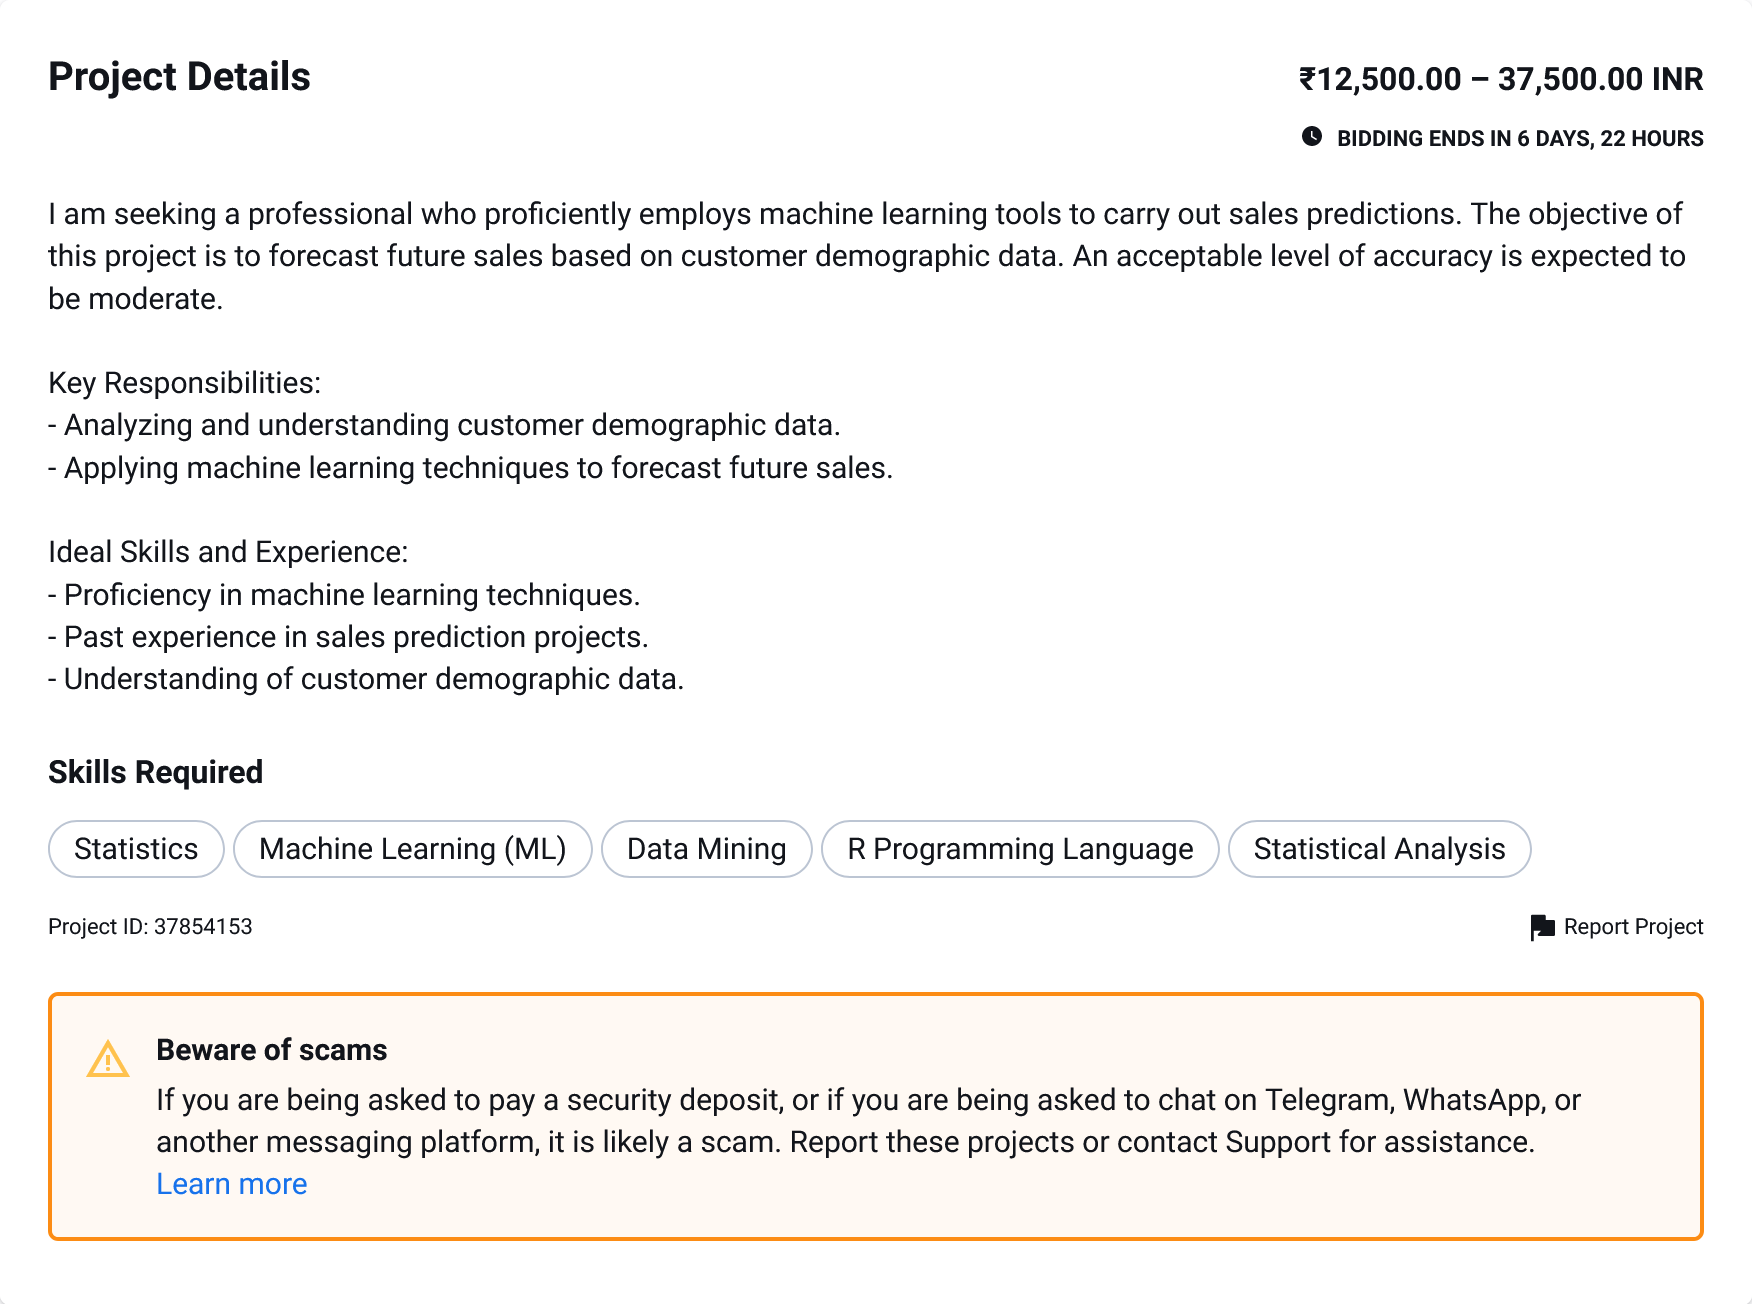


Project URL
[ML-Based Sales Forecasting Project](https://www.freelancer.com/projects/statistics/Based-Sales-Forecasting-Project/details)

In [ ]:
# Project Goals
## Make a streamlit App for
  ##> Load data from url or upload
  ##> preprocess data to model
  ##> generate EDA~DashBoard for a given target data
  ##> genearte prediction for sample test datafuture
  ##> genearte prediction for future date range

## Dataset and preprocessing

[datalink](https://www.kaggle.com/datasets/mohammadtalib786/retail-sales-dataset)

In [ ]:
from google.colab import files
files.upload()

In [59]:
data = pd.read_csv('/content/retail_sales_dataset.csv')

In [60]:
data.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [61]:
# checking data types
data.dtypes

Transaction ID       int64
Date                object
Customer ID         object
Gender              object
Age                  int64
Product Category    object
Quantity             int64
Price per Unit       int64
Total Amount         int64
dtype: object

In [62]:
# fixing date dtype
data['Date'] = pd.to_datetime(data['Date'])
data.Date.dtypes

dtype('<M8[ns]')

In [63]:
# looking for missing data
data.isna().sum()

Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64

In [64]:
# looking for duplicate rows
data.duplicated().sum()

0

In [65]:
# Drop unnecessary columns
data.drop(columns=['Transaction ID', 'Customer ID'], inplace=True)

So, we have a nice, clean and duplicateless dataset.

## Demographic features based EDA

In [66]:
# data
data.head()

,Date,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,2023-11-24,Male,34,Beauty,3,50,150
1,2023-02-27,Female,26,Clothing,2,500,1000
2,2023-01-13,Male,50,Electronics,1,30,30
3,2023-05-21,Male,37,Clothing,1,500,500
4,2023-05-06,Male,30,Beauty,2,50,100


In [67]:
# main descriptive stats
data.describe()

,Age,Quantity,Price per Unit,Total Amount
count,1000.00000,1000.000000,1000.000000,1000.000000
mean,41.39200,2.514000,179.890000,456.000000
std,13.68143,1.132734,189.681356,559.997632
min,18.00000,1.000000,25.000000,25.000000
25%,29.00000,1.000000,30.000000,60.000000
50%,42.00000,3.000000,50.000000,135.000000
75%,53.00000,4.000000,300.000000,900.000000
max,64.00000,4.000000,500.000000,2000.000000


In [68]:
data['Product Category'].value_counts(normalize=True)

Clothing       0.351
Electronics    0.342
Beauty         0.307
Name: Product Category, dtype: float64

In [69]:
data['Gender'].value_counts(normalize=True)

Female    0.51
Male      0.49
Name: Gender, dtype: float64

### Sales EDA by Gender



Text(0.5, 1.0, 'Total Sales Distribution by Gender')

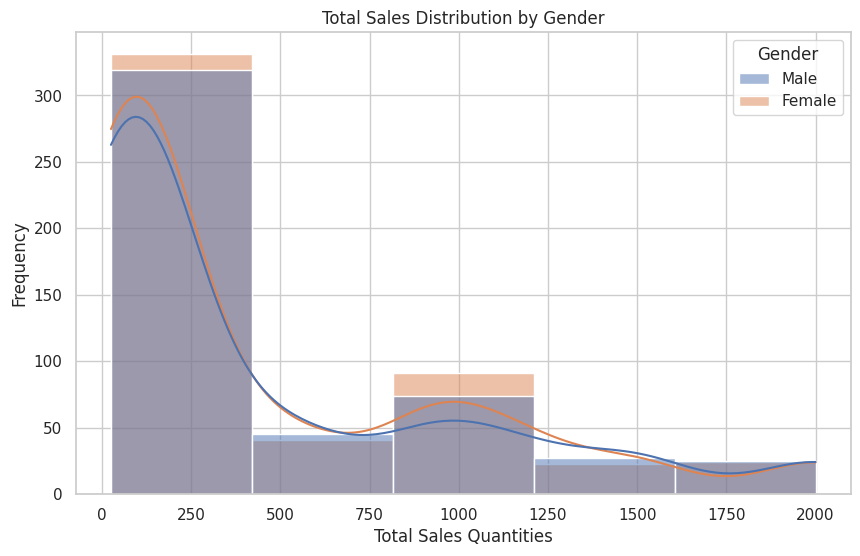

In [70]:
## Gender & Total Amount
# Set Seaborn style
sn.set(style="whitegrid")

# Create a pairplot to visualize the age distribution by gender
plt.figure(figsize=(10, 6))
sn.histplot(data=data, x='Total Amount', hue='Gender', kde=True, bins=5, common_norm=True)
plt.xlabel('Total Sales Quantities')
plt.ylabel('Frequency')
plt.title('Total Sales Distribution by Gender')

In [71]:
# Mean Sales A by Gender
data.groupby('Gender')['Total Amount'].mean()

Gender
Female    456.549020
Male      455.428571
Name: Total Amount, dtype: float64

Text(0.5, 1.0, 'Quantity Sales Distribution by Gender')

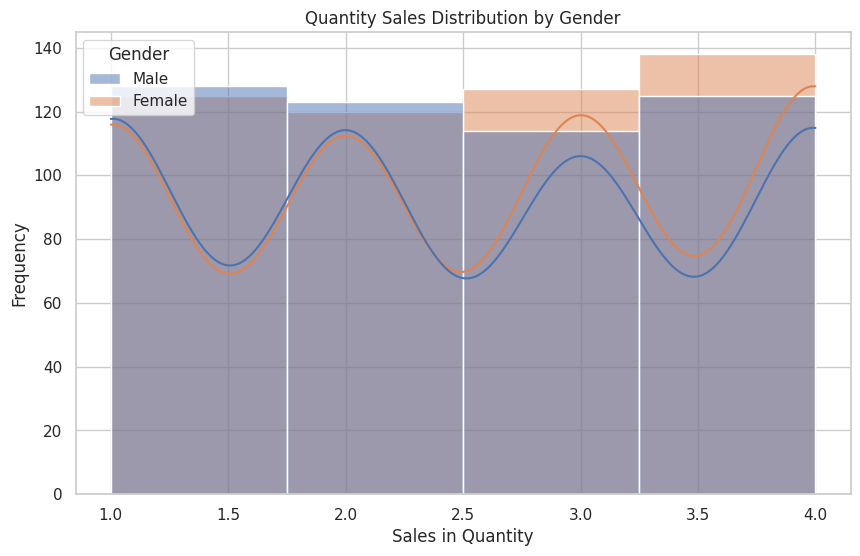

In [72]:
# Sales in quantities distribution by Gender

# Set Seaborn style
sn.set(style="whitegrid")

# Create a pairplot to visualize the age distribution by gender
plt.figure(figsize=(10, 6))
sn.histplot(data=data, x='Quantity', hue='Gender', kde=True, bins=4, common_norm=True)
plt.xlabel('Sales in Quantity')
plt.ylabel('Frequency')
plt.title('Quantity Sales Distribution by Gender')

In [73]:
# Mean Quantity Sales by Gender
data.groupby('Gender')['Quantity'].mean()

Gender
Female    2.545098
Male      2.481633
Name: Quantity, dtype: float64

Text(0.5, 1.0, 'Product Category Sales Distribution by Gender')

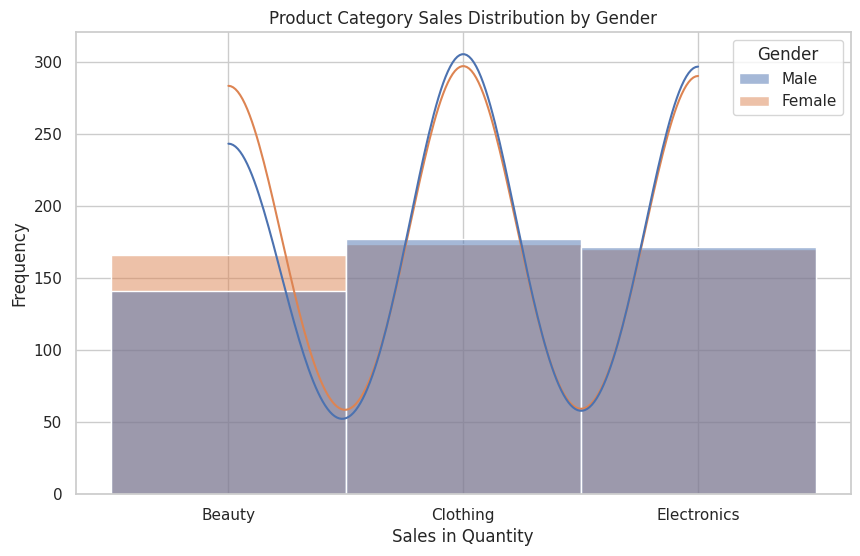

In [74]:
# Product Categories Sales distribution by Gender

# Set Seaborn style
sn.set(style="whitegrid")

# Create a pairplot to visualize the age distribution by gender
plt.figure(figsize=(10, 6))
sn.histplot(data=data, x='Product Category', hue='Gender', kde=True, bins=4, common_norm=True)
plt.xlabel('Sales in Quantity')
plt.ylabel('Frequency')
plt.title('Product Category Sales Distribution by Gender')

### Sales EDA by Age


In [75]:
# Analysing Sales by Age group
data['Age_group'] = pd.cut(data['Age'], bins=[0, 25, 65, 100], labels=['Young', 'Middle_Aged', 'Seniors'])

Text(0.5, 1.0, 'Total Sales Amounts Distribution by Age')

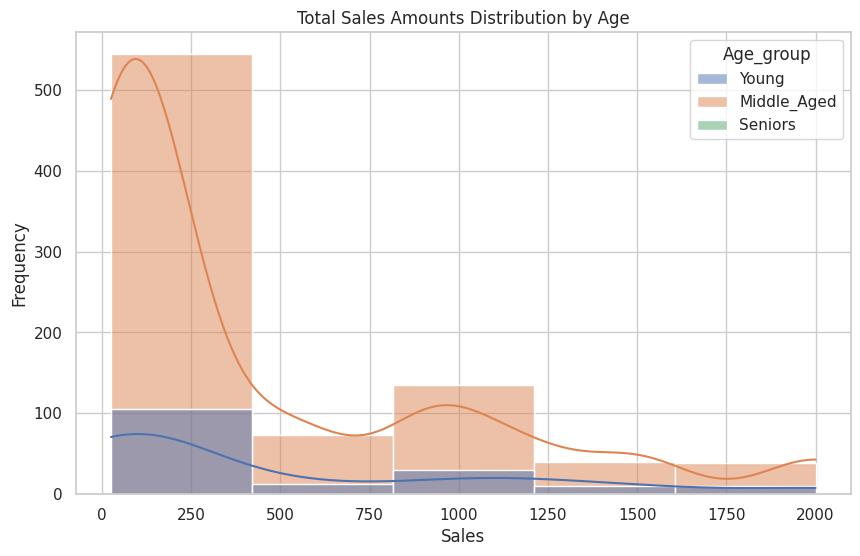

In [76]:
# Total Sales Amount distribution by Age

# Set Seaborn style
sn.set(style="whitegrid")

# Create a pairplot to visualize the age distribution by gender
plt.figure(figsize=(10, 6))
sn.histplot(data=data, x='Total Amount', hue='Age_group', kde=True, bins=5, common_norm=True)
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.title('Total Sales Amounts Distribution by Age')

Text(0.5, 1.0, 'Total Sales Amounts Distribution by Age')

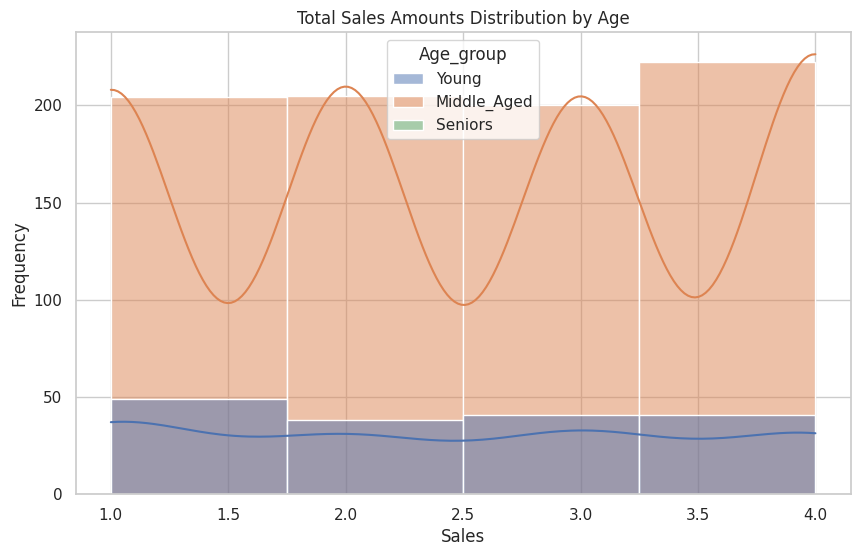

In [77]:
# Quantity Sales distribution by Age

# Set Seaborn style
sn.set(style="whitegrid")

# Create a pairplot to visualize the age distribution by gender
plt.figure(figsize=(10, 6))
sn.histplot(data=data, x='Quantity', hue='Age_group', kde=True, bins=4, common_norm=True)
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.title('Total Sales Amounts Distribution by Age')

Text(0.5, 1.0, 'Product Category Sales Distribution by Age')

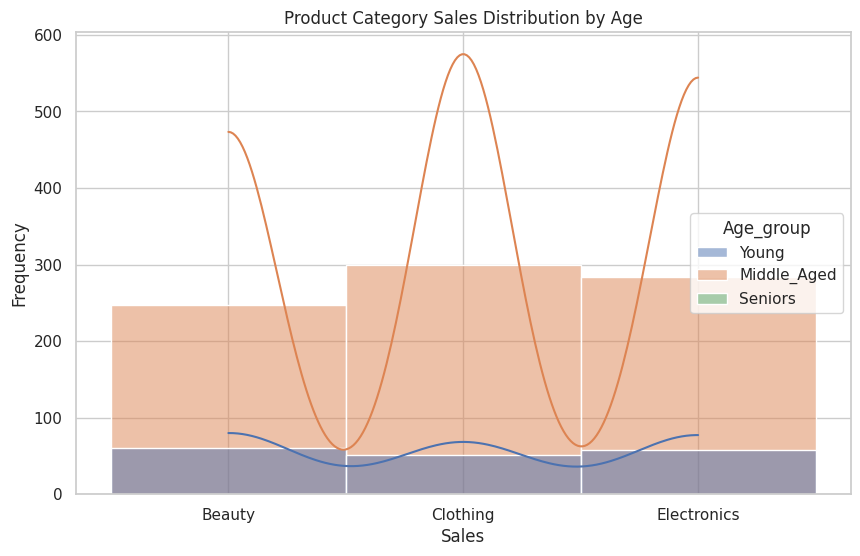

In [78]:
# Quantity Sales distribution by Age

# Set Seaborn style
sn.set(style="whitegrid")

# Create a pairplot to visualize the age distribution by gender
plt.figure(figsize=(10, 6))
sn.histplot(data=data, x='Product Category', hue='Age_group', kde=True, bins=4, common_norm=True)
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.title('Product Category Sales Distribution by Age')

In conclusion, sales (in values and quantities) are driven by middle aged population, equitably in both genders, with sligh female domination in hight amounts & quantity purchases.


## Modeling

In [79]:
!pip install prophet
!pip install optuna
!pip install sktime

In [5]:
from prophet import Prophet
from prophet.diagnostics import cross_validation, performance_metrics

from sktime.performance_metrics.forecasting import MeanAbsolutePercentageError
import optuna

### For Total Amount Prediction

#### Formating dataset to model

In [69]:
data

,Date,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,2023-11-24,Male,34,Beauty,3,50,150
1,2023-02-27,Female,26,Clothing,2,500,1000
2,2023-01-13,Male,50,Electronics,1,30,30
3,2023-05-21,Male,37,Clothing,1,500,500
4,2023-05-06,Male,30,Beauty,2,50,100
...,...,...,...,...,...,...,...
995,2023-05-16,Male,62,Clothing,1,50,50
996,2023-11-17,Male,52,Beauty,3,30,90
997,2023-10-29,Female,23,Beauty,4,25,100
998,2023-12-05,Female,36,Electronics,3,50,150


In [80]:
data_to_model = data[['Date', 'Total Amount']].copy()

# format date and target features according to facebook prophet settings
data_to_model.rename(columns={'Date': 'ds', 'Total Amount': 'y'}, inplace=True)

data_to_model = data_to_model.sort_values('ds')
data_to_model.dropna(inplace=True)

In [81]:
data_to_model.columns

Index(['ds', 'y'], dtype='object')

### Searching for optimal model parameters

In [ ]:
# looking for the best optimized params for smape:

# adding carrying capacity (cap ) and saturating minimum (floor)
data_to_model['cap'] = 2000
data_to_model['floor'] = 25

# Split train/test/validation datesets (70/30)
train_idx = int(len(data_to_model)*.7)

data_train = data_to_model[:train_idx]
data_test = data_to_model[train_idx:]


def objective(trial):
    params = {
        'changepoint_prior_scale': trial.suggest_float('changepoint_prior_scale', 0.01, 10),
        'changepoint_range': trial.suggest_float('changepoint_range', 0.01, 1),
        'seasonality_prior_scale': trial.suggest_float('seasonality_prior_scale', 0.1, 20),
        'holidays_prior_scale': trial.suggest_float('holidays_prior_scale', 0.1, 10),
        'seasonality_mode': trial.suggest_categorical('seasonality_mode', ['multiplicative', 'additive']),
        'growth': trial.suggest_categorical('growth', ['linear', 'logistic']),
        'daily_seasonality': trial.suggest_categorical('daily_seasonality',[True, False]),
        'weekly_seasonality': trial.suggest_int('weekly_seasonality', 1, 52),
        'yearly_seasonality': trial.suggest_int('yearly_seasonality', 1, 5)
    }

    model = Prophet(**params)

    model.fit(data_train)
    preds = model.predict(data_test)


    smape = MeanAbsolutePercentageError(multioutput='raw_values',
                                        symmetric=True)

    return smape(data_test['y'].values, preds['yhat'].values)


study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=1000, show_progress_bar=True)

fbp_best_params = study.best_params
fbp_best_params

[I 2024-03-09 18:28:54,956] A new study created in memory with name: no-name-0ed408bb-c6b3-496b-ae99-e95666b54a73


  0%|          | 0/1000 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/e32mz370.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/g7vy5g3s.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=57174', 'data', 'file=/tmp/tmpwmd6ldrj/e32mz370.json', 'init=/tmp/tmpwmd6ldrj/g7vy5g3s.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_modelft9r5wa9/prophet_model-20240309182855.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:28:55 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:28:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/ewwshqco.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/1tmkg2qu.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

[I 2024-03-09 18:28:55,940] Trial 0 finished with value: 1.1581922245645127 and parameters: {'changepoint_prior_scale': 5.279593489748265, 'changepoint_range': 0.677085108187792, 'seasonality_prior_scale': 11.958911201065085, 'holidays_prior_scale': 7.928255229310399, 'seasonality_mode': 'multiplicative', 'growth': 'linear', 'daily_seasonality': False, 'weekly_seasonality': 51, 'yearly_seasonality': 4}. Best is trial 0 with value: 1.1581922245645127.


18:28:56 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/9oq_2nd2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/n4o5to7d.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=27068', 'data', 'file=/tmp/tmpwmd6ldrj/9oq_2nd2.json', 'init=/tmp/tmpwmd6ldrj/n4o5to7d.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_modelgupa1rxe/prophet_model-20240309182856.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:28:56 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[I 2024-03-09 18:28:56,713] Trial 1 finished with value: 1.1327234781053057 and parameters: {'changepoint_prior_scale': 6.246361062267453, 'changepoint_range': 0.4268554932261336, 'seasonality_prior_scale': 19.877695626093196, 'holidays_prior_scale': 8.233641075499346, 'seasonality_mode': 'additive', 'growth': 'logistic', 'daily_seasonality': False, 'weekly_seasonality': 48, 'yearly_seasonality': 4}. Best is trial 1 with value: 1.1327234781053057.


18:28:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/vs8n9jq9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/u5ymgkpv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=46039', 'data', 'file=/tmp/tmpwmd6ldrj/vs8n9jq9.json', 'init=/tmp/tmpwmd6ldrj/u5ymgkpv.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_models3th_fjp/prophet_model-20240309182857.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:28:57 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:28:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


[I 2024-03-09 18:28:57,688] Trial 2 finished with value: 1.12820516984915 and parameters: {'changepoint_prior_scale': 6.709702752240648, 'changepoint_range': 0.3500194398212671, 'seasonality_prior_scale': 0.7977853245283797, 'holidays_prior_scale': 3.3552336037283057, 'seasonality_mode': 'multiplicative', 'growth': 'linear', 'daily_seasonality': False, 'weekly_seasonality': 47, 'yearly_seasonality': 1}. Best is trial 2 with value: 1.12820516984915.


DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/az47xtqb.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/wze57zy2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=128', 'data', 'file=/tmp/tmpwmd6ldrj/az47xtqb.json', 'init=/tmp/tmpwmd6ldrj/wze57zy2.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_modelgelc_ulb/prophet_model-20240309182858.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:28:58 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[I 2024-03-09 18:28:58,234] Trial 3 finished with value: 1.4983392844276806 and parameters: {'changepoint_prior_scale': 3.9468221932013963, 'changepoint_range': 0.8686162946020224, 'seasonality_prior_scale': 18.74975610033733, 'holidays_prior_scale': 7.062275831414386, 'seasonality_mode': 'additive', 'growth': 'logistic', 'daily_seasonality': False, 'weekly_seasonality': 25, 'yearly_seasonality': 5}. Best is trial 2 with value: 1.12820516984915.


18:28:58 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/9jvpfqsr.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/8_b5mq_v.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=82521', 'data', 'file=/tmp/tmpwmd6ldrj/9jvpfqsr.json', 'init=/tmp/tmpwmd6ldrj/8_b5mq_v.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_model49uo61fl/prophet_model-20240309182858.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:28:58 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[I 2024-03-09 18:28:58,723] Trial 4 finished with value: 1.9152964494604467 and parameters: {'changepoint_prior_scale': 5.088429526335676, 'changepoint_range': 0.20816437774131008, 'seasonality_prior_scale': 18.817853412180188, 'holidays_prior_scale': 3.3022903320965655, 'seasonality_mode': 'multiplicative', 'growth': 'linear', 'daily_seasonality': True, 'weekly_seasonality': 35, 'yearly_seasonality': 5}. Best is trial 2 with value: 1.12820516984915.


18:28:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/wsxftivz.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/sfa_5dk7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=41771', 'data', 'file=/tmp/tmpwmd6ldrj/wsxftivz.json', 'init=/tmp/tmpwmd6ldrj/sfa_5dk7.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_modellgfvowt4/prophet_model-20240309182859.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:28:59 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[I 2024-03-09 18:28:59,435] Trial 5 finished with value: 1.0897235971914108 and parameters: {'changepoint_prior_scale': 7.167422186918798, 'changepoint_range': 0.49746020509003125, 'seasonality_prior_scale': 9.50834408823426, 'holidays_prior_scale': 7.1664536957913185, 'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'daily_seasonality': False, 'weekly_seasonality': 47, 'yearly_seasonality': 3}. Best is trial 5 with value: 1.0897235971914108.


18:28:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/2xc7muda.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/466w784i.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=66120', 'data', 'file=/tmp/tmpwmd6ldrj/2xc7muda.json', 'init=/tmp/tmpwmd6ldrj/466w784i.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_modelj0fa221k/prophet_model-20240309182859.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:28:59 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[I 2024-03-09 18:28:59,750] Trial 6 finished with value: 1.0861722922874502 and parameters: {'changepoint_prior_scale': 5.211343852048021, 'changepoint_range': 0.38196300065660965, 'seasonality_prior_scale': 14.972259043913416, 'holidays_prior_scale': 1.9894690687426853, 'seasonality_mode': 'additive', 'growth': 'linear', 'daily_seasonality': True, 'weekly_seasonality': 4, 'yearly_seasonality': 1}. Best is trial 6 with value: 1.0861722922874502.


18:29:00 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/3moj762r.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/9wc6aa15.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=65314', 'data', 'file=/tmp/tmpwmd6ldrj/3moj762r.json', 'init=/tmp/tmpwmd6ldrj/9wc6aa15.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_modelvo2qy6u5/prophet_model-20240309182900.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:29:00 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[I 2024-03-09 18:29:00,401] Trial 7 finished with value: 1.0873126416080217 and parameters: {'changepoint_prior_scale': 2.550979268530077, 'changepoint_range': 0.6442977741497423, 'seasonality_prior_scale': 2.601580339898431, 'holidays_prior_scale': 4.526847166349878, 'seasonality_mode': 'multiplicative', 'growth': 'linear', 'daily_seasonality': False, 'weekly_seasonality': 45, 'yearly_seasonality': 2}. Best is trial 6 with value: 1.0861722922874502.


18:29:01 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/9cvqza0r.json


[I 2024-03-09 18:29:01,167] Trial 8 finished with value: 1.4036241205289421 and parameters: {'changepoint_prior_scale': 6.069228560518949, 'changepoint_range': 0.4192883128566331, 'seasonality_prior_scale': 19.62319893179286, 'holidays_prior_scale': 3.8486899934509546, 'seasonality_mode': 'multiplicative', 'growth': 'linear', 'daily_seasonality': True, 'weekly_seasonality': 11, 'yearly_seasonality': 4}. Best is trial 6 with value: 1.0861722922874502.


DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/4s4t5fkx.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=27773', 'data', 'file=/tmp/tmpwmd6ldrj/9cvqza0r.json', 'init=/tmp/tmpwmd6ldrj/4s4t5fkx.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_modelyoq7n2sy/prophet_model-20240309182901.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:29:01 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:29:01 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:n_changepoints greater than number of observations. Using 8.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/2z2j_tky.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/727tr56r.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['

[I 2024-03-09 18:29:02,072] Trial 9 finished with value: 1.2183770957512763 and parameters: {'changepoint_prior_scale': 9.5751990181725, 'changepoint_range': 0.1651123820434211, 'seasonality_prior_scale': 15.615882550123676, 'holidays_prior_scale': 9.556896456966621, 'seasonality_mode': 'additive', 'growth': 'linear', 'daily_seasonality': True, 'weekly_seasonality': 51, 'yearly_seasonality': 2}. Best is trial 6 with value: 1.0861722922874502.


DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/7yj97q_x.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/rgny4m38.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=13745', 'data', 'file=/tmp/tmpwmd6ldrj/7yj97q_x.json', 'init=/tmp/tmpwmd6ldrj/rgny4m38.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_modelhp9totpy/prophet_model-20240309182902.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:29:02 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[I 2024-03-09 18:29:02,644] Trial 10 finished with value: 1.802033525893362 and parameters: {'changepoint_prior_scale': 0.08987681418644389, 'changepoint_range': 0.013058964661597061, 'seasonality_prior_scale': 7.621969829900083, 'holidays_prior_scale': 0.2747481936388063, 'seasonality_mode': 'additive', 'growth': 'logistic', 'daily_seasonality': True, 'weekly_seasonality': 1, 'yearly_seasonality': 1}. Best is trial 6 with value: 1.0861722922874502.


18:29:02 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/ue75nizn.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/26qf0wua.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=8649', 'data', 'file=/tmp/tmpwmd6ldrj/ue75nizn.json', 'init=/tmp/tmpwmd6ldrj/26qf0wua.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_model4n_yb_w6/prophet_model-20240309182903.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:29:03 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[I 2024-03-09 18:29:03,056] Trial 11 finished with value: 1.0282296440016065 and parameters: {'changepoint_prior_scale': 2.642897829428095, 'changepoint_range': 0.7372488542242197, 'seasonality_prior_scale': 0.3462397385038982, 'holidays_prior_scale': 0.6963967983752213, 'seasonality_mode': 'additive', 'growth': 'linear', 'daily_seasonality': True, 'weekly_seasonality': 26, 'yearly_seasonality': 2}. Best is trial 11 with value: 1.0282296440016065.


18:29:03 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/0vm52851.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/rlkard8k.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=19571', 'data', 'file=/tmp/tmpwmd6ldrj/0vm52851.json', 'init=/tmp/tmpwmd6ldrj/rlkard8k.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_modelrs9ww4wk/prophet_model-20240309182903.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:29:03 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[I 2024-03-09 18:29:03,467] Trial 12 finished with value: 1.0837564868113938 and parameters: {'changepoint_prior_scale': 2.3686496570193154, 'changepoint_range': 0.9437634644351686, 'seasonality_prior_scale': 5.401422697202552, 'holidays_prior_scale': 0.3000521559789793, 'seasonality_mode': 'additive', 'growth': 'linear', 'daily_seasonality': True, 'weekly_seasonality': 19, 'yearly_seasonality': 2}. Best is trial 11 with value: 1.0282296440016065.


18:29:03 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/hl152_5t.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/k6u_b8no.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=38063', 'data', 'file=/tmp/tmpwmd6ldrj/hl152_5t.json', 'init=/tmp/tmpwmd6ldrj/k6u_b8no.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_model2wejvack/prophet_model-20240309182903.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:29:03 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[I 2024-03-09 18:29:03,816] Trial 13 finished with value: 1.071068172760654 and parameters: {'changepoint_prior_scale': 1.739661079480988, 'changepoint_range': 0.9711381952215449, 'seasonality_prior_scale': 4.848832080772066, 'holidays_prior_scale': 0.1402944908384281, 'seasonality_mode': 'additive', 'growth': 'linear', 'daily_seasonality': True, 'weekly_seasonality': 21, 'yearly_seasonality': 2}. Best is trial 11 with value: 1.0282296440016065.


18:29:04 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/h75jgtbt.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/1obltxk2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=40180', 'data', 'file=/tmp/tmpwmd6ldrj/h75jgtbt.json', 'init=/tmp/tmpwmd6ldrj/1obltxk2.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_modeltav99hct/prophet_model-20240309182904.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:29:04 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[I 2024-03-09 18:29:04,182] Trial 14 finished with value: 1.637229849253752 and parameters: {'changepoint_prior_scale': 0.871825936496687, 'changepoint_range': 0.8038082116138092, 'seasonality_prior_scale': 4.095648389442919, 'holidays_prior_scale': 1.7383187212467766, 'seasonality_mode': 'additive', 'growth': 'linear', 'daily_seasonality': True, 'weekly_seasonality': 32, 'yearly_seasonality': 3}. Best is trial 11 with value: 1.0282296440016065.


18:29:04 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/bs31b5ue.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/11lafsdq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=38777', 'data', 'file=/tmp/tmpwmd6ldrj/bs31b5ue.json', 'init=/tmp/tmpwmd6ldrj/11lafsdq.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_modelofyv1il0/prophet_model-20240309182904.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:29:04 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[I 2024-03-09 18:29:04,550] Trial 15 finished with value: 1.017888410574945 and parameters: {'changepoint_prior_scale': 2.163640653756922, 'changepoint_range': 0.9741269796259094, 'seasonality_prior_scale': 0.2251660963917459, 'holidays_prior_scale': 1.6547554242897, 'seasonality_mode': 'additive', 'growth': 'linear', 'daily_seasonality': True, 'weekly_seasonality': 19, 'yearly_seasonality': 2}. Best is trial 15 with value: 1.017888410574945.


18:29:04 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/uen20qb7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/p0d4n3s_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=11700', 'data', 'file=/tmp/tmpwmd6ldrj/uen20qb7.json', 'init=/tmp/tmpwmd6ldrj/p0d4n3s_.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_model1vodmtwv/prophet_model-20240309182905.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:29:05 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[I 2024-03-09 18:29:04,952] Trial 16 finished with value: 1.0903124831225002 and parameters: {'changepoint_prior_scale': 3.380497175300804, 'changepoint_range': 0.7142001750762436, 'seasonality_prior_scale': 0.12930684676560655, 'holidays_prior_scale': 2.008365488822639, 'seasonality_mode': 'additive', 'growth': 'linear', 'daily_seasonality': True, 'weekly_seasonality': 14, 'yearly_seasonality': 3}. Best is trial 15 with value: 1.017888410574945.


18:29:05 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/tn6reo3z.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/uzoio5fd.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=17521', 'data', 'file=/tmp/tmpwmd6ldrj/tn6reo3z.json', 'init=/tmp/tmpwmd6ldrj/uzoio5fd.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_modelg7c6tlf7/prophet_model-20240309182905.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:29:05 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[I 2024-03-09 18:29:05,485] Trial 17 finished with value: 1.1355965598495643 and parameters: {'changepoint_prior_scale': 3.6834581553322145, 'changepoint_range': 0.8006435363611863, 'seasonality_prior_scale': 2.143494688803565, 'holidays_prior_scale': 1.514550750417653, 'seasonality_mode': 'additive', 'growth': 'linear', 'daily_seasonality': True, 'weekly_seasonality': 33, 'yearly_seasonality': 2}. Best is trial 15 with value: 1.017888410574945.


18:29:05 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/6kixns3m.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/hc3prbl4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=60260', 'data', 'file=/tmp/tmpwmd6ldrj/6kixns3m.json', 'init=/tmp/tmpwmd6ldrj/hc3prbl4.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_modelfehxas2k/prophet_model-20240309182906.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:29:06 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[I 2024-03-09 18:29:06,107] Trial 18 finished with value: 1.0614486093985447 and parameters: {'changepoint_prior_scale': 1.4252374778741128, 'changepoint_range': 0.581178159176995, 'seasonality_prior_scale': 7.272060467512224, 'holidays_prior_scale': 5.318610350352079, 'seasonality_mode': 'additive', 'growth': 'logistic', 'daily_seasonality': True, 'weekly_seasonality': 38, 'yearly_seasonality': 1}. Best is trial 15 with value: 1.017888410574945.


18:29:06 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/d7g51pa5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/euff4lzu.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=86875', 'data', 'file=/tmp/tmpwmd6ldrj/d7g51pa5.json', 'init=/tmp/tmpwmd6ldrj/euff4lzu.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_modelwgbtnvzx/prophet_model-20240309182906.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:29:06 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[I 2024-03-09 18:29:06,542] Trial 19 finished with value: 1.1203972628749186 and parameters: {'changepoint_prior_scale': 2.8775983587234952, 'changepoint_range': 0.99452352333066, 'seasonality_prior_scale': 3.1342731734077676, 'holidays_prior_scale': 2.64106144376814, 'seasonality_mode': 'additive', 'growth': 'linear', 'daily_seasonality': True, 'weekly_seasonality': 27, 'yearly_seasonality': 2}. Best is trial 15 with value: 1.017888410574945.


18:29:06 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/2tf5hk6_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/uybyuz1z.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=16863', 'data', 'file=/tmp/tmpwmd6ldrj/2tf5hk6_.json', 'init=/tmp/tmpwmd6ldrj/uybyuz1z.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_model8h56ms70/prophet_model-20240309182907.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:29:07 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[I 2024-03-09 18:29:06,928] Trial 20 finished with value: 1.5446455929769942 and parameters: {'changepoint_prior_scale': 4.281972192153884, 'changepoint_range': 0.8340907355136145, 'seasonality_prior_scale': 6.566018004933072, 'holidays_prior_scale': 5.248893834936307, 'seasonality_mode': 'additive', 'growth': 'linear', 'daily_seasonality': True, 'weekly_seasonality': 9, 'yearly_seasonality': 3}. Best is trial 15 with value: 1.017888410574945.


18:29:07 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/9sonukry.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/rvnki14u.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=70943', 'data', 'file=/tmp/tmpwmd6ldrj/9sonukry.json', 'init=/tmp/tmpwmd6ldrj/rvnki14u.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_model6i6ya2s0/prophet_model-20240309182907.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:29:07 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[I 2024-03-09 18:29:07,524] Trial 21 finished with value: 1.054436737351983 and parameters: {'changepoint_prior_scale': 1.3331665853562062, 'changepoint_range': 0.606424898488565, 'seasonality_prior_scale': 9.59647818424684, 'holidays_prior_scale': 5.417257102346146, 'seasonality_mode': 'additive', 'growth': 'logistic', 'daily_seasonality': True, 'weekly_seasonality': 36, 'yearly_seasonality': 1}. Best is trial 15 with value: 1.017888410574945.


18:29:07 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/n3it8xp9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/is67ackj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=62961', 'data', 'file=/tmp/tmpwmd6ldrj/n3it8xp9.json', 'init=/tmp/tmpwmd6ldrj/is67ackj.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_modeljdwwpzjs/prophet_model-20240309182908.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:29:08 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:29:08 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


[I 2024-03-09 18:29:08,129] Trial 22 finished with value: 1.0434871404912072 and parameters: {'changepoint_prior_scale': 0.18869902716238074, 'changepoint_range': 0.5560468781150456, 'seasonality_prior_scale': 9.948035779697554, 'holidays_prior_scale': 5.88840351547606, 'seasonality_mode': 'additive', 'growth': 'logistic', 'daily_seasonality': True, 'weekly_seasonality': 40, 'yearly_seasonality': 1}. Best is trial 15 with value: 1.017888410574945.


DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/3qvixu33.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/qdlqkvbc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=29093', 'data', 'file=/tmp/tmpwmd6ldrj/3qvixu33.json', 'init=/tmp/tmpwmd6ldrj/qdlqkvbc.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_modelwl46mtf4/prophet_model-20240309182908.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:29:08 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[I 2024-03-09 18:29:08,658] Trial 23 finished with value: 1.0678648528007721 and parameters: {'changepoint_prior_scale': 0.26119763270941837, 'changepoint_range': 0.7507137395741336, 'seasonality_prior_scale': 1.3395573923271495, 'holidays_prior_scale': 1.031693503739664, 'seasonality_mode': 'additive', 'growth': 'logistic', 'daily_seasonality': True, 'weekly_seasonality': 28, 'yearly_seasonality': 1}. Best is trial 15 with value: 1.017888410574945.


18:29:08 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/p_nxkxsz.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/vg7vck9e.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=79391', 'data', 'file=/tmp/tmpwmd6ldrj/p_nxkxsz.json', 'init=/tmp/tmpwmd6ldrj/vg7vck9e.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_modelt18wqqdr/prophet_model-20240309182909.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:29:09 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:29:09 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


[I 2024-03-09 18:29:09,256] Trial 24 finished with value: 1.0567510255894679 and parameters: {'changepoint_prior_scale': 2.1400100699535725, 'changepoint_range': 0.5248104915075679, 'seasonality_prior_scale': 12.303475699138, 'holidays_prior_scale': 6.56548363218044, 'seasonality_mode': 'additive', 'growth': 'logistic', 'daily_seasonality': True, 'weekly_seasonality': 41, 'yearly_seasonality': 2}. Best is trial 15 with value: 1.017888410574945.


DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/2ypdilm_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/e1j613cz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=97797', 'data', 'file=/tmp/tmpwmd6ldrj/2ypdilm_.json', 'init=/tmp/tmpwmd6ldrj/e1j613cz.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_modelqezzh1lw/prophet_model-20240309182909.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:29:09 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[I 2024-03-09 18:29:09,784] Trial 25 finished with value: 1.0643882984123445 and parameters: {'changepoint_prior_scale': 0.6139281965530162, 'changepoint_range': 0.9095817739129763, 'seasonality_prior_scale': 16.29820625709592, 'holidays_prior_scale': 4.2955960011408045, 'seasonality_mode': 'additive', 'growth': 'logistic', 'daily_seasonality': True, 'weekly_seasonality': 19, 'yearly_seasonality': 1}. Best is trial 15 with value: 1.017888410574945.


18:29:10 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/6pb_4wio.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/61j2du6n.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=40585', 'data', 'file=/tmp/tmpwmd6ldrj/6pb_4wio.json', 'init=/tmp/tmpwmd6ldrj/61j2du6n.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_model4ixanjww/prophet_model-20240309182910.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:29:10 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[I 2024-03-09 18:29:10,379] Trial 26 finished with value: 1.054081435543726 and parameters: {'changepoint_prior_scale': 3.0248174326980557, 'changepoint_range': 0.7417530955702978, 'seasonality_prior_scale': 12.218400875057009, 'holidays_prior_scale': 6.042571361994721, 'seasonality_mode': 'additive', 'growth': 'logistic', 'daily_seasonality': True, 'weekly_seasonality': 24, 'yearly_seasonality': 2}. Best is trial 15 with value: 1.017888410574945.


18:29:10 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/_qvfx_b9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/2za3b23_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=78882', 'data', 'file=/tmp/tmpwmd6ldrj/_qvfx_b9.json', 'init=/tmp/tmpwmd6ldrj/2za3b23_.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_modeletjblo5y/prophet_model-20240309182910.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:29:10 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[I 2024-03-09 18:29:10,700] Trial 27 finished with value: 1.6119081318706099 and parameters: {'changepoint_prior_scale': 1.090854053278456, 'changepoint_range': 0.5282555042653507, 'seasonality_prior_scale': 3.5606827915914616, 'holidays_prior_scale': 2.7485627959473726, 'seasonality_mode': 'additive', 'growth': 'linear', 'daily_seasonality': True, 'weekly_seasonality': 30, 'yearly_seasonality': 3}. Best is trial 15 with value: 1.017888410574945.


18:29:10 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/qslbfaxz.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/w9bgvozv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=92167', 'data', 'file=/tmp/tmpwmd6ldrj/qslbfaxz.json', 'init=/tmp/tmpwmd6ldrj/w9bgvozv.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_modelvsufmexc/prophet_model-20240309182911.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:29:11 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[I 2024-03-09 18:29:11,272] Trial 28 finished with value: 1.060458845556131 and parameters: {'changepoint_prior_scale': 1.7675367079511386, 'changepoint_range': 0.873086474214898, 'seasonality_prior_scale': 5.311759789868464, 'holidays_prior_scale': 0.7649730133700492, 'seasonality_mode': 'additive', 'growth': 'logistic', 'daily_seasonality': True, 'weekly_seasonality': 15, 'yearly_seasonality': 2}. Best is trial 15 with value: 1.017888410574945.


18:29:12 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/v2bs_u45.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/q5eeyt1s.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=96334', 'data', 'file=/tmp/tmpwmd6ldrj/v2bs_u45.json', 'init=/tmp/tmpwmd6ldrj/q5eeyt1s.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_modelcvuuda4l/prophet_model-20240309182912.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:29:12 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[I 2024-03-09 18:29:12,284] Trial 29 finished with value: 1.0557226076676656 and parameters: {'changepoint_prior_scale': 4.503908577200742, 'changepoint_range': 0.6990416847649024, 'seasonality_prior_scale': 8.646753303588048, 'holidays_prior_scale': 8.43381847405431, 'seasonality_mode': 'multiplicative', 'growth': 'linear', 'daily_seasonality': False, 'weekly_seasonality': 41, 'yearly_seasonality': 1}. Best is trial 15 with value: 1.017888410574945.


18:29:13 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/xlvuhwax.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/zfefitwv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=98233', 'data', 'file=/tmp/tmpwmd6ldrj/xlvuhwax.json', 'init=/tmp/tmpwmd6ldrj/zfefitwv.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_modelc7cdwl55/prophet_model-20240309182913.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:29:13 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[I 2024-03-09 18:29:13,327] Trial 30 finished with value: 1.2541987485248964 and parameters: {'changepoint_prior_scale': 8.920637115088953, 'changepoint_range': 0.6539998848809753, 'seasonality_prior_scale': 13.837374638084288, 'holidays_prior_scale': 2.5771297444227725, 'seasonality_mode': 'additive', 'growth': 'linear', 'daily_seasonality': True, 'weekly_seasonality': 23, 'yearly_seasonality': 3}. Best is trial 15 with value: 1.017888410574945.


18:29:13 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/mdsl8kkg.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/lqzwn1xe.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=41255', 'data', 'file=/tmp/tmpwmd6ldrj/mdsl8kkg.json', 'init=/tmp/tmpwmd6ldrj/lqzwn1xe.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_modelwrfai2n6/prophet_model-20240309182914.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:29:14 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:29:14 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


[I 2024-03-09 18:29:14,050] Trial 31 finished with value: 1.0504041654774354 and parameters: {'changepoint_prior_scale': 3.095181121759773, 'changepoint_range': 0.7700692327099625, 'seasonality_prior_scale': 11.072277200066463, 'holidays_prior_scale': 5.860732960159952, 'seasonality_mode': 'additive', 'growth': 'logistic', 'daily_seasonality': True, 'weekly_seasonality': 16, 'yearly_seasonality': 2}. Best is trial 15 with value: 1.017888410574945.


DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/mpzeo0ow.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/i42pkkgp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=1833', 'data', 'file=/tmp/tmpwmd6ldrj/mpzeo0ow.json', 'init=/tmp/tmpwmd6ldrj/i42pkkgp.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_modelvg4xuyd2/prophet_model-20240309182914.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:29:14 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:29:14 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


[I 2024-03-09 18:29:14,582] Trial 32 finished with value: 1.0411129590626167 and parameters: {'changepoint_prior_scale': 3.1041456841427113, 'changepoint_range': 0.7917115413038195, 'seasonality_prior_scale': 10.761569804077727, 'holidays_prior_scale': 6.265172690809765, 'seasonality_mode': 'additive', 'growth': 'logistic', 'daily_seasonality': True, 'weekly_seasonality': 16, 'yearly_seasonality': 2}. Best is trial 15 with value: 1.017888410574945.


DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/abzivesv.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/z2e97ult.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=70870', 'data', 'file=/tmp/tmpwmd6ldrj/abzivesv.json', 'init=/tmp/tmpwmd6ldrj/z2e97ult.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_model46g1vu5g/prophet_model-20240309182915.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:29:15 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[I 2024-03-09 18:29:15,097] Trial 33 finished with value: 1.4979779077473045 and parameters: {'changepoint_prior_scale': 2.165373698149693, 'changepoint_range': 0.9147808606862736, 'seasonality_prior_scale': 1.353924096798386, 'holidays_prior_scale': 7.792458497442777, 'seasonality_mode': 'additive', 'growth': 'logistic', 'daily_seasonality': True, 'weekly_seasonality': 9, 'yearly_seasonality': 4}. Best is trial 15 with value: 1.017888410574945.


18:29:15 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/tkdhjbib.json


[I 2024-03-09 18:29:15,900] Trial 34 finished with value: 1.0366411235767528 and parameters: {'changepoint_prior_scale': 3.7922854237661374, 'changepoint_range': 0.8350332566363731, 'seasonality_prior_scale': 11.055701378733126, 'holidays_prior_scale': 6.3436230571633745, 'seasonality_mode': 'additive', 'growth': 'logistic', 'daily_seasonality': False, 'weekly_seasonality': 18, 'yearly_seasonality': 1}. Best is trial 15 with value: 1.017888410574945.


DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/psu25xl4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=53124', 'data', 'file=/tmp/tmpwmd6ldrj/tkdhjbib.json', 'init=/tmp/tmpwmd6ldrj/psu25xl4.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_modelcmdr8uw5/prophet_model-20240309182916.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:29:16 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:29:16 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/ybquscvl.json


[I 2024-03-09 18:29:16,692] Trial 35 finished with value: 1.0616691859120764 and parameters: {'changepoint_prior_scale': 4.575160558340559, 'changepoint_range': 0.9030329302020219, 'seasonality_prior_scale': 13.508149749321149, 'holidays_prior_scale': 7.347102698688875, 'seasonality_mode': 'additive', 'growth': 'logistic', 'daily_seasonality': False, 'weekly_seasonality': 18, 'yearly_seasonality': 2}. Best is trial 15 with value: 1.017888410574945.


DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/k58jvu1b.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=49104', 'data', 'file=/tmp/tmpwmd6ldrj/ybquscvl.json', 'init=/tmp/tmpwmd6ldrj/k58jvu1b.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_modelnfea9c4p/prophet_model-20240309182916.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:29:16 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:29:17 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/_ci4t2x0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/ds_4d0vh.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.b

[I 2024-03-09 18:29:17,610] Trial 36 finished with value: 1.0679742958248482 and parameters: {'changepoint_prior_scale': 3.7671955435603808, 'changepoint_range': 0.8141089647817588, 'seasonality_prior_scale': 10.863341572791906, 'holidays_prior_scale': 8.599711200163556, 'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'daily_seasonality': False, 'weekly_seasonality': 22, 'yearly_seasonality': 3}. Best is trial 15 with value: 1.017888410574945.


18:29:18 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/pocey8cw.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/3b8o5vs4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=41362', 'data', 'file=/tmp/tmpwmd6ldrj/pocey8cw.json', 'init=/tmp/tmpwmd6ldrj/3b8o5vs4.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_modeltypkltzo/prophet_model-20240309182918.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:29:18 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[I 2024-03-09 18:29:18,584] Trial 37 finished with value: 1.0396361320652525 and parameters: {'changepoint_prior_scale': 6.219694187003865, 'changepoint_range': 0.8575614208490248, 'seasonality_prior_scale': 0.1481509790917016, 'holidays_prior_scale': 6.606134122619612, 'seasonality_mode': 'additive', 'growth': 'logistic', 'daily_seasonality': False, 'weekly_seasonality': 12, 'yearly_seasonality': 1}. Best is trial 15 with value: 1.017888410574945.


18:29:18 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/dveds8qb.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/_hv9vkb6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=6760', 'data', 'file=/tmp/tmpwmd6ldrj/dveds8qb.json', 'init=/tmp/tmpwmd6ldrj/_hv9vkb6.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_modelg1qe2k2d/prophet_model-20240309182919.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:29:19 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[I 2024-03-09 18:29:18,942] Trial 38 finished with value: 1.0974713348147396 and parameters: {'changepoint_prior_scale': 5.802901837927147, 'changepoint_range': 0.8619725502094294, 'seasonality_prior_scale': 0.24916611186754145, 'holidays_prior_scale': 6.691027923466733, 'seasonality_mode': 'multiplicative', 'growth': 'linear', 'daily_seasonality': False, 'weekly_seasonality': 12, 'yearly_seasonality': 1}. Best is trial 15 with value: 1.017888410574945.


18:29:19 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/irme6gmo.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/mcqv907w.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=73285', 'data', 'file=/tmp/tmpwmd6ldrj/irme6gmo.json', 'init=/tmp/tmpwmd6ldrj/mcqv907w.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_model7gecbsi3/prophet_model-20240309182919.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:29:19 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[I 2024-03-09 18:29:19,589] Trial 39 finished with value: 1.0492158156765774 and parameters: {'changepoint_prior_scale': 7.903604236974017, 'changepoint_range': 0.9508955624337532, 'seasonality_prior_scale': 1.366689349711279, 'holidays_prior_scale': 4.751789339352076, 'seasonality_mode': 'additive', 'growth': 'logistic', 'daily_seasonality': False, 'weekly_seasonality': 6, 'yearly_seasonality': 1}. Best is trial 15 with value: 1.017888410574945.


18:29:19 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/t1ob7145.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/ik34ly3z.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=18082', 'data', 'file=/tmp/tmpwmd6ldrj/t1ob7145.json', 'init=/tmp/tmpwmd6ldrj/ik34ly3z.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_modelx7ytz5tc/prophet_model-20240309182920.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:29:20 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:29:20 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


[I 2024-03-09 18:29:20,077] Trial 40 finished with value: 1.1274540112019271 and parameters: {'changepoint_prior_scale': 6.841768416890503, 'changepoint_range': 0.8787707320767355, 'seasonality_prior_scale': 2.148780320846624, 'holidays_prior_scale': 3.8857625225194385, 'seasonality_mode': 'multiplicative', 'growth': 'linear', 'daily_seasonality': False, 'weekly_seasonality': 25, 'yearly_seasonality': 1}. Best is trial 15 with value: 1.017888410574945.


DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/mvhxab2j.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/9agmwbvm.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=75169', 'data', 'file=/tmp/tmpwmd6ldrj/mvhxab2j.json', 'init=/tmp/tmpwmd6ldrj/9agmwbvm.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_modellj97s99d/prophet_model-20240309182920.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:29:20 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[I 2024-03-09 18:29:20,613] Trial 41 finished with value: 1.0554067360627823 and parameters: {'changepoint_prior_scale': 5.105805198451896, 'changepoint_range': 0.6829700802787748, 'seasonality_prior_scale': 8.714118722602372, 'holidays_prior_scale': 6.288385172408877, 'seasonality_mode': 'additive', 'growth': 'logistic', 'daily_seasonality': False, 'weekly_seasonality': 17, 'yearly_seasonality': 2}. Best is trial 15 with value: 1.017888410574945.


18:29:20 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/ipnzuy70.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/5kcl47m4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=44503', 'data', 'file=/tmp/tmpwmd6ldrj/ipnzuy70.json', 'init=/tmp/tmpwmd6ldrj/5kcl47m4.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_modelp1rkexvm/prophet_model-20240309182921.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:29:21 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[I 2024-03-09 18:29:21,299] Trial 42 finished with value: 1.0312662204022955 and parameters: {'changepoint_prior_scale': 7.438699154130232, 'changepoint_range': 0.8392812142923497, 'seasonality_prior_scale': 11.012649180161857, 'holidays_prior_scale': 7.582565645353107, 'seasonality_mode': 'additive', 'growth': 'logistic', 'daily_seasonality': False, 'weekly_seasonality': 13, 'yearly_seasonality': 1}. Best is trial 15 with value: 1.017888410574945.


18:29:21 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/mw0efn49.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/7wtjw84j.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=82941', 'data', 'file=/tmp/tmpwmd6ldrj/mw0efn49.json', 'init=/tmp/tmpwmd6ldrj/7wtjw84j.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_model_bsmsyl8/prophet_model-20240309182922.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:29:22 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[I 2024-03-09 18:29:21,925] Trial 43 finished with value: 1.0315329982587402 and parameters: {'changepoint_prior_scale': 7.607755907202022, 'changepoint_range': 0.8450487314972593, 'seasonality_prior_scale': 0.8461227065638178, 'holidays_prior_scale': 7.1638919179154215, 'seasonality_mode': 'additive', 'growth': 'logistic', 'daily_seasonality': False, 'weekly_seasonality': 13, 'yearly_seasonality': 1}. Best is trial 15 with value: 1.017888410574945.


18:29:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/e1mv1wbf.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/3h01iw_j.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=40191', 'data', 'file=/tmp/tmpwmd6ldrj/e1mv1wbf.json', 'init=/tmp/tmpwmd6ldrj/3h01iw_j.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_modelpifffwla/prophet_model-20240309182922.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:29:22 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[I 2024-03-09 18:29:22,765] Trial 44 finished with value: 1.0583035822689464 and parameters: {'changepoint_prior_scale': 7.934208726027881, 'changepoint_range': 0.997800994188057, 'seasonality_prior_scale': 16.909880152415113, 'holidays_prior_scale': 8.848885663984426, 'seasonality_mode': 'additive', 'growth': 'logistic', 'daily_seasonality': False, 'weekly_seasonality': 20, 'yearly_seasonality': 1}. Best is trial 15 with value: 1.017888410574945.


18:29:23 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/v0tm1x3f.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/veq_j5z_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=20476', 'data', 'file=/tmp/tmpwmd6ldrj/v0tm1x3f.json', 'init=/tmp/tmpwmd6ldrj/veq_j5z_.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_modelf1i76eos/prophet_model-20240309182923.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:29:23 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[I 2024-03-09 18:29:23,438] Trial 45 finished with value: 1.0343735276819594 and parameters: {'changepoint_prior_scale': 7.472613490005849, 'changepoint_range': 0.9435293083817359, 'seasonality_prior_scale': 13.278174394341384, 'holidays_prior_scale': 7.906540807163153, 'seasonality_mode': 'additive', 'growth': 'logistic', 'daily_seasonality': False, 'weekly_seasonality': 13, 'yearly_seasonality': 1}. Best is trial 15 with value: 1.017888410574945.


18:29:23 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/e32v4hi6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/ji1goelf.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=68035', 'data', 'file=/tmp/tmpwmd6ldrj/e32v4hi6.json', 'init=/tmp/tmpwmd6ldrj/ji1goelf.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_modelsg5xhcsj/prophet_model-20240309182923.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:29:23 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[I 2024-03-09 18:29:23,794] Trial 46 finished with value: 1.2820538058625683 and parameters: {'changepoint_prior_scale': 7.646603857868605, 'changepoint_range': 0.9468604834069907, 'seasonality_prior_scale': 13.326989997766535, 'holidays_prior_scale': 9.00898876403248, 'seasonality_mode': 'additive', 'growth': 'linear', 'daily_seasonality': False, 'weekly_seasonality': 6, 'yearly_seasonality': 1}. Best is trial 15 with value: 1.017888410574945.


18:29:24 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/hrb1lwif.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/01tgb8yk.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=50719', 'data', 'file=/tmp/tmpwmd6ldrj/hrb1lwif.json', 'init=/tmp/tmpwmd6ldrj/01tgb8yk.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_modelnp_f2sz2/prophet_model-20240309182924.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:29:24 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[I 2024-03-09 18:29:24,386] Trial 47 finished with value: 1.1787666077977605 and parameters: {'changepoint_prior_scale': 8.763456448002053, 'changepoint_range': 0.45400484361058896, 'seasonality_prior_scale': 2.8108928786684673, 'holidays_prior_scale': 7.835108766635961, 'seasonality_mode': 'additive', 'growth': 'linear', 'daily_seasonality': False, 'weekly_seasonality': 10, 'yearly_seasonality': 1}. Best is trial 15 with value: 1.017888410574945.


18:29:24 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/kwfnwi7x.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/_2_nwzxn.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=44029', 'data', 'file=/tmp/tmpwmd6ldrj/kwfnwi7x.json', 'init=/tmp/tmpwmd6ldrj/_2_nwzxn.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_model1qzmuzjl/prophet_model-20240309182925.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:29:25 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[I 2024-03-09 18:29:25,412] Trial 48 finished with value: 1.4628280257033932 and parameters: {'changepoint_prior_scale': 7.137147975542978, 'changepoint_range': 0.9097185844221954, 'seasonality_prior_scale': 14.116696897491906, 'holidays_prior_scale': 9.525349714076128, 'seasonality_mode': 'additive', 'growth': 'logistic', 'daily_seasonality': False, 'weekly_seasonality': 13, 'yearly_seasonality': 5}. Best is trial 15 with value: 1.017888410574945.


18:29:25 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/0kadv0i6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/x6s4fdks.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=64724', 'data', 'file=/tmp/tmpwmd6ldrj/0kadv0i6.json', 'init=/tmp/tmpwmd6ldrj/x6s4fdks.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_modelsv166982/prophet_model-20240309182925.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:29:25 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[I 2024-03-09 18:29:25,714] Trial 49 finished with value: 1.4573354954725135 and parameters: {'changepoint_prior_scale': 5.631183636869029, 'changepoint_range': 0.27162906199717374, 'seasonality_prior_scale': 1.0011071918546297, 'holidays_prior_scale': 7.44188653639954, 'seasonality_mode': 'multiplicative', 'growth': 'linear', 'daily_seasonality': False, 'weekly_seasonality': 6, 'yearly_seasonality': 2}. Best is trial 15 with value: 1.017888410574945.


18:29:25 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/l8lo239p.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/ics18rxg.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=16794', 'data', 'file=/tmp/tmpwmd6ldrj/l8lo239p.json', 'init=/tmp/tmpwmd6ldrj/ics18rxg.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_modelzv35oqqc/prophet_model-20240309182926.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:29:26 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[I 2024-03-09 18:29:26,302] Trial 50 finished with value: 1.2472007776190965 and parameters: {'changepoint_prior_scale': 9.857345528482782, 'changepoint_range': 0.729589713336327, 'seasonality_prior_scale': 4.302261089184465, 'holidays_prior_scale': 8.140353730466593, 'seasonality_mode': 'additive', 'growth': 'logistic', 'daily_seasonality': False, 'weekly_seasonality': 3, 'yearly_seasonality': 1}. Best is trial 15 with value: 1.017888410574945.


18:29:26 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/4_2dt8ws.json


[I 2024-03-09 18:29:27,338] Trial 51 finished with value: 1.0885206914224934 and parameters: {'changepoint_prior_scale': 8.636815002982601, 'changepoint_range': 0.8361718806676885, 'seasonality_prior_scale': 11.670990064597603, 'holidays_prior_scale': 7.009266300442952, 'seasonality_mode': 'additive', 'growth': 'logistic', 'daily_seasonality': False, 'weekly_seasonality': 14, 'yearly_seasonality': 1}. Best is trial 15 with value: 1.017888410574945.


DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/h0pad15m.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=8780', 'data', 'file=/tmp/tmpwmd6ldrj/4_2dt8ws.json', 'init=/tmp/tmpwmd6ldrj/h0pad15m.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_model0danutkm/prophet_model-20240309182927.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:29:27 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:29:28 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/rmf9f_qt.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/nw5jwkl4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bi

[I 2024-03-09 18:29:29,024] Trial 52 finished with value: 1.0413851005421535 and parameters: {'changepoint_prior_scale': 8.325301361665606, 'changepoint_range': 0.9556294442950019, 'seasonality_prior_scale': 12.993048148631377, 'holidays_prior_scale': 0.8594731211433194, 'seasonality_mode': 'additive', 'growth': 'logistic', 'daily_seasonality': False, 'weekly_seasonality': 21, 'yearly_seasonality': 1}. Best is trial 15 with value: 1.017888410574945.


18:29:29 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/v25tuajp.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/m90t2ag2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=85284', 'data', 'file=/tmp/tmpwmd6ldrj/v25tuajp.json', 'init=/tmp/tmpwmd6ldrj/m90t2ag2.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_modelfugd6j5b/prophet_model-20240309182930.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:29:30 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:29:30 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


[I 2024-03-09 18:29:29,912] Trial 53 finished with value: 1.0436404571979516 and parameters: {'changepoint_prior_scale': 6.6324648263855535, 'changepoint_range': 0.7793656460284959, 'seasonality_prior_scale': 14.820264210946993, 'holidays_prior_scale': 7.014278988150904, 'seasonality_mode': 'additive', 'growth': 'logistic', 'daily_seasonality': False, 'weekly_seasonality': 18, 'yearly_seasonality': 1}. Best is trial 15 with value: 1.017888410574945.


DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/ybw0i7p8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/tkk_1dl6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=9169', 'data', 'file=/tmp/tmpwmd6ldrj/ybw0i7p8.json', 'init=/tmp/tmpwmd6ldrj/tkk_1dl6.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_model62e083lb/prophet_model-20240309182930.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:29:30 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[I 2024-03-09 18:29:30,425] Trial 54 finished with value: 1.0327706223221647 and parameters: {'changepoint_prior_scale': 7.4836217167860415, 'changepoint_range': 0.8385673299814098, 'seasonality_prior_scale': 6.441344238586491, 'holidays_prior_scale': 7.697597168647827, 'seasonality_mode': 'additive', 'growth': 'logistic', 'daily_seasonality': False, 'weekly_seasonality': 9, 'yearly_seasonality': 2}. Best is trial 15 with value: 1.017888410574945.


18:29:30 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/0xl21f2l.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/eztx7276.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=26921', 'data', 'file=/tmp/tmpwmd6ldrj/0xl21f2l.json', 'init=/tmp/tmpwmd6ldrj/eztx7276.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_modelvg7f_au0/prophet_model-20240309182931.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:29:31 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[I 2024-03-09 18:29:30,867] Trial 55 finished with value: 1.1304833679167203 and parameters: {'changepoint_prior_scale': 7.452039263028226, 'changepoint_range': 0.6203500762296047, 'seasonality_prior_scale': 6.206494089484178, 'holidays_prior_scale': 9.904777522197511, 'seasonality_mode': 'additive', 'growth': 'linear', 'daily_seasonality': False, 'weekly_seasonality': 8, 'yearly_seasonality': 2}. Best is trial 15 with value: 1.017888410574945.


18:29:31 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/a8ptc6xm.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/ov2r6b2k.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=66749', 'data', 'file=/tmp/tmpwmd6ldrj/a8ptc6xm.json', 'init=/tmp/tmpwmd6ldrj/ov2r6b2k.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_modelra66sx3h/prophet_model-20240309182931.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:29:31 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[I 2024-03-09 18:29:31,758] Trial 56 finished with value: 1.4930011995695396 and parameters: {'changepoint_prior_scale': 6.514759121496734, 'changepoint_range': 0.9273119909860328, 'seasonality_prior_scale': 2.0912601766380625, 'holidays_prior_scale': 1.4152390351238964, 'seasonality_mode': 'additive', 'growth': 'logistic', 'daily_seasonality': False, 'weekly_seasonality': 11, 'yearly_seasonality': 3}. Best is trial 15 with value: 1.017888410574945.


18:29:32 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/y2lib1s2.json


[I 2024-03-09 18:29:32,706] Trial 57 finished with value: 1.1018009811949514 and parameters: {'changepoint_prior_scale': 7.303998497104903, 'changepoint_range': 0.881420104207547, 'seasonality_prior_scale': 8.510386455071966, 'holidays_prior_scale': 7.599626440462724, 'seasonality_mode': 'additive', 'growth': 'logistic', 'daily_seasonality': False, 'weekly_seasonality': 3, 'yearly_seasonality': 2}. Best is trial 15 with value: 1.017888410574945.


DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/mvtepl42.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=5150', 'data', 'file=/tmp/tmpwmd6ldrj/y2lib1s2.json', 'init=/tmp/tmpwmd6ldrj/mvtepl42.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_modelrwbqiazi/prophet_model-20240309182932.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:29:32 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:29:33 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/07r6ugkl.json


[I 2024-03-09 18:29:33,580] Trial 58 finished with value: 1.6217697435199576 and parameters: {'changepoint_prior_scale': 8.246685072767633, 'changepoint_range': 0.984708188610302, 'seasonality_prior_scale': 3.7216459277534497, 'holidays_prior_scale': 8.061378473368176, 'seasonality_mode': 'additive', 'growth': 'linear', 'daily_seasonality': False, 'weekly_seasonality': 7, 'yearly_seasonality': 2}. Best is trial 15 with value: 1.017888410574945.


DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/gcieoan3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=95982', 'data', 'file=/tmp/tmpwmd6ldrj/07r6ugkl.json', 'init=/tmp/tmpwmd6ldrj/gcieoan3.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_model56_mit9f/prophet_model-20240309182933.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:29:33 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:29:34 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/1ered_u5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/82oi41t3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.b

[I 2024-03-09 18:29:34,935] Trial 59 finished with value: 1.3964552893391393 and parameters: {'changepoint_prior_scale': 9.261570727214561, 'changepoint_range': 0.824309214972254, 'seasonality_prior_scale': 2.053481520286164, 'holidays_prior_scale': 0.5397857395333394, 'seasonality_mode': 'additive', 'growth': 'logistic', 'daily_seasonality': False, 'weekly_seasonality': 26, 'yearly_seasonality': 3}. Best is trial 15 with value: 1.017888410574945.


18:29:35 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/g64fqgxq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/y1mnhzab.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=5231', 'data', 'file=/tmp/tmpwmd6ldrj/g64fqgxq.json', 'init=/tmp/tmpwmd6ldrj/y1mnhzab.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_model7xh6qfcs/prophet_model-20240309182935.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:29:35 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[I 2024-03-09 18:29:35,343] Trial 60 finished with value: 1.2053329085399582 and parameters: {'changepoint_prior_scale': 7.01396073740349, 'changepoint_range': 0.12567712493115035, 'seasonality_prior_scale': 18.016372257597563, 'holidays_prior_scale': 8.97189885697952, 'seasonality_mode': 'additive', 'growth': 'linear', 'daily_seasonality': False, 'weekly_seasonality': 14, 'yearly_seasonality': 2}. Best is trial 15 with value: 1.017888410574945.


18:29:35 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/wjdcc5ab.json


[I 2024-03-09 18:29:36,279] Trial 61 finished with value: 1.0348494840334628 and parameters: {'changepoint_prior_scale': 4.098579054554747, 'changepoint_range': 0.8381097464305707, 'seasonality_prior_scale': 10.169052745524146, 'holidays_prior_scale': 7.141271349046274, 'seasonality_mode': 'additive', 'growth': 'logistic', 'daily_seasonality': False, 'weekly_seasonality': 16, 'yearly_seasonality': 1}. Best is trial 15 with value: 1.017888410574945.


DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/gdeklhij.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=97767', 'data', 'file=/tmp/tmpwmd6ldrj/wjdcc5ab.json', 'init=/tmp/tmpwmd6ldrj/gdeklhij.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_model48nadnib/prophet_model-20240309182936.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:29:36 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:29:36 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/53jcuol4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/n50lo01p.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.b

[I 2024-03-09 18:29:37,135] Trial 62 finished with value: 1.044498512677152 and parameters: {'changepoint_prior_scale': 4.210786931235903, 'changepoint_range': 0.756504130565574, 'seasonality_prior_scale': 7.868348326010933, 'holidays_prior_scale': 7.152535482318758, 'seasonality_mode': 'additive', 'growth': 'logistic', 'daily_seasonality': False, 'weekly_seasonality': 29, 'yearly_seasonality': 1}. Best is trial 15 with value: 1.017888410574945.


DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/2oi6hflv.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/elovnnaz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=53565', 'data', 'file=/tmp/tmpwmd6ldrj/2oi6hflv.json', 'init=/tmp/tmpwmd6ldrj/elovnnaz.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_model6fewyn0o/prophet_model-20240309182937.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:29:37 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:29:37 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


[I 2024-03-09 18:29:37,610] Trial 63 finished with value: 1.0612205779866015 and parameters: {'changepoint_prior_scale': 2.575254154172446, 'changepoint_range': 0.8904811504409158, 'seasonality_prior_scale': 10.387538199410912, 'holidays_prior_scale': 8.164606679973422, 'seasonality_mode': 'additive', 'growth': 'logistic', 'daily_seasonality': False, 'weekly_seasonality': 10, 'yearly_seasonality': 1}. Best is trial 15 with value: 1.017888410574945.


DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/i9om_p5f.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/2mfvaunb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=56928', 'data', 'file=/tmp/tmpwmd6ldrj/i9om_p5f.json', 'init=/tmp/tmpwmd6ldrj/2mfvaunb.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_modelqhqm_nvk/prophet_model-20240309182938.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:29:38 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[I 2024-03-09 18:29:38,117] Trial 64 finished with value: 1.054872972147581 and parameters: {'changepoint_prior_scale': 1.7888631874687269, 'changepoint_range': 0.961638994858035, 'seasonality_prior_scale': 11.725366730309714, 'holidays_prior_scale': 5.671891768627331, 'seasonality_mode': 'additive', 'growth': 'logistic', 'daily_seasonality': False, 'weekly_seasonality': 16, 'yearly_seasonality': 2}. Best is trial 15 with value: 1.017888410574945.


18:29:38 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/6tj5nf0c.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/j6_o30un.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=53098', 'data', 'file=/tmp/tmpwmd6ldrj/6tj5nf0c.json', 'init=/tmp/tmpwmd6ldrj/j6_o30un.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_model_a4smli_/prophet_model-20240309182938.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:29:38 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[I 2024-03-09 18:29:38,814] Trial 65 finished with value: 1.0927219387516092 and parameters: {'changepoint_prior_scale': 7.6869559061851715, 'changepoint_range': 0.8458765626379671, 'seasonality_prior_scale': 9.413637682498115, 'holidays_prior_scale': 8.404231344367542, 'seasonality_mode': 'additive', 'growth': 'logistic', 'daily_seasonality': False, 'weekly_seasonality': 13, 'yearly_seasonality': 1}. Best is trial 15 with value: 1.017888410574945.


18:29:39 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/vyq27umk.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/15bt2yfc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=15276', 'data', 'file=/tmp/tmpwmd6ldrj/vyq27umk.json', 'init=/tmp/tmpwmd6ldrj/15bt2yfc.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_modelzytrmsf0/prophet_model-20240309182939.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:29:39 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[I 2024-03-09 18:29:39,444] Trial 66 finished with value: 1.109402317401146 and parameters: {'changepoint_prior_scale': 5.583978286474262, 'changepoint_range': 0.7990091376903714, 'seasonality_prior_scale': 12.781890821595313, 'holidays_prior_scale': 1.2028208009368206, 'seasonality_mode': 'additive', 'growth': 'logistic', 'daily_seasonality': True, 'weekly_seasonality': 20, 'yearly_seasonality': 4}. Best is trial 15 with value: 1.017888410574945.


18:29:39 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/ml3cg_ud.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/a26hoaxl.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=6698', 'data', 'file=/tmp/tmpwmd6ldrj/ml3cg_ud.json', 'init=/tmp/tmpwmd6ldrj/a26hoaxl.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_modelb7k9fsww/prophet_model-20240309182940.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:29:40 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[I 2024-03-09 18:29:40,034] Trial 67 finished with value: 1.1021953476652315 and parameters: {'changepoint_prior_scale': 3.5450969651856017, 'changepoint_range': 0.924202170847845, 'seasonality_prior_scale': 0.5974419561628685, 'holidays_prior_scale': 7.590710369975311, 'seasonality_mode': 'additive', 'growth': 'linear', 'daily_seasonality': True, 'weekly_seasonality': 23, 'yearly_seasonality': 2}. Best is trial 15 with value: 1.017888410574945.


18:29:40 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/cf2acycg.json


[I 2024-03-09 18:29:40,640] Trial 68 finished with value: 1.092363416906428 and parameters: {'changepoint_prior_scale': 6.431398653847684, 'changepoint_range': 0.7774708294251811, 'seasonality_prior_scale': 6.504620775296823, 'holidays_prior_scale': 6.834735069629519, 'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'daily_seasonality': False, 'weekly_seasonality': 12, 'yearly_seasonality': 1}. Best is trial 15 with value: 1.017888410574945.


DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/3__972fr.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=91702', 'data', 'file=/tmp/tmpwmd6ldrj/cf2acycg.json', 'init=/tmp/tmpwmd6ldrj/3__972fr.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_model2v6_jx8n/prophet_model-20240309182940.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:29:40 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:29:41 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/0r29zji5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/34y6jqce.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.b

[I 2024-03-09 18:29:41,405] Trial 69 finished with value: 1.0530090241491123 and parameters: {'changepoint_prior_scale': 4.682109032223105, 'changepoint_range': 0.7004747975943368, 'seasonality_prior_scale': 14.767982286693048, 'holidays_prior_scale': 1.9370232373151908, 'seasonality_mode': 'additive', 'growth': 'logistic', 'daily_seasonality': True, 'weekly_seasonality': 32, 'yearly_seasonality': 2}. Best is trial 15 with value: 1.017888410574945.


18:29:41 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/l7uk4bsv.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/rhmn1bfn.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=25394', 'data', 'file=/tmp/tmpwmd6ldrj/l7uk4bsv.json', 'init=/tmp/tmpwmd6ldrj/rhmn1bfn.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_modelekk0qkjj/prophet_model-20240309182941.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:29:41 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[I 2024-03-09 18:29:41,776] Trial 70 finished with value: 1.2430491462773352 and parameters: {'changepoint_prior_scale': 2.631602761050861, 'changepoint_range': 0.7388570653514688, 'seasonality_prior_scale': 0.8307911098363326, 'holidays_prior_scale': 9.305465577003762, 'seasonality_mode': 'additive', 'growth': 'linear', 'daily_seasonality': False, 'weekly_seasonality': 15, 'yearly_seasonality': 4}. Best is trial 15 with value: 1.017888410574945.


18:29:42 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/kmq5ijmx.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/i7f_w100.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=40924', 'data', 'file=/tmp/tmpwmd6ldrj/kmq5ijmx.json', 'init=/tmp/tmpwmd6ldrj/i7f_w100.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_modeltwi43l2d/prophet_model-20240309182942.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:29:42 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[I 2024-03-09 18:29:42,556] Trial 71 finished with value: 1.025813761965507 and parameters: {'changepoint_prior_scale': 3.384962912708894, 'changepoint_range': 0.8307106788878047, 'seasonality_prior_scale': 11.4586640022797, 'holidays_prior_scale': 6.275762823258285, 'seasonality_mode': 'additive', 'growth': 'logistic', 'daily_seasonality': False, 'weekly_seasonality': 17, 'yearly_seasonality': 1}. Best is trial 15 with value: 1.017888410574945.


18:29:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/kc71xmy1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/ex89smf4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=88819', 'data', 'file=/tmp/tmpwmd6ldrj/kc71xmy1.json', 'init=/tmp/tmpwmd6ldrj/ex89smf4.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_model12mwq_9u/prophet_model-20240309182943.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:29:43 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:29:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


[I 2024-03-09 18:29:43,405] Trial 72 finished with value: 1.0655300897050264 and parameters: {'changepoint_prior_scale': 4.160200383766009, 'changepoint_range': 0.8663013484182146, 'seasonality_prior_scale': 9.952225765171251, 'holidays_prior_scale': 7.226859128017071, 'seasonality_mode': 'additive', 'growth': 'logistic', 'daily_seasonality': False, 'weekly_seasonality': 17, 'yearly_seasonality': 1}. Best is trial 15 with value: 1.017888410574945.


DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/x2gnucl5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/nzpcs6l9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=50280', 'data', 'file=/tmp/tmpwmd6ldrj/x2gnucl5.json', 'init=/tmp/tmpwmd6ldrj/nzpcs6l9.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_modelfk4lnarr/prophet_model-20240309182944.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:29:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[I 2024-03-09 18:29:43,921] Trial 73 finished with value: 1.0615099205062 and parameters: {'changepoint_prior_scale': 2.290059450868906, 'changepoint_range': 0.8179044463924096, 'seasonality_prior_scale': 12.359237783023342, 'holidays_prior_scale': 7.777864912819549, 'seasonality_mode': 'additive', 'growth': 'logistic', 'daily_seasonality': False, 'weekly_seasonality': 8, 'yearly_seasonality': 1}. Best is trial 15 with value: 1.017888410574945.


18:29:44 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/pg1yxoy_.json


[I 2024-03-09 18:29:44,799] Trial 74 finished with value: 1.06053067729621 and parameters: {'changepoint_prior_scale': 3.206927197773854, 'changepoint_range': 0.6656550633565019, 'seasonality_prior_scale': 11.569038265096577, 'holidays_prior_scale': 3.1268430956250417, 'seasonality_mode': 'additive', 'growth': 'logistic', 'daily_seasonality': False, 'weekly_seasonality': 15, 'yearly_seasonality': 1}. Best is trial 15 with value: 1.017888410574945.


DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/w3dxda3e.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=36870', 'data', 'file=/tmp/tmpwmd6ldrj/pg1yxoy_.json', 'init=/tmp/tmpwmd6ldrj/w3dxda3e.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_modelmua7cx03/prophet_model-20240309182945.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:29:45 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:29:45 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/nv_bb8sq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/z06rlhdo.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.b

[I 2024-03-09 18:29:45,843] Trial 75 finished with value: 1.039049073809401 and parameters: {'changepoint_prior_scale': 8.107268581327496, 'changepoint_range': 0.928293145371909, 'seasonality_prior_scale': 9.47257215040128, 'holidays_prior_scale': 2.2651192434212253, 'seasonality_mode': 'additive', 'growth': 'logistic', 'daily_seasonality': True, 'weekly_seasonality': 11, 'yearly_seasonality': 1}. Best is trial 15 with value: 1.017888410574945.


DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/frpuo6_6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/d892q6oj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=85639', 'data', 'file=/tmp/tmpwmd6ldrj/frpuo6_6.json', 'init=/tmp/tmpwmd6ldrj/d892q6oj.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_modeliabqfv8t/prophet_model-20240309182946.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:29:46 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:29:46 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


[I 2024-03-09 18:29:46,401] Trial 76 finished with value: 1.06217522978866 and parameters: {'changepoint_prior_scale': 2.7431919935326943, 'changepoint_range': 0.9727150232368879, 'seasonality_prior_scale': 1.5783320036326507, 'holidays_prior_scale': 0.44070947346833117, 'seasonality_mode': 'additive', 'growth': 'logistic', 'daily_seasonality': False, 'weekly_seasonality': 20, 'yearly_seasonality': 1}. Best is trial 15 with value: 1.017888410574945.


DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/gl3tjdu6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/dj9tj7af.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=19080', 'data', 'file=/tmp/tmpwmd6ldrj/gl3tjdu6.json', 'init=/tmp/tmpwmd6ldrj/dj9tj7af.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_model7uwrbal_/prophet_model-20240309182947.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:29:47 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[I 2024-03-09 18:29:47,077] Trial 77 finished with value: 1.6103521013513107 and parameters: {'changepoint_prior_scale': 4.017086145860027, 'changepoint_range': 0.8946383851757124, 'seasonality_prior_scale': 2.9163945106491087, 'holidays_prior_scale': 6.490084057984707, 'seasonality_mode': 'additive', 'growth': 'logistic', 'daily_seasonality': False, 'weekly_seasonality': 13, 'yearly_seasonality': 3}. Best is trial 15 with value: 1.017888410574945.


18:29:47 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/k8lhco5c.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/8j_0kkb7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=26307', 'data', 'file=/tmp/tmpwmd6ldrj/k8lhco5c.json', 'init=/tmp/tmpwmd6ldrj/8j_0kkb7.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_modelc0adbr8o/prophet_model-20240309182947.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:29:47 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[I 2024-03-09 18:29:47,517] Trial 78 finished with value: 1.063535713240063 and parameters: {'changepoint_prior_scale': 2.0513854766486253, 'changepoint_range': 0.8073472955143147, 'seasonality_prior_scale': 7.230279378922763, 'holidays_prior_scale': 6.839602915020483, 'seasonality_mode': 'additive', 'growth': 'linear', 'daily_seasonality': True, 'weekly_seasonality': 17, 'yearly_seasonality': 2}. Best is trial 15 with value: 1.017888410574945.


18:29:47 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/o0o62oq0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/pgt_vg52.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=20895', 'data', 'file=/tmp/tmpwmd6ldrj/o0o62oq0.json', 'init=/tmp/tmpwmd6ldrj/pgt_vg52.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_modelro8ysdl0/prophet_model-20240309182948.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:29:48 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[I 2024-03-09 18:29:48,161] Trial 79 finished with value: 1.1360030519823534 and parameters: {'changepoint_prior_scale': 3.4780722591751627, 'changepoint_range': 0.9988259373079321, 'seasonality_prior_scale': 14.071635053891923, 'holidays_prior_scale': 8.619662254296108, 'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'daily_seasonality': False, 'weekly_seasonality': 10, 'yearly_seasonality': 1}. Best is trial 15 with value: 1.017888410574945.


18:29:48 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/9yll4r8u.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/x05t56ot.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=19778', 'data', 'file=/tmp/tmpwmd6ldrj/9yll4r8u.json', 'init=/tmp/tmpwmd6ldrj/x05t56ot.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_modelytbt5z6x/prophet_model-20240309182948.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:29:48 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[I 2024-03-09 18:29:48,775] Trial 80 finished with value: 1.0571273555146614 and parameters: {'changepoint_prior_scale': 4.937668218277904, 'changepoint_range': 0.8479516768888903, 'seasonality_prior_scale': 11.073537891201768, 'holidays_prior_scale': 5.9936647026360585, 'seasonality_mode': 'additive', 'growth': 'logistic', 'daily_seasonality': True, 'weekly_seasonality': 22, 'yearly_seasonality': 2}. Best is trial 15 with value: 1.017888410574945.


18:29:49 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/3eamupjr.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/qsmpisw9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=8462', 'data', 'file=/tmp/tmpwmd6ldrj/3eamupjr.json', 'init=/tmp/tmpwmd6ldrj/qsmpisw9.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_modelmrcm2kcg/prophet_model-20240309182949.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:29:49 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:29:49 - cmdstanpy - INFO - Chain [1] done processing


[I 2024-03-09 18:29:49,504] Trial 81 finished with value: 1.0282113082314355 and parameters: {'changepoint_prior_scale': 3.7534548168443482, 'changepoint_range': 0.848280730353003, 'seasonality_prior_scale': 10.205934135026226, 'holidays_prior_scale': 4.770650804794054, 'seasonality_mode': 'additive', 'growth': 'logistic', 'daily_seasonality': False, 'weekly_seasonality': 19, 'yearly_seasonality': 1}. Best is trial 15 with value: 1.017888410574945.


INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/ms4p1ya_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/dmdd4yih.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=91043', 'data', 'file=/tmp/tmpwmd6ldrj/ms4p1ya_.json', 'init=/tmp/tmpwmd6ldrj/dmdd4yih.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_model3k5rb0x0/prophet_model-20240309182950.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:29:50 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[I 2024-03-09 18:29:50,068] Trial 82 finished with value: 1.0606363314204428 and parameters: {'changepoint_prior_scale': 3.262675313502096, 'changepoint_range': 0.8647277282141758, 'seasonality_prior_scale': 10.532102075760271, 'holidays_prior_scale': 5.57230886247742, 'seasonality_mode': 'additive', 'growth': 'logistic', 'daily_seasonality': False, 'weekly_seasonality': 19, 'yearly_seasonality': 1}. Best is trial 15 with value: 1.017888410574945.


18:29:50 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/16m1ys4n.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/5xgwhcoh.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=63746', 'data', 'file=/tmp/tmpwmd6ldrj/16m1ys4n.json', 'init=/tmp/tmpwmd6ldrj/5xgwhcoh.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_modelp58r_ijc/prophet_model-20240309182950.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:29:50 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:29:51 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


[I 2024-03-09 18:29:50,840] Trial 83 finished with value: 1.0985016409547077 and parameters: {'changepoint_prior_scale': 6.885475063809456, 'changepoint_range': 0.7593645755382239, 'seasonality_prior_scale': 9.022956673204181, 'holidays_prior_scale': 4.200971802770325, 'seasonality_mode': 'additive', 'growth': 'logistic', 'daily_seasonality': False, 'weekly_seasonality': 24, 'yearly_seasonality': 1}. Best is trial 15 with value: 1.017888410574945.


DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/ikmqhpm_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/4m92wxyd.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=34263', 'data', 'file=/tmp/tmpwmd6ldrj/ikmqhpm_.json', 'init=/tmp/tmpwmd6ldrj/4m92wxyd.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_modeldosgcv42/prophet_model-20240309182951.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:29:51 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:29:51 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


[I 2024-03-09 18:29:51,365] Trial 84 finished with value: 1.0611024460335339 and parameters: {'changepoint_prior_scale': 1.434490482227659, 'changepoint_range': 0.7985705190133405, 'seasonality_prior_scale': 10.2164481539412, 'holidays_prior_scale': 7.416682777001565, 'seasonality_mode': 'additive', 'growth': 'logistic', 'daily_seasonality': False, 'weekly_seasonality': 15, 'yearly_seasonality': 1}. Best is trial 15 with value: 1.017888410574945.


DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/5gforopq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/3zi1ywcz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=53247', 'data', 'file=/tmp/tmpwmd6ldrj/5gforopq.json', 'init=/tmp/tmpwmd6ldrj/3zi1ywcz.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_modelrmx43098/prophet_model-20240309182952.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:29:52 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[I 2024-03-09 18:29:51,920] Trial 85 finished with value: 1.060143404340462 and parameters: {'changepoint_prior_scale': 3.887427683664904, 'changepoint_range': 0.7178110406456334, 'seasonality_prior_scale': 11.291481351268107, 'holidays_prior_scale': 7.88129820457873, 'seasonality_mode': 'additive', 'growth': 'logistic', 'daily_seasonality': False, 'weekly_seasonality': 17, 'yearly_seasonality': 1}. Best is trial 15 with value: 1.017888410574945.


18:29:52 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/mmwpupc9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/r7qd5npj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=72', 'data', 'file=/tmp/tmpwmd6ldrj/mmwpupc9.json', 'init=/tmp/tmpwmd6ldrj/r7qd5npj.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_modelxw3faesd/prophet_model-20240309182952.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:29:52 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[I 2024-03-09 18:29:52,243] Trial 86 finished with value: 1.0917547037690638 and parameters: {'changepoint_prior_scale': 2.9230525056244234, 'changepoint_range': 0.9367961046569959, 'seasonality_prior_scale': 12.32893731338018, 'holidays_prior_scale': 4.922107877356262, 'seasonality_mode': 'additive', 'growth': 'linear', 'daily_seasonality': False, 'weekly_seasonality': 13, 'yearly_seasonality': 1}. Best is trial 15 with value: 1.017888410574945.


18:29:52 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/y85f642s.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/wme02hyp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=95346', 'data', 'file=/tmp/tmpwmd6ldrj/y85f642s.json', 'init=/tmp/tmpwmd6ldrj/wme02hyp.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_modelg192hu88/prophet_model-20240309182953.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:29:53 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[I 2024-03-09 18:29:53,040] Trial 87 finished with value: 1.0527142138704562 and parameters: {'changepoint_prior_scale': 7.622828179311618, 'changepoint_range': 0.8374267692482537, 'seasonality_prior_scale': 8.16641208650842, 'holidays_prior_scale': 3.5850927284111975, 'seasonality_mode': 'additive', 'growth': 'logistic', 'daily_seasonality': False, 'weekly_seasonality': 18, 'yearly_seasonality': 1}. Best is trial 15 with value: 1.017888410574945.


18:29:53 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/k3w9t5h7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/_x4pihdq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=84343', 'data', 'file=/tmp/tmpwmd6ldrj/k3w9t5h7.json', 'init=/tmp/tmpwmd6ldrj/_x4pihdq.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_modelv12i8lh6/prophet_model-20240309182954.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:29:54 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[I 2024-03-09 18:29:54,231] Trial 88 finished with value: 1.05720950422462 and parameters: {'changepoint_prior_scale': 8.5581399390252, 'changepoint_range': 0.9709083981862764, 'seasonality_prior_scale': 4.9023216725596575, 'holidays_prior_scale': 5.1214943206533015, 'seasonality_mode': 'additive', 'growth': 'logistic', 'daily_seasonality': True, 'weekly_seasonality': 44, 'yearly_seasonality': 1}. Best is trial 15 with value: 1.017888410574945.


18:29:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/2rq75o0j.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/qgvohg9x.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=30999', 'data', 'file=/tmp/tmpwmd6ldrj/2rq75o0j.json', 'init=/tmp/tmpwmd6ldrj/qgvohg9x.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_modelee5ccdfi/prophet_model-20240309182955.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:29:55 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[I 2024-03-09 18:29:55,042] Trial 89 finished with value: 1.1332720128346347 and parameters: {'changepoint_prior_scale': 6.026034545047718, 'changepoint_range': 0.3469310772591093, 'seasonality_prior_scale': 0.5123422262386805, 'holidays_prior_scale': 7.632691208375987, 'seasonality_mode': 'additive', 'growth': 'linear', 'daily_seasonality': False, 'weekly_seasonality': 51, 'yearly_seasonality': 2}. Best is trial 15 with value: 1.017888410574945.


18:29:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/87mamzw6.json


[I 2024-03-09 18:29:55,843] Trial 90 finished with value: 1.0604573171733707 and parameters: {'changepoint_prior_scale': 2.4064238663474193, 'changepoint_range': 0.8959908174038335, 'seasonality_prior_scale': 1.7002294249322187, 'holidays_prior_scale': 6.886071620329119, 'seasonality_mode': 'additive', 'growth': 'logistic', 'daily_seasonality': False, 'weekly_seasonality': 27, 'yearly_seasonality': 1}. Best is trial 15 with value: 1.017888410574945.


DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/1i3iassh.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=16202', 'data', 'file=/tmp/tmpwmd6ldrj/87mamzw6.json', 'init=/tmp/tmpwmd6ldrj/1i3iassh.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_modelsci6bfww/prophet_model-20240309182956.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:29:56 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:29:56 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/db2rz_ug.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/zcbwkpsr.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.b

[I 2024-03-09 18:29:56,838] Trial 91 finished with value: 1.0451444452795065 and parameters: {'changepoint_prior_scale': 3.66092459953872, 'changepoint_range': 0.8308746915072985, 'seasonality_prior_scale': 9.81252924278547, 'holidays_prior_scale': 6.269470868751591, 'seasonality_mode': 'additive', 'growth': 'logistic', 'daily_seasonality': False, 'weekly_seasonality': 22, 'yearly_seasonality': 1}. Best is trial 15 with value: 1.017888410574945.


18:29:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/kkvbmr6q.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/ylaez05e.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=21968', 'data', 'file=/tmp/tmpwmd6ldrj/kkvbmr6q.json', 'init=/tmp/tmpwmd6ldrj/ylaez05e.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_model4yj6zrpf/prophet_model-20240309182957.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:29:57 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[I 2024-03-09 18:29:57,591] Trial 92 finished with value: 1.0346137690922577 and parameters: {'changepoint_prior_scale': 4.390997365901211, 'changepoint_range': 0.870859716140284, 'seasonality_prior_scale': 10.75599984393484, 'holidays_prior_scale': 6.4542329260536695, 'seasonality_mode': 'additive', 'growth': 'logistic', 'daily_seasonality': False, 'weekly_seasonality': 19, 'yearly_seasonality': 1}. Best is trial 15 with value: 1.017888410574945.


18:29:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/8obe2txu.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/jzvnapta.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=45070', 'data', 'file=/tmp/tmpwmd6ldrj/8obe2txu.json', 'init=/tmp/tmpwmd6ldrj/jzvnapta.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_modeloxlmtq3d/prophet_model-20240309182958.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:29:58 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[I 2024-03-09 18:29:58,489] Trial 93 finished with value: 1.0338471361930754 and parameters: {'changepoint_prior_scale': 4.775691218233157, 'changepoint_range': 0.9071892584693817, 'seasonality_prior_scale': 11.305924694117952, 'holidays_prior_scale': 0.15973206610132884, 'seasonality_mode': 'additive', 'growth': 'logistic', 'daily_seasonality': False, 'weekly_seasonality': 19, 'yearly_seasonality': 1}. Best is trial 15 with value: 1.017888410574945.


18:29:58 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/rq1x_lu5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/svyrymw8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=84750', 'data', 'file=/tmp/tmpwmd6ldrj/rq1x_lu5.json', 'init=/tmp/tmpwmd6ldrj/svyrymw8.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_modelxwowh4ro/prophet_model-20240309182959.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:29:59 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[I 2024-03-09 18:29:59,449] Trial 94 finished with value: 1.028296415401598 and parameters: {'changepoint_prior_scale': 4.49383437344319, 'changepoint_range': 0.9097815828069281, 'seasonality_prior_scale': 12.814049703118073, 'holidays_prior_scale': 0.501968448837701, 'seasonality_mode': 'additive', 'growth': 'logistic', 'daily_seasonality': False, 'weekly_seasonality': 21, 'yearly_seasonality': 1}. Best is trial 15 with value: 1.017888410574945.


18:29:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/bstagfl7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/sklo9hhy.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=16153', 'data', 'file=/tmp/tmpwmd6ldrj/bstagfl7.json', 'init=/tmp/tmpwmd6ldrj/sklo9hhy.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_modeltwmaq_tt/prophet_model-20240309183000.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:30:00 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[I 2024-03-09 18:30:00,105] Trial 95 finished with value: 1.0351574320370898 and parameters: {'changepoint_prior_scale': 4.613979821204078, 'changepoint_range': 0.9167405272858005, 'seasonality_prior_scale': 12.858231675064113, 'holidays_prior_scale': 0.1606430078287726, 'seasonality_mode': 'additive', 'growth': 'logistic', 'daily_seasonality': False, 'weekly_seasonality': 25, 'yearly_seasonality': 1}. Best is trial 15 with value: 1.017888410574945.


18:30:00 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/9152kfgl.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/jmnorw2n.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=55124', 'data', 'file=/tmp/tmpwmd6ldrj/9152kfgl.json', 'init=/tmp/tmpwmd6ldrj/jmnorw2n.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_model1ivn8lmx/prophet_model-20240309183000.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:30:00 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[I 2024-03-09 18:30:00,670] Trial 96 finished with value: 1.0012931513855672 and parameters: {'changepoint_prior_scale': 4.856941074452755, 'changepoint_range': 0.9485910807246446, 'seasonality_prior_scale': 12.034039491091129, 'holidays_prior_scale': 0.6361723643464263, 'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'daily_seasonality': False, 'weekly_seasonality': 23, 'yearly_seasonality': 1}. Best is trial 96 with value: 1.0012931513855672.


18:30:00 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/7de0z4a7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/nub8ohzf.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=1282', 'data', 'file=/tmp/tmpwmd6ldrj/7de0z4a7.json', 'init=/tmp/tmpwmd6ldrj/nub8ohzf.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_modeltwaakuql/prophet_model-20240309183001.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:30:01 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[I 2024-03-09 18:30:01,284] Trial 97 finished with value: 1.036660950190698 and parameters: {'changepoint_prior_scale': 4.760132610621307, 'changepoint_range': 0.8785912402525111, 'seasonality_prior_scale': 12.060177435245398, 'holidays_prior_scale': 0.8239161170999606, 'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'daily_seasonality': True, 'weekly_seasonality': 23, 'yearly_seasonality': 2}. Best is trial 96 with value: 1.0012931513855672.


18:30:01 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/aajbgrfh.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/2ysfvlf1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=21085', 'data', 'file=/tmp/tmpwmd6ldrj/aajbgrfh.json', 'init=/tmp/tmpwmd6ldrj/2ysfvlf1.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_modelpk2zm8am/prophet_model-20240309183001.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:30:01 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[I 2024-03-09 18:30:01,859] Trial 98 finished with value: 1.119006863196497 and parameters: {'changepoint_prior_scale': 5.195502296787525, 'changepoint_range': 0.9425452850950254, 'seasonality_prior_scale': 12.624215491906703, 'holidays_prior_scale': 1.106674913009892, 'seasonality_mode': 'multiplicative', 'growth': 'linear', 'daily_seasonality': False, 'weekly_seasonality': 26, 'yearly_seasonality': 1}. Best is trial 96 with value: 1.0012931513855672.


18:30:02 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/y3_kgicg.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/oqw3ylgy.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=58983', 'data', 'file=/tmp/tmpwmd6ldrj/y3_kgicg.json', 'init=/tmp/tmpwmd6ldrj/oqw3ylgy.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_modelc7qkttne/prophet_model-20240309183002.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:30:02 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[I 2024-03-09 18:30:02,459] Trial 99 finished with value: 1.0301934773609802 and parameters: {'changepoint_prior_scale': 4.953768782341818, 'changepoint_range': 0.9076903662344117, 'seasonality_prior_scale': 11.908891848118868, 'holidays_prior_scale': 0.6238350827073719, 'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'daily_seasonality': False, 'weekly_seasonality': 20, 'yearly_seasonality': 2}. Best is trial 96 with value: 1.0012931513855672.


18:30:02 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/b972l9t1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/yjee725a.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=42472', 'data', 'file=/tmp/tmpwmd6ldrj/b972l9t1.json', 'init=/tmp/tmpwmd6ldrj/yjee725a.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_model_ix35tcl/prophet_model-20240309183003.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:30:03 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[I 2024-03-09 18:30:03,111] Trial 100 finished with value: 1.1605447319229825 and parameters: {'changepoint_prior_scale': 5.679518416062006, 'changepoint_range': 0.7882296806082874, 'seasonality_prior_scale': 13.660826171480634, 'holidays_prior_scale': 1.5595677879550305, 'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'daily_seasonality': False, 'weekly_seasonality': 21, 'yearly_seasonality': 5}. Best is trial 96 with value: 1.0012931513855672.


18:30:03 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/v6t1__fc.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/ulqvr_kx.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=72992', 'data', 'file=/tmp/tmpwmd6ldrj/v6t1__fc.json', 'init=/tmp/tmpwmd6ldrj/ulqvr_kx.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_modelbmx4eqle/prophet_model-20240309183003.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:30:03 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[I 2024-03-09 18:30:03,705] Trial 101 finished with value: 1.0394674264855273 and parameters: {'changepoint_prior_scale': 5.0302455163162785, 'changepoint_range': 0.9036897338963411, 'seasonality_prior_scale': 11.84091125268511, 'holidays_prior_scale': 0.6347435942024766, 'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'daily_seasonality': False, 'weekly_seasonality': 21, 'yearly_seasonality': 2}. Best is trial 96 with value: 1.0012931513855672.


18:30:03 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/t6kzqdnc.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/no0qwtdg.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=82672', 'data', 'file=/tmp/tmpwmd6ldrj/t6kzqdnc.json', 'init=/tmp/tmpwmd6ldrj/no0qwtdg.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_modelxsboejm6/prophet_model-20240309183004.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:30:04 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[I 2024-03-09 18:30:04,278] Trial 102 finished with value: 1.0397091712467876 and parameters: {'changepoint_prior_scale': 4.317521909799379, 'changepoint_range': 0.9801675564875922, 'seasonality_prior_scale': 11.223491790424472, 'holidays_prior_scale': 0.37407796951469235, 'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'daily_seasonality': False, 'weekly_seasonality': 24, 'yearly_seasonality': 2}. Best is trial 96 with value: 1.0012931513855672.


18:30:04 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/vko6hu7x.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/lg7qstbq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=17664', 'data', 'file=/tmp/tmpwmd6ldrj/vko6hu7x.json', 'init=/tmp/tmpwmd6ldrj/lg7qstbq.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_modelmt6rc2oc/prophet_model-20240309183004.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:30:05 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[I 2024-03-09 18:30:04,849] Trial 103 finished with value: 1.0376137944779162 and parameters: {'changepoint_prior_scale': 5.285628418308685, 'changepoint_range': 0.8580352739549544, 'seasonality_prior_scale': 11.4748589812318, 'holidays_prior_scale': 1.31666440077182, 'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'daily_seasonality': False, 'weekly_seasonality': 20, 'yearly_seasonality': 2}. Best is trial 96 with value: 1.0012931513855672.


18:30:05 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/d1ejzf5s.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/qux4_spo.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=17536', 'data', 'file=/tmp/tmpwmd6ldrj/d1ejzf5s.json', 'init=/tmp/tmpwmd6ldrj/qux4_spo.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_modelbbz74hx1/prophet_model-20240309183005.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:30:05 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[I 2024-03-09 18:30:05,495] Trial 104 finished with value: 1.036926586899873 and parameters: {'changepoint_prior_scale': 5.466290627929419, 'changepoint_range': 0.9582744391546387, 'seasonality_prior_scale': 12.024920436347415, 'holidays_prior_scale': 0.6302686569170606, 'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'daily_seasonality': False, 'weekly_seasonality': 28, 'yearly_seasonality': 2}. Best is trial 96 with value: 1.0012931513855672.


18:30:05 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/oorshu27.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/boh3peo4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=41197', 'data', 'file=/tmp/tmpwmd6ldrj/oorshu27.json', 'init=/tmp/tmpwmd6ldrj/boh3peo4.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_modelg5yyzwyc/prophet_model-20240309183006.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:30:06 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[I 2024-03-09 18:30:06,073] Trial 105 finished with value: 1.0055415779851558 and parameters: {'changepoint_prior_scale': 4.758882575448892, 'changepoint_range': 0.9118415145259358, 'seasonality_prior_scale': 1.1109007605986059, 'holidays_prior_scale': 1.0303340274131783, 'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'daily_seasonality': False, 'weekly_seasonality': 18, 'yearly_seasonality': 1}. Best is trial 96 with value: 1.0012931513855672.


18:30:06 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/mi3t9ooc.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/uro6axwb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=88008', 'data', 'file=/tmp/tmpwmd6ldrj/mi3t9ooc.json', 'init=/tmp/tmpwmd6ldrj/uro6axwb.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_modelhpyw4us6/prophet_model-20240309183006.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:30:06 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[I 2024-03-09 18:30:06,614] Trial 106 finished with value: 1.1187496212891876 and parameters: {'changepoint_prior_scale': 5.388732926522009, 'changepoint_range': 0.8857626419849126, 'seasonality_prior_scale': 1.1629965517272032, 'holidays_prior_scale': 0.8550153703402694, 'seasonality_mode': 'multiplicative', 'growth': 'linear', 'daily_seasonality': True, 'weekly_seasonality': 22, 'yearly_seasonality': 1}. Best is trial 96 with value: 1.0012931513855672.


18:30:06 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/mnen89zz.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/j7cbth2x.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=71535', 'data', 'file=/tmp/tmpwmd6ldrj/mnen89zz.json', 'init=/tmp/tmpwmd6ldrj/j7cbth2x.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_model586em5yc/prophet_model-20240309183007.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:30:07 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[I 2024-03-09 18:30:07,203] Trial 107 finished with value: 1.050088736043153 and parameters: {'changepoint_prior_scale': 4.932711213774249, 'changepoint_range': 0.8147598608796669, 'seasonality_prior_scale': 2.3892720391165567, 'holidays_prior_scale': 1.5594915107009713, 'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'daily_seasonality': False, 'weekly_seasonality': 18, 'yearly_seasonality': 2}. Best is trial 96 with value: 1.0012931513855672.


18:30:07 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/0629kcid.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/cx4oap8o.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=88741', 'data', 'file=/tmp/tmpwmd6ldrj/0629kcid.json', 'init=/tmp/tmpwmd6ldrj/cx4oap8o.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_modelsqfv89dh/prophet_model-20240309183007.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:30:07 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[I 2024-03-09 18:30:07,818] Trial 108 finished with value: 1.1042734291163567 and parameters: {'changepoint_prior_scale': 4.46780549212904, 'changepoint_range': 0.927642057116861, 'seasonality_prior_scale': 0.1412430116429515, 'holidays_prior_scale': 1.022528217941445, 'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'daily_seasonality': False, 'weekly_seasonality': 24, 'yearly_seasonality': 3}. Best is trial 96 with value: 1.0012931513855672.


18:30:08 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/d9vdoo9o.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/afrxm_tx.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=3660', 'data', 'file=/tmp/tmpwmd6ldrj/d9vdoo9o.json', 'init=/tmp/tmpwmd6ldrj/afrxm_tx.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_model0oa1lkrx/prophet_model-20240309183008.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:30:08 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[I 2024-03-09 18:30:08,391] Trial 109 finished with value: 1.1320009043587527 and parameters: {'changepoint_prior_scale': 5.9615511228752105, 'changepoint_range': 0.4751593034680857, 'seasonality_prior_scale': 0.8127375023748039, 'holidays_prior_scale': 0.943227262102847, 'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'daily_seasonality': False, 'weekly_seasonality': 16, 'yearly_seasonality': 1}. Best is trial 96 with value: 1.0012931513855672.


18:30:08 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/amaxrxy3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/rn6lsxtj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=61707', 'data', 'file=/tmp/tmpwmd6ldrj/amaxrxy3.json', 'init=/tmp/tmpwmd6ldrj/rn6lsxtj.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_modelxc4cnlhe/prophet_model-20240309183009.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:30:09 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[I 2024-03-09 18:30:09,054] Trial 110 finished with value: 1.0080048607300243 and parameters: {'changepoint_prior_scale': 1.9491700183961023, 'changepoint_range': 0.7673453637376237, 'seasonality_prior_scale': 14.515720026161954, 'holidays_prior_scale': 1.8533643748445083, 'seasonality_mode': 'multiplicative', 'growth': 'linear', 'daily_seasonality': True, 'weekly_seasonality': 14, 'yearly_seasonality': 1}. Best is trial 96 with value: 1.0012931513855672.


18:30:10 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/jq17o077.json


[I 2024-03-09 18:30:10,208] Trial 111 finished with value: 1.089205907976426 and parameters: {'changepoint_prior_scale': 1.6380677818158347, 'changepoint_range': 0.8520728001057699, 'seasonality_prior_scale': 15.218953773566174, 'holidays_prior_scale': 1.7505109089962145, 'seasonality_mode': 'multiplicative', 'growth': 'linear', 'daily_seasonality': True, 'weekly_seasonality': 14, 'yearly_seasonality': 1}. Best is trial 96 with value: 1.0012931513855672.


DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/9qtg51m6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=70715', 'data', 'file=/tmp/tmpwmd6ldrj/jq17o077.json', 'init=/tmp/tmpwmd6ldrj/9qtg51m6.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_modelyhegs6ou/prophet_model-20240309183010.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:30:10 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:30:10 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/0r6j2k_d.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/fdtig1nn.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.b

[I 2024-03-09 18:30:11,026] Trial 112 finished with value: 1.0133877425272055 and parameters: {'changepoint_prior_scale': 1.9401183158369824, 'changepoint_range': 0.7626074414646365, 'seasonality_prior_scale': 14.57583070188865, 'holidays_prior_scale': 2.181828859601867, 'seasonality_mode': 'multiplicative', 'growth': 'linear', 'daily_seasonality': True, 'weekly_seasonality': 19, 'yearly_seasonality': 1}. Best is trial 96 with value: 1.0012931513855672.


18:30:11 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/m0yhtlyz.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/gvyg21o8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=24855', 'data', 'file=/tmp/tmpwmd6ldrj/m0yhtlyz.json', 'init=/tmp/tmpwmd6ldrj/gvyg21o8.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_modelwfbtp_r3/prophet_model-20240309183011.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:30:11 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[I 2024-03-09 18:30:11,786] Trial 113 finished with value: 1.0051019795313432 and parameters: {'changepoint_prior_scale': 1.9700617270907363, 'changepoint_range': 0.7680987822328516, 'seasonality_prior_scale': 15.7535166887163, 'holidays_prior_scale': 2.4903302372173255, 'seasonality_mode': 'multiplicative', 'growth': 'linear', 'daily_seasonality': True, 'weekly_seasonality': 21, 'yearly_seasonality': 1}. Best is trial 96 with value: 1.0012931513855672.


18:30:12 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/mjqvwv1s.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/flzzw004.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=49735', 'data', 'file=/tmp/tmpwmd6ldrj/mjqvwv1s.json', 'init=/tmp/tmpwmd6ldrj/flzzw004.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_modelfiqzf7jx/prophet_model-20240309183012.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:30:12 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[I 2024-03-09 18:30:12,552] Trial 114 finished with value: 1.0651544849760293 and parameters: {'changepoint_prior_scale': 1.0320161104150096, 'changepoint_range': 0.6920138371570483, 'seasonality_prior_scale': 16.251369330590723, 'holidays_prior_scale': 2.302097224960733, 'seasonality_mode': 'multiplicative', 'growth': 'linear', 'daily_seasonality': True, 'weekly_seasonality': 21, 'yearly_seasonality': 1}. Best is trial 96 with value: 1.0012931513855672.


18:30:13 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/p31felky.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/fwzt4jvq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=69913', 'data', 'file=/tmp/tmpwmd6ldrj/p31felky.json', 'init=/tmp/tmpwmd6ldrj/fwzt4jvq.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_modelirnpx4z3/prophet_model-20240309183013.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:30:13 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[I 2024-03-09 18:30:13,187] Trial 115 finished with value: 1.0131945817215837 and parameters: {'changepoint_prior_scale': 1.9392289348294822, 'changepoint_range': 0.7660195418445458, 'seasonality_prior_scale': 14.407643535734852, 'holidays_prior_scale': 2.2440619013007908, 'seasonality_mode': 'multiplicative', 'growth': 'linear', 'daily_seasonality': True, 'weekly_seasonality': 20, 'yearly_seasonality': 1}. Best is trial 96 with value: 1.0012931513855672.


18:30:13 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/efa6hg3n.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/lq0rz5hv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=15792', 'data', 'file=/tmp/tmpwmd6ldrj/efa6hg3n.json', 'init=/tmp/tmpwmd6ldrj/lq0rz5hv.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_modelt3puodm8/prophet_model-20240309183014.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:30:14 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[I 2024-03-09 18:30:13,940] Trial 116 finished with value: 1.080899686981265 and parameters: {'changepoint_prior_scale': 1.9043758211288828, 'changepoint_range': 0.6578718534650934, 'seasonality_prior_scale': 14.399276653251729, 'holidays_prior_scale': 2.8768379456197195, 'seasonality_mode': 'multiplicative', 'growth': 'linear', 'daily_seasonality': True, 'weekly_seasonality': 23, 'yearly_seasonality': 1}. Best is trial 96 with value: 1.0012931513855672.


18:30:14 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/3161equy.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/i_0cbycl.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=58050', 'data', 'file=/tmp/tmpwmd6ldrj/3161equy.json', 'init=/tmp/tmpwmd6ldrj/i_0cbycl.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_model24vcw_2c/prophet_model-20240309183014.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:30:14 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:30:14 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


[I 2024-03-09 18:30:14,682] Trial 117 finished with value: 1.0159000631863035 and parameters: {'changepoint_prior_scale': 1.3129143848435634, 'changepoint_range': 0.7666909149205701, 'seasonality_prior_scale': 15.524545011362473, 'holidays_prior_scale': 2.323269120833645, 'seasonality_mode': 'multiplicative', 'growth': 'linear', 'daily_seasonality': True, 'weekly_seasonality': 20, 'yearly_seasonality': 1}. Best is trial 96 with value: 1.0012931513855672.


DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/mwhu4exa.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/xncekcpn.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=1585', 'data', 'file=/tmp/tmpwmd6ldrj/mwhu4exa.json', 'init=/tmp/tmpwmd6ldrj/xncekcpn.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_modelgnp_yww5/prophet_model-20240309183015.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:30:15 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[I 2024-03-09 18:30:15,001] Trial 118 finished with value: 1.0492333973439563 and parameters: {'changepoint_prior_scale': 0.6604950183010555, 'changepoint_range': 0.7648771657456791, 'seasonality_prior_scale': 15.578672734958259, 'holidays_prior_scale': 2.2935094699485274, 'seasonality_mode': 'multiplicative', 'growth': 'linear', 'daily_seasonality': True, 'weekly_seasonality': 18, 'yearly_seasonality': 1}. Best is trial 96 with value: 1.0012931513855672.


18:30:15 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/x0y3sswf.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/av55u6x4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=34688', 'data', 'file=/tmp/tmpwmd6ldrj/x0y3sswf.json', 'init=/tmp/tmpwmd6ldrj/av55u6x4.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_modeltbcw1j_9/prophet_model-20240309183016.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:30:16 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[I 2024-03-09 18:30:15,992] Trial 119 finished with value: 1.0886532364886814 and parameters: {'changepoint_prior_scale': 1.3719322603989947, 'changepoint_range': 0.7349376967383935, 'seasonality_prior_scale': 16.392375642861396, 'holidays_prior_scale': 2.023282738123021, 'seasonality_mode': 'multiplicative', 'growth': 'linear', 'daily_seasonality': True, 'weekly_seasonality': 22, 'yearly_seasonality': 1}. Best is trial 96 with value: 1.0012931513855672.


18:30:16 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/aplfs1ts.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/o9h95qeh.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=47685', 'data', 'file=/tmp/tmpwmd6ldrj/aplfs1ts.json', 'init=/tmp/tmpwmd6ldrj/o9h95qeh.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_modelrflz1urx/prophet_model-20240309183016.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:30:16 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[I 2024-03-09 18:30:16,679] Trial 120 finished with value: 1.0743651226315205 and parameters: {'changepoint_prior_scale': 2.1184640805026005, 'changepoint_range': 0.7176411678685527, 'seasonality_prior_scale': 17.274451058894588, 'holidays_prior_scale': 1.819980031032754, 'seasonality_mode': 'multiplicative', 'growth': 'linear', 'daily_seasonality': True, 'weekly_seasonality': 25, 'yearly_seasonality': 1}. Best is trial 96 with value: 1.0012931513855672.


18:30:17 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/ta1hks4n.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/fzcepcun.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=33827', 'data', 'file=/tmp/tmpwmd6ldrj/ta1hks4n.json', 'init=/tmp/tmpwmd6ldrj/fzcepcun.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_modelzw13vqku/prophet_model-20240309183017.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:30:17 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[I 2024-03-09 18:30:17,460] Trial 121 finished with value: 1.143962983542965 and parameters: {'changepoint_prior_scale': 1.54948298505675, 'changepoint_range': 0.7794674823443193, 'seasonality_prior_scale': 14.47436166529153, 'holidays_prior_scale': 2.7331694462891125, 'seasonality_mode': 'multiplicative', 'growth': 'linear', 'daily_seasonality': True, 'weekly_seasonality': 20, 'yearly_seasonality': 1}. Best is trial 96 with value: 1.0012931513855672.


18:30:18 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/w9bungjd.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/_qbjskvd.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=60556', 'data', 'file=/tmp/tmpwmd6ldrj/w9bungjd.json', 'init=/tmp/tmpwmd6ldrj/_qbjskvd.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_modeljj561mju/prophet_model-20240309183018.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:30:18 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[I 2024-03-09 18:30:18,257] Trial 122 finished with value: 1.0144624362341785 and parameters: {'changepoint_prior_scale': 2.3973969340577734, 'changepoint_range': 0.7560346301164669, 'seasonality_prior_scale': 15.416586276829554, 'holidays_prior_scale': 2.5298363482017816, 'seasonality_mode': 'multiplicative', 'growth': 'linear', 'daily_seasonality': True, 'weekly_seasonality': 19, 'yearly_seasonality': 1}. Best is trial 96 with value: 1.0012931513855672.


18:30:18 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/szog049a.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/o5otfy1w.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=78285', 'data', 'file=/tmp/tmpwmd6ldrj/szog049a.json', 'init=/tmp/tmpwmd6ldrj/o5otfy1w.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_modelvjm0vzaq/prophet_model-20240309183019.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:30:19 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[I 2024-03-09 18:30:18,902] Trial 123 finished with value: 1.0547216109549857 and parameters: {'changepoint_prior_scale': 1.901246874397229, 'changepoint_range': 0.7511847321825944, 'seasonality_prior_scale': 15.161205301259784, 'holidays_prior_scale': 2.5422067105184025, 'seasonality_mode': 'multiplicative', 'growth': 'linear', 'daily_seasonality': True, 'weekly_seasonality': 19, 'yearly_seasonality': 1}. Best is trial 96 with value: 1.0012931513855672.


18:30:19 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/yc5f4sgg.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/1vi398s0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=32498', 'data', 'file=/tmp/tmpwmd6ldrj/yc5f4sgg.json', 'init=/tmp/tmpwmd6ldrj/1vi398s0.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_modele1puapat/prophet_model-20240309183019.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:30:19 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[I 2024-03-09 18:30:19,643] Trial 124 finished with value: 1.0626323720623232 and parameters: {'changepoint_prior_scale': 2.411160465782062, 'changepoint_range': 0.7069149698476745, 'seasonality_prior_scale': 15.817507592289545, 'holidays_prior_scale': 2.138385859291432, 'seasonality_mode': 'multiplicative', 'growth': 'linear', 'daily_seasonality': True, 'weekly_seasonality': 17, 'yearly_seasonality': 1}. Best is trial 96 with value: 1.0012931513855672.


18:30:20 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/3ckw_i7w.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/nse0iete.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=2787', 'data', 'file=/tmp/tmpwmd6ldrj/3ckw_i7w.json', 'init=/tmp/tmpwmd6ldrj/nse0iete.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_model9v8lltxk/prophet_model-20240309183020.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:30:20 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[I 2024-03-09 18:30:20,339] Trial 125 finished with value: 1.0835304259233676 and parameters: {'changepoint_prior_scale': 1.1775609358874974, 'changepoint_range': 0.6769851716716668, 'seasonality_prior_scale': 15.758842949521199, 'holidays_prior_scale': 3.0485758503905984, 'seasonality_mode': 'multiplicative', 'growth': 'linear', 'daily_seasonality': True, 'weekly_seasonality': 21, 'yearly_seasonality': 1}. Best is trial 96 with value: 1.0012931513855672.


18:30:21 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/2223cflj.json


[I 2024-03-09 18:30:21,345] Trial 126 finished with value: 1.0944917172801425 and parameters: {'changepoint_prior_scale': 2.8340888978513608, 'changepoint_range': 0.7339244104488047, 'seasonality_prior_scale': 17.30100421035474, 'holidays_prior_scale': 1.2626078765875994, 'seasonality_mode': 'multiplicative', 'growth': 'linear', 'daily_seasonality': True, 'weekly_seasonality': 19, 'yearly_seasonality': 1}. Best is trial 96 with value: 1.0012931513855672.


DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/areoupe0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=44660', 'data', 'file=/tmp/tmpwmd6ldrj/2223cflj.json', 'init=/tmp/tmpwmd6ldrj/areoupe0.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_model553i5mxn/prophet_model-20240309183021.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:30:21 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:30:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/0q3gsp40.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/of1t02cz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.b

[I 2024-03-09 18:30:22,314] Trial 127 finished with value: 1.0711397208478055 and parameters: {'changepoint_prior_scale': 2.221962464523012, 'changepoint_range': 0.6418033043620096, 'seasonality_prior_scale': 13.294035832878594, 'holidays_prior_scale': 1.6581898164820315, 'seasonality_mode': 'multiplicative', 'growth': 'linear', 'daily_seasonality': True, 'weekly_seasonality': 18, 'yearly_seasonality': 1}. Best is trial 96 with value: 1.0012931513855672.


18:30:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/5trr6jfi.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/t403hqa8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=44192', 'data', 'file=/tmp/tmpwmd6ldrj/5trr6jfi.json', 'init=/tmp/tmpwmd6ldrj/t403hqa8.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_modele33x2ck9/prophet_model-20240309183023.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:30:23 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[I 2024-03-09 18:30:23,117] Trial 128 finished with value: 1.0562598640212875 and parameters: {'changepoint_prior_scale': 2.5061880048792924, 'changepoint_range': 0.7889127390016822, 'seasonality_prior_scale': 14.088575367526706, 'holidays_prior_scale': 2.4187571297302877, 'seasonality_mode': 'multiplicative', 'growth': 'linear', 'daily_seasonality': True, 'weekly_seasonality': 30, 'yearly_seasonality': 1}. Best is trial 96 with value: 1.0012931513855672.


18:30:23 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:n_changepoints greater than number of observations. Using 6.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/84ok7616.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/sqof9lfm.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=58799', 'data', 'file=/tmp/tmpwmd6ldrj/84ok7616.json', 'init=/tmp/tmpwmd6ldrj/sqof9lfm.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_modelqo9xf7gp/prophet_model-20240309183024.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:30:24 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:30:24 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


[I 2024-03-09 18:30:24,049] Trial 129 finished with value: 1.1906090924120687 and parameters: {'changepoint_prior_scale': 1.8556293152894505, 'changepoint_range': 0.7706190420277044, 'seasonality_prior_scale': 14.476125459085953, 'holidays_prior_scale': 3.476381088584514, 'seasonality_mode': 'multiplicative', 'growth': 'linear', 'daily_seasonality': True, 'weekly_seasonality': 23, 'yearly_seasonality': 1}. Best is trial 96 with value: 1.0012931513855672.


DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/g5u2t_us.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/0bmjk_ed.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=48358', 'data', 'file=/tmp/tmpwmd6ldrj/g5u2t_us.json', 'init=/tmp/tmpwmd6ldrj/0bmjk_ed.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_modellojvj2z_/prophet_model-20240309183024.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:30:24 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[I 2024-03-09 18:30:24,360] Trial 130 finished with value: 1.0501667244337844 and parameters: {'changepoint_prior_scale': 2.0281166848900796, 'changepoint_range': 0.010169109234303753, 'seasonality_prior_scale': 16.559680864198363, 'holidays_prior_scale': 1.9336359605829716, 'seasonality_mode': 'multiplicative', 'growth': 'linear', 'daily_seasonality': True, 'weekly_seasonality': 17, 'yearly_seasonality': 1}. Best is trial 96 with value: 1.0012931513855672.


18:30:24 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/zk3byptf.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/z3ovufik.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=49962', 'data', 'file=/tmp/tmpwmd6ldrj/zk3byptf.json', 'init=/tmp/tmpwmd6ldrj/z3ovufik.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_modelxdgv_a04/prophet_model-20240309183025.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:30:25 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[I 2024-03-09 18:30:25,097] Trial 131 finished with value: 1.0474367111004568 and parameters: {'changepoint_prior_scale': 2.7175624268682483, 'changepoint_range': 0.8080498085616504, 'seasonality_prior_scale': 15.51197190758267, 'holidays_prior_scale': 0.6244842833827079, 'seasonality_mode': 'multiplicative', 'growth': 'linear', 'daily_seasonality': True, 'weekly_seasonality': 20, 'yearly_seasonality': 1}. Best is trial 96 with value: 1.0012931513855672.


18:30:25 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/cztwzrt4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/woxfy483.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=84926', 'data', 'file=/tmp/tmpwmd6ldrj/cztwzrt4.json', 'init=/tmp/tmpwmd6ldrj/woxfy483.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_modelre09e395/prophet_model-20240309183025.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:30:25 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[I 2024-03-09 18:30:25,809] Trial 132 finished with value: 1.0484508015862268 and parameters: {'changepoint_prior_scale': 1.6922590210620831, 'changepoint_range': 0.7541189467247784, 'seasonality_prior_scale': 14.971681312814178, 'holidays_prior_scale': 1.469694302004399, 'seasonality_mode': 'multiplicative', 'growth': 'linear', 'daily_seasonality': True, 'weekly_seasonality': 21, 'yearly_seasonality': 1}. Best is trial 96 with value: 1.0012931513855672.


18:30:26 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/rhypaagc.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/pch8__lw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=93698', 'data', 'file=/tmp/tmpwmd6ldrj/rhypaagc.json', 'init=/tmp/tmpwmd6ldrj/pch8__lw.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_model9ns3gkl2/prophet_model-20240309183026.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:30:26 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[I 2024-03-09 18:30:26,669] Trial 133 finished with value: 1.0609936025247293 and parameters: {'changepoint_prior_scale': 3.2917817682370227, 'changepoint_range': 0.8138322884102929, 'seasonality_prior_scale': 13.691759684146238, 'holidays_prior_scale': 2.5296027897436892, 'seasonality_mode': 'multiplicative', 'growth': 'linear', 'daily_seasonality': True, 'weekly_seasonality': 22, 'yearly_seasonality': 1}. Best is trial 96 with value: 1.0012931513855672.


18:30:27 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/ts_5zxd_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/bmdew9uc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=13670', 'data', 'file=/tmp/tmpwmd6ldrj/ts_5zxd_.json', 'init=/tmp/tmpwmd6ldrj/bmdew9uc.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_modellfbynyy1/prophet_model-20240309183027.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:30:27 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[I 2024-03-09 18:30:27,283] Trial 134 finished with value: 1.0916535661812308 and parameters: {'changepoint_prior_scale': 1.196369667130373, 'changepoint_range': 0.5545114854553315, 'seasonality_prior_scale': 15.945946401874638, 'holidays_prior_scale': 0.40254621981199923, 'seasonality_mode': 'multiplicative', 'growth': 'linear', 'daily_seasonality': True, 'weekly_seasonality': 15, 'yearly_seasonality': 1}. Best is trial 96 with value: 1.0012931513855672.


18:30:28 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/9fdjjhvp.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/vs_vkwm8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=27080', 'data', 'file=/tmp/tmpwmd6ldrj/9fdjjhvp.json', 'init=/tmp/tmpwmd6ldrj/vs_vkwm8.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_modeliy5szwee/prophet_model-20240309183028.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:30:28 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[I 2024-03-09 18:30:28,128] Trial 135 finished with value: 1.1344387982762527 and parameters: {'changepoint_prior_scale': 0.8720807029302858, 'changepoint_range': 0.7738721507550611, 'seasonality_prior_scale': 13.089482492341432, 'holidays_prior_scale': 1.1815144389032324, 'seasonality_mode': 'multiplicative', 'growth': 'linear', 'daily_seasonality': True, 'weekly_seasonality': 16, 'yearly_seasonality': 1}. Best is trial 96 with value: 1.0012931513855672.


18:30:28 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/3csp3hdz.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/ai866fys.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=69635', 'data', 'file=/tmp/tmpwmd6ldrj/3csp3hdz.json', 'init=/tmp/tmpwmd6ldrj/ai866fys.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_modelrdthe2mv/prophet_model-20240309183028.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:30:29 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[I 2024-03-09 18:30:28,859] Trial 136 finished with value: 1.09231497332324 and parameters: {'changepoint_prior_scale': 2.259124749570725, 'changepoint_range': 0.7333967176542321, 'seasonality_prior_scale': 14.734539445604398, 'holidays_prior_scale': 2.09836688974784, 'seasonality_mode': 'multiplicative', 'growth': 'linear', 'daily_seasonality': True, 'weekly_seasonality': 20, 'yearly_seasonality': 1}. Best is trial 96 with value: 1.0012931513855672.


18:30:29 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/zbtqvg06.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/q33t0kmt.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=31503', 'data', 'file=/tmp/tmpwmd6ldrj/zbtqvg06.json', 'init=/tmp/tmpwmd6ldrj/q33t0kmt.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_modelikwbf626/prophet_model-20240309183029.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:30:29 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[I 2024-03-09 18:30:29,536] Trial 137 finished with value: 1.1196457346781274 and parameters: {'changepoint_prior_scale': 2.9551265899876573, 'changepoint_range': 0.9532108340544643, 'seasonality_prior_scale': 15.314321782335961, 'holidays_prior_scale': 1.822496145045226, 'seasonality_mode': 'multiplicative', 'growth': 'linear', 'daily_seasonality': True, 'weekly_seasonality': 19, 'yearly_seasonality': 1}. Best is trial 96 with value: 1.0012931513855672.


18:30:30 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/_i32dj9u.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/qmw521le.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=70085', 'data', 'file=/tmp/tmpwmd6ldrj/_i32dj9u.json', 'init=/tmp/tmpwmd6ldrj/qmw521le.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_modelw150eaa6/prophet_model-20240309183030.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:30:30 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[I 2024-03-09 18:30:30,223] Trial 138 finished with value: 1.0243570350008304 and parameters: {'changepoint_prior_scale': 1.6047804051286851, 'changepoint_range': 0.7944202735363054, 'seasonality_prior_scale': 12.465596246158789, 'holidays_prior_scale': 3.0416250481124063, 'seasonality_mode': 'multiplicative', 'growth': 'linear', 'daily_seasonality': True, 'weekly_seasonality': 17, 'yearly_seasonality': 1}. Best is trial 96 with value: 1.0012931513855672.


18:30:31 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/ks93m6xu.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/_t0xlhp1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=29025', 'data', 'file=/tmp/tmpwmd6ldrj/ks93m6xu.json', 'init=/tmp/tmpwmd6ldrj/_t0xlhp1.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_modelso8l6zx4/prophet_model-20240309183031.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:30:31 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[I 2024-03-09 18:30:31,162] Trial 139 finished with value: 1.1162872616321404 and parameters: {'changepoint_prior_scale': 1.9965154974227444, 'changepoint_range': 0.7916870144091775, 'seasonality_prior_scale': 13.81905127783301, 'holidays_prior_scale': 2.956206622218804, 'seasonality_mode': 'multiplicative', 'growth': 'linear', 'daily_seasonality': True, 'weekly_seasonality': 18, 'yearly_seasonality': 1}. Best is trial 96 with value: 1.0012931513855672.


18:30:31 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/sy7qe1i6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/zo0pu6r8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=33756', 'data', 'file=/tmp/tmpwmd6ldrj/sy7qe1i6.json', 'init=/tmp/tmpwmd6ldrj/zo0pu6r8.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_model9rzm7hj8/prophet_model-20240309183032.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:30:32 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[I 2024-03-09 18:30:31,903] Trial 140 finished with value: 1.0698899547136207 and parameters: {'changepoint_prior_scale': 1.505600024046094, 'changepoint_range': 0.7494777322839838, 'seasonality_prior_scale': 14.30151489113315, 'holidays_prior_scale': 2.778965010388739, 'seasonality_mode': 'multiplicative', 'growth': 'linear', 'daily_seasonality': True, 'weekly_seasonality': 16, 'yearly_seasonality': 1}. Best is trial 96 with value: 1.0012931513855672.


18:30:32 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/cndbc8t_.json


[I 2024-03-09 18:30:33,018] Trial 141 finished with value: 1.0972317686652568 and parameters: {'changepoint_prior_scale': 2.5381436661441876, 'changepoint_range': 0.8248983862438005, 'seasonality_prior_scale': 12.689325982480897, 'holidays_prior_scale': 2.184418074287673, 'seasonality_mode': 'multiplicative', 'growth': 'linear', 'daily_seasonality': True, 'weekly_seasonality': 20, 'yearly_seasonality': 1}. Best is trial 96 with value: 1.0012931513855672.


DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/0ni5duf1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=71521', 'data', 'file=/tmp/tmpwmd6ldrj/cndbc8t_.json', 'init=/tmp/tmpwmd6ldrj/0ni5duf1.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_modelryt0u88x/prophet_model-20240309183033.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:30:33 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:30:33 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/lcspi7kn.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/eokyuv_y.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.b

[I 2024-03-09 18:30:33,935] Trial 142 finished with value: 1.0021350348270814 and parameters: {'changepoint_prior_scale': 1.6989567154494423, 'changepoint_range': 0.7960040010687439, 'seasonality_prior_scale': 12.346910589117513, 'holidays_prior_scale': 3.2356036927142906, 'seasonality_mode': 'multiplicative', 'growth': 'linear', 'daily_seasonality': True, 'weekly_seasonality': 17, 'yearly_seasonality': 1}. Best is trial 96 with value: 1.0012931513855672.


18:30:34 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/i4csk0uc.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/6vsbgo3o.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=74054', 'data', 'file=/tmp/tmpwmd6ldrj/i4csk0uc.json', 'init=/tmp/tmpwmd6ldrj/6vsbgo3o.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_modelvewbkppz/prophet_model-20240309183034.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:30:34 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[I 2024-03-09 18:30:34,836] Trial 143 finished with value: 1.076659823916466 and parameters: {'changepoint_prior_scale': 1.7262053145352927, 'changepoint_range': 0.7187379450115821, 'seasonality_prior_scale': 12.425798433882328, 'holidays_prior_scale': 3.152275351308998, 'seasonality_mode': 'multiplicative', 'growth': 'linear', 'daily_seasonality': True, 'weekly_seasonality': 18, 'yearly_seasonality': 1}. Best is trial 96 with value: 1.0012931513855672.


18:30:35 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/zfka4anh.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/15aef345.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=79991', 'data', 'file=/tmp/tmpwmd6ldrj/zfka4anh.json', 'init=/tmp/tmpwmd6ldrj/15aef345.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_modela7gnmcpv/prophet_model-20240309183035.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:30:35 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[I 2024-03-09 18:30:35,525] Trial 144 finished with value: 1.0053241933897274 and parameters: {'changepoint_prior_scale': 2.1920051458429466, 'changepoint_range': 0.7958529809551222, 'seasonality_prior_scale': 17.0122584039883, 'holidays_prior_scale': 3.765748781426603, 'seasonality_mode': 'multiplicative', 'growth': 'linear', 'daily_seasonality': True, 'weekly_seasonality': 15, 'yearly_seasonality': 1}. Best is trial 96 with value: 1.0012931513855672.


18:30:36 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/0y3m0lwe.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/hmfx8wgq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=96942', 'data', 'file=/tmp/tmpwmd6ldrj/0y3m0lwe.json', 'init=/tmp/tmpwmd6ldrj/hmfx8wgq.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_modelux4w6fr4/prophet_model-20240309183036.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:30:36 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[I 2024-03-09 18:30:36,286] Trial 145 finished with value: 1.003402716842805 and parameters: {'changepoint_prior_scale': 2.2143930434985264, 'changepoint_range': 0.7999392819376234, 'seasonality_prior_scale': 16.772243765268797, 'holidays_prior_scale': 4.019737753374363, 'seasonality_mode': 'multiplicative', 'growth': 'linear', 'daily_seasonality': True, 'weekly_seasonality': 15, 'yearly_seasonality': 1}. Best is trial 96 with value: 1.0012931513855672.


18:30:37 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/ku78pblp.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/wqdgchfx.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=63190', 'data', 'file=/tmp/tmpwmd6ldrj/ku78pblp.json', 'init=/tmp/tmpwmd6ldrj/wqdgchfx.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_modelcywgjw4n/prophet_model-20240309183037.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:30:37 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[I 2024-03-09 18:30:37,276] Trial 146 finished with value: 1.23656333323144 and parameters: {'changepoint_prior_scale': 2.2572531342096323, 'changepoint_range': 0.7708065936036417, 'seasonality_prior_scale': 18.125100433216687, 'holidays_prior_scale': 3.7309292889929226, 'seasonality_mode': 'multiplicative', 'growth': 'linear', 'daily_seasonality': True, 'weekly_seasonality': 14, 'yearly_seasonality': 1}. Best is trial 96 with value: 1.0012931513855672.


18:30:37 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/uzw0y4bn.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/1qnbjore.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=98781', 'data', 'file=/tmp/tmpwmd6ldrj/uzw0y4bn.json', 'init=/tmp/tmpwmd6ldrj/1qnbjore.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_modelcp1qnjvs/prophet_model-20240309183038.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:30:38 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[I 2024-03-09 18:30:38,068] Trial 147 finished with value: 1.0886904340636472 and parameters: {'changepoint_prior_scale': 1.5038008808208059, 'changepoint_range': 0.7937968388594541, 'seasonality_prior_scale': 19.699537728054594, 'holidays_prior_scale': 3.9908666975998313, 'seasonality_mode': 'multiplicative', 'growth': 'linear', 'daily_seasonality': True, 'weekly_seasonality': 16, 'yearly_seasonality': 1}. Best is trial 96 with value: 1.0012931513855672.


18:30:38 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/l6cincxa.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/4fu7t_rb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=49863', 'data', 'file=/tmp/tmpwmd6ldrj/l6cincxa.json', 'init=/tmp/tmpwmd6ldrj/4fu7t_rb.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_modelwar16msi/prophet_model-20240309183038.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:30:38 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[I 2024-03-09 18:30:38,743] Trial 148 finished with value: 1.0272310068488857 and parameters: {'changepoint_prior_scale': 1.333794714190363, 'changepoint_range': 0.80448992122392, 'seasonality_prior_scale': 16.92133145356499, 'holidays_prior_scale': 4.273495537806703, 'seasonality_mode': 'multiplicative', 'growth': 'linear', 'daily_seasonality': True, 'weekly_seasonality': 17, 'yearly_seasonality': 1}. Best is trial 96 with value: 1.0012931513855672.


18:30:38 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/qzgd23gh.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/3p1eu994.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=4233', 'data', 'file=/tmp/tmpwmd6ldrj/qzgd23gh.json', 'init=/tmp/tmpwmd6ldrj/3p1eu994.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_modelpj57hn0h/prophet_model-20240309183039.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:30:39 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[I 2024-03-09 18:30:39,066] Trial 149 finished with value: 1.0506968289891931 and parameters: {'changepoint_prior_scale': 0.5671937590224958, 'changepoint_range': 0.8038232897299725, 'seasonality_prior_scale': 17.005562092305023, 'holidays_prior_scale': 4.5179033794342285, 'seasonality_mode': 'multiplicative', 'growth': 'linear', 'daily_seasonality': True, 'weekly_seasonality': 15, 'yearly_seasonality': 1}. Best is trial 96 with value: 1.0012931513855672.


18:30:39 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/fp4qba3i.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/x208fxsk.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=98267', 'data', 'file=/tmp/tmpwmd6ldrj/fp4qba3i.json', 'init=/tmp/tmpwmd6ldrj/x208fxsk.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_modelsib16elf/prophet_model-20240309183039.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:30:39 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[I 2024-03-09 18:30:39,714] Trial 150 finished with value: 1.0637995339039004 and parameters: {'changepoint_prior_scale': 1.3066183243490923, 'changepoint_range': 0.7514886295507023, 'seasonality_prior_scale': 18.0520013353323, 'holidays_prior_scale': 3.4033056134344157, 'seasonality_mode': 'multiplicative', 'growth': 'linear', 'daily_seasonality': True, 'weekly_seasonality': 17, 'yearly_seasonality': 1}. Best is trial 96 with value: 1.0012931513855672.


18:30:40 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/vk15ruob.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/iu2lxqsf.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=42220', 'data', 'file=/tmp/tmpwmd6ldrj/vk15ruob.json', 'init=/tmp/tmpwmd6ldrj/iu2lxqsf.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_modelyh8b96gj/prophet_model-20240309183040.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:30:40 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[I 2024-03-09 18:30:40,334] Trial 151 finished with value: 1.0957528427837455 and parameters: {'changepoint_prior_scale': 1.7601804771335414, 'changepoint_range': 0.8247984697301048, 'seasonality_prior_scale': 16.836012597085347, 'holidays_prior_scale': 4.173771380416954, 'seasonality_mode': 'multiplicative', 'growth': 'linear', 'daily_seasonality': True, 'weekly_seasonality': 17, 'yearly_seasonality': 1}. Best is trial 96 with value: 1.0012931513855672.


18:30:41 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/jisrpoqw.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/9nd00fft.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=93671', 'data', 'file=/tmp/tmpwmd6ldrj/jisrpoqw.json', 'init=/tmp/tmpwmd6ldrj/9nd00fft.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_modelijnqz8ab/prophet_model-20240309183041.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:30:41 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[I 2024-03-09 18:30:41,155] Trial 152 finished with value: 1.0669051996171461 and parameters: {'changepoint_prior_scale': 0.9543384491093129, 'changepoint_range': 0.7840377967737693, 'seasonality_prior_scale': 17.678230318568826, 'holidays_prior_scale': 3.6930553794303185, 'seasonality_mode': 'multiplicative', 'growth': 'linear', 'daily_seasonality': True, 'weekly_seasonality': 14, 'yearly_seasonality': 1}. Best is trial 96 with value: 1.0012931513855672.


18:30:41 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/jg09outd.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/x9ue7cgc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=95842', 'data', 'file=/tmp/tmpwmd6ldrj/jg09outd.json', 'init=/tmp/tmpwmd6ldrj/x9ue7cgc.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_modelcr_9bxrp/prophet_model-20240309183041.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:30:41 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[I 2024-03-09 18:30:41,754] Trial 153 finished with value: 1.0980469122295158 and parameters: {'changepoint_prior_scale': 2.0603790235123784, 'changepoint_range': 0.8215477953891144, 'seasonality_prior_scale': 16.227169013330307, 'holidays_prior_scale': 4.545768356296082, 'seasonality_mode': 'multiplicative', 'growth': 'linear', 'daily_seasonality': True, 'weekly_seasonality': 16, 'yearly_seasonality': 1}. Best is trial 96 with value: 1.0012931513855672.


18:30:42 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/nax8dmms.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/kcub_y3z.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=74198', 'data', 'file=/tmp/tmpwmd6ldrj/nax8dmms.json', 'init=/tmp/tmpwmd6ldrj/kcub_y3z.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_modelpeiguh6_/prophet_model-20240309183042.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:30:42 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[I 2024-03-09 18:30:42,466] Trial 154 finished with value: 1.0130967985893058 and parameters: {'changepoint_prior_scale': 1.3436301189257631, 'changepoint_range': 0.7668658821938036, 'seasonality_prior_scale': 16.62811208248708, 'holidays_prior_scale': 3.2636642850758806, 'seasonality_mode': 'multiplicative', 'growth': 'linear', 'daily_seasonality': True, 'weekly_seasonality': 19, 'yearly_seasonality': 1}. Best is trial 96 with value: 1.0012931513855672.


18:30:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/4jluvlsf.json


[I 2024-03-09 18:30:43,303] Trial 155 finished with value: 1.01108995634824 and parameters: {'changepoint_prior_scale': 1.2777233415128293, 'changepoint_range': 0.7640978294384967, 'seasonality_prior_scale': 18.96776422801726, 'holidays_prior_scale': 3.2797604082613505, 'seasonality_mode': 'multiplicative', 'growth': 'linear', 'daily_seasonality': True, 'weekly_seasonality': 15, 'yearly_seasonality': 1}. Best is trial 96 with value: 1.0012931513855672.


DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/u0ez3uhs.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=36686', 'data', 'file=/tmp/tmpwmd6ldrj/4jluvlsf.json', 'init=/tmp/tmpwmd6ldrj/u0ez3uhs.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_model9hhxwg15/prophet_model-20240309183043.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:30:43 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:30:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/4ozp2ky0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/l5vistst.json


[I 2024-03-09 18:30:43,769] Trial 156 finished with value: 1.053780063715036 and parameters: {'changepoint_prior_scale': 0.37112124822761605, 'changepoint_range': 0.7678311320584648, 'seasonality_prior_scale': 18.88666246104815, 'holidays_prior_scale': 3.3599567409313247, 'seasonality_mode': 'multiplicative', 'growth': 'linear', 'daily_seasonality': True, 'weekly_seasonality': 15, 'yearly_seasonality': 1}. Best is trial 96 with value: 1.0012931513855672.


DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=17219', 'data', 'file=/tmp/tmpwmd6ldrj/4ozp2ky0.json', 'init=/tmp/tmpwmd6ldrj/l5vistst.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_model42mkcih4/prophet_model-20240309183043.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:30:43 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:30:44 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/dcrlffug.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/1f6yawx4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=25409', 'data', 'file=/tmp/tmpwmd6ldrj/dcr

[I 2024-03-09 18:30:44,776] Trial 157 finished with value: 1.0662343681417414 and parameters: {'changepoint_prior_scale': 1.6412946237321733, 'changepoint_range': 0.7164884367631515, 'seasonality_prior_scale': 19.105254154901612, 'holidays_prior_scale': 3.199826336073586, 'seasonality_mode': 'multiplicative', 'growth': 'linear', 'daily_seasonality': True, 'weekly_seasonality': 18, 'yearly_seasonality': 1}. Best is trial 96 with value: 1.0012931513855672.


18:30:45 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/t1p5v28t.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/83ue96ub.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=92516', 'data', 'file=/tmp/tmpwmd6ldrj/t1p5v28t.json', 'init=/tmp/tmpwmd6ldrj/83ue96ub.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_model6u_p7b12/prophet_model-20240309183045.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:30:45 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[I 2024-03-09 18:30:45,638] Trial 158 finished with value: 1.0907744268530553 and parameters: {'changepoint_prior_scale': 1.8974877702110091, 'changepoint_range': 0.7393488617701713, 'seasonality_prior_scale': 15.992781523999135, 'holidays_prior_scale': 2.942200033248767, 'seasonality_mode': 'multiplicative', 'growth': 'linear', 'daily_seasonality': True, 'weekly_seasonality': 19, 'yearly_seasonality': 1}. Best is trial 96 with value: 1.0012931513855672.


18:30:46 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/q6sugzcg.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/sgujib1f.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=16078', 'data', 'file=/tmp/tmpwmd6ldrj/q6sugzcg.json', 'init=/tmp/tmpwmd6ldrj/sgujib1f.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_modeli86ypz46/prophet_model-20240309183046.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:30:46 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[I 2024-03-09 18:30:46,349] Trial 159 finished with value: 1.088013149734968 and parameters: {'changepoint_prior_scale': 1.1234815063260026, 'changepoint_range': 0.7799418608856786, 'seasonality_prior_scale': 18.522999652461166, 'holidays_prior_scale': 2.4521499510989138, 'seasonality_mode': 'multiplicative', 'growth': 'linear', 'daily_seasonality': True, 'weekly_seasonality': 11, 'yearly_seasonality': 1}. Best is trial 96 with value: 1.0012931513855672.


18:30:47 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/kr4f9m14.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/ihuujwik.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=90430', 'data', 'file=/tmp/tmpwmd6ldrj/kr4f9m14.json', 'init=/tmp/tmpwmd6ldrj/ihuujwik.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_model0febm_it/prophet_model-20240309183047.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:30:47 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[I 2024-03-09 18:30:47,123] Trial 160 finished with value: 1.0755011146811855 and parameters: {'changepoint_prior_scale': 2.1206261069687775, 'changepoint_range': 0.7460941308770235, 'seasonality_prior_scale': 17.570791647574957, 'holidays_prior_scale': 2.6369298649683164, 'seasonality_mode': 'multiplicative', 'growth': 'linear', 'daily_seasonality': True, 'weekly_seasonality': 14, 'yearly_seasonality': 1}. Best is trial 96 with value: 1.0012931513855672.


18:30:47 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/whbuo0kp.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/csy_a638.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=26170', 'data', 'file=/tmp/tmpwmd6ldrj/whbuo0kp.json', 'init=/tmp/tmpwmd6ldrj/csy_a638.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_modelrn0t1x4q/prophet_model-20240309183048.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:30:48 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:30:48 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


[I 2024-03-09 18:30:47,876] Trial 161 finished with value: 1.0208178044826408 and parameters: {'changepoint_prior_scale': 1.348799506191562, 'changepoint_range': 0.802876365476699, 'seasonality_prior_scale': 16.708231617832745, 'holidays_prior_scale': 3.325972460184006, 'seasonality_mode': 'multiplicative', 'growth': 'linear', 'daily_seasonality': True, 'weekly_seasonality': 12, 'yearly_seasonality': 1}. Best is trial 96 with value: 1.0012931513855672.


DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/zttfv8_7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/kgw3ro0n.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=14601', 'data', 'file=/tmp/tmpwmd6ldrj/zttfv8_7.json', 'init=/tmp/tmpwmd6ldrj/kgw3ro0n.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_model090_jaca/prophet_model-20240309183048.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:30:48 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[I 2024-03-09 18:30:48,182] Trial 162 finished with value: 1.0569324513039413 and parameters: {'changepoint_prior_scale': 0.7329726532036064, 'changepoint_range': 0.7589527684474706, 'seasonality_prior_scale': 16.661396614663047, 'holidays_prior_scale': 3.8742317302161817, 'seasonality_mode': 'multiplicative', 'growth': 'linear', 'daily_seasonality': True, 'weekly_seasonality': 12, 'yearly_seasonality': 1}. Best is trial 96 with value: 1.0012931513855672.


18:30:49 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/tfhr7_8a.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/vdcy6bac.json


[I 2024-03-09 18:30:49,343] Trial 163 finished with value: 1.0638517189285226 and parameters: {'changepoint_prior_scale': 1.3704750506712398, 'changepoint_range': 0.7021177056112615, 'seasonality_prior_scale': 15.519875576363491, 'holidays_prior_scale': 3.2451875459267074, 'seasonality_mode': 'multiplicative', 'growth': 'linear', 'daily_seasonality': True, 'weekly_seasonality': 13, 'yearly_seasonality': 1}. Best is trial 96 with value: 1.0012931513855672.


DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=8158', 'data', 'file=/tmp/tmpwmd6ldrj/tfhr7_8a.json', 'init=/tmp/tmpwmd6ldrj/vdcy6bac.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_modellh7on35w/prophet_model-20240309183049.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:30:49 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:30:50 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/voi3odv_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/lxzxxgnc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=69701', 'data', 'file=/tmp/tmpwmd6ldrj/voi3

[I 2024-03-09 18:30:50,321] Trial 164 finished with value: 1.0109572388752135 and parameters: {'changepoint_prior_scale': 1.6315093034365695, 'changepoint_range': 0.7853477038675546, 'seasonality_prior_scale': 16.206731855961493, 'holidays_prior_scale': 3.579042064281875, 'seasonality_mode': 'multiplicative', 'growth': 'linear', 'daily_seasonality': True, 'weekly_seasonality': 15, 'yearly_seasonality': 1}. Best is trial 96 with value: 1.0012931513855672.


18:30:50 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/um5h6_pj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/9ik2ush5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=56738', 'data', 'file=/tmp/tmpwmd6ldrj/um5h6_pj.json', 'init=/tmp/tmpwmd6ldrj/9ik2ush5.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_modelwouis6e4/prophet_model-20240309183051.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:30:51 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[I 2024-03-09 18:30:51,087] Trial 165 finished with value: 1.0006296639387147 and parameters: {'changepoint_prior_scale': 1.5820174748154316, 'changepoint_range': 0.7943493580684183, 'seasonality_prior_scale': 16.187789447527404, 'holidays_prior_scale': 3.519909717200012, 'seasonality_mode': 'multiplicative', 'growth': 'linear', 'daily_seasonality': True, 'weekly_seasonality': 12, 'yearly_seasonality': 1}. Best is trial 165 with value: 1.0006296639387147.


18:30:51 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/b4v9n6qr.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/anxtoov0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=37231', 'data', 'file=/tmp/tmpwmd6ldrj/b4v9n6qr.json', 'init=/tmp/tmpwmd6ldrj/anxtoov0.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_modelf2knps0o/prophet_model-20240309183051.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:30:51 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[I 2024-03-09 18:30:51,849] Trial 166 finished with value: 1.0902617536832606 and parameters: {'changepoint_prior_scale': 1.1791259420986349, 'changepoint_range': 0.680126503186064, 'seasonality_prior_scale': 16.158475818311143, 'holidays_prior_scale': 3.683754031567775, 'seasonality_mode': 'multiplicative', 'growth': 'linear', 'daily_seasonality': True, 'weekly_seasonality': 12, 'yearly_seasonality': 1}. Best is trial 165 with value: 1.0006296639387147.


18:30:52 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/ahyozez4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/h8dhwwd1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=64228', 'data', 'file=/tmp/tmpwmd6ldrj/ahyozez4.json', 'init=/tmp/tmpwmd6ldrj/h8dhwwd1.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_modelo1eh9wgs/prophet_model-20240309183052.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:30:52 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[I 2024-03-09 18:30:52,429] Trial 167 finished with value: 1.0991467656153688 and parameters: {'changepoint_prior_scale': 2.358594037797333, 'changepoint_range': 0.7310004485181432, 'seasonality_prior_scale': 17.361808278053743, 'holidays_prior_scale': 3.5033424042863524, 'seasonality_mode': 'multiplicative', 'growth': 'linear', 'daily_seasonality': True, 'weekly_seasonality': 12, 'yearly_seasonality': 1}. Best is trial 165 with value: 1.0006296639387147.


18:30:53 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/sobntc65.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/uynswqza.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=24087', 'data', 'file=/tmp/tmpwmd6ldrj/sobntc65.json', 'init=/tmp/tmpwmd6ldrj/uynswqza.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_modelgq99p6cx/prophet_model-20240309183053.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:30:53 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[I 2024-03-09 18:30:53,231] Trial 168 finished with value: 1.0172681762799975 and parameters: {'changepoint_prior_scale': 1.776697551938169, 'changepoint_range': 0.7659527731889355, 'seasonality_prior_scale': 14.982999793917703, 'holidays_prior_scale': 3.938195434972517, 'seasonality_mode': 'multiplicative', 'growth': 'linear', 'daily_seasonality': True, 'weekly_seasonality': 11, 'yearly_seasonality': 1}. Best is trial 165 with value: 1.0006296639387147.


18:30:53 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/4glaz3ym.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/irkbhtvw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=32414', 'data', 'file=/tmp/tmpwmd6ldrj/4glaz3ym.json', 'init=/tmp/tmpwmd6ldrj/irkbhtvw.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_modeljusdukgy/prophet_model-20240309183054.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:30:54 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[I 2024-03-09 18:30:53,928] Trial 169 finished with value: 1.0989938121811704 and parameters: {'changepoint_prior_scale': 1.8445324801607377, 'changepoint_range': 0.769527250246229, 'seasonality_prior_scale': 14.732445209717444, 'holidays_prior_scale': 4.036539047122767, 'seasonality_mode': 'multiplicative', 'growth': 'linear', 'daily_seasonality': True, 'weekly_seasonality': 15, 'yearly_seasonality': 1}. Best is trial 165 with value: 1.0006296639387147.


18:30:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/rf07_zc9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/t8mcno18.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=72239', 'data', 'file=/tmp/tmpwmd6ldrj/rf07_zc9.json', 'init=/tmp/tmpwmd6ldrj/t8mcno18.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_model4ko6jhbt/prophet_model-20240309183054.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:30:54 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[I 2024-03-09 18:30:54,509] Trial 170 finished with value: 1.0485421173295935 and parameters: {'changepoint_prior_scale': 1.65199371787316, 'changepoint_range': 0.7549362996646471, 'seasonality_prior_scale': 15.08967194937397, 'holidays_prior_scale': 2.7867328092431722, 'seasonality_mode': 'multiplicative', 'growth': 'linear', 'daily_seasonality': True, 'weekly_seasonality': 10, 'yearly_seasonality': 1}. Best is trial 165 with value: 1.0006296639387147.


18:30:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/tnvq7ry3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/_8qorl9b.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=98634', 'data', 'file=/tmp/tmpwmd6ldrj/tnvq7ry3.json', 'init=/tmp/tmpwmd6ldrj/_8qorl9b.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_model551uepk9/prophet_model-20240309183055.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:30:55 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[I 2024-03-09 18:30:55,357] Trial 171 finished with value: 1.2268023349305284 and parameters: {'changepoint_prior_scale': 1.9948023401640609, 'changepoint_range': 0.39392651230341813, 'seasonality_prior_scale': 15.669705283424674, 'holidays_prior_scale': 3.3771741711565184, 'seasonality_mode': 'multiplicative', 'growth': 'linear', 'daily_seasonality': True, 'weekly_seasonality': 9, 'yearly_seasonality': 1}. Best is trial 165 with value: 1.0006296639387147.


18:30:56 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/_xw9w8r4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/cg234jzi.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=56670', 'data', 'file=/tmp/tmpwmd6ldrj/_xw9w8r4.json', 'init=/tmp/tmpwmd6ldrj/cg234jzi.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_modelmbb1o5l4/prophet_model-20240309183056.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:30:56 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[I 2024-03-09 18:30:56,383] Trial 172 finished with value: 1.0266226085855805 and parameters: {'changepoint_prior_scale': 1.3806392020579323, 'changepoint_range': 0.7925026268157898, 'seasonality_prior_scale': 16.572356844664817, 'holidays_prior_scale': 3.828503285526769, 'seasonality_mode': 'multiplicative', 'growth': 'linear', 'daily_seasonality': True, 'weekly_seasonality': 11, 'yearly_seasonality': 1}. Best is trial 165 with value: 1.0006296639387147.


18:30:56 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/kwuedasm.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/hs576czr.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=30047', 'data', 'file=/tmp/tmpwmd6ldrj/kwuedasm.json', 'init=/tmp/tmpwmd6ldrj/hs576czr.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_model2qgudgwq/prophet_model-20240309183057.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:30:57 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:30:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


[I 2024-03-09 18:30:57,056] Trial 173 finished with value: 1.178141725117709 and parameters: {'changepoint_prior_scale': 1.4842170521291553, 'changepoint_range': 0.7783269432897149, 'seasonality_prior_scale': 16.142073830313954, 'holidays_prior_scale': 3.606096690181179, 'seasonality_mode': 'multiplicative', 'growth': 'linear', 'daily_seasonality': True, 'weekly_seasonality': 14, 'yearly_seasonality': 1}. Best is trial 165 with value: 1.0006296639387147.


DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/aqw9ywna.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/otmgme9t.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=63527', 'data', 'file=/tmp/tmpwmd6ldrj/aqw9ywna.json', 'init=/tmp/tmpwmd6ldrj/otmgme9t.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_model208nc95k/prophet_model-20240309183057.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:30:57 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[I 2024-03-09 18:30:57,356] Trial 174 finished with value: 1.0452081758421319 and parameters: {'changepoint_prior_scale': 1.0660181987669337, 'changepoint_range': 0.05292874588622082, 'seasonality_prior_scale': 15.427667034876125, 'holidays_prior_scale': 3.2533742837984914, 'seasonality_mode': 'multiplicative', 'growth': 'linear', 'daily_seasonality': True, 'weekly_seasonality': 13, 'yearly_seasonality': 1}. Best is trial 165 with value: 1.0006296639387147.


18:30:58 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/n011hhb2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/c7mga2yi.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=8210', 'data', 'file=/tmp/tmpwmd6ldrj/n011hhb2.json', 'init=/tmp/tmpwmd6ldrj/c7mga2yi.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_modeldweyozg_/prophet_model-20240309183058.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:30:58 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[I 2024-03-09 18:30:58,436] Trial 175 finished with value: 1.0946490265011906 and parameters: {'changepoint_prior_scale': 1.7967713401184584, 'changepoint_range': 0.7323382738739369, 'seasonality_prior_scale': 14.924112964195281, 'holidays_prior_scale': 3.9196714687378025, 'seasonality_mode': 'multiplicative', 'growth': 'linear', 'daily_seasonality': True, 'weekly_seasonality': 19, 'yearly_seasonality': 1}. Best is trial 165 with value: 1.0006296639387147.


18:30:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/lp8eiu2k.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/hswprte8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=38165', 'data', 'file=/tmp/tmpwmd6ldrj/lp8eiu2k.json', 'init=/tmp/tmpwmd6ldrj/hswprte8.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_modelntymbx3w/prophet_model-20240309183059.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:30:59 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[I 2024-03-09 18:30:59,209] Trial 176 finished with value: 1.0567785745402285 and parameters: {'changepoint_prior_scale': 2.199179746148328, 'changepoint_range': 0.8096541130631443, 'seasonality_prior_scale': 16.96848008119095, 'holidays_prior_scale': 2.347242785372008, 'seasonality_mode': 'multiplicative', 'growth': 'linear', 'daily_seasonality': True, 'weekly_seasonality': 16, 'yearly_seasonality': 1}. Best is trial 165 with value: 1.0006296639387147.


18:30:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/c4_7s38k.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/au1y85kq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=65187', 'data', 'file=/tmp/tmpwmd6ldrj/c4_7s38k.json', 'init=/tmp/tmpwmd6ldrj/au1y85kq.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_modelxxmpuei3/prophet_model-20240309183100.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:31:00 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[I 2024-03-09 18:30:59,872] Trial 177 finished with value: 1.0346093122097098 and parameters: {'changepoint_prior_scale': 0.7968680123364591, 'changepoint_range': 0.7670912254215321, 'seasonality_prior_scale': 16.44191014254119, 'holidays_prior_scale': 2.7298043474604237, 'seasonality_mode': 'multiplicative', 'growth': 'linear', 'daily_seasonality': True, 'weekly_seasonality': 12, 'yearly_seasonality': 1}. Best is trial 165 with value: 1.0006296639387147.


18:31:00 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/a2v75ew8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/b9lue6qr.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=52837', 'data', 'file=/tmp/tmpwmd6ldrj/a2v75ew8.json', 'init=/tmp/tmpwmd6ldrj/b9lue6qr.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_modelah_ce1fk/prophet_model-20240309183100.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:31:00 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[I 2024-03-09 18:31:00,566] Trial 178 finished with value: 1.0593598592897768 and parameters: {'changepoint_prior_scale': 2.467485979950676, 'changepoint_range': 0.7070203203778874, 'seasonality_prior_scale': 15.908119411781172, 'holidays_prior_scale': 1.9408069510508552, 'seasonality_mode': 'multiplicative', 'growth': 'linear', 'daily_seasonality': True, 'weekly_seasonality': 14, 'yearly_seasonality': 1}. Best is trial 165 with value: 1.0006296639387147.


18:31:01 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/8mx_o6dd.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/teximotp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=21634', 'data', 'file=/tmp/tmpwmd6ldrj/8mx_o6dd.json', 'init=/tmp/tmpwmd6ldrj/teximotp.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_modelczdp8lfd/prophet_model-20240309183101.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:31:01 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[I 2024-03-09 18:31:01,297] Trial 179 finished with value: 1.017448845440505 and parameters: {'changepoint_prior_scale': 1.5994686969799496, 'changepoint_range': 0.8034722145116567, 'seasonality_prior_scale': 15.117856424742051, 'holidays_prior_scale': 3.4705379511748395, 'seasonality_mode': 'multiplicative', 'growth': 'linear', 'daily_seasonality': True, 'weekly_seasonality': 15, 'yearly_seasonality': 1}. Best is trial 165 with value: 1.0006296639387147.


18:31:01 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/72ug_olx.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/hj3_6p9t.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=59516', 'data', 'file=/tmp/tmpwmd6ldrj/72ug_olx.json', 'init=/tmp/tmpwmd6ldrj/hj3_6p9t.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_modeleb0jwcr2/prophet_model-20240309183102.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:31:02 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[I 2024-03-09 18:31:01,954] Trial 180 finished with value: 1.2528237965168652 and parameters: {'changepoint_prior_scale': 1.9544811772495194, 'changepoint_range': 0.9735718546732967, 'seasonality_prior_scale': 14.629232460877507, 'holidays_prior_scale': 3.5281239804005553, 'seasonality_mode': 'multiplicative', 'growth': 'linear', 'daily_seasonality': True, 'weekly_seasonality': 16, 'yearly_seasonality': 1}. Best is trial 165 with value: 1.0006296639387147.


18:31:02 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/vg01k6rx.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/wm7tiwhr.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=6565', 'data', 'file=/tmp/tmpwmd6ldrj/vg01k6rx.json', 'init=/tmp/tmpwmd6ldrj/wm7tiwhr.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_modeln5ywu41m/prophet_model-20240309183102.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:31:02 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[I 2024-03-09 18:31:02,671] Trial 181 finished with value: 1.0026037515929758 and parameters: {'changepoint_prior_scale': 1.6087560928217677, 'changepoint_range': 0.8012537961234333, 'seasonality_prior_scale': 15.333906560783365, 'holidays_prior_scale': 3.0514941923359, 'seasonality_mode': 'multiplicative', 'growth': 'linear', 'daily_seasonality': True, 'weekly_seasonality': 15, 'yearly_seasonality': 1}. Best is trial 165 with value: 1.0006296639387147.


18:31:03 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/89_q9xyz.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/lfw96v5o.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=47489', 'data', 'file=/tmp/tmpwmd6ldrj/89_q9xyz.json', 'init=/tmp/tmpwmd6ldrj/lfw96v5o.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_model14s_xi_c/prophet_model-20240309183103.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:31:03 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[I 2024-03-09 18:31:03,377] Trial 182 finished with value: 1.0408086991464822 and parameters: {'changepoint_prior_scale': 1.679632062593586, 'changepoint_range': 0.7830856320742446, 'seasonality_prior_scale': 15.159665753580505, 'holidays_prior_scale': 2.9599339768936095, 'seasonality_mode': 'multiplicative', 'growth': 'linear', 'daily_seasonality': True, 'weekly_seasonality': 15, 'yearly_seasonality': 1}. Best is trial 165 with value: 1.0006296639387147.


18:31:03 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/n8v9orqm.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/j3gumo5d.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=31034', 'data', 'file=/tmp/tmpwmd6ldrj/n8v9orqm.json', 'init=/tmp/tmpwmd6ldrj/j3gumo5d.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_modelgg1qon39/prophet_model-20240309183104.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:31:04 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[I 2024-03-09 18:31:04,285] Trial 183 finished with value: 1.0961168243390496 and parameters: {'changepoint_prior_scale': 2.1940852443341137, 'changepoint_range': 0.8255470117051947, 'seasonality_prior_scale': 14.027551900109898, 'holidays_prior_scale': 2.4991447085977154, 'seasonality_mode': 'multiplicative', 'growth': 'linear', 'daily_seasonality': True, 'weekly_seasonality': 18, 'yearly_seasonality': 1}. Best is trial 165 with value: 1.0006296639387147.


18:31:04 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/pmznkym7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/yit7sq79.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=10173', 'data', 'file=/tmp/tmpwmd6ldrj/pmznkym7.json', 'init=/tmp/tmpwmd6ldrj/yit7sq79.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_modeljn83ow4t/prophet_model-20240309183105.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:31:05 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[I 2024-03-09 18:31:04,906] Trial 184 finished with value: 1.1281763449227773 and parameters: {'changepoint_prior_scale': 1.5932543745770371, 'changepoint_range': 0.9994590993665863, 'seasonality_prior_scale': 15.33267524282881, 'holidays_prior_scale': 3.1658116593368324, 'seasonality_mode': 'multiplicative', 'growth': 'linear', 'daily_seasonality': True, 'weekly_seasonality': 15, 'yearly_seasonality': 1}. Best is trial 165 with value: 1.0006296639387147.


18:31:05 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/a1eddlgv.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/9venv949.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=10097', 'data', 'file=/tmp/tmpwmd6ldrj/a1eddlgv.json', 'init=/tmp/tmpwmd6ldrj/9venv949.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_model9o_l4go3/prophet_model-20240309183105.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:31:05 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[I 2024-03-09 18:31:05,524] Trial 185 finished with value: 1.0687776373303672 and parameters: {'changepoint_prior_scale': 1.8394273865974113, 'changepoint_range': 0.7504972272101212, 'seasonality_prior_scale': 15.700748087148973, 'holidays_prior_scale': 4.058206550985535, 'seasonality_mode': 'multiplicative', 'growth': 'linear', 'daily_seasonality': True, 'weekly_seasonality': 14, 'yearly_seasonality': 1}. Best is trial 165 with value: 1.0006296639387147.


18:31:06 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/mnec9s9i.json


[I 2024-03-09 18:31:06,382] Trial 186 finished with value: 1.088685198742725 and parameters: {'changepoint_prior_scale': 1.522607905445608, 'changepoint_range': 0.8522371576845595, 'seasonality_prior_scale': 14.99589732629578, 'holidays_prior_scale': 2.1004652308619005, 'seasonality_mode': 'multiplicative', 'growth': 'linear', 'daily_seasonality': True, 'weekly_seasonality': 18, 'yearly_seasonality': 1}. Best is trial 165 with value: 1.0006296639387147.


DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/foja9m8z.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=11618', 'data', 'file=/tmp/tmpwmd6ldrj/mnec9s9i.json', 'init=/tmp/tmpwmd6ldrj/foja9m8z.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_modelo_c14kud/prophet_model-20240309183106.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:31:06 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:31:07 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/_mikqe05.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/h2msnisq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.b

[I 2024-03-09 18:31:07,434] Trial 187 finished with value: 1.0284388750930569 and parameters: {'changepoint_prior_scale': 1.2085385743375796, 'changepoint_range': 0.7945412577281131, 'seasonality_prior_scale': 15.963821519972148, 'holidays_prior_scale': 3.773027560922319, 'seasonality_mode': 'multiplicative', 'growth': 'linear', 'daily_seasonality': True, 'weekly_seasonality': 21, 'yearly_seasonality': 1}. Best is trial 165 with value: 1.0006296639387147.


18:31:08 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/xg1k888r.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/aq_fzjn4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=4519', 'data', 'file=/tmp/tmpwmd6ldrj/xg1k888r.json', 'init=/tmp/tmpwmd6ldrj/aq_fzjn4.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_modelsngv_hhl/prophet_model-20240309183108.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:31:08 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[I 2024-03-09 18:31:08,137] Trial 188 finished with value: 1.0016426580331093 and parameters: {'changepoint_prior_scale': 2.0100719341243813, 'changepoint_range': 0.7679249200182278, 'seasonality_prior_scale': 14.360304430273846, 'holidays_prior_scale': 2.2676912277758334, 'seasonality_mode': 'multiplicative', 'growth': 'linear', 'daily_seasonality': True, 'weekly_seasonality': 20, 'yearly_seasonality': 1}. Best is trial 165 with value: 1.0006296639387147.


18:31:08 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/mkirghb1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/3qy0h9a2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=57895', 'data', 'file=/tmp/tmpwmd6ldrj/mkirghb1.json', 'init=/tmp/tmpwmd6ldrj/3qy0h9a2.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_model4vvdnxns/prophet_model-20240309183108.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:31:09 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[I 2024-03-09 18:31:08,853] Trial 189 finished with value: 1.005026434723939 and parameters: {'changepoint_prior_scale': 2.040665696828879, 'changepoint_range': 0.7660212862052063, 'seasonality_prior_scale': 14.429961542151014, 'holidays_prior_scale': 2.6692650480683464, 'seasonality_mode': 'multiplicative', 'growth': 'linear', 'daily_seasonality': True, 'weekly_seasonality': 20, 'yearly_seasonality': 1}. Best is trial 165 with value: 1.0006296639387147.


18:31:09 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/ohf7peth.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/tdo3rl05.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=56019', 'data', 'file=/tmp/tmpwmd6ldrj/ohf7peth.json', 'init=/tmp/tmpwmd6ldrj/tdo3rl05.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_modelykzjbjsm/prophet_model-20240309183109.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:31:09 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[I 2024-03-09 18:31:09,534] Trial 190 finished with value: 1.0168595967007323 and parameters: {'changepoint_prior_scale': 1.960213985297672, 'changepoint_range': 0.7609500324765205, 'seasonality_prior_scale': 14.266782939385042, 'holidays_prior_scale': 2.5708507171827075, 'seasonality_mode': 'multiplicative', 'growth': 'linear', 'daily_seasonality': True, 'weekly_seasonality': 20, 'yearly_seasonality': 1}. Best is trial 165 with value: 1.0006296639387147.


18:31:10 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/qvl21s1v.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/f3h3he6m.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=14416', 'data', 'file=/tmp/tmpwmd6ldrj/qvl21s1v.json', 'init=/tmp/tmpwmd6ldrj/f3h3he6m.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_modelg9nip9k6/prophet_model-20240309183110.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:31:10 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[I 2024-03-09 18:31:10,252] Trial 191 finished with value: 1.040252602082139 and parameters: {'changepoint_prior_scale': 2.091626630774332, 'changepoint_range': 0.7535832765761099, 'seasonality_prior_scale': 14.354439490272222, 'holidays_prior_scale': 2.6007824084064186, 'seasonality_mode': 'multiplicative', 'growth': 'linear', 'daily_seasonality': True, 'weekly_seasonality': 20, 'yearly_seasonality': 1}. Best is trial 165 with value: 1.0006296639387147.


18:31:10 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/ibbeyaf7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/bboiszp2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=50462', 'data', 'file=/tmp/tmpwmd6ldrj/ibbeyaf7.json', 'init=/tmp/tmpwmd6ldrj/bboiszp2.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_model9ua2c64s/prophet_model-20240309183111.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:31:11 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[I 2024-03-09 18:31:11,020] Trial 192 finished with value: 1.074075962172444 and parameters: {'changepoint_prior_scale': 2.302456275047268, 'changepoint_range': 0.7214169330765833, 'seasonality_prior_scale': 13.728061440324788, 'holidays_prior_scale': 2.3362965253024335, 'seasonality_mode': 'multiplicative', 'growth': 'linear', 'daily_seasonality': True, 'weekly_seasonality': 22, 'yearly_seasonality': 1}. Best is trial 165 with value: 1.0006296639387147.


18:31:11 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/qnh32ylh.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/msbnauws.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=51640', 'data', 'file=/tmp/tmpwmd6ldrj/qnh32ylh.json', 'init=/tmp/tmpwmd6ldrj/msbnauws.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_modelwyp0a8lm/prophet_model-20240309183111.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:31:11 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[I 2024-03-09 18:31:11,695] Trial 193 finished with value: 1.1167343825669414 and parameters: {'changepoint_prior_scale': 1.8838015795060363, 'changepoint_range': 0.7700393930219622, 'seasonality_prior_scale': 14.377811310570562, 'holidays_prior_scale': 2.821883301811795, 'seasonality_mode': 'multiplicative', 'growth': 'linear', 'daily_seasonality': True, 'weekly_seasonality': 20, 'yearly_seasonality': 1}. Best is trial 165 with value: 1.0006296639387147.


18:31:12 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/l9hmoes4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/v4sysji5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=91935', 'data', 'file=/tmp/tmpwmd6ldrj/l9hmoes4.json', 'init=/tmp/tmpwmd6ldrj/v4sysji5.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_modelb_2s98c7/prophet_model-20240309183112.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:31:12 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[I 2024-03-09 18:31:12,445] Trial 194 finished with value: 1.0908336493834134 and parameters: {'changepoint_prior_scale': 2.0729498950370253, 'changepoint_range': 0.7370479115379711, 'seasonality_prior_scale': 13.44376081283168, 'holidays_prior_scale': 2.2099268032728623, 'seasonality_mode': 'multiplicative', 'growth': 'linear', 'daily_seasonality': True, 'weekly_seasonality': 21, 'yearly_seasonality': 1}. Best is trial 165 with value: 1.0006296639387147.


18:31:13 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/v2lrzndt.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/a4emydae.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=50261', 'data', 'file=/tmp/tmpwmd6ldrj/v2lrzndt.json', 'init=/tmp/tmpwmd6ldrj/a4emydae.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_modelh4_rb4ni/prophet_model-20240309183113.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:31:13 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[I 2024-03-09 18:31:13,279] Trial 195 finished with value: 1.280179601385536 and parameters: {'changepoint_prior_scale': 2.499691484958265, 'changepoint_range': 0.7780417222914346, 'seasonality_prior_scale': 13.981792648059058, 'holidays_prior_scale': 2.62376699501018, 'seasonality_mode': 'multiplicative', 'growth': 'linear', 'daily_seasonality': True, 'weekly_seasonality': 23, 'yearly_seasonality': 1}. Best is trial 165 with value: 1.0006296639387147.


18:31:13 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/hbkiwniu.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/k4twiili.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=56777', 'data', 'file=/tmp/tmpwmd6ldrj/hbkiwniu.json', 'init=/tmp/tmpwmd6ldrj/k4twiili.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_modelrmkm1lwd/prophet_model-20240309183114.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:31:14 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[I 2024-03-09 18:31:13,965] Trial 196 finished with value: 1.0185883769416466 and parameters: {'changepoint_prior_scale': 1.8099104129889942, 'changepoint_range': 0.7596075195805712, 'seasonality_prior_scale': 14.779380524779215, 'holidays_prior_scale': 3.0023291747937053, 'seasonality_mode': 'multiplicative', 'growth': 'linear', 'daily_seasonality': True, 'weekly_seasonality': 19, 'yearly_seasonality': 1}. Best is trial 165 with value: 1.0006296639387147.


18:31:14 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/ipla_6iy.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/o2yh4da5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=47219', 'data', 'file=/tmp/tmpwmd6ldrj/ipla_6iy.json', 'init=/tmp/tmpwmd6ldrj/o2yh4da5.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_model2m84wqa7/prophet_model-20240309183114.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:31:14 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[I 2024-03-09 18:31:14,615] Trial 197 finished with value: 1.0760081835083308 and parameters: {'changepoint_prior_scale': 2.0018308264111577, 'changepoint_range': 0.8156930215078735, 'seasonality_prior_scale': 15.445083555914508, 'holidays_prior_scale': 2.507239722628116, 'seasonality_mode': 'multiplicative', 'growth': 'linear', 'daily_seasonality': True, 'weekly_seasonality': 19, 'yearly_seasonality': 1}. Best is trial 165 with value: 1.0006296639387147.


18:31:14 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/jz2fm5_n.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/mjejvtel.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=35349', 'data', 'file=/tmp/tmpwmd6ldrj/jz2fm5_n.json', 'init=/tmp/tmpwmd6ldrj/mjejvtel.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_modeli8mlfozy/prophet_model-20240309183115.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:31:15 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[I 2024-03-09 18:31:15,050] Trial 198 finished with value: 1.4834406962446645 and parameters: {'changepoint_prior_scale': 2.707094386071465, 'changepoint_range': 0.2928358716133556, 'seasonality_prior_scale': 14.61468211776875, 'holidays_prior_scale': 2.3332393529821704, 'seasonality_mode': 'multiplicative', 'growth': 'linear', 'daily_seasonality': True, 'weekly_seasonality': 22, 'yearly_seasonality': 1}. Best is trial 165 with value: 1.0006296639387147.


18:31:16 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/3oj0fgkn.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/jr_fe83f.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=27785', 'data', 'file=/tmp/tmpwmd6ldrj/3oj0fgkn.json', 'init=/tmp/tmpwmd6ldrj/jr_fe83f.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_model83mvast8/prophet_model-20240309183116.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:31:16 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[I 2024-03-09 18:31:16,159] Trial 199 finished with value: 1.1189593404501714 and parameters: {'changepoint_prior_scale': 1.0090635723370163, 'changepoint_range': 0.7841563899898415, 'seasonality_prior_scale': 19.348458624348435, 'holidays_prior_scale': 2.868669007875505, 'seasonality_mode': 'multiplicative', 'growth': 'linear', 'daily_seasonality': True, 'weekly_seasonality': 17, 'yearly_seasonality': 1}. Best is trial 165 with value: 1.0006296639387147.


18:31:17 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/ua885qcn.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/0d04ruxf.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=42024', 'data', 'file=/tmp/tmpwmd6ldrj/ua885qcn.json', 'init=/tmp/tmpwmd6ldrj/0d04ruxf.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_models1b1p83l/prophet_model-20240309183117.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:31:17 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[I 2024-03-09 18:31:17,160] Trial 200 finished with value: 1.088170120622871 and parameters: {'changepoint_prior_scale': 1.4284997177453607, 'changepoint_range': 0.7254365356198673, 'seasonality_prior_scale': 14.161792647184253, 'holidays_prior_scale': 2.000274141239418, 'seasonality_mode': 'multiplicative', 'growth': 'linear', 'daily_seasonality': True, 'weekly_seasonality': 21, 'yearly_seasonality': 1}. Best is trial 165 with value: 1.0006296639387147.


18:31:17 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/7xive9hi.json


[I 2024-03-09 18:31:18,007] Trial 201 finished with value: 1.076732979347081 and parameters: {'changepoint_prior_scale': 1.7220730488681608, 'changepoint_range': 0.8159218778063776, 'seasonality_prior_scale': 15.17576983864215, 'holidays_prior_scale': 3.5642509695584623, 'seasonality_mode': 'multiplicative', 'growth': 'linear', 'daily_seasonality': True, 'weekly_seasonality': 15, 'yearly_seasonality': 1}. Best is trial 165 with value: 1.0006296639387147.


DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/n14vvogc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=25682', 'data', 'file=/tmp/tmpwmd6ldrj/7xive9hi.json', 'init=/tmp/tmpwmd6ldrj/n14vvogc.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_modely0s49jpx/prophet_model-20240309183118.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:31:18 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:31:18 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/5zuazzdc.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/s_iogf9k.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.b

[I 2024-03-09 18:31:18,951] Trial 202 finished with value: 1.0026442076134354 and parameters: {'changepoint_prior_scale': 1.5861184915327882, 'changepoint_range': 0.7990797449971306, 'seasonality_prior_scale': 19.937851875602927, 'holidays_prior_scale': 3.071674805277111, 'seasonality_mode': 'multiplicative', 'growth': 'linear', 'daily_seasonality': True, 'weekly_seasonality': 18, 'yearly_seasonality': 1}. Best is trial 165 with value: 1.0006296639387147.


18:31:19 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/1h1jmz6c.json


[I 2024-03-09 18:31:19,661] Trial 203 finished with value: 1.0163250178059786 and parameters: {'changepoint_prior_scale': 1.773148673358211, 'changepoint_range': 0.7557156377861347, 'seasonality_prior_scale': 19.461455310985198, 'holidays_prior_scale': 3.0894451238330545, 'seasonality_mode': 'multiplicative', 'growth': 'linear', 'daily_seasonality': True, 'weekly_seasonality': 18, 'yearly_seasonality': 1}. Best is trial 165 with value: 1.0006296639387147.


DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/81ju35fd.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=98630', 'data', 'file=/tmp/tmpwmd6ldrj/1h1jmz6c.json', 'init=/tmp/tmpwmd6ldrj/81ju35fd.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_model385v57j9/prophet_model-20240309183119.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:31:19 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:31:20 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/k6rqnudf.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/pz38bo6o.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.b

[I 2024-03-09 18:31:20,563] Trial 204 finished with value: 1.1329463017409502 and parameters: {'changepoint_prior_scale': 2.323942897669612, 'changepoint_range': 0.7915239006224385, 'seasonality_prior_scale': 19.909422700202303, 'holidays_prior_scale': 3.0047876947268204, 'seasonality_mode': 'multiplicative', 'growth': 'linear', 'daily_seasonality': True, 'weekly_seasonality': 49, 'yearly_seasonality': 1}. Best is trial 165 with value: 1.0006296639387147.


18:31:21 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/a5u10gol.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/wslumj6_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=89477', 'data', 'file=/tmp/tmpwmd6ldrj/a5u10gol.json', 'init=/tmp/tmpwmd6ldrj/wslumj6_.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_model4ydwk63w/prophet_model-20240309183121.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:31:21 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[I 2024-03-09 18:31:21,280] Trial 205 finished with value: 1.0832853397903233 and parameters: {'changepoint_prior_scale': 1.2632203601803873, 'changepoint_range': 0.7409427314197782, 'seasonality_prior_scale': 19.463260195784873, 'holidays_prior_scale': 3.233723691878647, 'seasonality_mode': 'multiplicative', 'growth': 'linear', 'daily_seasonality': True, 'weekly_seasonality': 18, 'yearly_seasonality': 1}. Best is trial 165 with value: 1.0006296639387147.


18:31:21 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/k55qwui0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/r9fwlfip.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=27729', 'data', 'file=/tmp/tmpwmd6ldrj/k55qwui0.json', 'init=/tmp/tmpwmd6ldrj/r9fwlfip.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_model28gojuq5/prophet_model-20240309183122.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:31:22 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[I 2024-03-09 18:31:21,901] Trial 206 finished with value: 1.0339247761559898 and parameters: {'changepoint_prior_scale': 1.5295764646045475, 'changepoint_range': 0.7581594230515436, 'seasonality_prior_scale': 19.104932198682782, 'holidays_prior_scale': 2.7508450610517587, 'seasonality_mode': 'multiplicative', 'growth': 'linear', 'daily_seasonality': True, 'weekly_seasonality': 20, 'yearly_seasonality': 1}. Best is trial 165 with value: 1.0006296639387147.


18:31:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/9456pr32.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/fk0expdc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=39980', 'data', 'file=/tmp/tmpwmd6ldrj/9456pr32.json', 'init=/tmp/tmpwmd6ldrj/fk0expdc.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_model85voyf2n/prophet_model-20240309183122.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:31:22 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[I 2024-03-09 18:31:22,563] Trial 207 finished with value: 1.1527884228698426 and parameters: {'changepoint_prior_scale': 2.005576198863104, 'changepoint_range': 0.7818216763205162, 'seasonality_prior_scale': 15.783014575795768, 'holidays_prior_scale': 3.074363564096989, 'seasonality_mode': 'multiplicative', 'growth': 'linear', 'daily_seasonality': True, 'weekly_seasonality': 19, 'yearly_seasonality': 1}. Best is trial 165 with value: 1.0006296639387147.


18:31:23 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/9d7_xuoy.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/j98lqqr7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=49498', 'data', 'file=/tmp/tmpwmd6ldrj/9d7_xuoy.json', 'init=/tmp/tmpwmd6ldrj/j98lqqr7.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_modelu4t6f733/prophet_model-20240309183123.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:31:23 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[I 2024-03-09 18:31:23,160] Trial 208 finished with value: 1.099277161841597 and parameters: {'changepoint_prior_scale': 2.190665820320161, 'changepoint_range': 0.8272366631193546, 'seasonality_prior_scale': 18.62082422326673, 'holidays_prior_scale': 2.6147887208103997, 'seasonality_mode': 'multiplicative', 'growth': 'linear', 'daily_seasonality': True, 'weekly_seasonality': 17, 'yearly_seasonality': 1}. Best is trial 165 with value: 1.0006296639387147.


18:31:23 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/jqafyvic.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/a05w1lss.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=77079', 'data', 'file=/tmp/tmpwmd6ldrj/jqafyvic.json', 'init=/tmp/tmpwmd6ldrj/a05w1lss.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_modelmebrikvb/prophet_model-20240309183124.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:31:24 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[I 2024-03-09 18:31:24,026] Trial 209 finished with value: 1.1354719533887223 and parameters: {'changepoint_prior_scale': 1.7098286646509135, 'changepoint_range': 0.7452914826802247, 'seasonality_prior_scale': 18.22028183000185, 'holidays_prior_scale': 2.1702775631935127, 'seasonality_mode': 'multiplicative', 'growth': 'linear', 'daily_seasonality': True, 'weekly_seasonality': 18, 'yearly_seasonality': 4}. Best is trial 165 with value: 1.0006296639387147.


18:31:24 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/zmfczxg7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/3lfxrkfz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=45953', 'data', 'file=/tmp/tmpwmd6ldrj/zmfczxg7.json', 'init=/tmp/tmpwmd6ldrj/3lfxrkfz.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_modelce8z2sjy/prophet_model-20240309183125.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:31:25 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[I 2024-03-09 18:31:25,083] Trial 210 finished with value: 1.000445894599686 and parameters: {'changepoint_prior_scale': 1.4145329393442858, 'changepoint_range': 0.8011852577152713, 'seasonality_prior_scale': 19.835973213960404, 'holidays_prior_scale': 3.297472070498399, 'seasonality_mode': 'multiplicative', 'growth': 'linear', 'daily_seasonality': True, 'weekly_seasonality': 20, 'yearly_seasonality': 1}. Best is trial 210 with value: 1.000445894599686.


18:31:25 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/29mzsfkl.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/da8lbrm8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=41330', 'data', 'file=/tmp/tmpwmd6ldrj/29mzsfkl.json', 'init=/tmp/tmpwmd6ldrj/da8lbrm8.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_model_x7_heuq/prophet_model-20240309183126.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:31:26 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[I 2024-03-09 18:31:26,095] Trial 211 finished with value: 1.0051949133223488 and parameters: {'changepoint_prior_scale': 1.4438297556458792, 'changepoint_range': 0.7961277168591598, 'seasonality_prior_scale': 19.373795289657167, 'holidays_prior_scale': 3.3405626042591465, 'seasonality_mode': 'multiplicative', 'growth': 'linear', 'daily_seasonality': True, 'weekly_seasonality': 20, 'yearly_seasonality': 1}. Best is trial 210 with value: 1.000445894599686.


18:31:26 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/ravn7s8s.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/spgw4qws.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=26179', 'data', 'file=/tmp/tmpwmd6ldrj/ravn7s8s.json', 'init=/tmp/tmpwmd6ldrj/spgw4qws.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_modeljo_h4190/prophet_model-20240309183126.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:31:26 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[I 2024-03-09 18:31:26,694] Trial 212 finished with value: 1.0139359124789575 and parameters: {'changepoint_prior_scale': 1.3248003106514874, 'changepoint_range': 0.8034191845118285, 'seasonality_prior_scale': 16.40473905494333, 'holidays_prior_scale': 3.171650580399878, 'seasonality_mode': 'multiplicative', 'growth': 'linear', 'daily_seasonality': True, 'weekly_seasonality': 19, 'yearly_seasonality': 1}. Best is trial 210 with value: 1.000445894599686.


18:31:27 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/t7j1v768.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/iqgyoqsf.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=92065', 'data', 'file=/tmp/tmpwmd6ldrj/t7j1v768.json', 'init=/tmp/tmpwmd6ldrj/iqgyoqsf.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_model3mlhu82v/prophet_model-20240309183127.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:31:27 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[I 2024-03-09 18:31:27,455] Trial 213 finished with value: 1.0881677907468352 and parameters: {'changepoint_prior_scale': 1.3492648948970511, 'changepoint_range': 0.8391809619872679, 'seasonality_prior_scale': 19.979727532010337, 'holidays_prior_scale': 3.3388582066088035, 'seasonality_mode': 'multiplicative', 'growth': 'linear', 'daily_seasonality': True, 'weekly_seasonality': 19, 'yearly_seasonality': 1}. Best is trial 210 with value: 1.000445894599686.


18:31:28 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/qw5d8sjw.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/wshej4h7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=5670', 'data', 'file=/tmp/tmpwmd6ldrj/qw5d8sjw.json', 'init=/tmp/tmpwmd6ldrj/wshej4h7.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_model2xwy6x99/prophet_model-20240309183128.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:31:28 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[I 2024-03-09 18:31:28,381] Trial 214 finished with value: 1.003015584716755 and parameters: {'changepoint_prior_scale': 1.5259157059936568, 'changepoint_range': 0.7996400633360027, 'seasonality_prior_scale': 16.34507901150001, 'holidays_prior_scale': 3.34910607330115, 'seasonality_mode': 'multiplicative', 'growth': 'linear', 'daily_seasonality': True, 'weekly_seasonality': 21, 'yearly_seasonality': 1}. Best is trial 210 with value: 1.000445894599686.


18:31:29 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/9ceeknc1.json


[I 2024-03-09 18:31:29,462] Trial 215 finished with value: 1.0022556646541216 and parameters: {'changepoint_prior_scale': 0.9508506165508072, 'changepoint_range': 0.8017055581822972, 'seasonality_prior_scale': 17.752640060409213, 'holidays_prior_scale': 3.2822872131019274, 'seasonality_mode': 'multiplicative', 'growth': 'linear', 'daily_seasonality': True, 'weekly_seasonality': 21, 'yearly_seasonality': 1}. Best is trial 210 with value: 1.000445894599686.


DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/gj84qxg7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=68522', 'data', 'file=/tmp/tmpwmd6ldrj/9ceeknc1.json', 'init=/tmp/tmpwmd6ldrj/gj84qxg7.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_model81phyfhx/prophet_model-20240309183129.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:31:29 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:31:30 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/o_5ubuo0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/apsw3457.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.b

[I 2024-03-09 18:31:30,534] Trial 216 finished with value: 1.0170811484486697 and parameters: {'changepoint_prior_scale': 0.9657946935279025, 'changepoint_range': 0.8040397532902658, 'seasonality_prior_scale': 17.749394596780604, 'holidays_prior_scale': 3.3738515503572497, 'seasonality_mode': 'multiplicative', 'growth': 'linear', 'daily_seasonality': True, 'weekly_seasonality': 23, 'yearly_seasonality': 1}. Best is trial 210 with value: 1.000445894599686.


18:31:30 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/69tjxvcm.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/mkgygwja.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=99015', 'data', 'file=/tmp/tmpwmd6ldrj/69tjxvcm.json', 'init=/tmp/tmpwmd6ldrj/mkgygwja.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_model6cvv_lb3/prophet_model-20240309183131.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:31:31 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[I 2024-03-09 18:31:30,948] Trial 217 finished with value: 1.908508252651555 and parameters: {'changepoint_prior_scale': 1.485807606339118, 'changepoint_range': 0.811100315822945, 'seasonality_prior_scale': 17.221691588420832, 'holidays_prior_scale': 3.625746762261169, 'seasonality_mode': 'multiplicative', 'growth': 'linear', 'daily_seasonality': True, 'weekly_seasonality': 22, 'yearly_seasonality': 5}. Best is trial 210 with value: 1.000445894599686.


18:31:31 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/xcwphv8p.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/hrj44cat.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=53475', 'data', 'file=/tmp/tmpwmd6ldrj/xcwphv8p.json', 'init=/tmp/tmpwmd6ldrj/hrj44cat.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_modelnvqokd95/prophet_model-20240309183132.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:31:32 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[I 2024-03-09 18:31:31,835] Trial 218 finished with value: 1.0918704467343332 and parameters: {'changepoint_prior_scale': 1.1042589456743193, 'changepoint_range': 0.8341706958650146, 'seasonality_prior_scale': 19.212132242521143, 'holidays_prior_scale': 3.2030936990614234, 'seasonality_mode': 'multiplicative', 'growth': 'linear', 'daily_seasonality': True, 'weekly_seasonality': 21, 'yearly_seasonality': 1}. Best is trial 210 with value: 1.000445894599686.


18:31:32 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/_fx2ir89.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/q4uxh180.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=4026', 'data', 'file=/tmp/tmpwmd6ldrj/_fx2ir89.json', 'init=/tmp/tmpwmd6ldrj/q4uxh180.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_modelqh08s1sz/prophet_model-20240309183132.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:31:32 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:31:32 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


[I 2024-03-09 18:31:32,582] Trial 219 finished with value: 1.0028442867702825 and parameters: {'changepoint_prior_scale': 0.8046383262000283, 'changepoint_range': 0.7953008536926053, 'seasonality_prior_scale': 18.51915926845846, 'holidays_prior_scale': 3.501669597546002, 'seasonality_mode': 'multiplicative', 'growth': 'linear', 'daily_seasonality': True, 'weekly_seasonality': 21, 'yearly_seasonality': 1}. Best is trial 210 with value: 1.000445894599686.


DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/38c16t_e.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/hwobvjz0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=93604', 'data', 'file=/tmp/tmpwmd6ldrj/38c16t_e.json', 'init=/tmp/tmpwmd6ldrj/hwobvjz0.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_model5tg2uyni/prophet_model-20240309183133.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:31:33 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[I 2024-03-09 18:31:32,887] Trial 220 finished with value: 1.0441231945794343 and parameters: {'changepoint_prior_scale': 0.2878559189163947, 'changepoint_range': 0.7948905718719272, 'seasonality_prior_scale': 19.750351257605605, 'holidays_prior_scale': 3.409469794905472, 'seasonality_mode': 'multiplicative', 'growth': 'linear', 'daily_seasonality': True, 'weekly_seasonality': 22, 'yearly_seasonality': 1}. Best is trial 210 with value: 1.000445894599686.


18:31:33 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/wn0okzzu.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/3521_xx1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=87991', 'data', 'file=/tmp/tmpwmd6ldrj/wn0okzzu.json', 'init=/tmp/tmpwmd6ldrj/3521_xx1.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_modelz47hfc49/prophet_model-20240309183133.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:31:33 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[I 2024-03-09 18:31:33,606] Trial 221 finished with value: 1.0123132423999825 and parameters: {'changepoint_prior_scale': 1.1659581730202317, 'changepoint_range': 0.7969825788830841, 'seasonality_prior_scale': 18.217153654831442, 'holidays_prior_scale': 3.633302632599526, 'seasonality_mode': 'multiplicative', 'growth': 'linear', 'daily_seasonality': True, 'weekly_seasonality': 21, 'yearly_seasonality': 1}. Best is trial 210 with value: 1.000445894599686.


18:31:34 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/g9jjhwus.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/3yopvf23.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=36207', 'data', 'file=/tmp/tmpwmd6ldrj/g9jjhwus.json', 'init=/tmp/tmpwmd6ldrj/3yopvf23.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_modeltzb2rru7/prophet_model-20240309183134.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:31:34 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[I 2024-03-09 18:31:34,458] Trial 222 finished with value: 1.1242180024464437 and parameters: {'changepoint_prior_scale': 0.7941909232512573, 'changepoint_range': 0.7820643284437325, 'seasonality_prior_scale': 18.421453008069903, 'holidays_prior_scale': 3.7313367862369526, 'seasonality_mode': 'multiplicative', 'growth': 'linear', 'daily_seasonality': True, 'weekly_seasonality': 24, 'yearly_seasonality': 1}. Best is trial 210 with value: 1.000445894599686.


18:31:35 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/sdtnzy6p.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/fzfdcv8v.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=88833', 'data', 'file=/tmp/tmpwmd6ldrj/sdtnzy6p.json', 'init=/tmp/tmpwmd6ldrj/fzfdcv8v.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_modelkq3zi45d/prophet_model-20240309183135.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:31:35 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[I 2024-03-09 18:31:35,247] Trial 223 finished with value: 1.0800731729001147 and parameters: {'changepoint_prior_scale': 0.9493870463444504, 'changepoint_range': 0.819742711752873, 'seasonality_prior_scale': 17.82537500564759, 'holidays_prior_scale': 3.4612915542807756, 'seasonality_mode': 'multiplicative', 'growth': 'linear', 'daily_seasonality': True, 'weekly_seasonality': 21, 'yearly_seasonality': 1}. Best is trial 210 with value: 1.000445894599686.


18:31:35 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/di1zi0w1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/yh2l_6ms.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=79005', 'data', 'file=/tmp/tmpwmd6ldrj/di1zi0w1.json', 'init=/tmp/tmpwmd6ldrj/yh2l_6ms.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_modelua2l4jw0/prophet_model-20240309183135.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:31:35 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[I 2024-03-09 18:31:35,612] Trial 224 finished with value: 1.0371953266369978 and parameters: {'changepoint_prior_scale': 0.5215340910064938, 'changepoint_range': 0.8586089230320634, 'seasonality_prior_scale': 18.32587394866816, 'holidays_prior_scale': 3.608888124972088, 'seasonality_mode': 'multiplicative', 'growth': 'linear', 'daily_seasonality': True, 'weekly_seasonality': 21, 'yearly_seasonality': 1}. Best is trial 210 with value: 1.000445894599686.


18:31:36 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/qt8t5r04.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/_qadrs63.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=64865', 'data', 'file=/tmp/tmpwmd6ldrj/qt8t5r04.json', 'init=/tmp/tmpwmd6ldrj/_qadrs63.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_modely8aypn5n/prophet_model-20240309183136.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:31:36 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[I 2024-03-09 18:31:36,126] Trial 225 finished with value: 1.11875687089047 and parameters: {'changepoint_prior_scale': 1.5676107383022553, 'changepoint_range': 0.7929499568830357, 'seasonality_prior_scale': 18.996417588461984, 'holidays_prior_scale': 3.294400066513261, 'seasonality_mode': 'multiplicative', 'growth': 'linear', 'daily_seasonality': True, 'weekly_seasonality': 20, 'yearly_seasonality': 1}. Best is trial 210 with value: 1.000445894599686.


18:31:36 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/59jg6o26.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/oz_3jnsd.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=97542', 'data', 'file=/tmp/tmpwmd6ldrj/59jg6o26.json', 'init=/tmp/tmpwmd6ldrj/oz_3jnsd.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_modelle04l83k/prophet_model-20240309183136.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:31:36 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[I 2024-03-09 18:31:36,803] Trial 226 finished with value: 1.0844307962446664 and parameters: {'changepoint_prior_scale': 1.1575473475931963, 'changepoint_range': 0.8410375524129414, 'seasonality_prior_scale': 18.73143577370825, 'holidays_prior_scale': 3.7515113669943054, 'seasonality_mode': 'multiplicative', 'growth': 'linear', 'daily_seasonality': True, 'weekly_seasonality': 22, 'yearly_seasonality': 1}. Best is trial 210 with value: 1.000445894599686.


18:31:37 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/fhc0h6ny.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/ttuz5ahv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=47066', 'data', 'file=/tmp/tmpwmd6ldrj/fhc0h6ny.json', 'init=/tmp/tmpwmd6ldrj/ttuz5ahv.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_modele3ireuz6/prophet_model-20240309183137.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:31:37 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[I 2024-03-09 18:31:37,706] Trial 227 finished with value: 1.0541291752433202 and parameters: {'changepoint_prior_scale': 0.8811456073519783, 'changepoint_range': 0.7825480473325949, 'seasonality_prior_scale': 17.047901584636623, 'holidays_prior_scale': 2.9487670423773635, 'seasonality_mode': 'multiplicative', 'growth': 'linear', 'daily_seasonality': True, 'weekly_seasonality': 16, 'yearly_seasonality': 1}. Best is trial 210 with value: 1.000445894599686.


18:31:37 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/uy96snkt.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/m2na2297.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=87086', 'data', 'file=/tmp/tmpwmd6ldrj/uy96snkt.json', 'init=/tmp/tmpwmd6ldrj/m2na2297.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_modelkwtyf9rk/prophet_model-20240309183138.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:31:38 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[I 2024-03-09 18:31:38,084] Trial 228 finished with value: 1.0539395860338103 and parameters: {'changepoint_prior_scale': 0.5473916530409783, 'changepoint_range': 0.8106012870507306, 'seasonality_prior_scale': 17.444782528355823, 'holidays_prior_scale': 3.418824405881422, 'seasonality_mode': 'multiplicative', 'growth': 'linear', 'daily_seasonality': True, 'weekly_seasonality': 23, 'yearly_seasonality': 1}. Best is trial 210 with value: 1.000445894599686.


18:31:38 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/d4btdv9a.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/a5hl7n4t.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=82109', 'data', 'file=/tmp/tmpwmd6ldrj/d4btdv9a.json', 'init=/tmp/tmpwmd6ldrj/a5hl7n4t.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_model18mdscr5/prophet_model-20240309183138.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:31:38 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[I 2024-03-09 18:31:38,778] Trial 229 finished with value: 1.0931091695944632 and parameters: {'changepoint_prior_scale': 1.2305364977150706, 'changepoint_range': 0.8289658563429358, 'seasonality_prior_scale': 18.8352246904722, 'holidays_prior_scale': 3.6190675763605364, 'seasonality_mode': 'multiplicative', 'growth': 'linear', 'daily_seasonality': True, 'weekly_seasonality': 21, 'yearly_seasonality': 1}. Best is trial 210 with value: 1.000445894599686.


18:31:39 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/s7v4tc6l.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/vd5wnjj6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=68169', 'data', 'file=/tmp/tmpwmd6ldrj/s7v4tc6l.json', 'init=/tmp/tmpwmd6ldrj/vd5wnjj6.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_model_iy1rgit/prophet_model-20240309183139.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:31:39 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[I 2024-03-09 18:31:39,738] Trial 230 finished with value: 1.0276872462604278 and parameters: {'changepoint_prior_scale': 1.4832637328332563, 'changepoint_range': 0.7948271922404039, 'seasonality_prior_scale': 19.686972068668894, 'holidays_prior_scale': 3.1585824986359237, 'seasonality_mode': 'multiplicative', 'growth': 'linear', 'daily_seasonality': True, 'weekly_seasonality': 20, 'yearly_seasonality': 1}. Best is trial 210 with value: 1.000445894599686.


18:31:40 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/uzu5s4hn.json


[I 2024-03-09 18:31:40,473] Trial 231 finished with value: 1.017019469186368 and parameters: {'changepoint_prior_scale': 1.3029426983306083, 'changepoint_range': 0.799540655066491, 'seasonality_prior_scale': 16.524377744814, 'holidays_prior_scale': 3.1656959673132823, 'seasonality_mode': 'multiplicative', 'growth': 'linear', 'daily_seasonality': True, 'weekly_seasonality': 19, 'yearly_seasonality': 1}. Best is trial 210 with value: 1.000445894599686.


DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/vkp3_5pr.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=77451', 'data', 'file=/tmp/tmpwmd6ldrj/uzu5s4hn.json', 'init=/tmp/tmpwmd6ldrj/vkp3_5pr.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_modelfdh9bz7l/prophet_model-20240309183140.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:31:40 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:31:41 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/gfc_broc.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/ousgerb9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.b

[I 2024-03-09 18:31:41,457] Trial 232 finished with value: 1.120714968096566 and parameters: {'changepoint_prior_scale': 1.0846689730643981, 'changepoint_range': 0.7755330083708759, 'seasonality_prior_scale': 16.32574709137233, 'holidays_prior_scale': 3.286889410030957, 'seasonality_mode': 'multiplicative', 'growth': 'linear', 'daily_seasonality': True, 'weekly_seasonality': 20, 'yearly_seasonality': 1}. Best is trial 210 with value: 1.000445894599686.


18:31:42 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/w5bpjs0n.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/u0aytk__.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=65971', 'data', 'file=/tmp/tmpwmd6ldrj/w5bpjs0n.json', 'init=/tmp/tmpwmd6ldrj/u0aytk__.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_model6j00zk5c/prophet_model-20240309183142.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:31:42 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[I 2024-03-09 18:31:42,127] Trial 233 finished with value: 1.0775692064152271 and parameters: {'changepoint_prior_scale': 1.5294500806091833, 'changepoint_range': 0.8151055160717414, 'seasonality_prior_scale': 16.854287011729184, 'holidays_prior_scale': 2.9109407622654415, 'seasonality_mode': 'multiplicative', 'growth': 'linear', 'daily_seasonality': True, 'weekly_seasonality': 16, 'yearly_seasonality': 1}. Best is trial 210 with value: 1.000445894599686.


18:31:42 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/c1easjc1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/r45qol7j.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=64750', 'data', 'file=/tmp/tmpwmd6ldrj/c1easjc1.json', 'init=/tmp/tmpwmd6ldrj/r45qol7j.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_model_dw9jhdn/prophet_model-20240309183143.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:31:43 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[I 2024-03-09 18:31:42,862] Trial 234 finished with value: 1.099198651087728 and parameters: {'changepoint_prior_scale': 1.6494102724659871, 'changepoint_range': 0.598862998001688, 'seasonality_prior_scale': 18.064162865184, 'holidays_prior_scale': 3.5448522126835056, 'seasonality_mode': 'multiplicative', 'growth': 'linear', 'daily_seasonality': True, 'weekly_seasonality': 18, 'yearly_seasonality': 1}. Best is trial 210 with value: 1.000445894599686.


18:31:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/p2nrcz3i.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/wuggosu2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=81610', 'data', 'file=/tmp/tmpwmd6ldrj/p2nrcz3i.json', 'init=/tmp/tmpwmd6ldrj/wuggosu2.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_modelfntx3orl/prophet_model-20240309183143.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:31:43 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[I 2024-03-09 18:31:43,688] Trial 235 finished with value: 1.1874909685347443 and parameters: {'changepoint_prior_scale': 1.3214640783437746, 'changepoint_range': 0.77645203534177, 'seasonality_prior_scale': 17.553302845106565, 'holidays_prior_scale': 3.83965324320297, 'seasonality_mode': 'multiplicative', 'growth': 'linear', 'daily_seasonality': True, 'weekly_seasonality': 17, 'yearly_seasonality': 1}. Best is trial 210 with value: 1.000445894599686.


18:31:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/_x2ck8qs.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/o0g50nr5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=1734', 'data', 'file=/tmp/tmpwmd6ldrj/_x2ck8qs.json', 'init=/tmp/tmpwmd6ldrj/o0g50nr5.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_model6_eo0dyn/prophet_model-20240309183144.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:31:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[I 2024-03-09 18:31:44,023] Trial 236 finished with value: 1.0468253709326527 and parameters: {'changepoint_prior_scale': 0.7507882831190855, 'changepoint_range': 0.8030111901181767, 'seasonality_prior_scale': 16.42840482429691, 'holidays_prior_scale': 3.069488442397786, 'seasonality_mode': 'multiplicative', 'growth': 'linear', 'daily_seasonality': True, 'weekly_seasonality': 21, 'yearly_seasonality': 1}. Best is trial 210 with value: 1.000445894599686.


18:31:44 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/8rqa0lb7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/o5hkbr3d.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=74736', 'data', 'file=/tmp/tmpwmd6ldrj/8rqa0lb7.json', 'init=/tmp/tmpwmd6ldrj/o5hkbr3d.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_model2y8v99j8/prophet_model-20240309183144.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:31:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[I 2024-03-09 18:31:44,825] Trial 237 finished with value: 1.1986324343817853 and parameters: {'changepoint_prior_scale': 1.8094960121976358, 'changepoint_range': 0.7778245228041333, 'seasonality_prior_scale': 19.371667690351174, 'holidays_prior_scale': 3.4875367639926123, 'seasonality_mode': 'multiplicative', 'growth': 'linear', 'daily_seasonality': True, 'weekly_seasonality': 20, 'yearly_seasonality': 1}. Best is trial 210 with value: 1.000445894599686.


18:31:45 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/miomwstj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/amc5n5md.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=54875', 'data', 'file=/tmp/tmpwmd6ldrj/miomwstj.json', 'init=/tmp/tmpwmd6ldrj/amc5n5md.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_model62qx_kmi/prophet_model-20240309183145.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:31:45 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[I 2024-03-09 18:31:45,641] Trial 238 finished with value: 1.0880355210902295 and parameters: {'changepoint_prior_scale': 1.084392640522542, 'changepoint_range': 0.8204196655109216, 'seasonality_prior_scale': 16.06630646673406, 'holidays_prior_scale': 3.317138947166509, 'seasonality_mode': 'multiplicative', 'growth': 'linear', 'daily_seasonality': True, 'weekly_seasonality': 22, 'yearly_seasonality': 1}. Best is trial 210 with value: 1.000445894599686.


18:31:46 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/v8b_o0y8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/l54sop2m.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=48879', 'data', 'file=/tmp/tmpwmd6ldrj/v8b_o0y8.json', 'init=/tmp/tmpwmd6ldrj/l54sop2m.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_modelam9i12xi/prophet_model-20240309183146.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:31:46 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[I 2024-03-09 18:31:46,440] Trial 239 finished with value: 1.010744903384593 and parameters: {'changepoint_prior_scale': 1.6415803437792955, 'changepoint_range': 0.7961650568656018, 'seasonality_prior_scale': 18.782085874253664, 'holidays_prior_scale': 2.838183758926623, 'seasonality_mode': 'multiplicative', 'growth': 'linear', 'daily_seasonality': True, 'weekly_seasonality': 14, 'yearly_seasonality': 1}. Best is trial 210 with value: 1.000445894599686.


18:31:46 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/em1ej44_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/j1y9u_xu.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=88439', 'data', 'file=/tmp/tmpwmd6ldrj/em1ej44_.json', 'init=/tmp/tmpwmd6ldrj/j1y9u_xu.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_model94f7gfe5/prophet_model-20240309183147.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:31:47 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[I 2024-03-09 18:31:46,990] Trial 240 finished with value: 1.0288996639908714 and parameters: {'changepoint_prior_scale': 1.8894867380825011, 'changepoint_range': 0.7666925201940943, 'seasonality_prior_scale': 18.6112149547724, 'holidays_prior_scale': 2.817070829496511, 'seasonality_mode': 'multiplicative', 'growth': 'linear', 'daily_seasonality': True, 'weekly_seasonality': 13, 'yearly_seasonality': 1}. Best is trial 210 with value: 1.000445894599686.


18:31:47 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/j24nh8g_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/170uuvxj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=26500', 'data', 'file=/tmp/tmpwmd6ldrj/j24nh8g_.json', 'init=/tmp/tmpwmd6ldrj/170uuvxj.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_model12fqc13_/prophet_model-20240309183147.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:31:47 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[I 2024-03-09 18:31:47,681] Trial 241 finished with value: 1.0021232202276762 and parameters: {'changepoint_prior_scale': 1.4371286689472302, 'changepoint_range': 0.7968977823082065, 'seasonality_prior_scale': 19.9764477233726, 'holidays_prior_scale': 3.1028797289745746, 'seasonality_mode': 'multiplicative', 'growth': 'linear', 'daily_seasonality': True, 'weekly_seasonality': 14, 'yearly_seasonality': 1}. Best is trial 210 with value: 1.000445894599686.


18:31:48 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/0aaip14u.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/g_dfqzu3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=49569', 'data', 'file=/tmp/tmpwmd6ldrj/0aaip14u.json', 'init=/tmp/tmpwmd6ldrj/g_dfqzu3.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_modelfchdtb2x/prophet_model-20240309183148.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:31:48 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[I 2024-03-09 18:31:48,319] Trial 242 finished with value: 1.0181151792258774 and parameters: {'changepoint_prior_scale': 1.6490459694777977, 'changepoint_range': 0.7916270058137108, 'seasonality_prior_scale': 19.618883217097675, 'holidays_prior_scale': 2.9574070122729665, 'seasonality_mode': 'multiplicative', 'growth': 'linear', 'daily_seasonality': True, 'weekly_seasonality': 14, 'yearly_seasonality': 1}. Best is trial 210 with value: 1.000445894599686.


18:31:48 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/l6iokw6f.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/jnnpxkdr.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=32215', 'data', 'file=/tmp/tmpwmd6ldrj/l6iokw6f.json', 'init=/tmp/tmpwmd6ldrj/jnnpxkdr.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_modelml7t2ir0/prophet_model-20240309183149.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:31:49 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[I 2024-03-09 18:31:49,082] Trial 243 finished with value: 1.0859512357569017 and parameters: {'changepoint_prior_scale': 1.4510868426935417, 'changepoint_range': 0.8404106396888065, 'seasonality_prior_scale': 17.845334587030877, 'holidays_prior_scale': 2.7638632099017926, 'seasonality_mode': 'multiplicative', 'growth': 'linear', 'daily_seasonality': True, 'weekly_seasonality': 14, 'yearly_seasonality': 1}. Best is trial 210 with value: 1.000445894599686.


18:31:49 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/0r2tui3c.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/xaelgxyr.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=78004', 'data', 'file=/tmp/tmpwmd6ldrj/0r2tui3c.json', 'init=/tmp/tmpwmd6ldrj/xaelgxyr.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_model21g8oq1f/prophet_model-20240309183149.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:31:49 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[I 2024-03-09 18:31:49,787] Trial 244 finished with value: 1.0791439820571023 and parameters: {'changepoint_prior_scale': 2.0296463673952867, 'changepoint_range': 0.782555798499635, 'seasonality_prior_scale': 19.03272485229421, 'holidays_prior_scale': 3.364364531231885, 'seasonality_mode': 'multiplicative', 'growth': 'linear', 'daily_seasonality': True, 'weekly_seasonality': 13, 'yearly_seasonality': 1}. Best is trial 210 with value: 1.000445894599686.


18:31:50 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/t6y63sdw.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/04rb3wpg.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=34340', 'data', 'file=/tmp/tmpwmd6ldrj/t6y63sdw.json', 'init=/tmp/tmpwmd6ldrj/04rb3wpg.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_model7brk8ppf/prophet_model-20240309183150.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:31:50 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[I 2024-03-09 18:31:50,484] Trial 245 finished with value: 1.0370031676746487 and parameters: {'changepoint_prior_scale': 1.7082438450344133, 'changepoint_range': 0.8074522064624665, 'seasonality_prior_scale': 19.88171903178208, 'holidays_prior_scale': 3.650671858846983, 'seasonality_mode': 'multiplicative', 'growth': 'linear', 'daily_seasonality': True, 'weekly_seasonality': 16, 'yearly_seasonality': 1}. Best is trial 210 with value: 1.000445894599686.


18:31:51 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/hl8iccwj.json


[I 2024-03-09 18:31:51,202] Trial 246 finished with value: 1.0160812404763995 and parameters: {'changepoint_prior_scale': 1.4946732306879453, 'changepoint_range': 0.7633373183897476, 'seasonality_prior_scale': 19.47376235925952, 'holidays_prior_scale': 3.0783305712565, 'seasonality_mode': 'multiplicative', 'growth': 'linear', 'daily_seasonality': True, 'weekly_seasonality': 15, 'yearly_seasonality': 1}. Best is trial 210 with value: 1.000445894599686.


DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/qh40h49x.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=49893', 'data', 'file=/tmp/tmpwmd6ldrj/hl8iccwj.json', 'init=/tmp/tmpwmd6ldrj/qh40h49x.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_modelahmwyugp/prophet_model-20240309183151.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:31:51 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:31:51 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/uikkosg9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/uc2wer99.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.b

[I 2024-03-09 18:31:52,155] Trial 247 finished with value: 1.008173250311572 and parameters: {'changepoint_prior_scale': 1.9185724449808976, 'changepoint_range': 0.7952793925408593, 'seasonality_prior_scale': 19.077633720701012, 'holidays_prior_scale': 3.4358893550988214, 'seasonality_mode': 'multiplicative', 'growth': 'linear', 'daily_seasonality': True, 'weekly_seasonality': 14, 'yearly_seasonality': 1}. Best is trial 210 with value: 1.000445894599686.


18:31:52 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/i22bl6_q.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/w9zmwca6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=60883', 'data', 'file=/tmp/tmpwmd6ldrj/i22bl6_q.json', 'init=/tmp/tmpwmd6ldrj/w9zmwca6.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_modelkwrzp1b4/prophet_model-20240309183153.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:31:53 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[I 2024-03-09 18:31:52,881] Trial 248 finished with value: 1.0900147764451276 and parameters: {'changepoint_prior_scale': 1.832140611111543, 'changepoint_range': 0.8211564597359966, 'seasonality_prior_scale': 18.835408406673817, 'holidays_prior_scale': 3.4737498995583382, 'seasonality_mode': 'multiplicative', 'growth': 'linear', 'daily_seasonality': True, 'weekly_seasonality': 14, 'yearly_seasonality': 1}. Best is trial 210 with value: 1.000445894599686.


18:31:53 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/k7trr4fc.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/6iiimdli.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=48806', 'data', 'file=/tmp/tmpwmd6ldrj/k7trr4fc.json', 'init=/tmp/tmpwmd6ldrj/6iiimdli.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_modelfbiwe398/prophet_model-20240309183153.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:31:53 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[I 2024-03-09 18:31:53,471] Trial 249 finished with value: 1.0083361723163993 and parameters: {'changepoint_prior_scale': 1.1662438263994064, 'changepoint_range': 0.7950509364891372, 'seasonality_prior_scale': 19.990012288913945, 'holidays_prior_scale': 3.8702417343594204, 'seasonality_mode': 'multiplicative', 'growth': 'linear', 'daily_seasonality': True, 'weekly_seasonality': 13, 'yearly_seasonality': 1}. Best is trial 210 with value: 1.000445894599686.


18:31:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/il5qhsaf.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/jzps4dwc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=3358', 'data', 'file=/tmp/tmpwmd6ldrj/il5qhsaf.json', 'init=/tmp/tmpwmd6ldrj/jzps4dwc.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_modelji2xsjgh/prophet_model-20240309183154.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:31:54 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[I 2024-03-09 18:31:54,187] Trial 250 finished with value: 1.0992231172411278 and parameters: {'changepoint_prior_scale': 1.209620966626725, 'changepoint_range': 0.8615296102916818, 'seasonality_prior_scale': 19.325200302637953, 'holidays_prior_scale': 4.125900665799419, 'seasonality_mode': 'multiplicative', 'growth': 'linear', 'daily_seasonality': True, 'weekly_seasonality': 13, 'yearly_seasonality': 1}. Best is trial 210 with value: 1.000445894599686.


18:31:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/shljynqg.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/gt0ec_4d.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=74083', 'data', 'file=/tmp/tmpwmd6ldrj/shljynqg.json', 'init=/tmp/tmpwmd6ldrj/gt0ec_4d.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_modelkn2z1lr5/prophet_model-20240309183155.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:31:55 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[I 2024-03-09 18:31:54,859] Trial 251 finished with value: 1.0089281695275019 and parameters: {'changepoint_prior_scale': 1.08665075661881, 'changepoint_range': 0.8015492798347261, 'seasonality_prior_scale': 18.445862269320873, 'holidays_prior_scale': 3.905803915714793, 'seasonality_mode': 'multiplicative', 'growth': 'linear', 'daily_seasonality': True, 'weekly_seasonality': 13, 'yearly_seasonality': 1}. Best is trial 210 with value: 1.000445894599686.


18:31:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/kb_9gq56.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/t7ohhxge.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=38785', 'data', 'file=/tmp/tmpwmd6ldrj/kb_9gq56.json', 'init=/tmp/tmpwmd6ldrj/t7ohhxge.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_modelfgk1nrks/prophet_model-20240309183155.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:31:55 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:31:56 - cmdstanpy - INFO - Chain [1] done processing


[I 2024-03-09 18:31:55,836] Trial 252 finished with value: 1.0085610999974894 and parameters: {'changepoint_prior_scale': 0.8333640405230849, 'changepoint_range': 0.8042913966393026, 'seasonality_prior_scale': 18.45851237510826, 'holidays_prior_scale': 3.8604300598489942, 'seasonality_mode': 'multiplicative', 'growth': 'linear', 'daily_seasonality': True, 'weekly_seasonality': 12, 'yearly_seasonality': 1}. Best is trial 210 with value: 1.000445894599686.


INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/b8b826pu.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/td4gu1tp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=4832', 'data', 'file=/tmp/tmpwmd6ldrj/b8b826pu.json', 'init=/tmp/tmpwmd6ldrj/td4gu1tp.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_modela3t3v2c1/prophet_model-20240309183156.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:31:56 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[I 2024-03-09 18:31:56,166] Trial 253 finished with value: 1.0522835941473234 and parameters: {'changepoint_prior_scale': 0.7716252560540942, 'changepoint_range': 0.8314714551115763, 'seasonality_prior_scale': 18.538398526278513, 'holidays_prior_scale': 4.454046200329464, 'seasonality_mode': 'multiplicative', 'growth': 'linear', 'daily_seasonality': True, 'weekly_seasonality': 12, 'yearly_seasonality': 1}. Best is trial 210 with value: 1.000445894599686.


18:31:56 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/n_wvk_8n.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/su5v2dtz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=54432', 'data', 'file=/tmp/tmpwmd6ldrj/n_wvk_8n.json', 'init=/tmp/tmpwmd6ldrj/su5v2dtz.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_model_i1rsob9/prophet_model-20240309183156.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:31:56 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[I 2024-03-09 18:31:56,502] Trial 254 finished with value: 1.0467357206451726 and parameters: {'changepoint_prior_scale': 0.44432612993730625, 'changepoint_range': 0.812781177680767, 'seasonality_prior_scale': 19.93694806893829, 'holidays_prior_scale': 3.9302596894208377, 'seasonality_mode': 'multiplicative', 'growth': 'linear', 'daily_seasonality': True, 'weekly_seasonality': 13, 'yearly_seasonality': 1}. Best is trial 210 with value: 1.000445894599686.


18:31:56 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/676dcdys.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/0kjgcu7f.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=37683', 'data', 'file=/tmp/tmpwmd6ldrj/676dcdys.json', 'init=/tmp/tmpwmd6ldrj/0kjgcu7f.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_modelwc72941x/prophet_model-20240309183157.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:31:57 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:31:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


[I 2024-03-09 18:31:57,045] Trial 255 finished with value: 1.0027771560197618 and parameters: {'changepoint_prior_scale': 0.9530099644236466, 'changepoint_range': 0.7953269981523465, 'seasonality_prior_scale': 18.84991215534382, 'holidays_prior_scale': 4.231339920704635, 'seasonality_mode': 'multiplicative', 'growth': 'linear', 'daily_seasonality': True, 'weekly_seasonality': 11, 'yearly_seasonality': 1}. Best is trial 210 with value: 1.000445894599686.


DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/dz1vszow.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/k6i1hcq4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=56920', 'data', 'file=/tmp/tmpwmd6ldrj/dz1vszow.json', 'init=/tmp/tmpwmd6ldrj/k6i1hcq4.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_modelmof3m3f3/prophet_model-20240309183157.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:31:57 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[I 2024-03-09 18:31:57,350] Trial 256 finished with value: 1.0497250460152796 and parameters: {'changepoint_prior_scale': 0.647556277697345, 'changepoint_range': 0.8357609139999395, 'seasonality_prior_scale': 19.1607108154225, 'holidays_prior_scale': 4.271745326516482, 'seasonality_mode': 'multiplicative', 'growth': 'linear', 'daily_seasonality': True, 'weekly_seasonality': 10, 'yearly_seasonality': 1}. Best is trial 210 with value: 1.000445894599686.


18:31:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/co43wyi5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/3q7jdggy.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=38299', 'data', 'file=/tmp/tmpwmd6ldrj/co43wyi5.json', 'init=/tmp/tmpwmd6ldrj/3q7jdggy.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_modelkxu0pk03/prophet_model-20240309183158.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:31:58 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[I 2024-03-09 18:31:58,073] Trial 257 finished with value: 0.999628801030315 and parameters: {'changepoint_prior_scale': 0.9634219284556876, 'changepoint_range': 0.7945719354443209, 'seasonality_prior_scale': 19.54839815531869, 'holidays_prior_scale': 4.023204757327836, 'seasonality_mode': 'multiplicative', 'growth': 'linear', 'daily_seasonality': True, 'weekly_seasonality': 11, 'yearly_seasonality': 1}. Best is trial 257 with value: 0.999628801030315.


18:31:58 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/2djs0t_2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/s5vartjg.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=52461', 'data', 'file=/tmp/tmpwmd6ldrj/2djs0t_2.json', 'init=/tmp/tmpwmd6ldrj/s5vartjg.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_modelr4ec2h30/prophet_model-20240309183159.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:31:59 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[I 2024-03-09 18:31:59,040] Trial 258 finished with value: 1.0671363032875154 and parameters: {'changepoint_prior_scale': 0.9446897555091771, 'changepoint_range': 0.8159651395231601, 'seasonality_prior_scale': 19.46923735452794, 'holidays_prior_scale': 3.9955577643694102, 'seasonality_mode': 'multiplicative', 'growth': 'linear', 'daily_seasonality': True, 'weekly_seasonality': 12, 'yearly_seasonality': 1}. Best is trial 257 with value: 0.999628801030315.


18:31:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/a8k5wbcr.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/741byol9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=18368', 'data', 'file=/tmp/tmpwmd6ldrj/a8k5wbcr.json', 'init=/tmp/tmpwmd6ldrj/741byol9.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_modelda2ga7pc/prophet_model-20240309183159.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:31:59 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:31:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


[I 2024-03-09 18:31:59,395] Trial 259 finished with value: 0.9986215411462643 and parameters: {'changepoint_prior_scale': 0.1443451307720025, 'changepoint_range': 0.8488674208635794, 'seasonality_prior_scale': 19.633017806531278, 'holidays_prior_scale': 4.384982282813763, 'seasonality_mode': 'multiplicative', 'growth': 'linear', 'daily_seasonality': True, 'weekly_seasonality': 13, 'yearly_seasonality': 1}. Best is trial 259 with value: 0.9986215411462643.


DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/fuq435jb.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/3mnk71sg.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=8609', 'data', 'file=/tmp/tmpwmd6ldrj/fuq435jb.json', 'init=/tmp/tmpwmd6ldrj/3mnk71sg.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_modelqtqx6dq0/prophet_model-20240309183159.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:31:59 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:31:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


[I 2024-03-09 18:31:59,735] Trial 260 finished with value: 1.033285664232434 and parameters: {'changepoint_prior_scale': 0.12101455712368381, 'changepoint_range': 0.850067230430322, 'seasonality_prior_scale': 19.617132040198054, 'holidays_prior_scale': 4.496327855736469, 'seasonality_mode': 'multiplicative', 'growth': 'linear', 'daily_seasonality': True, 'weekly_seasonality': 11, 'yearly_seasonality': 1}. Best is trial 259 with value: 0.9986215411462643.


DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/n3cye3qq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/16fqox23.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=50000', 'data', 'file=/tmp/tmpwmd6ldrj/n3cye3qq.json', 'init=/tmp/tmpwmd6ldrj/16fqox23.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_model120q7cd0/prophet_model-20240309183200.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:32:00 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[I 2024-03-09 18:32:00,064] Trial 261 finished with value: 1.0361059612909986 and parameters: {'changepoint_prior_scale': 0.2719659949841783, 'changepoint_range': 0.875735679105156, 'seasonality_prior_scale': 19.153007600376352, 'holidays_prior_scale': 4.0470745569715625, 'seasonality_mode': 'multiplicative', 'growth': 'linear', 'daily_seasonality': True, 'weekly_seasonality': 12, 'yearly_seasonality': 1}. Best is trial 259 with value: 0.9986215411462643.


18:32:00 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/ymmyi8kw.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/m5q8im68.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=64040', 'data', 'file=/tmp/tmpwmd6ldrj/ymmyi8kw.json', 'init=/tmp/tmpwmd6ldrj/m5q8im68.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_model66jlr37s/prophet_model-20240309183200.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:32:01 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[I 2024-03-09 18:32:00,866] Trial 262 finished with value: 1.089551806882933 and parameters: {'changepoint_prior_scale': 0.9419622131895126, 'changepoint_range': 0.8432894985110749, 'seasonality_prior_scale': 19.817836278196737, 'holidays_prior_scale': 4.331662316819187, 'seasonality_mode': 'multiplicative', 'growth': 'linear', 'daily_seasonality': True, 'weekly_seasonality': 9, 'yearly_seasonality': 1}. Best is trial 259 with value: 0.9986215411462643.


18:32:01 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/6lvxj1up.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/t2_x1nj0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=99425', 'data', 'file=/tmp/tmpwmd6ldrj/6lvxj1up.json', 'init=/tmp/tmpwmd6ldrj/t2_x1nj0.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_modellh3cpg4u/prophet_model-20240309183201.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:32:01 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[I 2024-03-09 18:32:01,210] Trial 263 finished with value: 1.0521827430749673 and parameters: {'changepoint_prior_scale': 0.7032872748737743, 'changepoint_range': 0.8249010622210762, 'seasonality_prior_scale': 19.836005870372794, 'holidays_prior_scale': 4.180981625520485, 'seasonality_mode': 'multiplicative', 'growth': 'linear', 'daily_seasonality': True, 'weekly_seasonality': 11, 'yearly_seasonality': 1}. Best is trial 259 with value: 0.9986215411462643.


18:32:01 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/1_9jcgyb.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/dq36hheu.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=24668', 'data', 'file=/tmp/tmpwmd6ldrj/1_9jcgyb.json', 'init=/tmp/tmpwmd6ldrj/dq36hheu.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_modelkvhed3__/prophet_model-20240309183202.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:32:02 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[I 2024-03-09 18:32:02,008] Trial 264 finished with value: 1.0003196662246763 and parameters: {'changepoint_prior_scale': 0.8948824741280497, 'changepoint_range': 0.8017834295202264, 'seasonality_prior_scale': 19.36709910459586, 'holidays_prior_scale': 3.839155499229711, 'seasonality_mode': 'multiplicative', 'growth': 'linear', 'daily_seasonality': True, 'weekly_seasonality': 13, 'yearly_seasonality': 1}. Best is trial 259 with value: 0.9986215411462643.


18:32:02 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/o4va7_9n.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/r0lio7sw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=93703', 'data', 'file=/tmp/tmpwmd6ldrj/o4va7_9n.json', 'init=/tmp/tmpwmd6ldrj/r0lio7sw.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_model98iox6n4/prophet_model-20240309183202.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:32:02 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[I 2024-03-09 18:32:02,355] Trial 265 finished with value: 1.0413692720483407 and parameters: {'changepoint_prior_scale': 0.5104337596770202, 'changepoint_range': 0.8729221230020042, 'seasonality_prior_scale': 19.346757997856084, 'holidays_prior_scale': 3.81699818376364, 'seasonality_mode': 'multiplicative', 'growth': 'linear', 'daily_seasonality': True, 'weekly_seasonality': 10, 'yearly_seasonality': 1}. Best is trial 259 with value: 0.9986215411462643.


18:32:03 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/986hj1kn.json


[I 2024-03-09 18:32:03,473] Trial 266 finished with value: 1.0284590237638473 and parameters: {'changepoint_prior_scale': 0.8421492336883734, 'changepoint_range': 0.8084947204129743, 'seasonality_prior_scale': 19.896012947296743, 'holidays_prior_scale': 4.278308659708145, 'seasonality_mode': 'multiplicative', 'growth': 'linear', 'daily_seasonality': True, 'weekly_seasonality': 11, 'yearly_seasonality': 1}. Best is trial 259 with value: 0.9986215411462643.


DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/2imeea_n.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=7214', 'data', 'file=/tmp/tmpwmd6ldrj/986hj1kn.json', 'init=/tmp/tmpwmd6ldrj/2imeea_n.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_modelmvtg1_lg/prophet_model-20240309183203.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:32:03 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:32:04 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/xvgvva60.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/6x1hsrle.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bi

[I 2024-03-09 18:32:04,374] Trial 267 finished with value: 1.0024026566244397 and parameters: {'changepoint_prior_scale': 0.8878164545986414, 'changepoint_range': 0.7889464678618132, 'seasonality_prior_scale': 19.983496325307435, 'holidays_prior_scale': 4.636353666374859, 'seasonality_mode': 'multiplicative', 'growth': 'linear', 'daily_seasonality': True, 'weekly_seasonality': 12, 'yearly_seasonality': 1}. Best is trial 259 with value: 0.9986215411462643.


18:32:04 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/gl0t5zai.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/dqlisyk7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=19423', 'data', 'file=/tmp/tmpwmd6ldrj/gl0t5zai.json', 'init=/tmp/tmpwmd6ldrj/dqlisyk7.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_model7ej4tb5d/prophet_model-20240309183204.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:32:04 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:32:04 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


[I 2024-03-09 18:32:04,709] Trial 268 finished with value: 1.00180830314956 and parameters: {'changepoint_prior_scale': 0.1638184390667411, 'changepoint_range': 0.9329205636826684, 'seasonality_prior_scale': 19.96118641339901, 'holidays_prior_scale': 4.371808113217506, 'seasonality_mode': 'multiplicative', 'growth': 'linear', 'daily_seasonality': True, 'weekly_seasonality': 13, 'yearly_seasonality': 1}. Best is trial 259 with value: 0.9986215411462643.


DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/xiyhv45t.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/eh41ln49.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=73452', 'data', 'file=/tmp/tmpwmd6ldrj/xiyhv45t.json', 'init=/tmp/tmpwmd6ldrj/eh41ln49.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_model7w_133l3/prophet_model-20240309183205.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:32:05 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[I 2024-03-09 18:32:05,045] Trial 269 finished with value: 1.0313809086976016 and parameters: {'changepoint_prior_scale': 0.15643499525244386, 'changepoint_range': 0.9114694065597247, 'seasonality_prior_scale': 19.305000525262983, 'holidays_prior_scale': 4.973036729224318, 'seasonality_mode': 'multiplicative', 'growth': 'linear', 'daily_seasonality': True, 'weekly_seasonality': 11, 'yearly_seasonality': 1}. Best is trial 259 with value: 0.9986215411462643.


18:32:05 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/p5phvii0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/jqqrpxl8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=4640', 'data', 'file=/tmp/tmpwmd6ldrj/p5phvii0.json', 'init=/tmp/tmpwmd6ldrj/jqqrpxl8.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_modelkw8dwz4d/prophet_model-20240309183205.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:32:05 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:32:05 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


[I 2024-03-09 18:32:05,372] Trial 270 finished with value: 1.0481966086765617 and parameters: {'changepoint_prior_scale': 0.6573485244662666, 'changepoint_range': 0.9338618729306981, 'seasonality_prior_scale': 5.716458824674344, 'holidays_prior_scale': 4.520834383672821, 'seasonality_mode': 'multiplicative', 'growth': 'linear', 'daily_seasonality': True, 'weekly_seasonality': 10, 'yearly_seasonality': 1}. Best is trial 259 with value: 0.9986215411462643.


DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/94s4eq52.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/npv4gw2h.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=18181', 'data', 'file=/tmp/tmpwmd6ldrj/94s4eq52.json', 'init=/tmp/tmpwmd6ldrj/npv4gw2h.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_modelino8jwmt/prophet_model-20240309183205.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:32:05 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:32:05 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


[I 2024-03-09 18:32:05,662] Trial 271 finished with value: 1.0473242844458521 and parameters: {'changepoint_prior_scale': 0.045756397083414294, 'changepoint_range': 0.8972649061189146, 'seasonality_prior_scale': 19.478811004754853, 'holidays_prior_scale': 4.665143819256954, 'seasonality_mode': 'multiplicative', 'growth': 'linear', 'daily_seasonality': True, 'weekly_seasonality': 8, 'yearly_seasonality': 1}. Best is trial 259 with value: 0.9986215411462643.


DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/0xhsmz_q.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/6ovaa6gl.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=19893', 'data', 'file=/tmp/tmpwmd6ldrj/0xhsmz_q.json', 'init=/tmp/tmpwmd6ldrj/6ovaa6gl.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_modeldcqr17iy/prophet_model-20240309183206.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:32:06 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[I 2024-03-09 18:32:05,986] Trial 272 finished with value: 1.0290144118708346 and parameters: {'changepoint_prior_scale': 0.2769528091162984, 'changepoint_range': 0.9506752870809775, 'seasonality_prior_scale': 19.97574571998351, 'holidays_prior_scale': 4.6901065470966286, 'seasonality_mode': 'multiplicative', 'growth': 'linear', 'daily_seasonality': True, 'weekly_seasonality': 14, 'yearly_seasonality': 1}. Best is trial 259 with value: 0.9986215411462643.


18:32:06 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/o161c6fi.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/obuz_304.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=79914', 'data', 'file=/tmp/tmpwmd6ldrj/o161c6fi.json', 'init=/tmp/tmpwmd6ldrj/obuz_304.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_model88jv46dx/prophet_model-20240309183206.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:32:06 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:32:06 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


[I 2024-03-09 18:32:06,339] Trial 273 finished with value: 1.0383643687334023 and parameters: {'changepoint_prior_scale': 0.4194288013195388, 'changepoint_range': 0.7840105714253555, 'seasonality_prior_scale': 19.075732111729614, 'holidays_prior_scale': 4.397839563368603, 'seasonality_mode': 'multiplicative', 'growth': 'linear', 'daily_seasonality': True, 'weekly_seasonality': 12, 'yearly_seasonality': 1}. Best is trial 259 with value: 0.9986215411462643.


DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/5wylt_ye.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/3nc91jju.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=60141', 'data', 'file=/tmp/tmpwmd6ldrj/5wylt_ye.json', 'init=/tmp/tmpwmd6ldrj/3nc91jju.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_model0_f_8teb/prophet_model-20240309183206.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:32:06 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[I 2024-03-09 18:32:06,685] Trial 274 finished with value: 1.1048224660409696 and parameters: {'changepoint_prior_scale': 0.06083083029386041, 'changepoint_range': 0.9439510553432, 'seasonality_prior_scale': 19.52786791308194, 'holidays_prior_scale': 4.17496287731089, 'seasonality_mode': 'multiplicative', 'growth': 'linear', 'daily_seasonality': True, 'weekly_seasonality': 14, 'yearly_seasonality': 1}. Best is trial 259 with value: 0.9986215411462643.


18:32:07 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/6ijd8wwx.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/i98w176e.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=51871', 'data', 'file=/tmp/tmpwmd6ldrj/6ijd8wwx.json', 'init=/tmp/tmpwmd6ldrj/i98w176e.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_modelbnhzk1md/prophet_model-20240309183207.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:32:07 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[I 2024-03-09 18:32:07,347] Trial 275 finished with value: 1.0988028232309175 and parameters: {'changepoint_prior_scale': 2.189100608149046, 'changepoint_range': 0.8302898142347375, 'seasonality_prior_scale': 19.03511654813159, 'holidays_prior_scale': 4.639295681412518, 'seasonality_mode': 'multiplicative', 'growth': 'linear', 'daily_seasonality': True, 'weekly_seasonality': 11, 'yearly_seasonality': 1}. Best is trial 259 with value: 0.9986215411462643.


18:32:07 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/sp2_gaks.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/vb713sxb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=603', 'data', 'file=/tmp/tmpwmd6ldrj/sp2_gaks.json', 'init=/tmp/tmpwmd6ldrj/vb713sxb.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_modelhpad4_nh/prophet_model-20240309183207.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:32:07 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:32:07 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


[I 2024-03-09 18:32:07,702] Trial 276 finished with value: 1.0424237747130736 and parameters: {'changepoint_prior_scale': 0.40227104468865615, 'changepoint_range': 0.8510289553629671, 'seasonality_prior_scale': 19.52031323914795, 'holidays_prior_scale': 4.33368145871583, 'seasonality_mode': 'multiplicative', 'growth': 'linear', 'daily_seasonality': True, 'weekly_seasonality': 13, 'yearly_seasonality': 1}. Best is trial 259 with value: 0.9986215411462643.


DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/8agtw6b0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/agl3p7xn.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=47081', 'data', 'file=/tmp/tmpwmd6ldrj/8agtw6b0.json', 'init=/tmp/tmpwmd6ldrj/agl3p7xn.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_modelzrb9iui9/prophet_model-20240309183208.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:32:08 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[I 2024-03-09 18:32:08,033] Trial 277 finished with value: 1.2562033757419095 and parameters: {'changepoint_prior_scale': 0.011983001817044037, 'changepoint_range': 0.9655843538602681, 'seasonality_prior_scale': 19.55756125562218, 'holidays_prior_scale': 4.926130882455873, 'seasonality_mode': 'multiplicative', 'growth': 'linear', 'daily_seasonality': True, 'weekly_seasonality': 13, 'yearly_seasonality': 1}. Best is trial 259 with value: 0.9986215411462643.


18:32:08 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/uqvb7m_z.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/gkpia_dn.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=4000', 'data', 'file=/tmp/tmpwmd6ldrj/uqvb7m_z.json', 'init=/tmp/tmpwmd6ldrj/gkpia_dn.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_model5uprnvc8/prophet_model-20240309183208.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:32:08 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[I 2024-03-09 18:32:08,400] Trial 278 finished with value: 1.0438167649414758 and parameters: {'changepoint_prior_scale': 0.5277473503608772, 'changepoint_range': 0.7853626283504234, 'seasonality_prior_scale': 18.86006692027796, 'holidays_prior_scale': 4.124863800083334, 'seasonality_mode': 'multiplicative', 'growth': 'linear', 'daily_seasonality': True, 'weekly_seasonality': 15, 'yearly_seasonality': 1}. Best is trial 259 with value: 0.9986215411462643.


18:32:08 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/cqwad4m4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/tpg19g7d.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=6639', 'data', 'file=/tmp/tmpwmd6ldrj/cqwad4m4.json', 'init=/tmp/tmpwmd6ldrj/tpg19g7d.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_modelbj3izpmy/prophet_model-20240309183209.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:32:09 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[I 2024-03-09 18:32:09,088] Trial 279 finished with value: 1.1219238407536054 and parameters: {'changepoint_prior_scale': 0.980269030825668, 'changepoint_range': 0.922771946218263, 'seasonality_prior_scale': 19.985363168590034, 'holidays_prior_scale': 4.113758072687834, 'seasonality_mode': 'multiplicative', 'growth': 'linear', 'daily_seasonality': True, 'weekly_seasonality': 16, 'yearly_seasonality': 1}. Best is trial 259 with value: 0.9986215411462643.


18:32:09 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/nrx_ylq5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/plsr_2of.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=4001', 'data', 'file=/tmp/tmpwmd6ldrj/nrx_ylq5.json', 'init=/tmp/tmpwmd6ldrj/plsr_2of.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_model5rk2p_3v/prophet_model-20240309183209.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:32:09 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[I 2024-03-09 18:32:09,824] Trial 280 finished with value: 1.199130639355216 and parameters: {'changepoint_prior_scale': 2.116052980642412, 'changepoint_range': 0.7772620006171999, 'seasonality_prior_scale': 19.176546097677182, 'holidays_prior_scale': 4.803999651320332, 'seasonality_mode': 'multiplicative', 'growth': 'linear', 'daily_seasonality': True, 'weekly_seasonality': 24, 'yearly_seasonality': 1}. Best is trial 259 with value: 0.9986215411462643.


18:32:10 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/bix_yhfy.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/od17i88q.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=66644', 'data', 'file=/tmp/tmpwmd6ldrj/bix_yhfy.json', 'init=/tmp/tmpwmd6ldrj/od17i88q.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_modeldhjfdanh/prophet_model-20240309183210.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:32:10 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[I 2024-03-09 18:32:10,194] Trial 281 finished with value: 1.049736354680368 and parameters: {'changepoint_prior_scale': 0.6653823666436226, 'changepoint_range': 0.815569146948496, 'seasonality_prior_scale': 19.557072173819993, 'holidays_prior_scale': 5.204273772313675, 'seasonality_mode': 'multiplicative', 'growth': 'linear', 'daily_seasonality': True, 'weekly_seasonality': 12, 'yearly_seasonality': 1}. Best is trial 259 with value: 0.9986215411462643.


18:32:10 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/b_zv8qr2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/pb0v7n24.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=39850', 'data', 'file=/tmp/tmpwmd6ldrj/b_zv8qr2.json', 'init=/tmp/tmpwmd6ldrj/pb0v7n24.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_modelok8pfp8x/prophet_model-20240309183210.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:32:10 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[I 2024-03-09 18:32:10,785] Trial 282 finished with value: 1.06240664056126 and parameters: {'changepoint_prior_scale': 1.4363863450340826, 'changepoint_range': 0.7527726431870204, 'seasonality_prior_scale': 18.85255715366924, 'holidays_prior_scale': 3.692350936631191, 'seasonality_mode': 'multiplicative', 'growth': 'linear', 'daily_seasonality': True, 'weekly_seasonality': 14, 'yearly_seasonality': 1}. Best is trial 259 with value: 0.9986215411462643.


18:32:11 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/6fk75lav.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/e9jqh6qq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=52072', 'data', 'file=/tmp/tmpwmd6ldrj/6fk75lav.json', 'init=/tmp/tmpwmd6ldrj/e9jqh6qq.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_modelwvbmra7j/prophet_model-20240309183211.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:32:11 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[I 2024-03-09 18:32:11,580] Trial 283 finished with value: 1.130821350593005 and parameters: {'changepoint_prior_scale': 5.082509889112291, 'changepoint_range': 0.8836081579155207, 'seasonality_prior_scale': 19.553179825513606, 'holidays_prior_scale': 3.487663463848933, 'seasonality_mode': 'multiplicative', 'growth': 'linear', 'daily_seasonality': True, 'weekly_seasonality': 17, 'yearly_seasonality': 1}. Best is trial 259 with value: 0.9986215411462643.


18:32:12 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/s2zzrst2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/6mud48b1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=22302', 'data', 'file=/tmp/tmpwmd6ldrj/s2zzrst2.json', 'init=/tmp/tmpwmd6ldrj/6mud48b1.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_modelbo0uz_3_/prophet_model-20240309183212.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:32:12 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[I 2024-03-09 18:32:12,305] Trial 284 finished with value: 1.04710561556931 and parameters: {'changepoint_prior_scale': 2.3426222177969778, 'changepoint_range': 0.7901163860443446, 'seasonality_prior_scale': 19.171478741810066, 'holidays_prior_scale': 4.396484293918299, 'seasonality_mode': 'multiplicative', 'growth': 'linear', 'daily_seasonality': True, 'weekly_seasonality': 12, 'yearly_seasonality': 1}. Best is trial 259 with value: 0.9986215411462643.


18:32:12 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/0lheako0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/95tag0ak.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=33990', 'data', 'file=/tmp/tmpwmd6ldrj/0lheako0.json', 'init=/tmp/tmpwmd6ldrj/95tag0ak.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_modelnbqokcjc/prophet_model-20240309183212.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:32:12 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[I 2024-03-09 18:32:12,795] Trial 285 finished with value: 1.4607390619478409 and parameters: {'changepoint_prior_scale': 4.697465040601966, 'changepoint_range': 0.1795645005522266, 'seasonality_prior_scale': 19.973347176431894, 'holidays_prior_scale': 0.7328192914381705, 'seasonality_mode': 'multiplicative', 'growth': 'linear', 'daily_seasonality': True, 'weekly_seasonality': 13, 'yearly_seasonality': 1}. Best is trial 259 with value: 0.9986215411462643.


18:32:13 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/obn1ewz5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/moo0ejmx.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=43113', 'data', 'file=/tmp/tmpwmd6ldrj/obn1ewz5.json', 'init=/tmp/tmpwmd6ldrj/moo0ejmx.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_modelr4k885vw/prophet_model-20240309183213.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:32:13 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[I 2024-03-09 18:32:13,605] Trial 286 finished with value: 1.079898903203482 and parameters: {'changepoint_prior_scale': 1.9544542475460394, 'changepoint_range': 0.8294219051365613, 'seasonality_prior_scale': 8.9598268338002, 'holidays_prior_scale': 3.168884785058538, 'seasonality_mode': 'multiplicative', 'growth': 'linear', 'daily_seasonality': True, 'weekly_seasonality': 15, 'yearly_seasonality': 3}. Best is trial 259 with value: 0.9986215411462643.


18:32:14 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/n_4gvpxp.json


[I 2024-03-09 18:32:14,863] Trial 287 finished with value: 1.1261821362755964 and parameters: {'changepoint_prior_scale': 0.933201831801508, 'changepoint_range': 0.7737364239967667, 'seasonality_prior_scale': 7.220179933879438, 'holidays_prior_scale': 0.34398311972212264, 'seasonality_mode': 'multiplicative', 'growth': 'linear', 'daily_seasonality': True, 'weekly_seasonality': 16, 'yearly_seasonality': 1}. Best is trial 259 with value: 0.9986215411462643.


DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/r_4u7afc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=7818', 'data', 'file=/tmp/tmpwmd6ldrj/n_4gvpxp.json', 'init=/tmp/tmpwmd6ldrj/r_4u7afc.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_model84uajs9z/prophet_model-20240309183215.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:32:15 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:32:15 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/qmzc9hby.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/rytrllbk.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bi

[I 2024-03-09 18:32:15,682] Trial 288 finished with value: 1.0842985082695535 and parameters: {'changepoint_prior_scale': 1.7991306231425164, 'changepoint_range': 0.7444728241620033, 'seasonality_prior_scale': 18.02222526184593, 'holidays_prior_scale': 1.0375597881093361, 'seasonality_mode': 'multiplicative', 'growth': 'linear', 'daily_seasonality': True, 'weekly_seasonality': 10, 'yearly_seasonality': 1}. Best is trial 259 with value: 0.9986215411462643.


18:32:16 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/xwsbe07b.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/lfh_6e_b.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=30181', 'data', 'file=/tmp/tmpwmd6ldrj/xwsbe07b.json', 'init=/tmp/tmpwmd6ldrj/lfh_6e_b.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_modeltfll7knx/prophet_model-20240309183216.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:32:16 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[I 2024-03-09 18:32:16,311] Trial 289 finished with value: 1.0144172119400734 and parameters: {'changepoint_prior_scale': 1.3712539908430836, 'changepoint_range': 0.8054715406548929, 'seasonality_prior_scale': 18.661083776149734, 'holidays_prior_scale': 3.9734721892724054, 'seasonality_mode': 'multiplicative', 'growth': 'linear', 'daily_seasonality': True, 'weekly_seasonality': 9, 'yearly_seasonality': 1}. Best is trial 259 with value: 0.9986215411462643.


18:32:16 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/htwvcxgi.json


[I 2024-03-09 18:32:16,875] Trial 290 finished with value: 1.1012178489688016 and parameters: {'changepoint_prior_scale': 9.049058517536537, 'changepoint_range': 0.8205486961375257, 'seasonality_prior_scale': 17.001302664695, 'holidays_prior_scale': 3.728380935558933, 'seasonality_mode': 'multiplicative', 'growth': 'linear', 'daily_seasonality': True, 'weekly_seasonality': 22, 'yearly_seasonality': 1}. Best is trial 259 with value: 0.9986215411462643.


DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/o6sn0fqq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=11823', 'data', 'file=/tmp/tmpwmd6ldrj/htwvcxgi.json', 'init=/tmp/tmpwmd6ldrj/o6sn0fqq.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_modeldumuuwgd/prophet_model-20240309183217.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:32:17 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:32:17 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/fio9w9tr.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/p7w3hrpo.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.b

[I 2024-03-09 18:32:17,296] Trial 291 finished with value: 1.042828834387984 and parameters: {'changepoint_prior_scale': 0.2916659552736047, 'changepoint_range': 0.7872141376148402, 'seasonality_prior_scale': 19.561628783759662, 'holidays_prior_scale': 3.0354595213078395, 'seasonality_mode': 'multiplicative', 'growth': 'linear', 'daily_seasonality': True, 'weekly_seasonality': 39, 'yearly_seasonality': 1}. Best is trial 259 with value: 0.9986215411462643.


18:32:17 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/1361_yzt.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/959yw6c8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=68778', 'data', 'file=/tmp/tmpwmd6ldrj/1361_yzt.json', 'init=/tmp/tmpwmd6ldrj/959yw6c8.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_modelcrvtq2ff/prophet_model-20240309183218.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:32:18 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[I 2024-03-09 18:32:18,017] Trial 292 finished with value: 1.1010519353514978 and parameters: {'changepoint_prior_scale': 1.6317712167638028, 'changepoint_range': 0.8643646897626617, 'seasonality_prior_scale': 19.99546407498382, 'holidays_prior_scale': 3.3936805239128334, 'seasonality_mode': 'multiplicative', 'growth': 'linear', 'daily_seasonality': True, 'weekly_seasonality': 13, 'yearly_seasonality': 1}. Best is trial 259 with value: 0.9986215411462643.


18:32:18 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/tugxey71.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/icyj5gf8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=86787', 'data', 'file=/tmp/tmpwmd6ldrj/tugxey71.json', 'init=/tmp/tmpwmd6ldrj/icyj5gf8.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_model8vs2l_2j/prophet_model-20240309183219.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:32:19 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[I 2024-03-09 18:32:18,888] Trial 293 finished with value: 1.0860313576443574 and parameters: {'changepoint_prior_scale': 2.12551616294601, 'changepoint_range': 0.8424063439551469, 'seasonality_prior_scale': 17.224167717623065, 'holidays_prior_scale': 3.738908165196704, 'seasonality_mode': 'multiplicative', 'growth': 'linear', 'daily_seasonality': True, 'weekly_seasonality': 23, 'yearly_seasonality': 1}. Best is trial 259 with value: 0.9986215411462643.


18:32:19 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/fex7iat8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/3w13pael.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=79441', 'data', 'file=/tmp/tmpwmd6ldrj/fex7iat8.json', 'init=/tmp/tmpwmd6ldrj/3w13pael.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_modeltbtmwes_/prophet_model-20240309183219.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:32:19 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[I 2024-03-09 18:32:19,637] Trial 294 finished with value: 1.005968647867819 and parameters: {'changepoint_prior_scale': 1.1100310182446789, 'changepoint_range': 0.8014499481913887, 'seasonality_prior_scale': 19.188597708183323, 'holidays_prior_scale': 4.195201169401955, 'seasonality_mode': 'multiplicative', 'growth': 'linear', 'daily_seasonality': True, 'weekly_seasonality': 11, 'yearly_seasonality': 1}. Best is trial 259 with value: 0.9986215411462643.


18:32:20 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/p0yi2aw5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/s4hbfun4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=65688', 'data', 'file=/tmp/tmpwmd6ldrj/p0yi2aw5.json', 'init=/tmp/tmpwmd6ldrj/s4hbfun4.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_modelyk6q_bzq/prophet_model-20240309183220.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:32:20 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[I 2024-03-09 18:32:20,245] Trial 295 finished with value: 1.1247102975294716 and parameters: {'changepoint_prior_scale': 1.076819509704613, 'changepoint_range': 0.7707108831826672, 'seasonality_prior_scale': 4.233904570427389, 'holidays_prior_scale': 4.055290119696716, 'seasonality_mode': 'multiplicative', 'growth': 'linear', 'daily_seasonality': True, 'weekly_seasonality': 11, 'yearly_seasonality': 1}. Best is trial 259 with value: 0.9986215411462643.


18:32:21 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/hfe_48_4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/67oh0uc5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=78547', 'data', 'file=/tmp/tmpwmd6ldrj/hfe_48_4.json', 'init=/tmp/tmpwmd6ldrj/67oh0uc5.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_modelrlg_b6kt/prophet_model-20240309183221.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:32:21 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[I 2024-03-09 18:32:21,110] Trial 296 finished with value: 1.0724334083589122 and parameters: {'changepoint_prior_scale': 1.2032662258403923, 'changepoint_range': 0.8160699290643707, 'seasonality_prior_scale': 13.231471759106453, 'holidays_prior_scale': 4.473035658540956, 'seasonality_mode': 'multiplicative', 'growth': 'linear', 'daily_seasonality': True, 'weekly_seasonality': 8, 'yearly_seasonality': 1}. Best is trial 259 with value: 0.9986215411462643.


18:32:21 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/ez2jj4o7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/23ruxd1v.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=90147', 'data', 'file=/tmp/tmpwmd6ldrj/ez2jj4o7.json', 'init=/tmp/tmpwmd6ldrj/23ruxd1v.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_modelbxxgvjsn/prophet_model-20240309183221.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:32:21 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[I 2024-03-09 18:32:21,833] Trial 297 finished with value: 1.0778084186077792 and parameters: {'changepoint_prior_scale': 0.8020313304004197, 'changepoint_range': 0.7459904711801217, 'seasonality_prior_scale': 19.370816486613325, 'holidays_prior_scale': 4.237061821174974, 'seasonality_mode': 'multiplicative', 'growth': 'linear', 'daily_seasonality': True, 'weekly_seasonality': 11, 'yearly_seasonality': 1}. Best is trial 259 with value: 0.9986215411462643.


18:32:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/6zu1ex2s.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/19ju2nhl.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=40275', 'data', 'file=/tmp/tmpwmd6ldrj/6zu1ex2s.json', 'init=/tmp/tmpwmd6ldrj/19ju2nhl.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_modelkdk6vmz5/prophet_model-20240309183222.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:32:22 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[I 2024-03-09 18:32:22,548] Trial 298 finished with value: 1.0191263249762865 and parameters: {'changepoint_prior_scale': 1.0093064669084668, 'changepoint_range': 0.801388113912531, 'seasonality_prior_scale': 18.84142794236219, 'holidays_prior_scale': 4.831188216526005, 'seasonality_mode': 'multiplicative', 'growth': 'linear', 'daily_seasonality': True, 'weekly_seasonality': 10, 'yearly_seasonality': 1}. Best is trial 259 with value: 0.9986215411462643.


18:32:23 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/77ste0yq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/eu6u0t5b.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=72022', 'data', 'file=/tmp/tmpwmd6ldrj/77ste0yq.json', 'init=/tmp/tmpwmd6ldrj/eu6u0t5b.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_modelw5n6dijh/prophet_model-20240309183223.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:32:23 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[I 2024-03-09 18:32:23,226] Trial 299 finished with value: 1.1159945387657486 and parameters: {'changepoint_prior_scale': 4.850976521819063, 'changepoint_range': 0.9269572570990915, 'seasonality_prior_scale': 19.594551159551365, 'holidays_prior_scale': 1.3879307580472398, 'seasonality_mode': 'multiplicative', 'growth': 'linear', 'daily_seasonality': True, 'weekly_seasonality': 17, 'yearly_seasonality': 1}. Best is trial 259 with value: 0.9986215411462643.


18:32:23 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/84ycp2xh.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/8aaajsa2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=39301', 'data', 'file=/tmp/tmpwmd6ldrj/84ycp2xh.json', 'init=/tmp/tmpwmd6ldrj/8aaajsa2.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_model8_85btei/prophet_model-20240309183223.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:32:23 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[I 2024-03-09 18:32:23,578] Trial 300 finished with value: 1.0493144377717583 and parameters: {'changepoint_prior_scale': 0.6216908182682125, 'changepoint_range': 0.7740845033581912, 'seasonality_prior_scale': 18.43525855888082, 'holidays_prior_scale': 4.31516389220599, 'seasonality_mode': 'multiplicative', 'growth': 'linear', 'daily_seasonality': True, 'weekly_seasonality': 12, 'yearly_seasonality': 1}. Best is trial 259 with value: 0.9986215411462643.


18:32:24 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/7dcw8a8m.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/_8o2j9nt.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=48757', 'data', 'file=/tmp/tmpwmd6ldrj/7dcw8a8m.json', 'init=/tmp/tmpwmd6ldrj/_8o2j9nt.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_modelrpn7xcry/prophet_model-20240309183224.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:32:24 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[I 2024-03-09 18:32:24,369] Trial 301 finished with value: 1.0910588253402673 and parameters: {'changepoint_prior_scale': 1.3804810901835605, 'changepoint_range': 0.8454227057192751, 'seasonality_prior_scale': 17.682479523932, 'holidays_prior_scale': 4.0205755833237555, 'seasonality_mode': 'multiplicative', 'growth': 'linear', 'daily_seasonality': True, 'weekly_seasonality': 20, 'yearly_seasonality': 1}. Best is trial 259 with value: 0.9986215411462643.


18:32:25 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/spuwgom7.json


[I 2024-03-09 18:32:25,285] Trial 302 finished with value: 1.116302428206198 and parameters: {'changepoint_prior_scale': 1.2463204430944312, 'changepoint_range': 0.4887152374707108, 'seasonality_prior_scale': 19.157985245604227, 'holidays_prior_scale': 4.649356140798156, 'seasonality_mode': 'multiplicative', 'growth': 'linear', 'daily_seasonality': True, 'weekly_seasonality': 18, 'yearly_seasonality': 1}. Best is trial 259 with value: 0.9986215411462643.


DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/cgcs3yal.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=121', 'data', 'file=/tmp/tmpwmd6ldrj/spuwgom7.json', 'init=/tmp/tmpwmd6ldrj/cgcs3yal.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_modelehz5o1qm/prophet_model-20240309183225.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:32:25 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:32:25 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/lp33pix9.json


[I 2024-03-09 18:32:26,087] Trial 303 finished with value: 0.9951414540635003 and parameters: {'changepoint_prior_scale': 0.8281748616819264, 'changepoint_range': 0.8272544514304276, 'seasonality_prior_scale': 19.987384727494867, 'holidays_prior_scale': 2.761248480912605, 'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'daily_seasonality': True, 'weekly_seasonality': 25, 'yearly_seasonality': 1}. Best is trial 303 with value: 0.9951414540635003.


DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/xdyj70em.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=5351', 'data', 'file=/tmp/tmpwmd6ldrj/lp33pix9.json', 'init=/tmp/tmpwmd6ldrj/xdyj70em.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_modelhq3yw8qm/prophet_model-20240309183226.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:32:26 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:32:26 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/fr6_13g3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/p9lycim2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bi

[I 2024-03-09 18:32:26,894] Trial 304 finished with value: 1.0003328613531417 and parameters: {'changepoint_prior_scale': 0.8094479436021569, 'changepoint_range': 0.8234601352007063, 'seasonality_prior_scale': 19.928032080834974, 'holidays_prior_scale': 2.8235051598683696, 'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'daily_seasonality': True, 'weekly_seasonality': 24, 'yearly_seasonality': 1}. Best is trial 303 with value: 0.9951414540635003.


18:32:27 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/9g438lqn.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/7ywji1_9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=51473', 'data', 'file=/tmp/tmpwmd6ldrj/9g438lqn.json', 'init=/tmp/tmpwmd6ldrj/7ywji1_9.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_modelgwh8sfeb/prophet_model-20240309183227.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:32:27 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[I 2024-03-09 18:32:27,490] Trial 305 finished with value: 0.9996287808796464 and parameters: {'changepoint_prior_scale': 0.4363612625909657, 'changepoint_range': 0.8363535311288494, 'seasonality_prior_scale': 19.97889946251899, 'holidays_prior_scale': 2.724531414374297, 'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'daily_seasonality': False, 'weekly_seasonality': 26, 'yearly_seasonality': 1}. Best is trial 303 with value: 0.9951414540635003.


18:32:27 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/p_7vzts1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/mh6uc_93.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=79814', 'data', 'file=/tmp/tmpwmd6ldrj/p_7vzts1.json', 'init=/tmp/tmpwmd6ldrj/mh6uc_93.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_model9ill_nsd/prophet_model-20240309183228.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:32:28 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[I 2024-03-09 18:32:28,102] Trial 306 finished with value: 0.9984216453841583 and parameters: {'changepoint_prior_scale': 0.49240597426984306, 'changepoint_range': 0.852980555647435, 'seasonality_prior_scale': 19.95634143573309, 'holidays_prior_scale': 2.715467004211822, 'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'daily_seasonality': True, 'weekly_seasonality': 26, 'yearly_seasonality': 1}. Best is trial 303 with value: 0.9951414540635003.


18:32:28 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/t6ffywd1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/apcf521i.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=77310', 'data', 'file=/tmp/tmpwmd6ldrj/t6ffywd1.json', 'init=/tmp/tmpwmd6ldrj/apcf521i.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_modelss523i5n/prophet_model-20240309183228.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:32:28 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[I 2024-03-09 18:32:28,710] Trial 307 finished with value: 0.9915723884138858 and parameters: {'changepoint_prior_scale': 0.3634201606769535, 'changepoint_range': 0.8373103304985742, 'seasonality_prior_scale': 19.442057900553575, 'holidays_prior_scale': 2.6791961868255765, 'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'daily_seasonality': False, 'weekly_seasonality': 25, 'yearly_seasonality': 1}. Best is trial 307 with value: 0.9915723884138858.


18:32:28 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/hxq9zwrv.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/30oh_ch6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=51775', 'data', 'file=/tmp/tmpwmd6ldrj/hxq9zwrv.json', 'init=/tmp/tmpwmd6ldrj/30oh_ch6.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_modelal15rqmb/prophet_model-20240309183229.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:32:29 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[I 2024-03-09 18:32:29,313] Trial 308 finished with value: 0.9939037734101972 and parameters: {'changepoint_prior_scale': 0.43413508255994143, 'changepoint_range': 0.866159616583418, 'seasonality_prior_scale': 19.905983524820506, 'holidays_prior_scale': 2.673504276285804, 'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'daily_seasonality': False, 'weekly_seasonality': 26, 'yearly_seasonality': 1}. Best is trial 307 with value: 0.9915723884138858.


18:32:29 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/2k5mb6dv.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/qg83cs1p.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=88704', 'data', 'file=/tmp/tmpwmd6ldrj/2k5mb6dv.json', 'init=/tmp/tmpwmd6ldrj/qg83cs1p.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_modelbxffiq89/prophet_model-20240309183230.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:32:30 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[I 2024-03-09 18:32:29,900] Trial 309 finished with value: 0.9935975695271111 and parameters: {'changepoint_prior_scale': 0.34830245391752446, 'changepoint_range': 0.8604764495062039, 'seasonality_prior_scale': 19.90624981834055, 'holidays_prior_scale': 2.651883574849169, 'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'daily_seasonality': False, 'weekly_seasonality': 26, 'yearly_seasonality': 1}. Best is trial 307 with value: 0.9915723884138858.


18:32:30 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/w62xawzr.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/ohka7nxn.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=77293', 'data', 'file=/tmp/tmpwmd6ldrj/w62xawzr.json', 'init=/tmp/tmpwmd6ldrj/ohka7nxn.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_modelb0qv6l7k/prophet_model-20240309183230.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:32:30 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[I 2024-03-09 18:32:30,520] Trial 310 finished with value: 0.9906600196375769 and parameters: {'changepoint_prior_scale': 0.3344824306031919, 'changepoint_range': 0.8756121606042188, 'seasonality_prior_scale': 19.98708562898063, 'holidays_prior_scale': 2.7769141388682725, 'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'daily_seasonality': False, 'weekly_seasonality': 26, 'yearly_seasonality': 1}. Best is trial 310 with value: 0.9906600196375769.


18:32:30 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/_lsukpnp.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/uemr8v2l.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=11283', 'data', 'file=/tmp/tmpwmd6ldrj/_lsukpnp.json', 'init=/tmp/tmpwmd6ldrj/uemr8v2l.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_modellqm1ghrk/prophet_model-20240309183231.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:32:31 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[I 2024-03-09 18:32:31,108] Trial 311 finished with value: 0.9938736926999127 and parameters: {'changepoint_prior_scale': 0.3871912744342786, 'changepoint_range': 0.8819072965030943, 'seasonality_prior_scale': 19.81381303258839, 'holidays_prior_scale': 2.59764124554079, 'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'daily_seasonality': False, 'weekly_seasonality': 27, 'yearly_seasonality': 1}. Best is trial 310 with value: 0.9906600196375769.


18:32:31 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/63257zvf.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/bqwhikit.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=83632', 'data', 'file=/tmp/tmpwmd6ldrj/63257zvf.json', 'init=/tmp/tmpwmd6ldrj/bqwhikit.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_modelin5k7aj5/prophet_model-20240309183231.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:32:31 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[I 2024-03-09 18:32:31,680] Trial 312 finished with value: 0.9910383449873937 and parameters: {'changepoint_prior_scale': 0.3240556995287844, 'changepoint_range': 0.8777224762947153, 'seasonality_prior_scale': 19.87025887285874, 'holidays_prior_scale': 2.649605154197396, 'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'daily_seasonality': False, 'weekly_seasonality': 27, 'yearly_seasonality': 1}. Best is trial 310 with value: 0.9906600196375769.


18:32:31 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/0mu79ckn.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/xdqebcdh.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=22573', 'data', 'file=/tmp/tmpwmd6ldrj/0mu79ckn.json', 'init=/tmp/tmpwmd6ldrj/xdqebcdh.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_modelzoipyqus/prophet_model-20240309183232.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:32:32 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[I 2024-03-09 18:32:32,279] Trial 313 finished with value: 0.9929325890133125 and parameters: {'changepoint_prior_scale': 0.33035487515737083, 'changepoint_range': 0.8947206027891942, 'seasonality_prior_scale': 19.986282456659307, 'holidays_prior_scale': 2.6722495431362008, 'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'daily_seasonality': False, 'weekly_seasonality': 26, 'yearly_seasonality': 1}. Best is trial 310 with value: 0.9906600196375769.


18:32:32 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/mih3cyxh.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/v8pdf8s4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=39300', 'data', 'file=/tmp/tmpwmd6ldrj/mih3cyxh.json', 'init=/tmp/tmpwmd6ldrj/v8pdf8s4.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_model6_y41m5h/prophet_model-20240309183233.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:32:33 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[I 2024-03-09 18:32:32,890] Trial 314 finished with value: 1.0417441594862744 and parameters: {'changepoint_prior_scale': 0.28972087791303686, 'changepoint_range': 0.8885663124191812, 'seasonality_prior_scale': 19.98085957975726, 'holidays_prior_scale': 2.6678797887999854, 'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'daily_seasonality': False, 'weekly_seasonality': 27, 'yearly_seasonality': 3}. Best is trial 310 with value: 0.9906600196375769.


18:32:33 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/m3ga_y66.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/9rmd3nsb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=17485', 'data', 'file=/tmp/tmpwmd6ldrj/m3ga_y66.json', 'init=/tmp/tmpwmd6ldrj/9rmd3nsb.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_modelsyhpvpbb/prophet_model-20240309183233.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:32:33 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[I 2024-03-09 18:32:33,502] Trial 315 finished with value: 0.9925920671045444 and parameters: {'changepoint_prior_scale': 0.24227938698333612, 'changepoint_range': 0.8722763507104052, 'seasonality_prior_scale': 19.91319821179513, 'holidays_prior_scale': 2.517399815856146, 'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'daily_seasonality': False, 'weekly_seasonality': 26, 'yearly_seasonality': 1}. Best is trial 310 with value: 0.9906600196375769.


18:32:33 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/qsq_pqj0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/qpm_y_jw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=62812', 'data', 'file=/tmp/tmpwmd6ldrj/qsq_pqj0.json', 'init=/tmp/tmpwmd6ldrj/qpm_y_jw.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_modeljo2uxgs0/prophet_model-20240309183234.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:32:34 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[I 2024-03-09 18:32:34,107] Trial 316 finished with value: 0.9967869025695671 and parameters: {'changepoint_prior_scale': 0.22776959601126678, 'changepoint_range': 0.871453289366806, 'seasonality_prior_scale': 19.985235664958882, 'holidays_prior_scale': 2.4200178243110115, 'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'daily_seasonality': False, 'weekly_seasonality': 26, 'yearly_seasonality': 1}. Best is trial 310 with value: 0.9906600196375769.


18:32:34 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/13v3k2id.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/wtayuyto.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=36751', 'data', 'file=/tmp/tmpwmd6ldrj/13v3k2id.json', 'init=/tmp/tmpwmd6ldrj/wtayuyto.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_modelx_wauumt/prophet_model-20240309183234.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:32:34 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[I 2024-03-09 18:32:34,701] Trial 317 finished with value: 1.1422721262094335 and parameters: {'changepoint_prior_scale': 0.23308132468169485, 'changepoint_range': 0.8718192200254888, 'seasonality_prior_scale': 19.990469475845963, 'holidays_prior_scale': 2.58660813720772, 'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'daily_seasonality': False, 'weekly_seasonality': 26, 'yearly_seasonality': 4}. Best is trial 310 with value: 0.9906600196375769.


18:32:34 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/5gkxcicx.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/60f5626q.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=44738', 'data', 'file=/tmp/tmpwmd6ldrj/5gkxcicx.json', 'init=/tmp/tmpwmd6ldrj/60f5626q.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_modelviz5sc3d/prophet_model-20240309183235.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:32:35 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[I 2024-03-09 18:32:35,328] Trial 318 finished with value: 0.9953246703159647 and parameters: {'changepoint_prior_scale': 0.47061494491793493, 'changepoint_range': 0.8888636350790045, 'seasonality_prior_scale': 19.999932722008147, 'holidays_prior_scale': 2.533420694725032, 'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'daily_seasonality': False, 'weekly_seasonality': 28, 'yearly_seasonality': 1}. Best is trial 310 with value: 0.9906600196375769.


18:32:35 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/_zczz5bj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/ut29rgd2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=50942', 'data', 'file=/tmp/tmpwmd6ldrj/_zczz5bj.json', 'init=/tmp/tmpwmd6ldrj/ut29rgd2.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_modelvhnz27bo/prophet_model-20240309183236.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:32:36 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[I 2024-03-09 18:32:35,937] Trial 319 finished with value: 0.9930227867944088 and parameters: {'changepoint_prior_scale': 0.457039396483707, 'changepoint_range': 0.8962050694962336, 'seasonality_prior_scale': 19.65605163113371, 'holidays_prior_scale': 2.4529337101568767, 'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'daily_seasonality': False, 'weekly_seasonality': 28, 'yearly_seasonality': 1}. Best is trial 310 with value: 0.9906600196375769.


18:32:36 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/gdoaaruc.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/1f4_96ea.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=72629', 'data', 'file=/tmp/tmpwmd6ldrj/gdoaaruc.json', 'init=/tmp/tmpwmd6ldrj/1f4_96ea.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_modeltuoby0oz/prophet_model-20240309183236.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:32:36 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[I 2024-03-09 18:32:36,545] Trial 320 finished with value: 0.9924324810852261 and parameters: {'changepoint_prior_scale': 0.40585677071162607, 'changepoint_range': 0.8954334822217878, 'seasonality_prior_scale': 19.607267249761602, 'holidays_prior_scale': 2.3909224764753367, 'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'daily_seasonality': False, 'weekly_seasonality': 28, 'yearly_seasonality': 1}. Best is trial 310 with value: 0.9906600196375769.


18:32:36 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/97rlhb5a.json


[I 2024-03-09 18:32:37,290] Trial 321 finished with value: 0.992701879208145 and parameters: {'changepoint_prior_scale': 0.4088500380655975, 'changepoint_range': 0.8969611635536576, 'seasonality_prior_scale': 19.645343256885592, 'holidays_prior_scale': 2.3482910822051752, 'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'daily_seasonality': False, 'weekly_seasonality': 28, 'yearly_seasonality': 1}. Best is trial 310 with value: 0.9906600196375769.


DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/qo3j27xv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=24900', 'data', 'file=/tmp/tmpwmd6ldrj/97rlhb5a.json', 'init=/tmp/tmpwmd6ldrj/qo3j27xv.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_modeljrwggg2e/prophet_model-20240309183237.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:32:37 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:32:37 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/ypfr49ye.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/yv982bpe.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.b

[I 2024-03-09 18:32:38,153] Trial 322 finished with value: 0.9935765959973405 and parameters: {'changepoint_prior_scale': 0.3932708503777532, 'changepoint_range': 0.8921650801472538, 'seasonality_prior_scale': 19.62930607528805, 'holidays_prior_scale': 2.3956065652842677, 'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'daily_seasonality': False, 'weekly_seasonality': 28, 'yearly_seasonality': 1}. Best is trial 310 with value: 0.9906600196375769.


18:32:38 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/svwk54ho.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/563_viie.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=46347', 'data', 'file=/tmp/tmpwmd6ldrj/svwk54ho.json', 'init=/tmp/tmpwmd6ldrj/563_viie.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_modelnibzolok/prophet_model-20240309183238.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:32:38 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[I 2024-03-09 18:32:38,769] Trial 323 finished with value: 0.9937835204251306 and parameters: {'changepoint_prior_scale': 0.4022057409459442, 'changepoint_range': 0.9028129621724202, 'seasonality_prior_scale': 19.587309835742623, 'holidays_prior_scale': 2.388995213620934, 'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'daily_seasonality': False, 'weekly_seasonality': 29, 'yearly_seasonality': 1}. Best is trial 310 with value: 0.9906600196375769.


18:32:39 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/zih4y7c5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/l2hktl07.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=6987', 'data', 'file=/tmp/tmpwmd6ldrj/zih4y7c5.json', 'init=/tmp/tmpwmd6ldrj/l2hktl07.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_modelpnfifbu5/prophet_model-20240309183239.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:32:39 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[I 2024-03-09 18:32:39,390] Trial 324 finished with value: 0.9940055409387799 and parameters: {'changepoint_prior_scale': 0.43939355269261127, 'changepoint_range': 0.8953212802056213, 'seasonality_prior_scale': 19.605487540481402, 'holidays_prior_scale': 2.414818596499284, 'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'daily_seasonality': False, 'weekly_seasonality': 29, 'yearly_seasonality': 1}. Best is trial 310 with value: 0.9906600196375769.


18:32:39 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/gq67q92h.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/2zca3mnp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=90528', 'data', 'file=/tmp/tmpwmd6ldrj/gq67q92h.json', 'init=/tmp/tmpwmd6ldrj/2zca3mnp.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_model7n4e7qdm/prophet_model-20240309183240.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:32:40 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[I 2024-03-09 18:32:40,017] Trial 325 finished with value: 0.9918402240172035 and parameters: {'changepoint_prior_scale': 0.39640341219614394, 'changepoint_range': 0.8927141922802774, 'seasonality_prior_scale': 19.475740395386314, 'holidays_prior_scale': 2.390643850948445, 'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'daily_seasonality': False, 'weekly_seasonality': 29, 'yearly_seasonality': 1}. Best is trial 310 with value: 0.9906600196375769.


18:32:40 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/5pu5ldmc.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/irserzu4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=26613', 'data', 'file=/tmp/tmpwmd6ldrj/5pu5ldmc.json', 'init=/tmp/tmpwmd6ldrj/irserzu4.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_modelnfghequt/prophet_model-20240309183240.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:32:40 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[I 2024-03-09 18:32:40,658] Trial 326 finished with value: 0.994693317879794 and parameters: {'changepoint_prior_scale': 0.4281284814581134, 'changepoint_range': 0.8999378938795598, 'seasonality_prior_scale': 19.576768427320374, 'holidays_prior_scale': 2.4112535701652322, 'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'daily_seasonality': False, 'weekly_seasonality': 28, 'yearly_seasonality': 1}. Best is trial 310 with value: 0.9906600196375769.


18:32:40 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/e522r5i3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/wfyqjlyo.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=61646', 'data', 'file=/tmp/tmpwmd6ldrj/e522r5i3.json', 'init=/tmp/tmpwmd6ldrj/wfyqjlyo.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_modelcdi6a0p2/prophet_model-20240309183241.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:32:41 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[I 2024-03-09 18:32:41,282] Trial 327 finished with value: 0.9914767919121764 and parameters: {'changepoint_prior_scale': 0.3839099944374369, 'changepoint_range': 0.893780876805051, 'seasonality_prior_scale': 19.580859956843952, 'holidays_prior_scale': 2.424958703203668, 'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'daily_seasonality': False, 'weekly_seasonality': 29, 'yearly_seasonality': 1}. Best is trial 310 with value: 0.9906600196375769.


18:32:41 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/4qam61tf.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/c12s13kv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=2518', 'data', 'file=/tmp/tmpwmd6ldrj/4qam61tf.json', 'init=/tmp/tmpwmd6ldrj/c12s13kv.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_model893iwcmh/prophet_model-20240309183242.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:32:42 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[I 2024-03-09 18:32:41,904] Trial 328 finished with value: 0.9900656244611976 and parameters: {'changepoint_prior_scale': 0.4175748020582589, 'changepoint_range': 0.9005701884572427, 'seasonality_prior_scale': 19.519669416556184, 'holidays_prior_scale': 2.3810337707951303, 'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'daily_seasonality': False, 'weekly_seasonality': 29, 'yearly_seasonality': 1}. Best is trial 328 with value: 0.9900656244611976.


18:32:42 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/3bcwn_u1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/s810eddk.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=86556', 'data', 'file=/tmp/tmpwmd6ldrj/3bcwn_u1.json', 'init=/tmp/tmpwmd6ldrj/s810eddk.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_modelxj76n_i2/prophet_model-20240309183242.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:32:42 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[I 2024-03-09 18:32:42,530] Trial 329 finished with value: 0.992829371833063 and parameters: {'changepoint_prior_scale': 0.416729291854139, 'changepoint_range': 0.8964068689319783, 'seasonality_prior_scale': 19.53761833292533, 'holidays_prior_scale': 2.45720293397517, 'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'daily_seasonality': False, 'weekly_seasonality': 29, 'yearly_seasonality': 1}. Best is trial 328 with value: 0.9900656244611976.


18:32:42 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/dv8bcmsm.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/je50n22_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=38292', 'data', 'file=/tmp/tmpwmd6ldrj/dv8bcmsm.json', 'init=/tmp/tmpwmd6ldrj/je50n22_.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_modelzkdikro0/prophet_model-20240309183243.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:32:43 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[I 2024-03-09 18:32:43,133] Trial 330 finished with value: 0.9917406264175225 and parameters: {'changepoint_prior_scale': 0.42075937761387716, 'changepoint_range': 0.8935092286238809, 'seasonality_prior_scale': 19.557716339307316, 'holidays_prior_scale': 2.4062686250870886, 'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'daily_seasonality': False, 'weekly_seasonality': 29, 'yearly_seasonality': 1}. Best is trial 328 with value: 0.9900656244611976.


18:32:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/za1vu4c2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/p1ao9g_y.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=17598', 'data', 'file=/tmp/tmpwmd6ldrj/za1vu4c2.json', 'init=/tmp/tmpwmd6ldrj/p1ao9g_y.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_modelkhedtqra/prophet_model-20240309183243.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:32:43 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[I 2024-03-09 18:32:43,726] Trial 331 finished with value: 0.9929205454778017 and parameters: {'changepoint_prior_scale': 0.37817389339382057, 'changepoint_range': 0.8970502371044712, 'seasonality_prior_scale': 19.56974891282015, 'holidays_prior_scale': 2.4091172533647263, 'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'daily_seasonality': False, 'weekly_seasonality': 29, 'yearly_seasonality': 1}. Best is trial 328 with value: 0.9900656244611976.


18:32:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/wsi9uqzt.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/u6uc0u51.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=75442', 'data', 'file=/tmp/tmpwmd6ldrj/wsi9uqzt.json', 'init=/tmp/tmpwmd6ldrj/u6uc0u51.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_model5nfawf_g/prophet_model-20240309183244.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:32:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[I 2024-03-09 18:32:44,319] Trial 332 finished with value: 0.9931835065726451 and parameters: {'changepoint_prior_scale': 0.4132122755187147, 'changepoint_range': 0.8961249483644168, 'seasonality_prior_scale': 19.542253413656375, 'holidays_prior_scale': 2.3988776809178236, 'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'daily_seasonality': False, 'weekly_seasonality': 29, 'yearly_seasonality': 1}. Best is trial 328 with value: 0.9900656244611976.


18:32:44 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/274hv1oo.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/ggnbc1zn.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=16623', 'data', 'file=/tmp/tmpwmd6ldrj/274hv1oo.json', 'init=/tmp/tmpwmd6ldrj/ggnbc1zn.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_modelenzedkgj/prophet_model-20240309183245.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:32:45 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[I 2024-03-09 18:32:44,950] Trial 333 finished with value: 0.9910130073112472 and parameters: {'changepoint_prior_scale': 0.3102941592756138, 'changepoint_range': 0.8970097107622016, 'seasonality_prior_scale': 19.47922432442874, 'holidays_prior_scale': 2.3783874273747827, 'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'daily_seasonality': False, 'weekly_seasonality': 29, 'yearly_seasonality': 1}. Best is trial 328 with value: 0.9900656244611976.


18:32:45 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/jqgx6ep0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/xmzxiqpi.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=88508', 'data', 'file=/tmp/tmpwmd6ldrj/jqgx6ep0.json', 'init=/tmp/tmpwmd6ldrj/xmzxiqpi.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_model9o9d8tl_/prophet_model-20240309183245.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:32:45 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[I 2024-03-09 18:32:45,559] Trial 334 finished with value: 0.9897722302519234 and parameters: {'changepoint_prior_scale': 0.35199432798682134, 'changepoint_range': 0.9030818153898725, 'seasonality_prior_scale': 19.426133852576207, 'holidays_prior_scale': 2.3967853837178197, 'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'daily_seasonality': False, 'weekly_seasonality': 29, 'yearly_seasonality': 1}. Best is trial 334 with value: 0.9897722302519234.


18:32:45 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/fhbih1k9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/rnw0o7ux.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=25800', 'data', 'file=/tmp/tmpwmd6ldrj/fhbih1k9.json', 'init=/tmp/tmpwmd6ldrj/rnw0o7ux.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_model1z0dsa5y/prophet_model-20240309183246.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:32:46 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[I 2024-03-09 18:32:46,205] Trial 335 finished with value: 0.9963159302422334 and parameters: {'changepoint_prior_scale': 0.317326418899251, 'changepoint_range': 0.9054004852789673, 'seasonality_prior_scale': 19.323955547669403, 'holidays_prior_scale': 2.327421803897809, 'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'daily_seasonality': False, 'weekly_seasonality': 30, 'yearly_seasonality': 1}. Best is trial 334 with value: 0.9897722302519234.


18:32:46 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/iavy3fwj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/d0esun77.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=78130', 'data', 'file=/tmp/tmpwmd6ldrj/iavy3fwj.json', 'init=/tmp/tmpwmd6ldrj/d0esun77.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_model4mpyosbk/prophet_model-20240309183246.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:32:46 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[I 2024-03-09 18:32:46,816] Trial 336 finished with value: 0.992146383083065 and parameters: {'changepoint_prior_scale': 0.38617326657692996, 'changepoint_range': 0.8982221522488, 'seasonality_prior_scale': 19.507243846740575, 'holidays_prior_scale': 2.0531712231415638, 'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'daily_seasonality': False, 'weekly_seasonality': 29, 'yearly_seasonality': 1}. Best is trial 334 with value: 0.9897722302519234.


18:32:47 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/735p_y_9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/_2uv3gsi.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=10969', 'data', 'file=/tmp/tmpwmd6ldrj/735p_y_9.json', 'init=/tmp/tmpwmd6ldrj/_2uv3gsi.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_model8rrdz274/prophet_model-20240309183247.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:32:47 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[I 2024-03-09 18:32:47,424] Trial 337 finished with value: 0.997637405323355 and parameters: {'changepoint_prior_scale': 0.382890871223702, 'changepoint_range': 0.8979344699454247, 'seasonality_prior_scale': 19.29202256307761, 'holidays_prior_scale': 2.0595262685791575, 'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'daily_seasonality': False, 'weekly_seasonality': 29, 'yearly_seasonality': 1}. Best is trial 334 with value: 0.9897722302519234.


18:32:47 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/8dvm5b0f.json


[I 2024-03-09 18:32:48,051] Trial 338 finished with value: 1.0168329362506434 and parameters: {'changepoint_prior_scale': 0.03861699351541176, 'changepoint_range': 0.9003480417640208, 'seasonality_prior_scale': 19.483043494401247, 'holidays_prior_scale': 2.3804773739689784, 'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'daily_seasonality': False, 'weekly_seasonality': 32, 'yearly_seasonality': 1}. Best is trial 334 with value: 0.9897722302519234.


DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/reocgsov.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=54032', 'data', 'file=/tmp/tmpwmd6ldrj/8dvm5b0f.json', 'init=/tmp/tmpwmd6ldrj/reocgsov.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_model4cs085k9/prophet_model-20240309183248.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:32:48 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:32:48 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/el7bsqpt.json


[I 2024-03-09 18:32:48,920] Trial 339 finished with value: 0.991252360356818 and parameters: {'changepoint_prior_scale': 0.41405200983331397, 'changepoint_range': 0.9149869074512262, 'seasonality_prior_scale': 19.051463794830315, 'holidays_prior_scale': 2.1955329335430767, 'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'daily_seasonality': False, 'weekly_seasonality': 29, 'yearly_seasonality': 1}. Best is trial 334 with value: 0.9897722302519234.


DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/b538unhr.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=28795', 'data', 'file=/tmp/tmpwmd6ldrj/el7bsqpt.json', 'init=/tmp/tmpwmd6ldrj/b538unhr.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_modelbjuwm0jn/prophet_model-20240309183249.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:32:49 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:32:49 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/62pd98qr.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/tdmtrex0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.b

[I 2024-03-09 18:32:49,730] Trial 340 finished with value: 0.9941019401831196 and parameters: {'changepoint_prior_scale': 0.5573412912581706, 'changepoint_range': 0.9190091421802526, 'seasonality_prior_scale': 19.16949751306801, 'holidays_prior_scale': 2.103704981622854, 'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'daily_seasonality': False, 'weekly_seasonality': 29, 'yearly_seasonality': 1}. Best is trial 334 with value: 0.9897722302519234.


18:32:49 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/66lgxluz.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/tj2derka.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=53033', 'data', 'file=/tmp/tmpwmd6ldrj/66lgxluz.json', 'init=/tmp/tmpwmd6ldrj/tj2derka.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_modell4us15na/prophet_model-20240309183250.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:32:50 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[I 2024-03-09 18:32:50,341] Trial 341 finished with value: 1.0036218172559441 and parameters: {'changepoint_prior_scale': 0.2692158522527882, 'changepoint_range': 0.88451810251291, 'seasonality_prior_scale': 18.904902427529787, 'holidays_prior_scale': 1.8519200610115996, 'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'daily_seasonality': False, 'weekly_seasonality': 31, 'yearly_seasonality': 5}. Best is trial 334 with value: 0.9897722302519234.


18:32:50 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/ugrfdtmj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/10febrzh.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=32949', 'data', 'file=/tmp/tmpwmd6ldrj/ugrfdtmj.json', 'init=/tmp/tmpwmd6ldrj/10febrzh.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_modelbk61s_9d/prophet_model-20240309183251.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:32:51 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[I 2024-03-09 18:32:50,927] Trial 342 finished with value: 1.021301455787854 and parameters: {'changepoint_prior_scale': 0.0158853171395284, 'changepoint_range': 0.9101178737770929, 'seasonality_prior_scale': 19.44514005796314, 'holidays_prior_scale': 2.21775139565694, 'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'daily_seasonality': False, 'weekly_seasonality': 30, 'yearly_seasonality': 1}. Best is trial 334 with value: 0.9897722302519234.


18:32:51 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/okwilfez.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/bol12up4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=11054', 'data', 'file=/tmp/tmpwmd6ldrj/okwilfez.json', 'init=/tmp/tmpwmd6ldrj/bol12up4.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_model3_g5f57d/prophet_model-20240309183251.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:32:51 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[I 2024-03-09 18:32:51,524] Trial 343 finished with value: 0.992167849738546 and parameters: {'changepoint_prior_scale': 0.37513422942074864, 'changepoint_range': 0.8875166392858657, 'seasonality_prior_scale': 19.071444480823878, 'holidays_prior_scale': 2.432352094832621, 'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'daily_seasonality': False, 'weekly_seasonality': 29, 'yearly_seasonality': 1}. Best is trial 334 with value: 0.9897722302519234.


18:32:51 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/ewbqqsmd.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/g7l20ssi.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=53577', 'data', 'file=/tmp/tmpwmd6ldrj/ewbqqsmd.json', 'init=/tmp/tmpwmd6ldrj/g7l20ssi.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_modelf_ib5_si/prophet_model-20240309183252.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:32:52 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[I 2024-03-09 18:32:52,142] Trial 344 finished with value: 0.9933265758116835 and parameters: {'changepoint_prior_scale': 0.24169684042528758, 'changepoint_range': 0.8803188255490717, 'seasonality_prior_scale': 18.950480732486223, 'holidays_prior_scale': 2.0196498757113, 'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'daily_seasonality': False, 'weekly_seasonality': 27, 'yearly_seasonality': 1}. Best is trial 334 with value: 0.9897722302519234.


18:32:52 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/wti1c8a_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/lyyypirs.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=6137', 'data', 'file=/tmp/tmpwmd6ldrj/wti1c8a_.json', 'init=/tmp/tmpwmd6ldrj/lyyypirs.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_modelrwcnewjk/prophet_model-20240309183252.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:32:52 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[I 2024-03-09 18:32:52,729] Trial 345 finished with value: 0.9965859219747949 and parameters: {'changepoint_prior_scale': 0.23454284947923884, 'changepoint_range': 0.8828757435576309, 'seasonality_prior_scale': 18.84142063126317, 'holidays_prior_scale': 2.0208593402780903, 'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'daily_seasonality': False, 'weekly_seasonality': 28, 'yearly_seasonality': 1}. Best is trial 334 with value: 0.9897722302519234.


18:32:53 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/mb14gbjg.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/s6fwdoip.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=33220', 'data', 'file=/tmp/tmpwmd6ldrj/mb14gbjg.json', 'init=/tmp/tmpwmd6ldrj/s6fwdoip.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_modelgpjz25ta/prophet_model-20240309183253.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:32:53 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[I 2024-03-09 18:32:53,381] Trial 346 finished with value: 0.9934828206099106 and parameters: {'changepoint_prior_scale': 0.6132359463944714, 'changepoint_range': 0.9226698607075123, 'seasonality_prior_scale': 19.089134338980692, 'holidays_prior_scale': 2.210691093078916, 'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'daily_seasonality': False, 'weekly_seasonality': 31, 'yearly_seasonality': 1}. Best is trial 334 with value: 0.9897722302519234.


18:32:53 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/isnbyjn9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/496amfqu.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=40481', 'data', 'file=/tmp/tmpwmd6ldrj/isnbyjn9.json', 'init=/tmp/tmpwmd6ldrj/496amfqu.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_model5cakuw97/prophet_model-20240309183254.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:32:54 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[I 2024-03-09 18:32:53,993] Trial 347 finished with value: 0.9978466469173206 and parameters: {'changepoint_prior_scale': 0.5737267512003552, 'changepoint_range': 0.9210649477366663, 'seasonality_prior_scale': 18.724326775023886, 'holidays_prior_scale': 2.174278618695844, 'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'daily_seasonality': False, 'weekly_seasonality': 31, 'yearly_seasonality': 1}. Best is trial 334 with value: 0.9897722302519234.


18:32:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/bt4exwdk.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/gf2_b4xk.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=53442', 'data', 'file=/tmp/tmpwmd6ldrj/bt4exwdk.json', 'init=/tmp/tmpwmd6ldrj/gf2_b4xk.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_model3ng06j5u/prophet_model-20240309183254.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:32:54 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[I 2024-03-09 18:32:54,583] Trial 348 finished with value: 0.9827910404468972 and parameters: {'changepoint_prior_scale': 0.14903905894592911, 'changepoint_range': 0.9174268493567206, 'seasonality_prior_scale': 19.091217082466283, 'holidays_prior_scale': 1.7056341614963488, 'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'daily_seasonality': False, 'weekly_seasonality': 29, 'yearly_seasonality': 1}. Best is trial 348 with value: 0.9827910404468972.


18:32:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/lrx_g_f1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/z_bj6dqh.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=18034', 'data', 'file=/tmp/tmpwmd6ldrj/lrx_g_f1.json', 'init=/tmp/tmpwmd6ldrj/z_bj6dqh.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_modelmfx9sbsh/prophet_model-20240309183255.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:32:55 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[I 2024-03-09 18:32:55,205] Trial 349 finished with value: 0.9994654821688019 and parameters: {'changepoint_prior_scale': 0.15613113727775604, 'changepoint_range': 0.9362006570047013, 'seasonality_prior_scale': 19.0636914778919, 'holidays_prior_scale': 1.8202765186488352, 'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'daily_seasonality': False, 'weekly_seasonality': 30, 'yearly_seasonality': 1}. Best is trial 348 with value: 0.9827910404468972.


18:32:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/seytwxy5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/5g_tedcu.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=10304', 'data', 'file=/tmp/tmpwmd6ldrj/seytwxy5.json', 'init=/tmp/tmpwmd6ldrj/5g_tedcu.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_model3mtad0e6/prophet_model-20240309183255.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:32:55 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[I 2024-03-09 18:32:55,815] Trial 350 finished with value: 0.9988114031769548 and parameters: {'changepoint_prior_scale': 0.2532665159244187, 'changepoint_range': 0.9173135480736282, 'seasonality_prior_scale': 19.166767162127798, 'holidays_prior_scale': 1.6048546992929973, 'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'daily_seasonality': False, 'weekly_seasonality': 28, 'yearly_seasonality': 1}. Best is trial 348 with value: 0.9827910404468972.


18:32:56 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/ec2kn5ok.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/0vpnx66x.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=66363', 'data', 'file=/tmp/tmpwmd6ldrj/ec2kn5ok.json', 'init=/tmp/tmpwmd6ldrj/0vpnx66x.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_modelo8zw3rsm/prophet_model-20240309183256.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:32:56 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[I 2024-03-09 18:32:56,448] Trial 351 finished with value: 0.9779361255981321 and parameters: {'changepoint_prior_scale': 0.05383728111407976, 'changepoint_range': 0.8860898023936893, 'seasonality_prior_scale': 18.67020303333974, 'holidays_prior_scale': 1.9574239578987358, 'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'daily_seasonality': False, 'weekly_seasonality': 35, 'yearly_seasonality': 1}. Best is trial 351 with value: 0.9779361255981321.


18:32:56 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/xc_x_8a3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/88f8jz0e.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=34742', 'data', 'file=/tmp/tmpwmd6ldrj/xc_x_8a3.json', 'init=/tmp/tmpwmd6ldrj/88f8jz0e.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_modelifga8o6f/prophet_model-20240309183257.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']


[I 2024-03-09 18:32:57,095] Trial 352 finished with value: 0.9751452116201085 and parameters: {'changepoint_prior_scale': 0.04512015527479296, 'changepoint_range': 0.8891115181343386, 'seasonality_prior_scale': 18.602254934077685, 'holidays_prior_scale': 1.9647731247855715, 'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'daily_seasonality': False, 'weekly_seasonality': 35, 'yearly_seasonality': 1}. Best is trial 352 with value: 0.9751452116201085.


18:32:57 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:32:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/b9jn1xoa.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/4gco3tqw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=64237', 'data', 'file=/tmp/tmpwmd6ldrj/b9jn1xoa.json', 'init=/tmp/tmpwmd6ldrj/4gco3tqw.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_model63z9324c/prophet_model-20240309183257.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:32:57 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[I 2024-03-09 18:32:57,767] Trial 353 finished with value: 1.0149012319195927 and parameters: {'changepoint_prior_scale': 0.025723772065898598, 'changepoint_range': 0.9126862216563881, 'seasonality_prior_scale': 18.309789213169033, 'holidays_prior_scale': 1.9686668395859444, 'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'daily_seasonality': False, 'weekly_seasonality': 37, 'yearly_seasonality': 1}. Best is trial 352 with value: 0.9751452116201085.


18:32:58 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/m4vf8xd2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/zp21w5fo.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=87181', 'data', 'file=/tmp/tmpwmd6ldrj/m4vf8xd2.json', 'init=/tmp/tmpwmd6ldrj/zp21w5fo.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_model84buycya/prophet_model-20240309183258.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:32:58 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[I 2024-03-09 18:32:58,344] Trial 354 finished with value: 1.0166441140004872 and parameters: {'changepoint_prior_scale': 0.029290913321861067, 'changepoint_range': 0.9319940085730045, 'seasonality_prior_scale': 18.64015327901111, 'holidays_prior_scale': 1.612213096188949, 'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'daily_seasonality': False, 'weekly_seasonality': 31, 'yearly_seasonality': 1}. Best is trial 352 with value: 0.9751452116201085.


18:32:58 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/mxq__zew.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/_to32bf_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=22813', 'data', 'file=/tmp/tmpwmd6ldrj/mxq__zew.json', 'init=/tmp/tmpwmd6ldrj/_to32bf_.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_model838olcpd/prophet_model-20240309183259.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:32:59 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[I 2024-03-09 18:32:58,962] Trial 355 finished with value: 0.9944407681180697 and parameters: {'changepoint_prior_scale': 0.5678336434742466, 'changepoint_range': 0.8812907878228031, 'seasonality_prior_scale': 18.875585795354876, 'holidays_prior_scale': 2.1665212724967424, 'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'daily_seasonality': False, 'weekly_seasonality': 34, 'yearly_seasonality': 1}. Best is trial 352 with value: 0.9751452116201085.


18:32:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/y4esposk.json


[I 2024-03-09 18:32:59,603] Trial 356 finished with value: 0.9969882182513443 and parameters: {'changepoint_prior_scale': 0.19754176998241316, 'changepoint_range': 0.91152875417234, 'seasonality_prior_scale': 19.0459909195916, 'holidays_prior_scale': 2.004466453437772, 'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'daily_seasonality': False, 'weekly_seasonality': 34, 'yearly_seasonality': 1}. Best is trial 352 with value: 0.9751452116201085.


DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/3j3ke_sf.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=57819', 'data', 'file=/tmp/tmpwmd6ldrj/y4esposk.json', 'init=/tmp/tmpwmd6ldrj/3j3ke_sf.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_model7nvsbses/prophet_model-20240309183259.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:32:59 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:32:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/252ywhmo.json


[I 2024-03-09 18:33:00,405] Trial 357 finished with value: 0.9931221803777436 and parameters: {'changepoint_prior_scale': 0.6077039077111318, 'changepoint_range': 0.8849495615709227, 'seasonality_prior_scale': 18.456963706123034, 'holidays_prior_scale': 1.7730932323087027, 'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'daily_seasonality': False, 'weekly_seasonality': 29, 'yearly_seasonality': 1}. Best is trial 352 with value: 0.9751452116201085.


DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/qy1auy1w.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=22480', 'data', 'file=/tmp/tmpwmd6ldrj/252ywhmo.json', 'init=/tmp/tmpwmd6ldrj/qy1auy1w.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_model4zfjnl88/prophet_model-20240309183300.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:33:00 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:33:00 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/fbwap4jv.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/3a2v44xn.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.b

[I 2024-03-09 18:33:01,203] Trial 358 finished with value: 1.0116955552719815 and parameters: {'changepoint_prior_scale': 0.185626893099504, 'changepoint_range': 0.8778615031201861, 'seasonality_prior_scale': 18.300979759929145, 'holidays_prior_scale': 1.7346529476817305, 'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'daily_seasonality': False, 'weekly_seasonality': 28, 'yearly_seasonality': 1}. Best is trial 352 with value: 0.9751452116201085.


18:33:01 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/8hghhrdn.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/zx4yfa7f.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=42577', 'data', 'file=/tmp/tmpwmd6ldrj/8hghhrdn.json', 'init=/tmp/tmpwmd6ldrj/zx4yfa7f.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_model1tgy5cy8/prophet_model-20240309183302.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:33:02 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[I 2024-03-09 18:33:01,844] Trial 359 finished with value: 0.9940874676671516 and parameters: {'changepoint_prior_scale': 0.5844438487842867, 'changepoint_range': 0.8929300952046302, 'seasonality_prior_scale': 18.60377120862454, 'holidays_prior_scale': 1.7516582288725684, 'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'daily_seasonality': False, 'weekly_seasonality': 29, 'yearly_seasonality': 1}. Best is trial 352 with value: 0.9751452116201085.


18:33:02 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/86tfv91l.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/r6khetz7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=52163', 'data', 'file=/tmp/tmpwmd6ldrj/86tfv91l.json', 'init=/tmp/tmpwmd6ldrj/r6khetz7.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_model8bqk8scb/prophet_model-20240309183302.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:33:02 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[I 2024-03-09 18:33:02,449] Trial 360 finished with value: 1.0209405213870952 and parameters: {'changepoint_prior_scale': 0.025150034770333396, 'changepoint_range': 0.871962142359576, 'seasonality_prior_scale': 19.202037353404947, 'holidays_prior_scale': 1.9107290514518722, 'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'daily_seasonality': False, 'weekly_seasonality': 27, 'yearly_seasonality': 1}. Best is trial 352 with value: 0.9751452116201085.


18:33:02 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/1fw1a8zp.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/lak169sf.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=66643', 'data', 'file=/tmp/tmpwmd6ldrj/1fw1a8zp.json', 'init=/tmp/tmpwmd6ldrj/lak169sf.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_modelkw91onol/prophet_model-20240309183303.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:33:03 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[I 2024-03-09 18:33:03,083] Trial 361 finished with value: 0.9919303531470124 and parameters: {'changepoint_prior_scale': 0.2630931191413728, 'changepoint_range': 0.9502618438702044, 'seasonality_prior_scale': 18.66914694636684, 'holidays_prior_scale': 2.283529377571667, 'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'daily_seasonality': False, 'weekly_seasonality': 30, 'yearly_seasonality': 1}. Best is trial 352 with value: 0.9751452116201085.


18:33:03 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


[I 2024-03-09 18:33:03,684] Trial 362 finished with value: 0.9958919088358361 and parameters: {'changepoint_prior_scale': 0.6230580328938291, 'changepoint_range': 0.9528356470400932, 'seasonality_prior_scale': 18.5791316559625, 'holidays_prior_scale': 2.342726534133858, 'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'daily_seasonality': False, 'weekly_seasonality': 30, 'yearly_seasonality': 1}. Best is trial 352 with value: 0.9751452116201085.


DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/quk5u9vu.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/8dj4jwoy.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=3631', 'data', 'file=/tmp/tmpwmd6ldrj/quk5u9vu.json', 'init=/tmp/tmpwmd6ldrj/8dj4jwoy.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_modelgkd0oz97/prophet_model-20240309183304.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:33:04 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:33:04 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/mv8fu5bh.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/kct0do2w.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/l

[I 2024-03-09 18:33:04,529] Trial 363 finished with value: 0.9975738738450021 and parameters: {'changepoint_prior_scale': 0.27603225734337516, 'changepoint_range': 0.9397745494526161, 'seasonality_prior_scale': 19.337806263761326, 'holidays_prior_scale': 2.2030923592603506, 'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'daily_seasonality': False, 'weekly_seasonality': 29, 'yearly_seasonality': 1}. Best is trial 352 with value: 0.9751452116201085.


18:33:04 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/f4gzu5tx.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/b3829njh.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=78530', 'data', 'file=/tmp/tmpwmd6ldrj/f4gzu5tx.json', 'init=/tmp/tmpwmd6ldrj/b3829njh.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_model3m221534/prophet_model-20240309183305.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:33:05 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[I 2024-03-09 18:33:05,181] Trial 364 finished with value: 0.9920528569700294 and parameters: {'changepoint_prior_scale': 0.459543019898779, 'changepoint_range': 0.9048729811336287, 'seasonality_prior_scale': 18.44559439596246, 'holidays_prior_scale': 2.247583487339145, 'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'daily_seasonality': False, 'weekly_seasonality': 36, 'yearly_seasonality': 1}. Best is trial 352 with value: 0.9751452116201085.


18:33:05 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/2x9_v0ic.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/w_8g88sv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=41580', 'data', 'file=/tmp/tmpwmd6ldrj/2x9_v0ic.json', 'init=/tmp/tmpwmd6ldrj/w_8g88sv.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_modelaqomh9d9/prophet_model-20240309183305.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:33:05 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[I 2024-03-09 18:33:05,824] Trial 365 finished with value: 0.9952421169583894 and parameters: {'changepoint_prior_scale': 0.6141973553983197, 'changepoint_range': 0.9116559220596722, 'seasonality_prior_scale': 18.43865636925985, 'holidays_prior_scale': 2.19576901088855, 'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'daily_seasonality': False, 'weekly_seasonality': 33, 'yearly_seasonality': 1}. Best is trial 352 with value: 0.9751452116201085.


18:33:06 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/uaxs3npg.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/j0szz7c8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=48381', 'data', 'file=/tmp/tmpwmd6ldrj/uaxs3npg.json', 'init=/tmp/tmpwmd6ldrj/j0szz7c8.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_model5c8u2oji/prophet_model-20240309183306.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:33:06 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[I 2024-03-09 18:33:06,431] Trial 366 finished with value: 1.0230985831104285 and parameters: {'changepoint_prior_scale': 0.01670575336198432, 'changepoint_range': 0.9300969046465152, 'seasonality_prior_scale': 18.242592321030244, 'holidays_prior_scale': 1.8070755246838481, 'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'daily_seasonality': False, 'weekly_seasonality': 32, 'yearly_seasonality': 1}. Best is trial 352 with value: 0.9751452116201085.


18:33:06 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/gz7kn3x3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/fuhy47ku.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=46189', 'data', 'file=/tmp/tmpwmd6ldrj/gz7kn3x3.json', 'init=/tmp/tmpwmd6ldrj/fuhy47ku.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_modelo_au9iwo/prophet_model-20240309183307.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:33:07 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[I 2024-03-09 18:33:07,051] Trial 367 finished with value: 0.994979624836118 and parameters: {'changepoint_prior_scale': 0.21233283514054724, 'changepoint_range': 0.9600478667556306, 'seasonality_prior_scale': 18.77818254320785, 'holidays_prior_scale': 2.4359390308376945, 'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'daily_seasonality': False, 'weekly_seasonality': 28, 'yearly_seasonality': 1}. Best is trial 352 with value: 0.9751452116201085.


18:33:07 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/h32zvp5r.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/wqe9dq7d.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=88940', 'data', 'file=/tmp/tmpwmd6ldrj/h32zvp5r.json', 'init=/tmp/tmpwmd6ldrj/wqe9dq7d.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_modelr8ci220_/prophet_model-20240309183307.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:33:07 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[I 2024-03-09 18:33:07,716] Trial 368 finished with value: 0.9924912099973071 and parameters: {'changepoint_prior_scale': 0.5118281412190915, 'changepoint_range': 0.9069144628416388, 'seasonality_prior_scale': 19.226125612076462, 'holidays_prior_scale': 2.127426304764799, 'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'daily_seasonality': False, 'weekly_seasonality': 36, 'yearly_seasonality': 1}. Best is trial 352 with value: 0.9751452116201085.


18:33:08 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/2v6qotkg.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/f8uogwos.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=82644', 'data', 'file=/tmp/tmpwmd6ldrj/2v6qotkg.json', 'init=/tmp/tmpwmd6ldrj/f8uogwos.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_modelsgbezojo/prophet_model-20240309183308.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:33:08 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[I 2024-03-09 18:33:08,392] Trial 369 finished with value: 0.9890723002314465 and parameters: {'changepoint_prior_scale': 0.35139385176810733, 'changepoint_range': 0.9056702273960608, 'seasonality_prior_scale': 19.24975392171692, 'holidays_prior_scale': 2.071279015346036, 'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'daily_seasonality': False, 'weekly_seasonality': 37, 'yearly_seasonality': 1}. Best is trial 352 with value: 0.9751452116201085.


18:33:08 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/5j0dmibm.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/8b3u2pti.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=99202', 'data', 'file=/tmp/tmpwmd6ldrj/5j0dmibm.json', 'init=/tmp/tmpwmd6ldrj/8b3u2pti.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_modelsiz7rlwa/prophet_model-20240309183309.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:33:09 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[I 2024-03-09 18:33:09,043] Trial 370 finished with value: 0.9943974932967931 and parameters: {'changepoint_prior_scale': 0.2368523095569538, 'changepoint_range': 0.9162593081643212, 'seasonality_prior_scale': 19.180957413027862, 'holidays_prior_scale': 2.037888396654079, 'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'daily_seasonality': False, 'weekly_seasonality': 36, 'yearly_seasonality': 1}. Best is trial 352 with value: 0.9751452116201085.


18:33:09 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/yeu50vym.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/cp5839vx.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=95950', 'data', 'file=/tmp/tmpwmd6ldrj/yeu50vym.json', 'init=/tmp/tmpwmd6ldrj/cp5839vx.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_modeltg0qjpmn/prophet_model-20240309183309.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:33:09 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[I 2024-03-09 18:33:09,729] Trial 371 finished with value: 0.9924307189960581 and parameters: {'changepoint_prior_scale': 0.3961018578129583, 'changepoint_range': 0.946602170079334, 'seasonality_prior_scale': 18.93317728419844, 'holidays_prior_scale': 2.21389461980852, 'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'daily_seasonality': False, 'weekly_seasonality': 36, 'yearly_seasonality': 1}. Best is trial 352 with value: 0.9751452116201085.


18:33:10 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/kzjlnq_b.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/op1bwqsp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=85005', 'data', 'file=/tmp/tmpwmd6ldrj/kzjlnq_b.json', 'init=/tmp/tmpwmd6ldrj/op1bwqsp.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_model9q1zeu15/prophet_model-20240309183310.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:33:10 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[I 2024-03-09 18:33:10,384] Trial 372 finished with value: 0.9933090725607587 and parameters: {'changepoint_prior_scale': 0.648031325703301, 'changepoint_range': 0.9764374140392944, 'seasonality_prior_scale': 18.749210406177394, 'holidays_prior_scale': 2.1634598760952426, 'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'daily_seasonality': False, 'weekly_seasonality': 34, 'yearly_seasonality': 1}. Best is trial 352 with value: 0.9751452116201085.


18:33:10 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/9eo9w6s6.json


[I 2024-03-09 18:33:11,129] Trial 373 finished with value: 0.990608842885706 and parameters: {'changepoint_prior_scale': 0.4140196520527121, 'changepoint_range': 0.947064297325808, 'seasonality_prior_scale': 17.97045399571195, 'holidays_prior_scale': 1.9602677181416093, 'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'daily_seasonality': False, 'weekly_seasonality': 35, 'yearly_seasonality': 1}. Best is trial 352 with value: 0.9751452116201085.


DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/0xgc97du.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=97505', 'data', 'file=/tmp/tmpwmd6ldrj/9eo9w6s6.json', 'init=/tmp/tmpwmd6ldrj/0xgc97du.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_modelpvfhklhy/prophet_model-20240309183311.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:33:11 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:33:11 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/4xt20snj.json


[I 2024-03-09 18:33:11,962] Trial 374 finished with value: 0.9911810178138023 and parameters: {'changepoint_prior_scale': 0.16865562721876146, 'changepoint_range': 0.9470321621639654, 'seasonality_prior_scale': 18.068029751408645, 'holidays_prior_scale': 1.9456062881723548, 'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'daily_seasonality': False, 'weekly_seasonality': 37, 'yearly_seasonality': 1}. Best is trial 352 with value: 0.9751452116201085.


DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/ulwe79xc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=97638', 'data', 'file=/tmp/tmpwmd6ldrj/4xt20snj.json', 'init=/tmp/tmpwmd6ldrj/ulwe79xc.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_modelnzrilnf6/prophet_model-20240309183312.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:33:12 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:33:12 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/q3rgze4c.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/el_3vbkh.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.b

[I 2024-03-09 18:33:12,666] Trial 375 finished with value: 0.9896525508321908 and parameters: {'changepoint_prior_scale': 0.1583008148794727, 'changepoint_range': 0.9481314127090036, 'seasonality_prior_scale': 17.977094490765154, 'holidays_prior_scale': 1.5182436325972195, 'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'daily_seasonality': False, 'weekly_seasonality': 36, 'yearly_seasonality': 1}. Best is trial 352 with value: 0.9751452116201085.


18:33:12 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/opqrma5_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/nwzwsmft.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=97150', 'data', 'file=/tmp/tmpwmd6ldrj/opqrma5_.json', 'init=/tmp/tmpwmd6ldrj/nwzwsmft.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_modeld_128mns/prophet_model-20240309183313.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:33:13 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[I 2024-03-09 18:33:13,337] Trial 376 finished with value: 1.0350708806870046 and parameters: {'changepoint_prior_scale': 0.014664100179327282, 'changepoint_range': 0.9530467505103914, 'seasonality_prior_scale': 18.1278010978582, 'holidays_prior_scale': 1.6050819775324103, 'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'daily_seasonality': False, 'weekly_seasonality': 36, 'yearly_seasonality': 4}. Best is trial 352 with value: 0.9751452116201085.


18:33:13 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/1wo2jw3b.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/jf5gumjn.json


[I 2024-03-09 18:33:13,982] Trial 377 finished with value: 0.9871991437232495 and parameters: {'changepoint_prior_scale': 0.16260960267238048, 'changepoint_range': 0.9794872417793917, 'seasonality_prior_scale': 17.96815475883954, 'holidays_prior_scale': 1.4322726242481316, 'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'daily_seasonality': False, 'weekly_seasonality': 38, 'yearly_seasonality': 1}. Best is trial 352 with value: 0.9751452116201085.


DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=49236', 'data', 'file=/tmp/tmpwmd6ldrj/1wo2jw3b.json', 'init=/tmp/tmpwmd6ldrj/jf5gumjn.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_modeljic0pz8x/prophet_model-20240309183314.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:33:14 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:33:14 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/gap3dkzk.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/hcw4oqhk.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=45907', 'data', 'file=/tmp/tmpwmd6ldrj/gap

[I 2024-03-09 18:33:14,641] Trial 378 finished with value: 0.9875843618744496 and parameters: {'changepoint_prior_scale': 0.1538638403869425, 'changepoint_range': 0.9892437708347331, 'seasonality_prior_scale': 17.989544005907103, 'holidays_prior_scale': 1.4095690986757727, 'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'daily_seasonality': False, 'weekly_seasonality': 37, 'yearly_seasonality': 1}. Best is trial 352 with value: 0.9751452116201085.


18:33:14 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/yq7rnuga.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/5_sbesi3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=91752', 'data', 'file=/tmp/tmpwmd6ldrj/yq7rnuga.json', 'init=/tmp/tmpwmd6ldrj/5_sbesi3.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_modelvts3s1ng/prophet_model-20240309183315.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:33:15 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[I 2024-03-09 18:33:15,252] Trial 379 finished with value: 1.2710506223866873 and parameters: {'changepoint_prior_scale': 0.010016200157430377, 'changepoint_range': 0.9624546964149159, 'seasonality_prior_scale': 17.97738223028695, 'holidays_prior_scale': 1.3478701959653554, 'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'daily_seasonality': False, 'weekly_seasonality': 38, 'yearly_seasonality': 1}. Best is trial 352 with value: 0.9751452116201085.


18:33:15 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/l6drruv1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/ujypg_ha.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=27400', 'data', 'file=/tmp/tmpwmd6ldrj/l6drruv1.json', 'init=/tmp/tmpwmd6ldrj/ujypg_ha.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_modelnqv6gque/prophet_model-20240309183316.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:33:16 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[I 2024-03-09 18:33:15,886] Trial 380 finished with value: 0.9871516873564858 and parameters: {'changepoint_prior_scale': 0.16225493814745484, 'changepoint_range': 0.9723752643211235, 'seasonality_prior_scale': 17.95377275511008, 'holidays_prior_scale': 1.5117004228886866, 'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'daily_seasonality': False, 'weekly_seasonality': 38, 'yearly_seasonality': 1}. Best is trial 352 with value: 0.9751452116201085.


18:33:16 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/9rbujgjt.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/2qaf9w52.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=84945', 'data', 'file=/tmp/tmpwmd6ldrj/9rbujgjt.json', 'init=/tmp/tmpwmd6ldrj/2qaf9w52.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_model_uujc87k/prophet_model-20240309183316.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:33:16 - cmdstanpy - INFO - Chain [1] start processing


[I 2024-03-09 18:33:16,512] Trial 381 finished with value: 0.9940452277587182 and parameters: {'changepoint_prior_scale': 0.1795955301602168, 'changepoint_range': 0.9681734178388731, 'seasonality_prior_scale': 17.778880940102717, 'holidays_prior_scale': 1.4788096703947287, 'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'daily_seasonality': False, 'weekly_seasonality': 38, 'yearly_seasonality': 1}. Best is trial 352 with value: 0.9751452116201085.


INFO:cmdstanpy:Chain [1] start processing
18:33:16 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/on8i1un3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/9s1o4a6i.json
DEBUG:cmdstanpy:idx 0


[I 2024-03-09 18:33:17,169] Trial 382 finished with value: 0.9824279387760375 and parameters: {'changepoint_prior_scale': 0.14177500971746804, 'changepoint_range': 0.9816261971138925, 'seasonality_prior_scale': 18.12172733007599, 'holidays_prior_scale': 1.180398299926626, 'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'daily_seasonality': False, 'weekly_seasonality': 40, 'yearly_seasonality': 1}. Best is trial 352 with value: 0.9751452116201085.


DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=88309', 'data', 'file=/tmp/tmpwmd6ldrj/on8i1un3.json', 'init=/tmp/tmpwmd6ldrj/9s1o4a6i.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_modelt_g2_0sw/prophet_model-20240309183317.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:33:17 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:33:17 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/7x804up7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/bct5d_kr.json


[I 2024-03-09 18:33:17,831] Trial 383 finished with value: 0.9836925839579344 and parameters: {'changepoint_prior_scale': 0.16782370688175227, 'changepoint_range': 0.9963146792639564, 'seasonality_prior_scale': 17.892146716797722, 'holidays_prior_scale': 1.2310690884519013, 'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'daily_seasonality': False, 'weekly_seasonality': 42, 'yearly_seasonality': 1}. Best is trial 352 with value: 0.9751452116201085.


DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=81788', 'data', 'file=/tmp/tmpwmd6ldrj/7x804up7.json', 'init=/tmp/tmpwmd6ldrj/bct5d_kr.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_modeljhs7i8zg/prophet_model-20240309183318.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:33:18 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:33:18 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/lstwrwnz.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/46ojtwmv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None


[I 2024-03-09 18:33:18,516] Trial 384 finished with value: 0.9813209237060752 and parameters: {'changepoint_prior_scale': 0.1393089898555781, 'changepoint_range': 0.9994607901124426, 'seasonality_prior_scale': 17.571834269706944, 'holidays_prior_scale': 1.2734275393424155, 'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'daily_seasonality': False, 'weekly_seasonality': 44, 'yearly_seasonality': 1}. Best is trial 352 with value: 0.9751452116201085.


DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=79967', 'data', 'file=/tmp/tmpwmd6ldrj/lstwrwnz.json', 'init=/tmp/tmpwmd6ldrj/46ojtwmv.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_modelorn6oo5t/prophet_model-20240309183318.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:33:18 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:33:18 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/j2bra05r.json


[I 2024-03-09 18:33:19,173] Trial 385 finished with value: 0.9801938466276052 and parameters: {'changepoint_prior_scale': 0.15174428608489005, 'changepoint_range': 0.9782095457705191, 'seasonality_prior_scale': 17.502865108247097, 'holidays_prior_scale': 1.2185127221110257, 'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'daily_seasonality': False, 'weekly_seasonality': 42, 'yearly_seasonality': 1}. Best is trial 352 with value: 0.9751452116201085.


DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/05mliyge.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=28505', 'data', 'file=/tmp/tmpwmd6ldrj/j2bra05r.json', 'init=/tmp/tmpwmd6ldrj/05mliyge.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_modelxnl2chlw/prophet_model-20240309183319.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:33:19 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:33:19 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/pigpxzul.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/z1qveii8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.b

[I 2024-03-09 18:33:19,836] Trial 386 finished with value: 1.0168702635348084 and parameters: {'changepoint_prior_scale': 0.025619216631554698, 'changepoint_range': 0.9921501501329345, 'seasonality_prior_scale': 17.471387932506676, 'holidays_prior_scale': 1.3163815981828761, 'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'daily_seasonality': False, 'weekly_seasonality': 44, 'yearly_seasonality': 1}. Best is trial 352 with value: 0.9751452116201085.


18:33:20 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/5zgtcj1s.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/tzgtethl.json


[I 2024-03-09 18:33:20,530] Trial 387 finished with value: 0.9796450066994402 and parameters: {'changepoint_prior_scale': 0.12317417368262343, 'changepoint_range': 0.9991882929139723, 'seasonality_prior_scale': 17.809551837159354, 'holidays_prior_scale': 1.0844602351691346, 'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'daily_seasonality': False, 'weekly_seasonality': 42, 'yearly_seasonality': 1}. Best is trial 352 with value: 0.9751452116201085.


DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=69780', 'data', 'file=/tmp/tmpwmd6ldrj/5zgtcj1s.json', 'init=/tmp/tmpwmd6ldrj/tzgtethl.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_modelxoz17yr4/prophet_model-20240309183320.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:33:20 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:33:20 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/99_p15jn.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/_gjd3rrz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=6671', 'data', 'file=/tmp/tmpwmd6ldrj/99_p

[I 2024-03-09 18:33:21,188] Trial 388 finished with value: 0.9854432563611132 and parameters: {'changepoint_prior_scale': 0.18153207124455142, 'changepoint_range': 0.9980867168260662, 'seasonality_prior_scale': 17.82370015455804, 'holidays_prior_scale': 1.208450914104122, 'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'daily_seasonality': False, 'weekly_seasonality': 41, 'yearly_seasonality': 1}. Best is trial 352 with value: 0.9751452116201085.


INFO:cmdstanpy:Chain [1] start processing
18:33:21 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/xzyfiti2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/5a4xx7_j.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=95897', 'data', 'file=/tmp/tmpwmd6ldrj/xzyfiti2.json', 'init=/tmp/tmpwmd6ldrj/5a4xx7_j.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_modelz1_xkgi0/prophet_model-20240309183322.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:33:22 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[I 2024-03-09 18:33:21,840] Trial 389 finished with value: 1.0134718720035996 and parameters: {'changepoint_prior_scale': 0.015531606466036019, 'changepoint_range': 0.9974844303494649, 'seasonality_prior_scale': 17.813470469861606, 'holidays_prior_scale': 1.0971246907646937, 'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'daily_seasonality': False, 'weekly_seasonality': 42, 'yearly_seasonality': 1}. Best is trial 352 with value: 0.9751452116201085.


18:33:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/x5ku8ids.json


[I 2024-03-09 18:33:22,634] Trial 390 finished with value: 0.9824759758883306 and parameters: {'changepoint_prior_scale': 0.1671298034325773, 'changepoint_range': 0.9806805918892507, 'seasonality_prior_scale': 17.50975704932297, 'holidays_prior_scale': 1.237454112328458, 'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'daily_seasonality': False, 'weekly_seasonality': 41, 'yearly_seasonality': 1}. Best is trial 352 with value: 0.9751452116201085.


DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/vyh6v4cn.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=72440', 'data', 'file=/tmp/tmpwmd6ldrj/x5ku8ids.json', 'init=/tmp/tmpwmd6ldrj/vyh6v4cn.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_model9nfskr_d/prophet_model-20240309183322.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:33:22 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:33:23 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/88q9hsad.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/0vp7ak7y.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.b

[I 2024-03-09 18:33:23,582] Trial 391 finished with value: 0.9946632861130347 and parameters: {'changepoint_prior_scale': 0.17059790672987876, 'changepoint_range': 0.9955331507205984, 'seasonality_prior_scale': 17.438944714356122, 'holidays_prior_scale': 0.8686943376311191, 'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'daily_seasonality': False, 'weekly_seasonality': 41, 'yearly_seasonality': 1}. Best is trial 352 with value: 0.9751452116201085.


18:33:23 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/e79iibbb.json


[I 2024-03-09 18:33:24,223] Trial 392 finished with value: 0.9884434703807298 and parameters: {'changepoint_prior_scale': 0.19078481392153945, 'changepoint_range': 0.9801275200019788, 'seasonality_prior_scale': 17.917281459043636, 'holidays_prior_scale': 1.2263000701111821, 'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'daily_seasonality': False, 'weekly_seasonality': 40, 'yearly_seasonality': 1}. Best is trial 352 with value: 0.9751452116201085.


DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/xg_sj5hy.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=85554', 'data', 'file=/tmp/tmpwmd6ldrj/e79iibbb.json', 'init=/tmp/tmpwmd6ldrj/xg_sj5hy.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_modelzxpf23nv/prophet_model-20240309183324.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:33:24 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:33:24 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/b26bbdwe.json


[I 2024-03-09 18:33:25,053] Trial 393 finished with value: 1.011575288235706 and parameters: {'changepoint_prior_scale': 0.01051428615008368, 'changepoint_range': 0.9824780320593338, 'seasonality_prior_scale': 17.93388401814397, 'holidays_prior_scale': 1.1984890518172295, 'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'daily_seasonality': False, 'weekly_seasonality': 41, 'yearly_seasonality': 1}. Best is trial 352 with value: 0.9751452116201085.


DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/1fkvg_fr.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=69394', 'data', 'file=/tmp/tmpwmd6ldrj/b26bbdwe.json', 'init=/tmp/tmpwmd6ldrj/1fkvg_fr.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_modelt51qs5q_/prophet_model-20240309183325.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:33:25 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:33:25 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/57lbbg1k.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/18ex1gye.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.b

[I 2024-03-09 18:33:25,942] Trial 394 finished with value: 0.9865085082422149 and parameters: {'changepoint_prior_scale': 0.16825689936743382, 'changepoint_range': 0.9798235779480238, 'seasonality_prior_scale': 17.615165582167762, 'holidays_prior_scale': 1.2323868533853726, 'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'daily_seasonality': False, 'weekly_seasonality': 43, 'yearly_seasonality': 1}. Best is trial 352 with value: 0.9751452116201085.


18:33:26 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/gyttyho3.json


[I 2024-03-09 18:33:26,599] Trial 395 finished with value: 0.989996183994689 and parameters: {'changepoint_prior_scale': 0.16043193989895135, 'changepoint_range': 0.9804448574351123, 'seasonality_prior_scale': 17.490960149186773, 'holidays_prior_scale': 1.3040810064328412, 'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'daily_seasonality': False, 'weekly_seasonality': 43, 'yearly_seasonality': 1}. Best is trial 352 with value: 0.9751452116201085.


DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/qosesvbv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=29068', 'data', 'file=/tmp/tmpwmd6ldrj/gyttyho3.json', 'init=/tmp/tmpwmd6ldrj/qosesvbv.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_modelnn6bnfmm/prophet_model-20240309183326.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:33:26 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:33:26 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/q04itm5u.json


[I 2024-03-09 18:33:27,264] Trial 396 finished with value: 0.9827242178630038 and parameters: {'changepoint_prior_scale': 0.16759310253295087, 'changepoint_range': 0.9836316519438016, 'seasonality_prior_scale': 17.589036290134963, 'holidays_prior_scale': 1.4122496413191006, 'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'daily_seasonality': False, 'weekly_seasonality': 43, 'yearly_seasonality': 1}. Best is trial 352 with value: 0.9751452116201085.


DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/b6pgsiug.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=76682', 'data', 'file=/tmp/tmpwmd6ldrj/q04itm5u.json', 'init=/tmp/tmpwmd6ldrj/b6pgsiug.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_modelv3zgcpaf/prophet_model-20240309183327.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:33:27 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:33:27 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/sw9tx7nc.json


[I 2024-03-09 18:33:27,940] Trial 397 finished with value: 0.9963527381116087 and parameters: {'changepoint_prior_scale': 0.18171169958038583, 'changepoint_range': 0.978300222725419, 'seasonality_prior_scale': 17.4056009772565, 'holidays_prior_scale': 1.2141838633546316, 'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'daily_seasonality': False, 'weekly_seasonality': 44, 'yearly_seasonality': 1}. Best is trial 352 with value: 0.9751452116201085.


DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/lh1hbl8m.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=61790', 'data', 'file=/tmp/tmpwmd6ldrj/sw9tx7nc.json', 'init=/tmp/tmpwmd6ldrj/lh1hbl8m.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_modelvb488dfa/prophet_model-20240309183328.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:33:28 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:33:28 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/zaw93gsj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/x7myirdy.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None


[I 2024-03-09 18:33:28,628] Trial 398 finished with value: 1.0562938822388803 and parameters: {'changepoint_prior_scale': 0.01340900266424297, 'changepoint_range': 0.9802098895732814, 'seasonality_prior_scale': 17.52759552929993, 'holidays_prior_scale': 0.9454503116448677, 'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'daily_seasonality': False, 'weekly_seasonality': 43, 'yearly_seasonality': 5}. Best is trial 352 with value: 0.9751452116201085.


DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=91068', 'data', 'file=/tmp/tmpwmd6ldrj/zaw93gsj.json', 'init=/tmp/tmpwmd6ldrj/x7myirdy.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_modelyti08v6y/prophet_model-20240309183328.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:33:28 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:33:28 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/vrhqrgh7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/4nbchex2.json


[I 2024-03-09 18:33:29,289] Trial 399 finished with value: 0.9843300673274227 and parameters: {'changepoint_prior_scale': 0.1797416435074669, 'changepoint_range': 0.9973759861492747, 'seasonality_prior_scale': 17.58213999440021, 'holidays_prior_scale': 1.437698411575892, 'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'daily_seasonality': False, 'weekly_seasonality': 40, 'yearly_seasonality': 1}. Best is trial 352 with value: 0.9751452116201085.


DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=71892', 'data', 'file=/tmp/tmpwmd6ldrj/vrhqrgh7.json', 'init=/tmp/tmpwmd6ldrj/4nbchex2.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_model88jkzomo/prophet_model-20240309183329.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:33:29 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:33:29 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/jg5hz52c.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/ryvorizl.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=68736', 'data', 'file=/tmp/tmpwmd6ldrj/jg5

[I 2024-03-09 18:33:29,934] Trial 400 finished with value: 0.9846639186063281 and parameters: {'changepoint_prior_scale': 0.15467594480814673, 'changepoint_range': 0.9884542572070323, 'seasonality_prior_scale': 17.665188255921876, 'holidays_prior_scale': 1.343908303890574, 'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'daily_seasonality': False, 'weekly_seasonality': 40, 'yearly_seasonality': 1}. Best is trial 352 with value: 0.9751452116201085.


INFO:cmdstanpy:Chain [1] start processing
18:33:30 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/9hkvjuju.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/cczj68b5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=37010', 'data', 'file=/tmp/tmpwmd6ldrj/9hkvjuju.json', 'init=/tmp/tmpwmd6ldrj/cczj68b5.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_modelz49whkt8/prophet_model-20240309183330.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:33:30 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[I 2024-03-09 18:33:30,617] Trial 401 finished with value: 0.9913490726358475 and parameters: {'changepoint_prior_scale': 0.1634174050123449, 'changepoint_range': 0.9976159910474793, 'seasonality_prior_scale': 17.33720416690278, 'holidays_prior_scale': 1.3688375640987764, 'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'daily_seasonality': False, 'weekly_seasonality': 40, 'yearly_seasonality': 1}. Best is trial 352 with value: 0.9751452116201085.


18:33:30 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/foto891s.json


[I 2024-03-09 18:33:31,288] Trial 402 finished with value: 0.9843476825928622 and parameters: {'changepoint_prior_scale': 0.1394808566339398, 'changepoint_range': 0.9808457439268137, 'seasonality_prior_scale': 17.6493198126057, 'holidays_prior_scale': 1.51506169615257, 'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'daily_seasonality': False, 'weekly_seasonality': 40, 'yearly_seasonality': 1}. Best is trial 352 with value: 0.9751452116201085.


DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/5jp4z2o1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=16810', 'data', 'file=/tmp/tmpwmd6ldrj/foto891s.json', 'init=/tmp/tmpwmd6ldrj/5jp4z2o1.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_model8cumjy25/prophet_model-20240309183331.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:33:31 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:33:31 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/iyrpxpvd.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/ru2tqixk.json


[I 2024-03-09 18:33:31,985] Trial 403 finished with value: 0.9919170486685652 and parameters: {'changepoint_prior_scale': 0.1829448175345087, 'changepoint_range': 0.976803097579465, 'seasonality_prior_scale': 17.624222314472576, 'holidays_prior_scale': 1.4410387063806502, 'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'daily_seasonality': False, 'weekly_seasonality': 46, 'yearly_seasonality': 1}. Best is trial 352 with value: 0.9751452116201085.


DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=23841', 'data', 'file=/tmp/tmpwmd6ldrj/iyrpxpvd.json', 'init=/tmp/tmpwmd6ldrj/ru2tqixk.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_model0su3amy0/prophet_model-20240309183332.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:33:32 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:33:32 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/09q24kfp.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/er5bm_8t.json
DEBUG:cmdstanpy:idx 0


[I 2024-03-09 18:33:32,642] Trial 404 finished with value: 1.0223224810014229 and parameters: {'changepoint_prior_scale': 0.017030799663846047, 'changepoint_range': 0.979870852749111, 'seasonality_prior_scale': 17.17459494922058, 'holidays_prior_scale': 1.1424206264748251, 'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'daily_seasonality': False, 'weekly_seasonality': 40, 'yearly_seasonality': 1}. Best is trial 352 with value: 0.9751452116201085.


DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=4724', 'data', 'file=/tmp/tmpwmd6ldrj/09q24kfp.json', 'init=/tmp/tmpwmd6ldrj/er5bm_8t.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_modelp4snamtz/prophet_model-20240309183332.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:33:32 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:33:32 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/wpz_dcqg.json


[I 2024-03-09 18:33:33,301] Trial 405 finished with value: 0.9819986147613016 and parameters: {'changepoint_prior_scale': 0.13091214707611742, 'changepoint_range': 0.9695260452293605, 'seasonality_prior_scale': 17.672467496085783, 'holidays_prior_scale': 1.4796205889807403, 'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'daily_seasonality': False, 'weekly_seasonality': 42, 'yearly_seasonality': 1}. Best is trial 352 with value: 0.9751452116201085.


DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/au1lnpod.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=90634', 'data', 'file=/tmp/tmpwmd6ldrj/wpz_dcqg.json', 'init=/tmp/tmpwmd6ldrj/au1lnpod.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_modelyygn3xkr/prophet_model-20240309183333.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:33:33 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:33:33 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/b_tpzeaw.json


[I 2024-03-09 18:33:34,125] Trial 406 finished with value: 1.0183957431581008 and parameters: {'changepoint_prior_scale': 0.016424652662602617, 'changepoint_range': 0.9905004646757123, 'seasonality_prior_scale': 17.703756699918525, 'holidays_prior_scale': 1.492923836283296, 'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'daily_seasonality': False, 'weekly_seasonality': 42, 'yearly_seasonality': 1}. Best is trial 352 with value: 0.9751452116201085.


DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/v3w_vwr2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=71967', 'data', 'file=/tmp/tmpwmd6ldrj/b_tpzeaw.json', 'init=/tmp/tmpwmd6ldrj/v3w_vwr2.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_modelwgmi_hhl/prophet_model-20240309183334.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:33:34 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:33:34 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/xgwmw6w1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/jsmof2n8.json


[I 2024-03-09 18:33:35,051] Trial 407 finished with value: 0.993532534021019 and parameters: {'changepoint_prior_scale': 0.19612017881810456, 'changepoint_range': 0.9992835112433279, 'seasonality_prior_scale': 17.150651566525816, 'holidays_prior_scale': 1.2862760836617642, 'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'daily_seasonality': False, 'weekly_seasonality': 39, 'yearly_seasonality': 1}. Best is trial 352 with value: 0.9751452116201085.


DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=58021', 'data', 'file=/tmp/tmpwmd6ldrj/xgwmw6w1.json', 'init=/tmp/tmpwmd6ldrj/jsmof2n8.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_modelb8i2e50o/prophet_model-20240309183335.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:33:35 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:33:35 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/th627oj7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/9ztmpgs3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=69709', 'data', 'file=/tmp/tmpwmd6ldrj/th6

[I 2024-03-09 18:33:35,723] Trial 408 finished with value: 0.9833148123244625 and parameters: {'changepoint_prior_scale': 0.16774811461998557, 'changepoint_range': 0.970252364034189, 'seasonality_prior_scale': 17.854784027005635, 'holidays_prior_scale': 1.0131862928493853, 'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'daily_seasonality': False, 'weekly_seasonality': 42, 'yearly_seasonality': 1}. Best is trial 352 with value: 0.9751452116201085.


18:33:35 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:33:36 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/r3660q6s.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/v_79nr3o.json


[I 2024-03-09 18:33:36,390] Trial 409 finished with value: 1.0215654691648968 and parameters: {'changepoint_prior_scale': 0.01517741079303181, 'changepoint_range': 0.9671546839173258, 'seasonality_prior_scale': 17.83483033196581, 'holidays_prior_scale': 1.0578287231640064, 'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'daily_seasonality': False, 'weekly_seasonality': 42, 'yearly_seasonality': 1}. Best is trial 352 with value: 0.9751452116201085.


DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=47541', 'data', 'file=/tmp/tmpwmd6ldrj/r3660q6s.json', 'init=/tmp/tmpwmd6ldrj/v_79nr3o.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_modely2w637jd/prophet_model-20240309183336.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:33:36 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:33:36 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/jzm002if.json


[I 2024-03-09 18:33:37,073] Trial 410 finished with value: 1.0015539618735125 and parameters: {'changepoint_prior_scale': 0.20105382806374575, 'changepoint_range': 0.9739377817521034, 'seasonality_prior_scale': 17.499249234208197, 'holidays_prior_scale': 0.8579500841884574, 'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'daily_seasonality': False, 'weekly_seasonality': 43, 'yearly_seasonality': 1}. Best is trial 352 with value: 0.9751452116201085.


DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/htim_3do.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=68741', 'data', 'file=/tmp/tmpwmd6ldrj/jzm002if.json', 'init=/tmp/tmpwmd6ldrj/htim_3do.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_modelpedia_xl/prophet_model-20240309183337.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:33:37 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:33:37 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/2iri2gjn.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/qkuk1flf.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.b

[I 2024-03-09 18:33:37,754] Trial 411 finished with value: 0.982498891905883 and parameters: {'changepoint_prior_scale': 0.1578393498322607, 'changepoint_range': 0.9979377106880661, 'seasonality_prior_scale': 17.017596014936288, 'holidays_prior_scale': 1.4638081115591062, 'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'daily_seasonality': False, 'weekly_seasonality': 39, 'yearly_seasonality': 1}. Best is trial 352 with value: 0.9751452116201085.


18:33:38 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/8et9hxzr.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/6avizi43.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=89323', 'data', 'file=/tmp/tmpwmd6ldrj/8et9hxzr.json', 'init=/tmp/tmpwmd6ldrj/6avizi43.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_model1k2nzsba/prophet_model-20240309183338.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:33:38 - cmdstanpy - INFO - Chain [1] start processing


[I 2024-03-09 18:33:38,412] Trial 412 finished with value: 0.9924154898025597 and parameters: {'changepoint_prior_scale': 0.20179295513149426, 'changepoint_range': 0.9970948710945172, 'seasonality_prior_scale': 17.96972991481126, 'holidays_prior_scale': 1.6009554744208252, 'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'daily_seasonality': False, 'weekly_seasonality': 39, 'yearly_seasonality': 1}. Best is trial 352 with value: 0.9751452116201085.


INFO:cmdstanpy:Chain [1] start processing
18:33:38 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/bp8_3b36.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/c_wb8upn.json


[I 2024-03-09 18:33:39,088] Trial 413 finished with value: 1.0116222444078182 and parameters: {'changepoint_prior_scale': 0.01138779146078446, 'changepoint_range': 0.9670616537295276, 'seasonality_prior_scale': 16.981752318616536, 'holidays_prior_scale': 1.501733527748471, 'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'daily_seasonality': False, 'weekly_seasonality': 40, 'yearly_seasonality': 1}. Best is trial 352 with value: 0.9751452116201085.


DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=62440', 'data', 'file=/tmp/tmpwmd6ldrj/bp8_3b36.json', 'init=/tmp/tmpwmd6ldrj/c_wb8upn.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_modelgt6a1oy7/prophet_model-20240309183339.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:33:39 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:33:39 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/741bjo50.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/pwatgmvg.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=85347', 'data', 'file=/tmp/tmpwmd6ldrj/741

[I 2024-03-09 18:33:39,764] Trial 414 finished with value: 1.1177153296564157 and parameters: {'changepoint_prior_scale': 0.1842762305267028, 'changepoint_range': 0.9675426883656233, 'seasonality_prior_scale': 17.748915465396212, 'holidays_prior_scale': 1.1717862259646614, 'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'daily_seasonality': False, 'weekly_seasonality': 41, 'yearly_seasonality': 3}. Best is trial 352 with value: 0.9751452116201085.


18:33:40 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/0ua81pk6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/hnu9_e6o.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None


[I 2024-03-09 18:33:40,426] Trial 415 finished with value: 0.9834868264848514 and parameters: {'changepoint_prior_scale': 0.19370044038297513, 'changepoint_range': 0.9975923888903084, 'seasonality_prior_scale': 18.0939187506643, 'holidays_prior_scale': 1.406277281065016, 'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'daily_seasonality': False, 'weekly_seasonality': 39, 'yearly_seasonality': 1}. Best is trial 352 with value: 0.9751452116201085.


DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=5526', 'data', 'file=/tmp/tmpwmd6ldrj/0ua81pk6.json', 'init=/tmp/tmpwmd6ldrj/hnu9_e6o.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_modelk_bkmapa/prophet_model-20240309183340.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:33:40 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:33:40 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/li4rsrfe.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/f3s0sc0o.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=90793', 'data', 'file=/tmp/tmpwmd6ldrj/li4rsrfe.json', 'init=/tmp/tmpwmd6ldrj/f3s0sc0o.json', 'output', 'file=/tmp/t

[I 2024-03-09 18:33:41,101] Trial 416 finished with value: 1.0141280618613615 and parameters: {'changepoint_prior_scale': 0.03387308111118664, 'changepoint_range': 0.9865715172605025, 'seasonality_prior_scale': 18.088699514563814, 'holidays_prior_scale': 1.0456033958672906, 'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'daily_seasonality': False, 'weekly_seasonality': 39, 'yearly_seasonality': 1}. Best is trial 352 with value: 0.9751452116201085.


INFO:cmdstanpy:Chain [1] start processing
18:33:41 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/q_kpvmyu.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/wv387g24.json


[I 2024-03-09 18:33:41,742] Trial 417 finished with value: 0.9890032742002789 and parameters: {'changepoint_prior_scale': 0.1853555875403125, 'changepoint_range': 0.9983226422108035, 'seasonality_prior_scale': 17.228027639442352, 'holidays_prior_scale': 1.4056279313769453, 'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'daily_seasonality': False, 'weekly_seasonality': 38, 'yearly_seasonality': 1}. Best is trial 352 with value: 0.9751452116201085.


DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=1582', 'data', 'file=/tmp/tmpwmd6ldrj/q_kpvmyu.json', 'init=/tmp/tmpwmd6ldrj/wv387g24.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_model_n6br5p5/prophet_model-20240309183341.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:33:41 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:33:42 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/s_c49vlo.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/k1pcxckp.json
DEBUG:cmdstanpy:idx 0


[I 2024-03-09 18:33:42,413] Trial 418 finished with value: 0.9949997595501122 and parameters: {'changepoint_prior_scale': 0.19695909208714577, 'changepoint_range': 0.9958462069957515, 'seasonality_prior_scale': 17.126280933156007, 'holidays_prior_scale': 1.3328510282054822, 'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'daily_seasonality': False, 'weekly_seasonality': 41, 'yearly_seasonality': 1}. Best is trial 352 with value: 0.9751452116201085.


DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=6600', 'data', 'file=/tmp/tmpwmd6ldrj/s_c49vlo.json', 'init=/tmp/tmpwmd6ldrj/k1pcxckp.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_model4lmcjj5e/prophet_model-20240309183342.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:33:42 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:33:42 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/u9iwstp9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/8r8rpx09.json


[I 2024-03-09 18:33:43,102] Trial 419 finished with value: 1.0196459538717677 and parameters: {'changepoint_prior_scale': 0.011754244809292103, 'changepoint_range': 0.9986155917449571, 'seasonality_prior_scale': 17.336350655623097, 'holidays_prior_scale': 0.9370062004371648, 'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'daily_seasonality': False, 'weekly_seasonality': 38, 'yearly_seasonality': 1}. Best is trial 352 with value: 0.9751452116201085.


DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=91324', 'data', 'file=/tmp/tmpwmd6ldrj/u9iwstp9.json', 'init=/tmp/tmpwmd6ldrj/8r8rpx09.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_modelij6q7b57/prophet_model-20240309183343.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:33:43 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:33:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/ke_otg8h.json


[I 2024-03-09 18:33:43,781] Trial 420 finished with value: 0.9957437759120605 and parameters: {'changepoint_prior_scale': 0.6459179002435752, 'changepoint_range': 0.9711516108048507, 'seasonality_prior_scale': 16.96473543079069, 'holidays_prior_scale': 1.2160469924034987, 'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'daily_seasonality': False, 'weekly_seasonality': 40, 'yearly_seasonality': 1}. Best is trial 352 with value: 0.9751452116201085.


DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/tp9b66gi.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=95389', 'data', 'file=/tmp/tmpwmd6ldrj/ke_otg8h.json', 'init=/tmp/tmpwmd6ldrj/tp9b66gi.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_modelxpnun28g/prophet_model-20240309183343.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:33:43 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:33:44 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/j3o0n2qs.json


[I 2024-03-09 18:33:44,461] Trial 421 finished with value: 0.9875921139544368 and parameters: {'changepoint_prior_scale': 0.1976803117451502, 'changepoint_range': 0.9991905503138959, 'seasonality_prior_scale': 17.573666621863648, 'holidays_prior_scale': 1.6200181471042243, 'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'daily_seasonality': False, 'weekly_seasonality': 42, 'yearly_seasonality': 1}. Best is trial 352 with value: 0.9751452116201085.


DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/q2jwvw_9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=13673', 'data', 'file=/tmp/tmpwmd6ldrj/j3o0n2qs.json', 'init=/tmp/tmpwmd6ldrj/q2jwvw_9.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_modeldpgz3t85/prophet_model-20240309183344.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:33:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:33:44 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/ne_0edpo.json


[I 2024-03-09 18:33:45,198] Trial 422 finished with value: 0.9808919709502648 and parameters: {'changepoint_prior_scale': 0.14645946130309695, 'changepoint_range': 0.9997180262861461, 'seasonality_prior_scale': 17.617327958778894, 'holidays_prior_scale': 0.7305155726492351, 'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'daily_seasonality': False, 'weekly_seasonality': 45, 'yearly_seasonality': 1}. Best is trial 352 with value: 0.9751452116201085.


DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/gme880ew.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=88580', 'data', 'file=/tmp/tmpwmd6ldrj/ne_0edpo.json', 'init=/tmp/tmpwmd6ldrj/gme880ew.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_modeljht6wj7g/prophet_model-20240309183345.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:33:45 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:33:45 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/z_lev8_k.json


[I 2024-03-09 18:33:46,094] Trial 423 finished with value: 0.9953076153252569 and parameters: {'changepoint_prior_scale': 0.21782668628495547, 'changepoint_range': 0.9759298851654912, 'seasonality_prior_scale': 17.59129296897523, 'holidays_prior_scale': 0.5978613259834178, 'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'daily_seasonality': False, 'weekly_seasonality': 45, 'yearly_seasonality': 1}. Best is trial 352 with value: 0.9751452116201085.


DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/f24xw_kx.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=52676', 'data', 'file=/tmp/tmpwmd6ldrj/z_lev8_k.json', 'init=/tmp/tmpwmd6ldrj/f24xw_kx.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_modeljgjsgfqc/prophet_model-20240309183346.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:33:46 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:33:46 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/i1xhsj2u.json


[I 2024-03-09 18:33:46,886] Trial 424 finished with value: 0.9921461434854899 and parameters: {'changepoint_prior_scale': 0.6182986156302119, 'changepoint_range': 0.9644349684721204, 'seasonality_prior_scale': 18.100270672708916, 'holidays_prior_scale': 0.9998641854892466, 'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'daily_seasonality': False, 'weekly_seasonality': 42, 'yearly_seasonality': 1}. Best is trial 352 with value: 0.9751452116201085.


DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/8w5hpj16.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=72799', 'data', 'file=/tmp/tmpwmd6ldrj/i1xhsj2u.json', 'init=/tmp/tmpwmd6ldrj/8w5hpj16.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_model6ew60e7j/prophet_model-20240309183347.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:33:47 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:33:47 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/i71quwsr.json


[I 2024-03-09 18:33:47,593] Trial 425 finished with value: 1.0082641998449253 and parameters: {'changepoint_prior_scale': 0.01130442438195689, 'changepoint_range': 0.9797361297375363, 'seasonality_prior_scale': 17.72037416075897, 'holidays_prior_scale': 1.6204023047739358, 'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'daily_seasonality': False, 'weekly_seasonality': 43, 'yearly_seasonality': 1}. Best is trial 352 with value: 0.9751452116201085.


DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/zt2hs1ar.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=88749', 'data', 'file=/tmp/tmpwmd6ldrj/i71quwsr.json', 'init=/tmp/tmpwmd6ldrj/zt2hs1ar.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_model2eduevm1/prophet_model-20240309183347.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:33:47 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:33:47 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/4czfl37u.json


[I 2024-03-09 18:33:48,303] Trial 426 finished with value: 0.9957342202297874 and parameters: {'changepoint_prior_scale': 0.20337567955160532, 'changepoint_range': 0.9819550557036165, 'seasonality_prior_scale': 16.847889319947125, 'holidays_prior_scale': 0.7710841712420374, 'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'daily_seasonality': False, 'weekly_seasonality': 45, 'yearly_seasonality': 1}. Best is trial 352 with value: 0.9751452116201085.


DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/tg9b6p1a.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=20714', 'data', 'file=/tmp/tmpwmd6ldrj/4czfl37u.json', 'init=/tmp/tmpwmd6ldrj/tg9b6p1a.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_modelvzvqmam9/prophet_model-20240309183348.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:33:48 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:33:48 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/i73mclqf.json


[I 2024-03-09 18:33:49,009] Trial 427 finished with value: 0.9906464142374373 and parameters: {'changepoint_prior_scale': 0.20825477166660042, 'changepoint_range': 0.9627143263632125, 'seasonality_prior_scale': 18.157879513028266, 'holidays_prior_scale': 1.2093324114124675, 'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'daily_seasonality': False, 'weekly_seasonality': 41, 'yearly_seasonality': 1}. Best is trial 352 with value: 0.9751452116201085.


DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/vcxdhf16.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=71402', 'data', 'file=/tmp/tmpwmd6ldrj/i73mclqf.json', 'init=/tmp/tmpwmd6ldrj/vcxdhf16.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_modeljmum_8ey/prophet_model-20240309183349.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:33:49 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:33:49 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/pmls1qk2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/1wvmqy5d.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.b

[I 2024-03-09 18:33:49,692] Trial 428 finished with value: 0.9931496937949553 and parameters: {'changepoint_prior_scale': 0.6161236902498746, 'changepoint_range': 0.9964788760955504, 'seasonality_prior_scale': 17.60640633427127, 'holidays_prior_scale': 1.4293225064757702, 'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'daily_seasonality': False, 'weekly_seasonality': 40, 'yearly_seasonality': 1}. Best is trial 352 with value: 0.9751452116201085.


18:33:49 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/guagwg0q.json


[I 2024-03-09 18:33:50,358] Trial 429 finished with value: 0.9928804948887702 and parameters: {'changepoint_prior_scale': 0.2162683205938999, 'changepoint_range': 0.999559875784782, 'seasonality_prior_scale': 18.085398395645594, 'holidays_prior_scale': 1.6541567857514312, 'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'daily_seasonality': False, 'weekly_seasonality': 42, 'yearly_seasonality': 1}. Best is trial 352 with value: 0.9751452116201085.


DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/aft__u09.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=59832', 'data', 'file=/tmp/tmpwmd6ldrj/guagwg0q.json', 'init=/tmp/tmpwmd6ldrj/aft__u09.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_model5hyphzo2/prophet_model-20240309183350.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:33:50 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:33:50 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/yglnwqsy.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/_3gvfdnz.json
DEBUG:cmdstanpy:idx 0


[I 2024-03-09 18:33:51,053] Trial 430 finished with value: 0.9944634857461233 and parameters: {'changepoint_prior_scale': 0.5353036781758396, 'changepoint_range': 0.9614857105598693, 'seasonality_prior_scale': 17.274385049174136, 'holidays_prior_scale': 0.7680669599310871, 'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'daily_seasonality': False, 'weekly_seasonality': 44, 'yearly_seasonality': 1}. Best is trial 352 with value: 0.9751452116201085.


DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=18578', 'data', 'file=/tmp/tmpwmd6ldrj/yglnwqsy.json', 'init=/tmp/tmpwmd6ldrj/_3gvfdnz.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_modeltxspccjz/prophet_model-20240309183351.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:33:51 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:33:51 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/65lurjii.json


[I 2024-03-09 18:33:51,730] Trial 431 finished with value: 0.9842919677773013 and parameters: {'changepoint_prior_scale': 0.1962823980451021, 'changepoint_range': 0.9796881378927917, 'seasonality_prior_scale': 16.748679207055698, 'holidays_prior_scale': 1.0640877153383037, 'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'daily_seasonality': False, 'weekly_seasonality': 40, 'yearly_seasonality': 1}. Best is trial 352 with value: 0.9751452116201085.


DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/h1s7z69s.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=33188', 'data', 'file=/tmp/tmpwmd6ldrj/65lurjii.json', 'init=/tmp/tmpwmd6ldrj/h1s7z69s.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_modelkt8qfvvs/prophet_model-20240309183351.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:33:51 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:33:52 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/mea2j7gd.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/_ys070ec.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.b

[I 2024-03-09 18:33:52,416] Trial 432 finished with value: 1.015452290317318 and parameters: {'changepoint_prior_scale': 0.02411938549926837, 'changepoint_range': 0.9634844265838437, 'seasonality_prior_scale': 16.7611912398645, 'holidays_prior_scale': 0.9600745319753579, 'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'daily_seasonality': False, 'weekly_seasonality': 47, 'yearly_seasonality': 1}. Best is trial 352 with value: 0.9751452116201085.


18:33:52 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:33:52 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/g1tqgdp1.json


[I 2024-03-09 18:33:53,072] Trial 433 finished with value: 0.9970539409685383 and parameters: {'changepoint_prior_scale': 0.2559462152313982, 'changepoint_range': 0.9815475981380112, 'seasonality_prior_scale': 17.210436165003994, 'holidays_prior_scale': 1.0921932770247875, 'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'daily_seasonality': False, 'weekly_seasonality': 39, 'yearly_seasonality': 1}. Best is trial 352 with value: 0.9751452116201085.


DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/8ecr6r4q.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=34086', 'data', 'file=/tmp/tmpwmd6ldrj/g1tqgdp1.json', 'init=/tmp/tmpwmd6ldrj/8ecr6r4q.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_model_rmn34q5/prophet_model-20240309183353.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:33:53 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:33:53 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/6paxmjgh.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/nxkto5uf.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.b

[I 2024-03-09 18:33:53,822] Trial 434 finished with value: 0.999037651251295 and parameters: {'changepoint_prior_scale': 6.267222086042419, 'changepoint_range': 0.999316954815058, 'seasonality_prior_scale': 17.62692492939631, 'holidays_prior_scale': 1.4475173917875135, 'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'daily_seasonality': False, 'weekly_seasonality': 42, 'yearly_seasonality': 1}. Best is trial 352 with value: 0.9751452116201085.


18:33:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/pnikkvdm.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/oswutlok.json
DEBUG:cmdstanpy:idx 0


[I 2024-03-09 18:33:54,677] Trial 435 finished with value: 1.1303354302617572 and parameters: {'changepoint_prior_scale': 9.732027408230058, 'changepoint_range': 0.9571141594838098, 'seasonality_prior_scale': 16.85372334559734, 'holidays_prior_scale': 1.634850451362158, 'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'daily_seasonality': False, 'weekly_seasonality': 41, 'yearly_seasonality': 1}. Best is trial 352 with value: 0.9751452116201085.


DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=36128', 'data', 'file=/tmp/tmpwmd6ldrj/pnikkvdm.json', 'init=/tmp/tmpwmd6ldrj/oswutlok.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_modelfg3miir5/prophet_model-20240309183354.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:33:54 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:33:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/zaicj272.json


[I 2024-03-09 18:33:55,355] Trial 436 finished with value: 1.0140967595298984 and parameters: {'changepoint_prior_scale': 0.01111742302507246, 'changepoint_range': 0.9796550918602709, 'seasonality_prior_scale': 18.25529737360949, 'holidays_prior_scale': 1.3117225480399648, 'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'daily_seasonality': False, 'weekly_seasonality': 43, 'yearly_seasonality': 1}. Best is trial 352 with value: 0.9751452116201085.


DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/eu69o0_4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=5613', 'data', 'file=/tmp/tmpwmd6ldrj/zaicj272.json', 'init=/tmp/tmpwmd6ldrj/eu69o0_4.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_modelch_odty3/prophet_model-20240309183355.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:33:55 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:33:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/jrcrtfmx.json


[I 2024-03-09 18:33:56,040] Trial 437 finished with value: 0.9924472164214001 and parameters: {'changepoint_prior_scale': 0.5803744799071093, 'changepoint_range': 0.9988904757846497, 'seasonality_prior_scale': 17.501589913778655, 'holidays_prior_scale': 1.0490408498735864, 'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'daily_seasonality': False, 'weekly_seasonality': 44, 'yearly_seasonality': 1}. Best is trial 352 with value: 0.9751452116201085.


DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/o66e8rth.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=58439', 'data', 'file=/tmp/tmpwmd6ldrj/jrcrtfmx.json', 'init=/tmp/tmpwmd6ldrj/o66e8rth.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_modelhq0ldvkx/prophet_model-20240309183356.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:33:56 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:33:56 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/fc66aakc.json


[I 2024-03-09 18:33:56,831] Trial 438 finished with value: 0.9928902050876841 and parameters: {'changepoint_prior_scale': 0.28066464529359686, 'changepoint_range': 0.9639992952101215, 'seasonality_prior_scale': 17.872024541150736, 'holidays_prior_scale': 0.517417701301754, 'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'daily_seasonality': False, 'weekly_seasonality': 39, 'yearly_seasonality': 1}. Best is trial 352 with value: 0.9751452116201085.


DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/qfhipam1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=67712', 'data', 'file=/tmp/tmpwmd6ldrj/fc66aakc.json', 'init=/tmp/tmpwmd6ldrj/qfhipam1.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_modelyoy075eu/prophet_model-20240309183357.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:33:57 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:33:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/dh145962.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/b_196ke3.json


[I 2024-03-09 18:33:57,769] Trial 439 finished with value: 0.9919195438233513 and parameters: {'changepoint_prior_scale': 0.5134774362130416, 'changepoint_range': 0.9791406613222462, 'seasonality_prior_scale': 17.251701077369628, 'holidays_prior_scale': 0.7732693657507368, 'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'daily_seasonality': False, 'weekly_seasonality': 41, 'yearly_seasonality': 1}. Best is trial 352 with value: 0.9751452116201085.


DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=68911', 'data', 'file=/tmp/tmpwmd6ldrj/dh145962.json', 'init=/tmp/tmpwmd6ldrj/b_196ke3.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_model7ncgw2zy/prophet_model-20240309183357.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:33:57 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:33:58 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/c9920wa0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/ms43rg5j.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None


[I 2024-03-09 18:33:58,477] Trial 440 finished with value: 0.9898424581209929 and parameters: {'changepoint_prior_scale': 0.28787823059826223, 'changepoint_range': 0.9499473787285879, 'seasonality_prior_scale': 16.693829571816927, 'holidays_prior_scale': 1.5071655537942779, 'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'daily_seasonality': False, 'weekly_seasonality': 42, 'yearly_seasonality': 1}. Best is trial 352 with value: 0.9751452116201085.


DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=99403', 'data', 'file=/tmp/tmpwmd6ldrj/c9920wa0.json', 'init=/tmp/tmpwmd6ldrj/ms43rg5j.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_modelalm930a9/prophet_model-20240309183358.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:33:58 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:33:58 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/by3s90mp.json


[I 2024-03-09 18:33:59,139] Trial 441 finished with value: 0.9900716064757199 and parameters: {'changepoint_prior_scale': 0.21142555839201427, 'changepoint_range': 0.9805772080773754, 'seasonality_prior_scale': 18.163000823605326, 'holidays_prior_scale': 1.207202349351988, 'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'daily_seasonality': False, 'weekly_seasonality': 40, 'yearly_seasonality': 1}. Best is trial 352 with value: 0.9751452116201085.


DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/ndq0i26t.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=19497', 'data', 'file=/tmp/tmpwmd6ldrj/by3s90mp.json', 'init=/tmp/tmpwmd6ldrj/ndq0i26t.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_modelg04r8x85/prophet_model-20240309183359.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:33:59 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:33:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/fi3ys8it.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/cthcizmt.json


[I 2024-03-09 18:33:59,821] Trial 442 finished with value: 1.0598214427486896 and parameters: {'changepoint_prior_scale': 0.011125505925621754, 'changepoint_range': 0.9555676950230132, 'seasonality_prior_scale': 17.693819599495036, 'holidays_prior_scale': 1.6848908641232863, 'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'daily_seasonality': False, 'weekly_seasonality': 46, 'yearly_seasonality': 1}. Best is trial 352 with value: 0.9751452116201085.


DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=2810', 'data', 'file=/tmp/tmpwmd6ldrj/fi3ys8it.json', 'init=/tmp/tmpwmd6ldrj/cthcizmt.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_modelpct7idv_/prophet_model-20240309183400.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:34:00 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:34:00 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/6j5cqq7v.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/za70tqhy.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=78919', 'data', 'file=/tmp/tmpwmd6ldrj/6j5c

[I 2024-03-09 18:34:00,499] Trial 443 finished with value: 1.0748956140778518 and parameters: {'changepoint_prior_scale': 0.4907088767768947, 'changepoint_range': 0.9803758261579121, 'seasonality_prior_scale': 18.267349238036886, 'holidays_prior_scale': 1.3869661258724366, 'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'daily_seasonality': False, 'weekly_seasonality': 43, 'yearly_seasonality': 2}. Best is trial 352 with value: 0.9751452116201085.


18:34:00 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/z_qa4eib.json


[I 2024-03-09 18:34:01,149] Trial 444 finished with value: 1.0546358265766282 and parameters: {'changepoint_prior_scale': 0.6973688355374233, 'changepoint_range': 0.9644658073124981, 'seasonality_prior_scale': 17.37169284138721, 'holidays_prior_scale': 1.1038813152976723, 'seasonality_mode': 'additive', 'growth': 'logistic', 'daily_seasonality': False, 'weekly_seasonality': 39, 'yearly_seasonality': 1}. Best is trial 352 with value: 0.9751452116201085.


DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/eczl9kzn.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=71743', 'data', 'file=/tmp/tmpwmd6ldrj/z_qa4eib.json', 'init=/tmp/tmpwmd6ldrj/eczl9kzn.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_modeljcu2e0nu/prophet_model-20240309183401.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:34:01 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:34:01 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/eyons6c6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/wlku_si5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.b

[I 2024-03-09 18:34:01,857] Trial 445 finished with value: 0.9984645595262672 and parameters: {'changepoint_prior_scale': 0.2988736698019081, 'changepoint_range': 0.9985013976075255, 'seasonality_prior_scale': 17.796981258278397, 'holidays_prior_scale': 0.9200304850029024, 'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'daily_seasonality': False, 'weekly_seasonality': 45, 'yearly_seasonality': 1}. Best is trial 352 with value: 0.9751452116201085.


18:34:02 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/txz6yoq2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/f6_4h11g.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None


[I 2024-03-09 18:34:02,514] Trial 446 finished with value: 0.9968398255714687 and parameters: {'changepoint_prior_scale': 0.16700997005932433, 'changepoint_range': 0.941419075351099, 'seasonality_prior_scale': 17.04168063374042, 'holidays_prior_scale': 1.5082047472826339, 'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'daily_seasonality': False, 'weekly_seasonality': 38, 'yearly_seasonality': 1}. Best is trial 352 with value: 0.9751452116201085.


DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=49874', 'data', 'file=/tmp/tmpwmd6ldrj/txz6yoq2.json', 'init=/tmp/tmpwmd6ldrj/f6_4h11g.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_modelpxvug2tq/prophet_model-20240309183402.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:34:02 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:34:02 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/emz4gqmd.json


[I 2024-03-09 18:34:03,181] Trial 447 finished with value: 1.2446579790282692 and parameters: {'changepoint_prior_scale': 0.012409388055226261, 'changepoint_range': 0.9984769231918585, 'seasonality_prior_scale': 18.049643412136678, 'holidays_prior_scale': 1.3237242234066675, 'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'daily_seasonality': False, 'weekly_seasonality': 41, 'yearly_seasonality': 1}. Best is trial 352 with value: 0.9751452116201085.


DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/_2v1agep.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=49723', 'data', 'file=/tmp/tmpwmd6ldrj/emz4gqmd.json', 'init=/tmp/tmpwmd6ldrj/_2v1agep.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_modelrt3ih34m/prophet_model-20240309183403.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:34:03 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:34:03 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/4vlc0sbc.json


[I 2024-03-09 18:34:03,883] Trial 448 finished with value: 1.1373101703429562 and parameters: {'changepoint_prior_scale': 0.5103683930865641, 'changepoint_range': 0.9712649907266819, 'seasonality_prior_scale': 17.522428091299624, 'holidays_prior_scale': 1.7012554422981525, 'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'daily_seasonality': False, 'weekly_seasonality': 43, 'yearly_seasonality': 4}. Best is trial 352 with value: 0.9751452116201085.


DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/751ydn3c.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=79320', 'data', 'file=/tmp/tmpwmd6ldrj/4vlc0sbc.json', 'init=/tmp/tmpwmd6ldrj/751ydn3c.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_modelbydkx2ul/prophet_model-20240309183404.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:34:04 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:34:04 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/72siljw3.json


[I 2024-03-09 18:34:04,594] Trial 449 finished with value: 0.9912035126968125 and parameters: {'changepoint_prior_scale': 0.31550980790477, 'changepoint_range': 0.9444072762433472, 'seasonality_prior_scale': 18.276244542203774, 'holidays_prior_scale': 1.180600631255227, 'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'daily_seasonality': False, 'weekly_seasonality': 40, 'yearly_seasonality': 1}. Best is trial 352 with value: 0.9751452116201085.


DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/jtxebn_g.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=17512', 'data', 'file=/tmp/tmpwmd6ldrj/72siljw3.json', 'init=/tmp/tmpwmd6ldrj/jtxebn_g.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_modeloma3sy80/prophet_model-20240309183404.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:34:04 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:34:04 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/80qxh4sw.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/n1pjq6aj.json


[I 2024-03-09 18:34:05,294] Trial 450 finished with value: 0.9949172774075551 and parameters: {'changepoint_prior_scale': 0.23659781136425245, 'changepoint_range': 0.9803630914871332, 'seasonality_prior_scale': 16.657098713615845, 'holidays_prior_scale': 0.8602202316119657, 'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'daily_seasonality': False, 'weekly_seasonality': 42, 'yearly_seasonality': 1}. Best is trial 352 with value: 0.9751452116201085.


DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=59549', 'data', 'file=/tmp/tmpwmd6ldrj/80qxh4sw.json', 'init=/tmp/tmpwmd6ldrj/n1pjq6aj.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_model65hv_hju/prophet_model-20240309183405.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:34:05 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:34:05 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/t35nckyr.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/j493oetj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=93234', 'data', 'file=/tmp/tmpwmd6ldrj/t35

[I 2024-03-09 18:34:05,965] Trial 451 finished with value: 0.993100728941637 and parameters: {'changepoint_prior_scale': 0.5136858703254773, 'changepoint_range': 0.960492454830266, 'seasonality_prior_scale': 17.161340590558076, 'holidays_prior_scale': 1.4693232958098679, 'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'daily_seasonality': False, 'weekly_seasonality': 38, 'yearly_seasonality': 1}. Best is trial 352 with value: 0.9751452116201085.


18:34:06 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/_9fyeyg5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/nzaov3ch.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=3035', 'data', 'file=/tmp/tmpwmd6ldrj/_9fyeyg5.json', 'init=/tmp/tmpwmd6ldrj/nzaov3ch.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_model41kvt0rd/prophet_model-20240309183406.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:34:06 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[I 2024-03-09 18:34:06,646] Trial 452 finished with value: 0.9957341440693348 and parameters: {'changepoint_prior_scale': 0.18360730302838496, 'changepoint_range': 0.9793610567672482, 'seasonality_prior_scale': 17.785709708376608, 'holidays_prior_scale': 1.2913380893634707, 'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'daily_seasonality': False, 'weekly_seasonality': 41, 'yearly_seasonality': 1}. Best is trial 352 with value: 0.9751452116201085.


18:34:06 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/o6o0insr.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/hhlfk7bv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=80069', 'data', 'file=/tmp/tmpwmd6ldrj/o6o0insr.json', 'init=/tmp/tmpwmd6ldrj/hhlfk7bv.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_modelz5yvuj_q/prophet_model-20240309183407.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:34:07 - cmdstanpy - INFO - Chain [1] start processing


[I 2024-03-09 18:34:07,287] Trial 453 finished with value: 0.9987367007644004 and parameters: {'changepoint_prior_scale': 0.3670925683193429, 'changepoint_range': 0.9971999998886433, 'seasonality_prior_scale': 18.27657089483668, 'holidays_prior_scale': 1.6758239052501915, 'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'daily_seasonality': False, 'weekly_seasonality': 44, 'yearly_seasonality': 1}. Best is trial 352 with value: 0.9751452116201085.


INFO:cmdstanpy:Chain [1] start processing
18:34:07 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/i86ej3i1.json


[I 2024-03-09 18:34:07,996] Trial 454 finished with value: 0.9927084522026735 and parameters: {'changepoint_prior_scale': 0.6748707903354125, 'changepoint_range': 0.9598523797473862, 'seasonality_prior_scale': 17.52544435842272, 'holidays_prior_scale': 1.0660743674627047, 'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'daily_seasonality': False, 'weekly_seasonality': 37, 'yearly_seasonality': 1}. Best is trial 352 with value: 0.9751452116201085.


DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/ezxk3dro.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=19303', 'data', 'file=/tmp/tmpwmd6ldrj/i86ej3i1.json', 'init=/tmp/tmpwmd6ldrj/ezxk3dro.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_modelpcmqyjk2/prophet_model-20240309183408.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:34:08 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:34:08 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/txd448w4.json


[I 2024-03-09 18:34:08,873] Trial 455 finished with value: 1.0130934529051243 and parameters: {'changepoint_prior_scale': 0.02137977209182146, 'changepoint_range': 0.44828972522135146, 'seasonality_prior_scale': 17.890304742428057, 'holidays_prior_scale': 1.519835598069826, 'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'daily_seasonality': False, 'weekly_seasonality': 40, 'yearly_seasonality': 1}. Best is trial 352 with value: 0.9751452116201085.


DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/dgj0nxjx.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=60090', 'data', 'file=/tmp/tmpwmd6ldrj/txd448w4.json', 'init=/tmp/tmpwmd6ldrj/dgj0nxjx.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_modelkaa9extw/prophet_model-20240309183409.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:34:09 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:34:09 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/vi_jwkiy.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/vo1kt39l.json
DEBUG:cmdstanpy:idx 0


[I 2024-03-09 18:34:09,626] Trial 456 finished with value: 0.9845077925007721 and parameters: {'changepoint_prior_scale': 0.18386572144477212, 'changepoint_range': 0.940314710809, 'seasonality_prior_scale': 16.99618650670969, 'holidays_prior_scale': 0.6822280660674851, 'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'daily_seasonality': False, 'weekly_seasonality': 39, 'yearly_seasonality': 1}. Best is trial 352 with value: 0.9751452116201085.


DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=38385', 'data', 'file=/tmp/tmpwmd6ldrj/vi_jwkiy.json', 'init=/tmp/tmpwmd6ldrj/vo1kt39l.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_model5d0pe9mj/prophet_model-20240309183409.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:34:09 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:34:09 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/tg0g6l_3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/zy1d9ivz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=68545', 'data', 'file=/tmp/tmpwmd6ldrj/tg0g6l_3.json', 'init=/tm

[I 2024-03-09 18:34:10,305] Trial 457 finished with value: 0.9914656838453246 and parameters: {'changepoint_prior_scale': 0.44230190554610993, 'changepoint_range': 0.9402879923905312, 'seasonality_prior_scale': 16.735551114477943, 'holidays_prior_scale': 0.5825262455068438, 'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'daily_seasonality': False, 'weekly_seasonality': 39, 'yearly_seasonality': 1}. Best is trial 352 with value: 0.9751452116201085.


18:34:10 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/j8hvoo2a.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/7bke8yax.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None


[I 2024-03-09 18:34:10,977] Trial 458 finished with value: 0.9841798808752835 and parameters: {'changepoint_prior_scale': 0.18030240648391804, 'changepoint_range': 0.9446503379652316, 'seasonality_prior_scale': 17.08085294285403, 'holidays_prior_scale': 0.6637719242959447, 'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'daily_seasonality': False, 'weekly_seasonality': 37, 'yearly_seasonality': 1}. Best is trial 352 with value: 0.9751452116201085.


DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=83548', 'data', 'file=/tmp/tmpwmd6ldrj/j8hvoo2a.json', 'init=/tmp/tmpwmd6ldrj/7bke8yax.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_modelwf3edfcp/prophet_model-20240309183411.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:34:11 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:34:11 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/wd4hojbe.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/88vux0s_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=69432', 'data', 'file=/tmp/tmpwmd6ldrj/wd4hojbe.json', 'init=/tmp/tmpwmd6ldrj/88vux0s_.json', 'output', 'file=/tmp/

[I 2024-03-09 18:34:11,659] Trial 459 finished with value: 1.026945945776123 and parameters: {'changepoint_prior_scale': 0.012845397061673425, 'changepoint_range': 0.9367700873387986, 'seasonality_prior_scale': 16.626031607100288, 'holidays_prior_scale': 0.17167931557722527, 'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'daily_seasonality': False, 'weekly_seasonality': 38, 'yearly_seasonality': 1}. Best is trial 352 with value: 0.9751452116201085.


INFO:cmdstanpy:Chain [1] start processing
18:34:11 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/xeyjru46.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/kud5xr0t.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=43587', 'data', 'file=/tmp/tmpwmd6ldrj/xeyjru46.json', 'init=/tmp/tmpwmd6ldrj/kud5xr0t.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_modelmxlkirfu/prophet_model-20240309183412.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']


[I 2024-03-09 18:34:12,304] Trial 460 finished with value: 0.9965103246408133 and parameters: {'changepoint_prior_scale': 0.37373437655616326, 'changepoint_range': 0.9570888317721077, 'seasonality_prior_scale': 17.041804316908927, 'holidays_prior_scale': 0.39414193074763604, 'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'daily_seasonality': False, 'weekly_seasonality': 46, 'yearly_seasonality': 1}. Best is trial 352 with value: 0.9751452116201085.


18:34:12 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:34:12 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/16x5p23m.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/ym4j9c1o.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=38638', 'data', 'file=/tmp/tmpwmd6ldrj/16x5p23m.json', 'init=/tmp/tmpwmd6ldrj/ym4j9c1o.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_model7hbqug16/prophet_model-20240309183413.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:34:13 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[I 2024-03-09 18:34:12,971] Trial 461 finished with value: 1.0513701056906875 and parameters: {'changepoint_prior_scale': 0.6997365492932728, 'changepoint_range': 0.9396261407242739, 'seasonality_prior_scale': 17.06200365188232, 'holidays_prior_scale': 0.6809209270017719, 'seasonality_mode': 'additive', 'growth': 'logistic', 'daily_seasonality': False, 'weekly_seasonality': 40, 'yearly_seasonality': 1}. Best is trial 352 with value: 0.9751452116201085.


18:34:13 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/p5qagzbl.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/83us3smi.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=42888', 'data', 'file=/tmp/tmpwmd6ldrj/p5qagzbl.json', 'init=/tmp/tmpwmd6ldrj/83us3smi.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_modelyucoid24/prophet_model-20240309183413.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']


[I 2024-03-09 18:34:13,613] Trial 462 finished with value: 0.9889032353341078 and parameters: {'changepoint_prior_scale': 0.3103188547789309, 'changepoint_range': 0.9701360035955603, 'seasonality_prior_scale': 17.282878397078175, 'holidays_prior_scale': 0.8004912764616001, 'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'daily_seasonality': False, 'weekly_seasonality': 39, 'yearly_seasonality': 1}. Best is trial 352 with value: 0.9751452116201085.


18:34:13 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:34:13 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/xcqpianu.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/sgthtc2o.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=72428', 'data', 'file=/tmp/tmpwmd6ldrj/xcqpianu.json', 'init=/tmp/tmpwmd6ldrj/sgthtc2o.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_modelf43prqcp/prophet_model-20240309183414.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:34:14 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[I 2024-03-09 18:34:14,253] Trial 463 finished with value: 1.282137358217439 and parameters: {'changepoint_prior_scale': 0.010346758768802311, 'changepoint_range': 0.952739692432865, 'seasonality_prior_scale': 16.50224018966921, 'holidays_prior_scale': 0.9603205305675238, 'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'daily_seasonality': False, 'weekly_seasonality': 43, 'yearly_seasonality': 1}. Best is trial 352 with value: 0.9751452116201085.


18:34:14 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/ol1yd9kb.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/5wih8snz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=42912', 'data', 'file=/tmp/tmpwmd6ldrj/ol1yd9kb.json', 'init=/tmp/tmpwmd6ldrj/5wih8snz.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_modeln9p6c7cn/prophet_model-20240309183415.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:34:15 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[I 2024-03-09 18:34:14,909] Trial 464 finished with value: 0.9954229142962242 and parameters: {'changepoint_prior_scale': 0.5407069562697779, 'changepoint_range': 0.9734086290922286, 'seasonality_prior_scale': 18.27087476156744, 'holidays_prior_scale': 0.6322575422908157, 'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'daily_seasonality': False, 'weekly_seasonality': 41, 'yearly_seasonality': 1}. Best is trial 352 with value: 0.9751452116201085.


18:34:15 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/cokrejl4.json


[I 2024-03-09 18:34:15,543] Trial 465 finished with value: 0.9909026108295295 and parameters: {'changepoint_prior_scale': 0.21930776752356734, 'changepoint_range': 0.9775883558489308, 'seasonality_prior_scale': 17.375138478796814, 'holidays_prior_scale': 1.0484507015285787, 'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'daily_seasonality': False, 'weekly_seasonality': 35, 'yearly_seasonality': 1}. Best is trial 352 with value: 0.9751452116201085.


DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/slqjjfsy.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=86943', 'data', 'file=/tmp/tmpwmd6ldrj/cokrejl4.json', 'init=/tmp/tmpwmd6ldrj/slqjjfsy.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_modelcz23xiaj/prophet_model-20240309183415.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:34:15 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:34:15 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/1l71piwi.json


[I 2024-03-09 18:34:16,267] Trial 466 finished with value: 0.9921552114640019 and parameters: {'changepoint_prior_scale': 0.3379140056672312, 'changepoint_range': 0.9388962136576747, 'seasonality_prior_scale': 17.737649096828008, 'holidays_prior_scale': 1.1933822690427707, 'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'daily_seasonality': False, 'weekly_seasonality': 45, 'yearly_seasonality': 1}. Best is trial 352 with value: 0.9751452116201085.


DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/j4x55mmw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=63676', 'data', 'file=/tmp/tmpwmd6ldrj/1l71piwi.json', 'init=/tmp/tmpwmd6ldrj/j4x55mmw.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_model8m7lt3ir/prophet_model-20240309183416.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:34:16 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:34:16 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/ic9iceuo.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/g4puw81u.json


[I 2024-03-09 18:34:16,967] Trial 467 finished with value: 0.9941080226726932 and parameters: {'changepoint_prior_scale': 0.5355382052698564, 'changepoint_range': 0.9994112500949122, 'seasonality_prior_scale': 16.944358652601064, 'holidays_prior_scale': 0.43236524555410794, 'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'daily_seasonality': False, 'weekly_seasonality': 42, 'yearly_seasonality': 1}. Best is trial 352 with value: 0.9751452116201085.


DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=25802', 'data', 'file=/tmp/tmpwmd6ldrj/ic9iceuo.json', 'init=/tmp/tmpwmd6ldrj/g4puw81u.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_modelz0l8cgax/prophet_model-20240309183417.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:34:17 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:34:17 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/gviht3xx.json


[I 2024-03-09 18:34:17,631] Trial 468 finished with value: 1.080346693489593 and parameters: {'changepoint_prior_scale': 0.18999509208995669, 'changepoint_range': 0.9599797928428088, 'seasonality_prior_scale': 18.340406366426397, 'holidays_prior_scale': 0.9054423395089524, 'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'daily_seasonality': False, 'weekly_seasonality': 39, 'yearly_seasonality': 2}. Best is trial 352 with value: 0.9751452116201085.


DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/ccu1bxgl.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=22330', 'data', 'file=/tmp/tmpwmd6ldrj/gviht3xx.json', 'init=/tmp/tmpwmd6ldrj/ccu1bxgl.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_model31nft8m7/prophet_model-20240309183417.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:34:17 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:34:17 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/t5tz2qgb.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/6q0ogbpm.json
DEBUG:cmdstanpy:idx 0


[I 2024-03-09 18:34:18,301] Trial 469 finished with value: 1.2704027475357944 and parameters: {'changepoint_prior_scale': 0.010506226381304523, 'changepoint_range': 0.9756499559703674, 'seasonality_prior_scale': 17.433869592394007, 'holidays_prior_scale': 1.233898984454644, 'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'daily_seasonality': False, 'weekly_seasonality': 40, 'yearly_seasonality': 1}. Best is trial 352 with value: 0.9751452116201085.


DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=41480', 'data', 'file=/tmp/tmpwmd6ldrj/t5tz2qgb.json', 'init=/tmp/tmpwmd6ldrj/6q0ogbpm.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_modelfiffuo7w/prophet_model-20240309183418.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:34:18 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:34:18 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/t19ntuon.json


[I 2024-03-09 18:34:18,975] Trial 470 finished with value: 0.9910206430741162 and parameters: {'changepoint_prior_scale': 0.33687939870630734, 'changepoint_range': 0.9337299294093726, 'seasonality_prior_scale': 17.863256911986543, 'holidays_prior_scale': 0.7363579888552465, 'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'daily_seasonality': False, 'weekly_seasonality': 37, 'yearly_seasonality': 1}. Best is trial 352 with value: 0.9751452116201085.


DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/189ezege.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=38771', 'data', 'file=/tmp/tmpwmd6ldrj/t19ntuon.json', 'init=/tmp/tmpwmd6ldrj/189ezege.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_modelmdfrkjl7/prophet_model-20240309183419.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:34:19 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:34:19 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/sx0ikkl1.json


[I 2024-03-09 18:34:19,864] Trial 471 finished with value: 0.992199342684277 and parameters: {'changepoint_prior_scale': 0.732268522504742, 'changepoint_range': 0.532426517926011, 'seasonality_prior_scale': 17.071350857956617, 'holidays_prior_scale': 1.0442481109247537, 'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'daily_seasonality': False, 'weekly_seasonality': 41, 'yearly_seasonality': 1}. Best is trial 352 with value: 0.9751452116201085.


DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/vwyeypsm.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=70386', 'data', 'file=/tmp/tmpwmd6ldrj/sx0ikkl1.json', 'init=/tmp/tmpwmd6ldrj/vwyeypsm.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_modeljgx8m2xe/prophet_model-20240309183420.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:34:20 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:34:20 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/fwgtmlwc.json


[I 2024-03-09 18:34:20,717] Trial 472 finished with value: 0.9902503090539718 and parameters: {'changepoint_prior_scale': 0.18722498764357887, 'changepoint_range': 0.9579263518596104, 'seasonality_prior_scale': 18.406239227990152, 'holidays_prior_scale': 1.3301710479498563, 'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'daily_seasonality': False, 'weekly_seasonality': 38, 'yearly_seasonality': 1}. Best is trial 352 with value: 0.9751452116201085.


DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/5nxikxn_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=37720', 'data', 'file=/tmp/tmpwmd6ldrj/fwgtmlwc.json', 'init=/tmp/tmpwmd6ldrj/5nxikxn_.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_models1o20pdp/prophet_model-20240309183420.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:34:20 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:34:21 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/5yw60lwh.json


[I 2024-03-09 18:34:21,408] Trial 473 finished with value: 0.9921937944287974 and parameters: {'changepoint_prior_scale': 0.5333547894603659, 'changepoint_range': 0.9849955781729931, 'seasonality_prior_scale': 17.67934961557893, 'holidays_prior_scale': 1.177047688700288, 'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'daily_seasonality': False, 'weekly_seasonality': 44, 'yearly_seasonality': 1}. Best is trial 352 with value: 0.9751452116201085.


DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/zg1sgxnn.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=25785', 'data', 'file=/tmp/tmpwmd6ldrj/5yw60lwh.json', 'init=/tmp/tmpwmd6ldrj/zg1sgxnn.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_modela8nwpitm/prophet_model-20240309183421.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:34:21 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:34:21 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/bbti7co7.json


[I 2024-03-09 18:34:22,098] Trial 474 finished with value: 0.9973439690444305 and parameters: {'changepoint_prior_scale': 0.35177497842039696, 'changepoint_range': 0.9998315764230079, 'seasonality_prior_scale': 16.706253726181114, 'holidays_prior_scale': 1.7028753933524199, 'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'daily_seasonality': False, 'weekly_seasonality': 43, 'yearly_seasonality': 1}. Best is trial 352 with value: 0.9751452116201085.


DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/lr296gj5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=53604', 'data', 'file=/tmp/tmpwmd6ldrj/bbti7co7.json', 'init=/tmp/tmpwmd6ldrj/lr296gj5.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_modeljsh_kf1_/prophet_model-20240309183422.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:34:22 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:34:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/xfzsy4hj.json


[I 2024-03-09 18:34:22,778] Trial 475 finished with value: 1.0231840094406686 and parameters: {'changepoint_prior_scale': 0.013194851165780341, 'changepoint_range': 0.112283988977957, 'seasonality_prior_scale': 18.012772430728834, 'holidays_prior_scale': 0.8160693148111415, 'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'daily_seasonality': False, 'weekly_seasonality': 41, 'yearly_seasonality': 1}. Best is trial 352 with value: 0.9751452116201085.


DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/61vbus4c.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=85143', 'data', 'file=/tmp/tmpwmd6ldrj/xfzsy4hj.json', 'init=/tmp/tmpwmd6ldrj/61vbus4c.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_modeluhzfeglf/prophet_model-20240309183422.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:34:22 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:34:23 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/zxnw0_4s.json


[I 2024-03-09 18:34:23,434] Trial 476 finished with value: 0.9933655643875109 and parameters: {'changepoint_prior_scale': 0.18903487548851478, 'changepoint_range': 0.9705094072723313, 'seasonality_prior_scale': 17.354365363008984, 'holidays_prior_scale': 1.4398701622464234, 'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'daily_seasonality': False, 'weekly_seasonality': 39, 'yearly_seasonality': 1}. Best is trial 352 with value: 0.9751452116201085.


DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/mba3e37v.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=4596', 'data', 'file=/tmp/tmpwmd6ldrj/zxnw0_4s.json', 'init=/tmp/tmpwmd6ldrj/mba3e37v.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_model1ernwgmj/prophet_model-20240309183423.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:34:23 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:34:23 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/lml1t14x.json


[I 2024-03-09 18:34:24,107] Trial 477 finished with value: 0.9934201965576155 and parameters: {'changepoint_prior_scale': 0.49901884211862835, 'changepoint_range': 0.9562300522563301, 'seasonality_prior_scale': 18.42598751858539, 'holidays_prior_scale': 0.9571109171320764, 'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'daily_seasonality': False, 'weekly_seasonality': 42, 'yearly_seasonality': 1}. Best is trial 352 with value: 0.9751452116201085.


DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/7h0m_i2e.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=92696', 'data', 'file=/tmp/tmpwmd6ldrj/lml1t14x.json', 'init=/tmp/tmpwmd6ldrj/7h0m_i2e.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_modelrj9ti9mw/prophet_model-20240309183424.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:34:24 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:34:24 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/wme72569.json


[I 2024-03-09 18:34:24,779] Trial 478 finished with value: 1.006291311176556 and parameters: {'changepoint_prior_scale': 0.18973450737418135, 'changepoint_range': 0.326353539121521, 'seasonality_prior_scale': 17.82114067685757, 'holidays_prior_scale': 1.781749466801183, 'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'daily_seasonality': False, 'weekly_seasonality': 40, 'yearly_seasonality': 1}. Best is trial 352 with value: 0.9751452116201085.


DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/v8km7o4v.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=5099', 'data', 'file=/tmp/tmpwmd6ldrj/wme72569.json', 'init=/tmp/tmpwmd6ldrj/v8km7o4v.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_modelc_yua4sx/prophet_model-20240309183424.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:34:24 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:34:25 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/9t70rhtz.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/owbfo8x0.json
DEBUG:cmdstanpy:idx 0


[I 2024-03-09 18:34:25,433] Trial 479 finished with value: 1.0022825969829878 and parameters: {'changepoint_prior_scale': 0.3646519461062263, 'changepoint_range': 0.9822681629797954, 'seasonality_prior_scale': 16.31189715619409, 'holidays_prior_scale': 1.332250731313529, 'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'daily_seasonality': False, 'weekly_seasonality': 48, 'yearly_seasonality': 1}. Best is trial 352 with value: 0.9751452116201085.


DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=87597', 'data', 'file=/tmp/tmpwmd6ldrj/9t70rhtz.json', 'init=/tmp/tmpwmd6ldrj/owbfo8x0.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_model7aret8hx/prophet_model-20240309183425.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:34:25 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:34:25 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/j0w_5g73.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/omkj9tf0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=47364', 'data', 'file=/tmp/tmpwmd6ldrj/j0w_5g73.json', 'init=/tm

[I 2024-03-09 18:34:26,093] Trial 480 finished with value: 1.6107377971787977 and parameters: {'changepoint_prior_scale': 0.6794306271190387, 'changepoint_range': 0.9336011483794258, 'seasonality_prior_scale': 17.2416721183032, 'holidays_prior_scale': 0.6120334995103854, 'seasonality_mode': 'additive', 'growth': 'logistic', 'daily_seasonality': False, 'weekly_seasonality': 35, 'yearly_seasonality': 3}. Best is trial 352 with value: 0.9751452116201085.


18:34:26 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/xoyj5e1i.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/ipnw1lq9.json
DEBUG:cmdstanpy:idx 0


[I 2024-03-09 18:34:26,757] Trial 481 finished with value: 1.266774820323824 and parameters: {'changepoint_prior_scale': 0.01153688724405108, 'changepoint_range': 0.24179695112372518, 'seasonality_prior_scale': 18.15167431321174, 'holidays_prior_scale': 1.121522048532322, 'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'daily_seasonality': False, 'weekly_seasonality': 38, 'yearly_seasonality': 1}. Best is trial 352 with value: 0.9751452116201085.


DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=84838', 'data', 'file=/tmp/tmpwmd6ldrj/xoyj5e1i.json', 'init=/tmp/tmpwmd6ldrj/ipnw1lq9.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_modelbfufvcor/prophet_model-20240309183426.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:34:26 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:34:27 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/v8bvobjd.json


[I 2024-03-09 18:34:27,478] Trial 482 finished with value: 0.9934330504457076 and parameters: {'changepoint_prior_scale': 0.34020815951595645, 'changepoint_range': 0.9800391459848555, 'seasonality_prior_scale': 3.526111144250537, 'holidays_prior_scale': 1.4657851771707362, 'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'daily_seasonality': False, 'weekly_seasonality': 43, 'yearly_seasonality': 1}. Best is trial 352 with value: 0.9751452116201085.


DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/nfevure2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=49074', 'data', 'file=/tmp/tmpwmd6ldrj/v8bvobjd.json', 'init=/tmp/tmpwmd6ldrj/nfevure2.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_model0mqfq5u9/prophet_model-20240309183427.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:34:27 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:34:27 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/v8hsbyz8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/11_2vsd_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.b

[I 2024-03-09 18:34:28,173] Trial 483 finished with value: 0.9850819029776419 and parameters: {'changepoint_prior_scale': 0.19858665695005584, 'changepoint_range': 0.9558098157558732, 'seasonality_prior_scale': 17.529844887904726, 'holidays_prior_scale': 0.9082234902569863, 'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'daily_seasonality': False, 'weekly_seasonality': 41, 'yearly_seasonality': 1}. Best is trial 352 with value: 0.9751452116201085.


18:34:28 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/uw8xn8af.json


[I 2024-03-09 18:34:28,833] Trial 484 finished with value: 0.9908209009531214 and parameters: {'changepoint_prior_scale': 0.5035638494428616, 'changepoint_range': 0.9491642477632076, 'seasonality_prior_scale': 16.84020819964341, 'holidays_prior_scale': 0.4397092849502504, 'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'daily_seasonality': False, 'weekly_seasonality': 42, 'yearly_seasonality': 1}. Best is trial 352 with value: 0.9751452116201085.


DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/q2d8tz0j.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=45658', 'data', 'file=/tmp/tmpwmd6ldrj/uw8xn8af.json', 'init=/tmp/tmpwmd6ldrj/q2d8tz0j.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_model_4krv07y/prophet_model-20240309183429.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:34:29 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:34:29 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/efivk0ro.json


[I 2024-03-09 18:34:29,515] Trial 485 finished with value: 0.9862615213322992 and parameters: {'changepoint_prior_scale': 0.23714336639932448, 'changepoint_range': 0.9353358431123434, 'seasonality_prior_scale': 17.492926214350593, 'holidays_prior_scale': 0.859747448169969, 'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'daily_seasonality': False, 'weekly_seasonality': 41, 'yearly_seasonality': 1}. Best is trial 352 with value: 0.9751452116201085.


DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/_pjreaje.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=20559', 'data', 'file=/tmp/tmpwmd6ldrj/efivk0ro.json', 'init=/tmp/tmpwmd6ldrj/_pjreaje.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_modelewbhu0bd/prophet_model-20240309183429.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:34:29 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:34:29 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/del1d5xz.json


[I 2024-03-09 18:34:30,212] Trial 486 finished with value: 0.9982449150229862 and parameters: {'changepoint_prior_scale': 0.7376866546832768, 'changepoint_range': 0.9287627724200623, 'seasonality_prior_scale': 17.212435385353945, 'holidays_prior_scale': 0.8190673245562172, 'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'daily_seasonality': False, 'weekly_seasonality': 41, 'yearly_seasonality': 1}. Best is trial 352 with value: 0.9751452116201085.


DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/l00ckx2c.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=55978', 'data', 'file=/tmp/tmpwmd6ldrj/del1d5xz.json', 'init=/tmp/tmpwmd6ldrj/l00ckx2c.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_model_xjmanha/prophet_model-20240309183430.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:34:30 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:34:30 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/d3_8zmby.json


[I 2024-03-09 18:34:31,028] Trial 487 finished with value: 0.9935858170630145 and parameters: {'changepoint_prior_scale': 0.33250854558930526, 'changepoint_range': 0.9998601439174849, 'seasonality_prior_scale': 17.506611379237835, 'holidays_prior_scale': 0.6667136738895535, 'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'daily_seasonality': False, 'weekly_seasonality': 44, 'yearly_seasonality': 1}. Best is trial 352 with value: 0.9751452116201085.


DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/erxlghrs.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=2122', 'data', 'file=/tmp/tmpwmd6ldrj/d3_8zmby.json', 'init=/tmp/tmpwmd6ldrj/erxlghrs.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_modelllgniah8/prophet_model-20240309183431.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:34:31 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:34:31 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/hh16exk4.json


[I 2024-03-09 18:34:31,965] Trial 488 finished with value: 0.9918616349021302 and parameters: {'changepoint_prior_scale': 0.49910494580042697, 'changepoint_range': 0.946066790034364, 'seasonality_prior_scale': 16.456498251523822, 'holidays_prior_scale': 0.9326160609536372, 'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'daily_seasonality': False, 'weekly_seasonality': 42, 'yearly_seasonality': 1}. Best is trial 352 with value: 0.9751452116201085.


DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/7mhqev6w.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=53711', 'data', 'file=/tmp/tmpwmd6ldrj/hh16exk4.json', 'init=/tmp/tmpwmd6ldrj/7mhqev6w.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_model8ql34mox/prophet_model-20240309183432.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:34:32 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:34:32 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/ixi6_1hw.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/cqjjcbpl.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.b

[I 2024-03-09 18:34:32,649] Trial 489 finished with value: 0.9804511026444371 and parameters: {'changepoint_prior_scale': 0.1780742414402878, 'changepoint_range': 0.9586168264236291, 'seasonality_prior_scale': 16.906883063550936, 'holidays_prior_scale': 0.35157685493954194, 'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'daily_seasonality': False, 'weekly_seasonality': 40, 'yearly_seasonality': 1}. Best is trial 352 with value: 0.9751452116201085.


18:34:32 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/4zrlcox6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/jzmifqx3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None


[I 2024-03-09 18:34:33,297] Trial 490 finished with value: 0.9902059485527267 and parameters: {'changepoint_prior_scale': 0.3394920468781353, 'changepoint_range': 0.9528402224853069, 'seasonality_prior_scale': 16.939768489771765, 'holidays_prior_scale': 0.29644826730944956, 'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'daily_seasonality': False, 'weekly_seasonality': 40, 'yearly_seasonality': 1}. Best is trial 352 with value: 0.9751452116201085.


DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=99842', 'data', 'file=/tmp/tmpwmd6ldrj/4zrlcox6.json', 'init=/tmp/tmpwmd6ldrj/jzmifqx3.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_modelj1jso75z/prophet_model-20240309183433.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:34:33 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:34:33 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/h61jv6ua.json


[I 2024-03-09 18:34:33,955] Trial 491 finished with value: 0.9826684615897582 and parameters: {'changepoint_prior_scale': 0.15406372723940562, 'changepoint_range': 0.9418245408881745, 'seasonality_prior_scale': 16.84017554922401, 'holidays_prior_scale': 0.1466773622644315, 'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'daily_seasonality': False, 'weekly_seasonality': 41, 'yearly_seasonality': 1}. Best is trial 352 with value: 0.9751452116201085.


DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/ok3e2r2l.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=77763', 'data', 'file=/tmp/tmpwmd6ldrj/h61jv6ua.json', 'init=/tmp/tmpwmd6ldrj/ok3e2r2l.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_modelgc5ebz8d/prophet_model-20240309183434.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:34:34 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:34:34 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/oi_w8fb3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/m6e8xvao.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.b

[I 2024-03-09 18:34:34,644] Trial 492 finished with value: 0.9914116633497678 and parameters: {'changepoint_prior_scale': 0.5307783692121406, 'changepoint_range': 0.958887283796613, 'seasonality_prior_scale': 16.627667296051033, 'holidays_prior_scale': 0.2774189296529142, 'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'daily_seasonality': False, 'weekly_seasonality': 40, 'yearly_seasonality': 1}. Best is trial 352 with value: 0.9751452116201085.


18:34:34 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/22siccm8.json


[I 2024-03-09 18:34:35,304] Trial 493 finished with value: 1.2591715070715577 and parameters: {'changepoint_prior_scale': 0.011946194992016636, 'changepoint_range': 0.93137236601221, 'seasonality_prior_scale': 16.192931244651984, 'holidays_prior_scale': 0.25387065951309057, 'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'daily_seasonality': False, 'weekly_seasonality': 41, 'yearly_seasonality': 1}. Best is trial 352 with value: 0.9751452116201085.


DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/kdrftfdl.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=76373', 'data', 'file=/tmp/tmpwmd6ldrj/22siccm8.json', 'init=/tmp/tmpwmd6ldrj/kdrftfdl.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_modellvqpk29x/prophet_model-20240309183435.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:34:35 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:34:35 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/tzm8bjw4.json


[I 2024-03-09 18:34:35,977] Trial 494 finished with value: 0.9900914664101618 and parameters: {'changepoint_prior_scale': 0.34248745365781574, 'changepoint_range': 0.9638264799606581, 'seasonality_prior_scale': 16.86474016084477, 'holidays_prior_scale': 0.4539120951968232, 'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'daily_seasonality': False, 'weekly_seasonality': 39, 'yearly_seasonality': 1}. Best is trial 352 with value: 0.9751452116201085.


DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/g1rhmuc0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=98024', 'data', 'file=/tmp/tmpwmd6ldrj/tzm8bjw4.json', 'init=/tmp/tmpwmd6ldrj/g1rhmuc0.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_modelvj8fs3p_/prophet_model-20240309183436.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:34:36 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:34:36 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/6kylb6cg.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/09l3e1cf.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.b

[I 2024-03-09 18:34:36,657] Trial 495 finished with value: 0.9910344409680497 and parameters: {'changepoint_prior_scale': 0.1524159746511966, 'changepoint_range': 0.9797031986256998, 'seasonality_prior_scale': 16.42779916202028, 'holidays_prior_scale': 0.21130846993276498, 'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'daily_seasonality': False, 'weekly_seasonality': 40, 'yearly_seasonality': 1}. Best is trial 352 with value: 0.9751452116201085.


18:34:36 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/geyyxj05.json


[I 2024-03-09 18:34:37,337] Trial 496 finished with value: 1.0005294062204426 and parameters: {'changepoint_prior_scale': 0.6201905352420148, 'changepoint_range': 0.9591318505502545, 'seasonality_prior_scale': 16.990606480145637, 'holidays_prior_scale': 0.11744623123201614, 'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'daily_seasonality': False, 'weekly_seasonality': 42, 'yearly_seasonality': 1}. Best is trial 352 with value: 0.9751452116201085.


DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/ckiw8grq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=90393', 'data', 'file=/tmp/tmpwmd6ldrj/geyyxj05.json', 'init=/tmp/tmpwmd6ldrj/ckiw8grq.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_model_7h4pzcx/prophet_model-20240309183437.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:34:37 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:34:37 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/aj0spa19.json


[I 2024-03-09 18:34:38,004] Trial 497 finished with value: 1.0998751463006398 and parameters: {'changepoint_prior_scale': 0.17000854370982468, 'changepoint_range': 0.9981118637210844, 'seasonality_prior_scale': 17.3690891317524, 'holidays_prior_scale': 0.6135532653823383, 'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'daily_seasonality': False, 'weekly_seasonality': 41, 'yearly_seasonality': 3}. Best is trial 352 with value: 0.9751452116201085.


DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/5nfr2k4g.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=50839', 'data', 'file=/tmp/tmpwmd6ldrj/aj0spa19.json', 'init=/tmp/tmpwmd6ldrj/5nfr2k4g.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_modelv5bqx80u/prophet_model-20240309183438.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:34:38 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:34:38 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/_i23k4lz.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/w0w2810s.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.b

[I 2024-03-09 18:34:38,713] Trial 498 finished with value: 0.9927964478125456 and parameters: {'changepoint_prior_scale': 0.418007007821539, 'changepoint_range': 0.9281908964055336, 'seasonality_prior_scale': 17.17610342244034, 'holidays_prior_scale': 0.47242801994767264, 'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'daily_seasonality': False, 'weekly_seasonality': 45, 'yearly_seasonality': 1}. Best is trial 352 with value: 0.9751452116201085.


INFO:cmdstanpy:Chain [1] start processing
18:34:38 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/g2wugxkx.json


[I 2024-03-09 18:34:39,380] Trial 499 finished with value: 0.9905608432055796 and parameters: {'changepoint_prior_scale': 0.17934966583241188, 'changepoint_range': 0.9669438613079523, 'seasonality_prior_scale': 16.67188238633468, 'holidays_prior_scale': 0.6842696924309396, 'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'daily_seasonality': False, 'weekly_seasonality': 39, 'yearly_seasonality': 1}. Best is trial 352 with value: 0.9751452116201085.


DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/vadmvo2b.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=91994', 'data', 'file=/tmp/tmpwmd6ldrj/g2wugxkx.json', 'init=/tmp/tmpwmd6ldrj/vadmvo2b.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_modelyhd7nu98/prophet_model-20240309183439.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:34:39 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:34:39 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/rsy8wot0.json


[I 2024-03-09 18:34:40,072] Trial 500 finished with value: 0.9989844609182847 and parameters: {'changepoint_prior_scale': 0.7193244169856469, 'changepoint_range': 0.9992680096798731, 'seasonality_prior_scale': 18.467423023660224, 'holidays_prior_scale': 1.0074984057300964, 'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'daily_seasonality': False, 'weekly_seasonality': 42, 'yearly_seasonality': 1}. Best is trial 352 with value: 0.9751452116201085.


DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/k_9toi9e.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=95305', 'data', 'file=/tmp/tmpwmd6ldrj/rsy8wot0.json', 'init=/tmp/tmpwmd6ldrj/k_9toi9e.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_modelx1xnq5mw/prophet_model-20240309183440.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:34:40 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:34:40 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/_31o819c.json


[I 2024-03-09 18:34:40,757] Trial 501 finished with value: 1.7935934487112764 and parameters: {'changepoint_prior_scale': 0.0173088734109976, 'changepoint_range': 0.9444973983799574, 'seasonality_prior_scale': 17.71005551718264, 'holidays_prior_scale': 0.3976205516677354, 'seasonality_mode': 'additive', 'growth': 'logistic', 'daily_seasonality': False, 'weekly_seasonality': 40, 'yearly_seasonality': 1}. Best is trial 352 with value: 0.9751452116201085.


DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/o6ru_csm.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=6079', 'data', 'file=/tmp/tmpwmd6ldrj/_31o819c.json', 'init=/tmp/tmpwmd6ldrj/o6ru_csm.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_modelri2xth65/prophet_model-20240309183440.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:34:40 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:34:41 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/tqqod6h1.json


[I 2024-03-09 18:34:41,473] Trial 502 finished with value: 1.025221179742774 and parameters: {'changepoint_prior_scale': 0.011443543424072444, 'changepoint_range': 0.9795339676862495, 'seasonality_prior_scale': 17.105247431548285, 'holidays_prior_scale': 1.1073405682539212, 'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'daily_seasonality': False, 'weekly_seasonality': 44, 'yearly_seasonality': 1}. Best is trial 352 with value: 0.9751452116201085.


DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/koggt66v.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=94805', 'data', 'file=/tmp/tmpwmd6ldrj/tqqod6h1.json', 'init=/tmp/tmpwmd6ldrj/koggt66v.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_modelull8pin2/prophet_model-20240309183441.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:34:41 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:34:41 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/dnzccjbi.json


[I 2024-03-09 18:34:42,236] Trial 503 finished with value: 0.9916012557996523 and parameters: {'changepoint_prior_scale': 0.373520901712452, 'changepoint_range': 0.9614558426423423, 'seasonality_prior_scale': 18.331075733848582, 'holidays_prior_scale': 0.12132774726125771, 'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'daily_seasonality': False, 'weekly_seasonality': 41, 'yearly_seasonality': 1}. Best is trial 352 with value: 0.9751452116201085.


DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/g_u7gt5b.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=60710', 'data', 'file=/tmp/tmpwmd6ldrj/dnzccjbi.json', 'init=/tmp/tmpwmd6ldrj/g_u7gt5b.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_model4ghcakyj/prophet_model-20240309183442.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:34:42 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:34:42 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/40pgypvo.json


[I 2024-03-09 18:34:43,248] Trial 504 finished with value: 0.9984789469610283 and parameters: {'changepoint_prior_scale': 6.718989947293542, 'changepoint_range': 0.999189348677139, 'seasonality_prior_scale': 16.29013735814949, 'holidays_prior_scale': 0.751574273709832, 'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'daily_seasonality': False, 'weekly_seasonality': 39, 'yearly_seasonality': 1}. Best is trial 352 with value: 0.9751452116201085.


DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/tjae_d78.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=3565', 'data', 'file=/tmp/tmpwmd6ldrj/40pgypvo.json', 'init=/tmp/tmpwmd6ldrj/tjae_d78.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_modelm3b6bh7v/prophet_model-20240309183443.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:34:43 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:34:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/jvhzvt2w.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/72s_zcq_.json


[I 2024-03-09 18:34:43,949] Trial 505 finished with value: 0.9902526250854073 and parameters: {'changepoint_prior_scale': 0.4741589608779949, 'changepoint_range': 0.9443647662094099, 'seasonality_prior_scale': 17.564351209500842, 'holidays_prior_scale': 0.5475477395061541, 'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'daily_seasonality': False, 'weekly_seasonality': 43, 'yearly_seasonality': 1}. Best is trial 352 with value: 0.9751452116201085.


DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=67253', 'data', 'file=/tmp/tmpwmd6ldrj/jvhzvt2w.json', 'init=/tmp/tmpwmd6ldrj/72s_zcq_.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_modelr690jhdj/prophet_model-20240309183444.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:34:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:34:44 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/lxtgien9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/1n407thw.json
DEBUG:cmdstanpy:idx 0


[I 2024-03-09 18:34:44,634] Trial 506 finished with value: 0.9874146115279591 and parameters: {'changepoint_prior_scale': 0.26070190246391445, 'changepoint_range': 0.9817222788570161, 'seasonality_prior_scale': 17.932420097130382, 'holidays_prior_scale': 1.2456038092813522, 'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'daily_seasonality': False, 'weekly_seasonality': 40, 'yearly_seasonality': 1}. Best is trial 352 with value: 0.9751452116201085.


DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=37091', 'data', 'file=/tmp/tmpwmd6ldrj/lxtgien9.json', 'init=/tmp/tmpwmd6ldrj/1n407thw.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_modelfqtstf3y/prophet_model-20240309183444.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:34:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:34:44 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/rld2qa43.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/691v03od.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=69000', 'data', 'file=/tmp/tmpwmd6ldrj/rld2qa43.json', 'init=/tm

[I 2024-03-09 18:34:45,292] Trial 507 finished with value: 1.0041148822085957 and parameters: {'changepoint_prior_scale': 0.1908895045772177, 'changepoint_range': 0.9653172228174149, 'seasonality_prior_scale': 16.787734559683535, 'holidays_prior_scale': 0.9666591392838537, 'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'daily_seasonality': False, 'weekly_seasonality': 42, 'yearly_seasonality': 1}. Best is trial 352 with value: 0.9751452116201085.


18:34:45 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:34:45 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/z8k4cbkf.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/k_c77d9r.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=43070', 'data', 'file=/tmp/tmpwmd6ldrj/z8k4cbkf.json', 'init=/tmp/tmpwmd6ldrj/k_c77d9r.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_modelg3hwsyh3/prophet_model-20240309183446.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:34:46 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[I 2024-03-09 18:34:45,958] Trial 508 finished with value: 0.9927042855763597 and parameters: {'changepoint_prior_scale': 0.5359604380557513, 'changepoint_range': 0.9284012209005817, 'seasonality_prior_scale': 16.07739360279487, 'holidays_prior_scale': 1.783906618806331, 'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'daily_seasonality': False, 'weekly_seasonality': 41, 'yearly_seasonality': 1}. Best is trial 352 with value: 0.9751452116201085.


18:34:46 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/gjdoisoh.json


[I 2024-03-09 18:34:46,699] Trial 509 finished with value: 0.9978182861288154 and parameters: {'changepoint_prior_scale': 7.1683566032002215, 'changepoint_range': 0.9856238097863774, 'seasonality_prior_scale': 17.225895767465783, 'holidays_prior_scale': 1.0949171555886306, 'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'daily_seasonality': False, 'weekly_seasonality': 37, 'yearly_seasonality': 1}. Best is trial 352 with value: 0.9751452116201085.


DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/ev7bi0qt.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=48520', 'data', 'file=/tmp/tmpwmd6ldrj/gjdoisoh.json', 'init=/tmp/tmpwmd6ldrj/ev7bi0qt.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_model1p5tkwg2/prophet_model-20240309183446.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:34:46 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:34:47 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/b8jr3yy1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/xr0gx3si.json
DEBUG:cmdstanpy:idx 0


[I 2024-03-09 18:34:47,394] Trial 510 finished with value: 0.9868617747514075 and parameters: {'changepoint_prior_scale': 0.31173630456927703, 'changepoint_range': 0.9470212625052105, 'seasonality_prior_scale': 18.49819824139227, 'holidays_prior_scale': 1.6205071968076046, 'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'daily_seasonality': False, 'weekly_seasonality': 43, 'yearly_seasonality': 1}. Best is trial 352 with value: 0.9751452116201085.


DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=99800', 'data', 'file=/tmp/tmpwmd6ldrj/b8jr3yy1.json', 'init=/tmp/tmpwmd6ldrj/xr0gx3si.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_modelel4k942a/prophet_model-20240309183447.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:34:47 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:34:47 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/4v7zvsi0.json


[I 2024-03-09 18:34:48,083] Trial 511 finished with value: 0.9930096485293242 and parameters: {'changepoint_prior_scale': 0.7608535854494158, 'changepoint_range': 0.9813725929449669, 'seasonality_prior_scale': 17.808273804577464, 'holidays_prior_scale': 1.2906281714971928, 'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'daily_seasonality': False, 'weekly_seasonality': 40, 'yearly_seasonality': 1}. Best is trial 352 with value: 0.9751452116201085.


DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/x6klzjxq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=72920', 'data', 'file=/tmp/tmpwmd6ldrj/4v7zvsi0.json', 'init=/tmp/tmpwmd6ldrj/x6klzjxq.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_model2pghxy6e/prophet_model-20240309183448.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:34:48 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:34:48 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/4yh6bvpv.json


[I 2024-03-09 18:34:48,797] Trial 512 finished with value: 0.998814602343222 and parameters: {'changepoint_prior_scale': 0.17606156780138466, 'changepoint_range': 0.9644513574856858, 'seasonality_prior_scale': 17.402621944934328, 'holidays_prior_scale': 0.8489652364657262, 'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'daily_seasonality': False, 'weekly_seasonality': 46, 'yearly_seasonality': 1}. Best is trial 352 with value: 0.9751452116201085.


DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/4491pa6f.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=63080', 'data', 'file=/tmp/tmpwmd6ldrj/4yh6bvpv.json', 'init=/tmp/tmpwmd6ldrj/4491pa6f.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_model5yd2ohh3/prophet_model-20240309183449.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:34:49 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:34:49 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/10sjbfi9.json


[I 2024-03-09 18:34:49,478] Trial 513 finished with value: 1.0477584272221834 and parameters: {'changepoint_prior_scale': 0.011996303199005354, 'changepoint_range': 0.9246364635548261, 'seasonality_prior_scale': 18.15140636197534, 'holidays_prior_scale': 0.5233141673935529, 'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'daily_seasonality': False, 'weekly_seasonality': 44, 'yearly_seasonality': 1}. Best is trial 352 with value: 0.9751452116201085.


DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/eva6qpg_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=44630', 'data', 'file=/tmp/tmpwmd6ldrj/10sjbfi9.json', 'init=/tmp/tmpwmd6ldrj/eva6qpg_.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_model722qoe7p/prophet_model-20240309183449.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:34:49 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:34:49 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/tv_n5j5c.json


[I 2024-03-09 18:34:50,192] Trial 514 finished with value: 0.9983820538685717 and parameters: {'changepoint_prior_scale': 0.48303807276782196, 'changepoint_range': 0.9769944691211667, 'seasonality_prior_scale': 17.042106145528678, 'holidays_prior_scale': 1.378155172921172, 'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'daily_seasonality': False, 'weekly_seasonality': 39, 'yearly_seasonality': 1}. Best is trial 352 with value: 0.9751452116201085.


DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/gpuk7ozp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=59996', 'data', 'file=/tmp/tmpwmd6ldrj/tv_n5j5c.json', 'init=/tmp/tmpwmd6ldrj/gpuk7ozp.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_model7zv_lli3/prophet_model-20240309183450.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:34:50 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:34:50 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/pskgcuj7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/o108wg_6.json
DEBUG:cmdstanpy:idx 0


[I 2024-03-09 18:34:50,899] Trial 515 finished with value: 0.9925948125440389 and parameters: {'changepoint_prior_scale': 0.32203690994950246, 'changepoint_range': 0.9982599525041783, 'seasonality_prior_scale': 17.641077103059875, 'holidays_prior_scale': 1.121323042668942, 'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'daily_seasonality': False, 'weekly_seasonality': 42, 'yearly_seasonality': 1}. Best is trial 352 with value: 0.9751452116201085.


DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=47504', 'data', 'file=/tmp/tmpwmd6ldrj/pskgcuj7.json', 'init=/tmp/tmpwmd6ldrj/o108wg_6.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_modelfmih18cf/prophet_model-20240309183451.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:34:51 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:34:51 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/08x8730h.json


[I 2024-03-09 18:34:51,563] Trial 516 finished with value: 0.9941118563495123 and parameters: {'changepoint_prior_scale': 0.22253070436358502, 'changepoint_range': 0.953880882136174, 'seasonality_prior_scale': 16.579111235118635, 'holidays_prior_scale': 0.7409150125378613, 'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'daily_seasonality': False, 'weekly_seasonality': 41, 'yearly_seasonality': 1}. Best is trial 352 with value: 0.9751452116201085.


DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/6gx2si3v.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=63615', 'data', 'file=/tmp/tmpwmd6ldrj/08x8730h.json', 'init=/tmp/tmpwmd6ldrj/6gx2si3v.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_modelz56bujfa/prophet_model-20240309183451.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:34:51 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:34:51 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/vjjt1091.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/o354w621.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.b

[I 2024-03-09 18:34:52,237] Trial 517 finished with value: 1.0066416269508363 and parameters: {'changepoint_prior_scale': 0.01817627581169455, 'changepoint_range': 0.9662302521100515, 'seasonality_prior_scale': 18.07077553247934, 'holidays_prior_scale': 1.5559349211306428, 'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'daily_seasonality': False, 'weekly_seasonality': 39, 'yearly_seasonality': 1}. Best is trial 352 with value: 0.9751452116201085.


DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/ahfg53kp.json


[I 2024-03-09 18:34:52,768] Trial 518 finished with value: 1.1897738606811996 and parameters: {'changepoint_prior_scale': 0.46708191800178483, 'changepoint_range': 0.40399224738111256, 'seasonality_prior_scale': 18.4350817411803, 'holidays_prior_scale': 0.3157066838847363, 'seasonality_mode': 'additive', 'growth': 'logistic', 'daily_seasonality': False, 'weekly_seasonality': 1, 'yearly_seasonality': 1}. Best is trial 352 with value: 0.9751452116201085.


DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/26oqv9vn.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=40921', 'data', 'file=/tmp/tmpwmd6ldrj/ahfg53kp.json', 'init=/tmp/tmpwmd6ldrj/26oqv9vn.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_model9rlpi7x0/prophet_model-20240309183452.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:34:52 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:34:53 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/olq27vd4.json


[I 2024-03-09 18:34:53,533] Trial 519 finished with value: 1.0061177741321283 and parameters: {'changepoint_prior_scale': 0.01435576607889233, 'changepoint_range': 0.9423321883917332, 'seasonality_prior_scale': 17.392942171923742, 'holidays_prior_scale': 0.9505005990543499, 'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'daily_seasonality': False, 'weekly_seasonality': 43, 'yearly_seasonality': 1}. Best is trial 352 with value: 0.9751452116201085.


DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/i_5w1sc3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=98400', 'data', 'file=/tmp/tmpwmd6ldrj/olq27vd4.json', 'init=/tmp/tmpwmd6ldrj/i_5w1sc3.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_modelccf97yj1/prophet_model-20240309183453.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:34:53 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:34:53 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/hw85i_f4.json


[I 2024-03-09 18:34:54,395] Trial 520 finished with value: 0.9930017682933608 and parameters: {'changepoint_prior_scale': 0.6494140178773291, 'changepoint_range': 0.9999337936293965, 'seasonality_prior_scale': 16.898099453671755, 'holidays_prior_scale': 1.217462365380728, 'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'daily_seasonality': False, 'weekly_seasonality': 37, 'yearly_seasonality': 1}. Best is trial 352 with value: 0.9751452116201085.


DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/wr5zcmq3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=9194', 'data', 'file=/tmp/tmpwmd6ldrj/hw85i_f4.json', 'init=/tmp/tmpwmd6ldrj/wr5zcmq3.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_model6zxndror/prophet_model-20240309183454.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:34:54 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:34:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/1569h_rb.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/jd_ftx1j.json


[I 2024-03-09 18:34:55,200] Trial 521 finished with value: 0.9920891195026977 and parameters: {'changepoint_prior_scale': 0.2943021065026061, 'changepoint_range': 0.9793227550979074, 'seasonality_prior_scale': 17.895749340859588, 'holidays_prior_scale': 1.6244677683623805, 'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'daily_seasonality': False, 'weekly_seasonality': 41, 'yearly_seasonality': 1}. Best is trial 352 with value: 0.9751452116201085.


DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=6458', 'data', 'file=/tmp/tmpwmd6ldrj/1569h_rb.json', 'init=/tmp/tmpwmd6ldrj/jd_ftx1j.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_model95v_r99u/prophet_model-20240309183455.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:34:55 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:34:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/sfagfem9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/8mkrl7jd.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=11079', 'data', 'file=/tmp/tmpwmd6ldrj/sfag

[I 2024-03-09 18:34:55,902] Trial 522 finished with value: 0.9891402413193103 and parameters: {'changepoint_prior_scale': 0.343288235000741, 'changepoint_range': 0.9292097877285044, 'seasonality_prior_scale': 17.542049956322217, 'holidays_prior_scale': 1.8478959342335715, 'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'daily_seasonality': False, 'weekly_seasonality': 40, 'yearly_seasonality': 1}. Best is trial 352 with value: 0.9751452116201085.


18:34:56 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/_cq_vh5n.json


[I 2024-03-09 18:34:56,535] Trial 523 finished with value: 0.9945920610685065 and parameters: {'changepoint_prior_scale': 0.2216207803549685, 'changepoint_range': 0.9620503529902986, 'seasonality_prior_scale': 18.575684626448147, 'holidays_prior_scale': 1.362126514812429, 'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'daily_seasonality': False, 'weekly_seasonality': 34, 'yearly_seasonality': 1}. Best is trial 352 with value: 0.9751452116201085.


DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/cthy12r0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=27445', 'data', 'file=/tmp/tmpwmd6ldrj/_cq_vh5n.json', 'init=/tmp/tmpwmd6ldrj/cthy12r0.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_modeljqlcinyn/prophet_model-20240309183456.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:34:56 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:34:56 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/3kmocqlp.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/scwn3r7z.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.b

[I 2024-03-09 18:34:57,223] Trial 524 finished with value: 0.9950583999140135 and parameters: {'changepoint_prior_scale': 0.5259116613212215, 'changepoint_range': 0.9803801169673616, 'seasonality_prior_scale': 17.265548226653458, 'holidays_prior_scale': 0.7066089942858159, 'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'daily_seasonality': False, 'weekly_seasonality': 45, 'yearly_seasonality': 1}. Best is trial 352 with value: 0.9751452116201085.


18:34:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/qp2bxpcf.json


[I 2024-03-09 18:34:57,848] Trial 525 finished with value: 1.2570294748482433 and parameters: {'changepoint_prior_scale': 0.011645892268030228, 'changepoint_range': 0.9544547588822768, 'seasonality_prior_scale': 15.965432643220552, 'holidays_prior_scale': 1.10819739737265, 'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'daily_seasonality': False, 'weekly_seasonality': 38, 'yearly_seasonality': 1}. Best is trial 352 with value: 0.9751452116201085.


DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/7q16d2w1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=36771', 'data', 'file=/tmp/tmpwmd6ldrj/qp2bxpcf.json', 'init=/tmp/tmpwmd6ldrj/7q16d2w1.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_modelsgi_s4u3/prophet_model-20240309183458.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:34:58 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:34:58 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/petd8azx.json


[I 2024-03-09 18:34:58,545] Trial 526 finished with value: 0.994714895008926 and parameters: {'changepoint_prior_scale': 0.1912167663268376, 'changepoint_range': 0.9791234603602101, 'seasonality_prior_scale': 18.007211960812622, 'holidays_prior_scale': 0.9011939067241923, 'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'daily_seasonality': False, 'weekly_seasonality': 41, 'yearly_seasonality': 1}. Best is trial 352 with value: 0.9751452116201085.


DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/_o71aqs_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=12849', 'data', 'file=/tmp/tmpwmd6ldrj/petd8azx.json', 'init=/tmp/tmpwmd6ldrj/_o71aqs_.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_modelw0tmywq4/prophet_model-20240309183458.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:34:58 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:34:58 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/iqzsac92.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/iq2ohd81.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None


[I 2024-03-09 18:34:59,254] Trial 527 finished with value: 0.9934130591032446 and parameters: {'changepoint_prior_scale': 0.726757267947888, 'changepoint_range': 0.9986206754355887, 'seasonality_prior_scale': 8.282419854151286, 'holidays_prior_scale': 1.3352672072299747, 'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'daily_seasonality': False, 'weekly_seasonality': 42, 'yearly_seasonality': 1}. Best is trial 352 with value: 0.9751452116201085.


DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=21254', 'data', 'file=/tmp/tmpwmd6ldrj/iqzsac92.json', 'init=/tmp/tmpwmd6ldrj/iq2ohd81.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_modelva6mx1hz/prophet_model-20240309183459.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:34:59 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:34:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/zkvu_kv3.json


[I 2024-03-09 18:34:59,938] Trial 528 finished with value: 0.9944925466043403 and parameters: {'changepoint_prior_scale': 0.42441545634145683, 'changepoint_range': 0.9461085631191462, 'seasonality_prior_scale': 17.694968952579853, 'holidays_prior_scale': 1.7754264690846924, 'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'daily_seasonality': False, 'weekly_seasonality': 35, 'yearly_seasonality': 1}. Best is trial 352 with value: 0.9751452116201085.


DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/us872d99.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=49894', 'data', 'file=/tmp/tmpwmd6ldrj/zkvu_kv3.json', 'init=/tmp/tmpwmd6ldrj/us872d99.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_modellkzavfyi/prophet_model-20240309183500.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:35:00 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:35:00 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/f4rzbrzj.json


[I 2024-03-09 18:35:00,647] Trial 529 finished with value: 1.00243291410369 and parameters: {'changepoint_prior_scale': 0.19348772412341173, 'changepoint_range': 0.9288656833011603, 'seasonality_prior_scale': 16.625243683624195, 'holidays_prior_scale': 5.589821211783557, 'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'daily_seasonality': False, 'weekly_seasonality': 39, 'yearly_seasonality': 1}. Best is trial 352 with value: 0.9751452116201085.


DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/q4jb4rdy.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=44985', 'data', 'file=/tmp/tmpwmd6ldrj/f4rzbrzj.json', 'init=/tmp/tmpwmd6ldrj/q4jb4rdy.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_modeluddsrnwv/prophet_model-20240309183500.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:35:00 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:35:00 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/r7_ef408.json


[I 2024-03-09 18:35:01,332] Trial 530 finished with value: 0.9976305377991692 and parameters: {'changepoint_prior_scale': 0.4271193888428319, 'changepoint_range': 0.9650010259386257, 'seasonality_prior_scale': 17.079486389654097, 'holidays_prior_scale': 0.5636150409097587, 'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'daily_seasonality': False, 'weekly_seasonality': 40, 'yearly_seasonality': 1}. Best is trial 352 with value: 0.9751452116201085.


DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/r2evt67b.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=98790', 'data', 'file=/tmp/tmpwmd6ldrj/r7_ef408.json', 'init=/tmp/tmpwmd6ldrj/r2evt67b.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_model9w51ezwf/prophet_model-20240309183501.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:35:01 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:35:01 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/r0bc0fst.json


[I 2024-03-09 18:35:02,033] Trial 531 finished with value: 1.019527264111117 and parameters: {'changepoint_prior_scale': 0.016312149136334858, 'changepoint_range': 0.9834652607986767, 'seasonality_prior_scale': 18.251911041198102, 'holidays_prior_scale': 1.526199594564482, 'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'daily_seasonality': False, 'weekly_seasonality': 43, 'yearly_seasonality': 1}. Best is trial 352 with value: 0.9751452116201085.


DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/k4okfohp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=35202', 'data', 'file=/tmp/tmpwmd6ldrj/r0bc0fst.json', 'init=/tmp/tmpwmd6ldrj/k4okfohp.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_modelmiqapwqq/prophet_model-20240309183502.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:35:02 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:35:02 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/glmvswox.json


[I 2024-03-09 18:35:02,715] Trial 532 finished with value: 0.9880573967563987 and parameters: {'changepoint_prior_scale': 0.1977259716869577, 'changepoint_range': 0.6230567021556137, 'seasonality_prior_scale': 4.962985962237415, 'holidays_prior_scale': 1.1647532221208006, 'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'daily_seasonality': False, 'weekly_seasonality': 42, 'yearly_seasonality': 1}. Best is trial 352 with value: 0.9751452116201085.


DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/z7jxrn6g.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=39150', 'data', 'file=/tmp/tmpwmd6ldrj/glmvswox.json', 'init=/tmp/tmpwmd6ldrj/z7jxrn6g.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_modelzzg8vmjm/prophet_model-20240309183502.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:35:02 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:35:03 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/0xdlsfe5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/5e1xmy8q.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.b

[I 2024-03-09 18:35:03,439] Trial 533 finished with value: 0.9953127518671604 and parameters: {'changepoint_prior_scale': 0.585568669918602, 'changepoint_range': 0.947294738486986, 'seasonality_prior_scale': 17.628467723733475, 'holidays_prior_scale': 0.11674831017858289, 'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'daily_seasonality': False, 'weekly_seasonality': 47, 'yearly_seasonality': 1}. Best is trial 352 with value: 0.9751452116201085.


18:35:03 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:35:03 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/jw3oa5ry.json


[I 2024-03-09 18:35:04,101] Trial 534 finished with value: 0.9981290103984244 and parameters: {'changepoint_prior_scale': 0.33105876347455, 'changepoint_range': 0.9996139076637298, 'seasonality_prior_scale': 18.588613780874645, 'holidays_prior_scale': 9.244179585102252, 'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'daily_seasonality': False, 'weekly_seasonality': 33, 'yearly_seasonality': 1}. Best is trial 352 with value: 0.9751452116201085.


DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/wurf54gz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=21121', 'data', 'file=/tmp/tmpwmd6ldrj/jw3oa5ry.json', 'init=/tmp/tmpwmd6ldrj/wurf54gz.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_model1uczsbkg/prophet_model-20240309183504.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:35:04 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:35:04 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/flvlvyj9.json


[I 2024-03-09 18:35:04,917] Trial 535 finished with value: 1.0435772847985496 and parameters: {'changepoint_prior_scale': 0.010922099643419426, 'changepoint_range': 0.9640387151425069, 'seasonality_prior_scale': 16.878429206950543, 'holidays_prior_scale': 9.822507669098112, 'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'daily_seasonality': False, 'weekly_seasonality': 44, 'yearly_seasonality': 1}. Best is trial 352 with value: 0.9751452116201085.


DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/aizhucbb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=78484', 'data', 'file=/tmp/tmpwmd6ldrj/flvlvyj9.json', 'init=/tmp/tmpwmd6ldrj/aizhucbb.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_model31a7c5t6/prophet_model-20240309183505.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:35:05 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:35:05 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/tjcmoofy.json


[I 2024-03-09 18:35:05,923] Trial 536 finished with value: 0.9996892810326896 and parameters: {'changepoint_prior_scale': 4.003391561986193, 'changepoint_range': 0.9999188498752466, 'seasonality_prior_scale': 17.9947572061756, 'holidays_prior_scale': 0.946730729237752, 'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'daily_seasonality': False, 'weekly_seasonality': 40, 'yearly_seasonality': 1}. Best is trial 352 with value: 0.9751452116201085.


DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/gd20kvvu.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=79069', 'data', 'file=/tmp/tmpwmd6ldrj/tjcmoofy.json', 'init=/tmp/tmpwmd6ldrj/gd20kvvu.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_modeltevuchn2/prophet_model-20240309183506.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:35:06 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:35:06 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/eimb2zbb.json


[I 2024-03-09 18:35:06,645] Trial 537 finished with value: 1.841097704719538 and parameters: {'changepoint_prior_scale': 0.3614307078750318, 'changepoint_range': 0.9782432204350102, 'seasonality_prior_scale': 17.21935997792204, 'holidays_prior_scale': 0.35972886247864555, 'seasonality_mode': 'additive', 'growth': 'logistic', 'daily_seasonality': False, 'weekly_seasonality': 38, 'yearly_seasonality': 2}. Best is trial 352 with value: 0.9751452116201085.


DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/yn3ohtcb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=21574', 'data', 'file=/tmp/tmpwmd6ldrj/eimb2zbb.json', 'init=/tmp/tmpwmd6ldrj/yn3ohtcb.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_modelic2q_air/prophet_model-20240309183506.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:35:06 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:35:06 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/kwv1_jee.json


[I 2024-03-09 18:35:07,365] Trial 538 finished with value: 1.1144948124569105 and parameters: {'changepoint_prior_scale': 0.6315634451083332, 'changepoint_range': 0.9256948423135474, 'seasonality_prior_scale': 16.4311195145693, 'holidays_prior_scale': 1.3538558437307673, 'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'daily_seasonality': False, 'weekly_seasonality': 41, 'yearly_seasonality': 4}. Best is trial 352 with value: 0.9751452116201085.


DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/zano2aei.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=83528', 'data', 'file=/tmp/tmpwmd6ldrj/kwv1_jee.json', 'init=/tmp/tmpwmd6ldrj/zano2aei.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_model6dmsamyi/prophet_model-20240309183507.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:35:07 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:35:07 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/r4_k_8j7.json


[I 2024-03-09 18:35:08,187] Trial 539 finished with value: 1.0022892771980894 and parameters: {'changepoint_prior_scale': 8.471850043711289, 'changepoint_range': 0.9646423628764806, 'seasonality_prior_scale': 18.257667386450034, 'holidays_prior_scale': 0.7518130607288782, 'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'daily_seasonality': False, 'weekly_seasonality': 37, 'yearly_seasonality': 1}. Best is trial 352 with value: 0.9751452116201085.


DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/hkt9hf5c.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=12516', 'data', 'file=/tmp/tmpwmd6ldrj/r4_k_8j7.json', 'init=/tmp/tmpwmd6ldrj/hkt9hf5c.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_modeljqqobyo5/prophet_model-20240309183508.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:35:08 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:35:08 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/4ywabjvv.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/gmikcdm5.json


[I 2024-03-09 18:35:08,887] Trial 540 finished with value: 0.9926246515409634 and parameters: {'changepoint_prior_scale': 0.1812992455173398, 'changepoint_range': 0.9793213593778437, 'seasonality_prior_scale': 17.526488811919585, 'holidays_prior_scale': 1.652226229204159, 'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'daily_seasonality': False, 'weekly_seasonality': 42, 'yearly_seasonality': 1}. Best is trial 352 with value: 0.9751452116201085.


DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=6236', 'data', 'file=/tmp/tmpwmd6ldrj/4ywabjvv.json', 'init=/tmp/tmpwmd6ldrj/gmikcdm5.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_modelomoqm3y7/prophet_model-20240309183509.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:35:09 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:35:09 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/u_bdqqr1.json


[I 2024-03-09 18:35:09,585] Trial 541 finished with value: 0.9855609651052714 and parameters: {'changepoint_prior_scale': 0.19298829968392836, 'changepoint_range': 0.9434449570248367, 'seasonality_prior_scale': 17.885104149297078, 'holidays_prior_scale': 1.0422335788408397, 'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'daily_seasonality': False, 'weekly_seasonality': 39, 'yearly_seasonality': 1}. Best is trial 352 with value: 0.9751452116201085.


DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/bjif7scc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=63028', 'data', 'file=/tmp/tmpwmd6ldrj/u_bdqqr1.json', 'init=/tmp/tmpwmd6ldrj/bjif7scc.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_modelg3_8est1/prophet_model-20240309183509.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:35:09 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:35:09 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/rp3xgp2b.json


[I 2024-03-09 18:35:10,296] Trial 542 finished with value: 0.991007086684026 and parameters: {'changepoint_prior_scale': 0.4630686737274047, 'changepoint_range': 0.9823584858720106, 'seasonality_prior_scale': 17.230552973799448, 'holidays_prior_scale': 1.488910825068349, 'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'daily_seasonality': False, 'weekly_seasonality': 43, 'yearly_seasonality': 1}. Best is trial 352 with value: 0.9751452116201085.


DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/hrxk3upc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=97555', 'data', 'file=/tmp/tmpwmd6ldrj/rp3xgp2b.json', 'init=/tmp/tmpwmd6ldrj/hrxk3upc.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_model_snpf0nm/prophet_model-20240309183510.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:35:10 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:35:10 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/801odmtm.json


[I 2024-03-09 18:35:11,004] Trial 543 finished with value: 0.994133629280329 and parameters: {'changepoint_prior_scale': 0.8039946340107058, 'changepoint_range': 0.9551303947690948, 'seasonality_prior_scale': 16.80503168514031, 'holidays_prior_scale': 1.1634844690320474, 'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'daily_seasonality': False, 'weekly_seasonality': 40, 'yearly_seasonality': 1}. Best is trial 352 with value: 0.9751452116201085.


DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/xprw0vb3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=35766', 'data', 'file=/tmp/tmpwmd6ldrj/801odmtm.json', 'init=/tmp/tmpwmd6ldrj/xprw0vb3.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_modeljmskg3pl/prophet_model-20240309183511.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:35:11 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:35:11 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/42nzb_dv.json


[I 2024-03-09 18:35:11,790] Trial 544 finished with value: 0.9994459257920217 and parameters: {'changepoint_prior_scale': 5.849140174097194, 'changepoint_range': 0.9998578007951086, 'seasonality_prior_scale': 18.52034339862525, 'holidays_prior_scale': 0.5903233496680202, 'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'daily_seasonality': False, 'weekly_seasonality': 45, 'yearly_seasonality': 1}. Best is trial 352 with value: 0.9751452116201085.


DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/2i0pmuh9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=71281', 'data', 'file=/tmp/tmpwmd6ldrj/42nzb_dv.json', 'init=/tmp/tmpwmd6ldrj/2i0pmuh9.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_model4ewtb1xh/prophet_model-20240309183512.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:35:12 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:35:12 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/ctaoralv.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/_hmg9_wg.json


[I 2024-03-09 18:35:12,504] Trial 545 finished with value: 0.9949010912828241 and parameters: {'changepoint_prior_scale': 0.3369590727453045, 'changepoint_range': 0.9294951398335337, 'seasonality_prior_scale': 17.714333279303887, 'holidays_prior_scale': 1.8044467407237812, 'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'daily_seasonality': False, 'weekly_seasonality': 41, 'yearly_seasonality': 1}. Best is trial 352 with value: 0.9751452116201085.


DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=40861', 'data', 'file=/tmp/tmpwmd6ldrj/ctaoralv.json', 'init=/tmp/tmpwmd6ldrj/_hmg9_wg.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_modellzxd_ee4/prophet_model-20240309183512.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:35:12 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:35:12 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/fq3heg_v.json


[I 2024-03-09 18:35:13,166] Trial 546 finished with value: 1.0033142585170831 and parameters: {'changepoint_prior_scale': 0.2095389605236319, 'changepoint_range': 0.9660743313062164, 'seasonality_prior_scale': 18.190251780905445, 'holidays_prior_scale': 1.355782393296144, 'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'daily_seasonality': False, 'weekly_seasonality': 39, 'yearly_seasonality': 1}. Best is trial 352 with value: 0.9751452116201085.


DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/f74idnh6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=61005', 'data', 'file=/tmp/tmpwmd6ldrj/fq3heg_v.json', 'init=/tmp/tmpwmd6ldrj/f74idnh6.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_modelgtq_ghbc/prophet_model-20240309183513.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:35:13 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:35:13 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/m9j4h96b.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/hn_dsm8x.json


[I 2024-03-09 18:35:13,906] Trial 547 finished with value: 0.9915508769817993 and parameters: {'changepoint_prior_scale': 0.5251905700661187, 'changepoint_range': 0.9810838424029265, 'seasonality_prior_scale': 17.35626704145434, 'holidays_prior_scale': 0.867948934556779, 'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'daily_seasonality': False, 'weekly_seasonality': 42, 'yearly_seasonality': 1}. Best is trial 352 with value: 0.9751452116201085.


DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=93308', 'data', 'file=/tmp/tmpwmd6ldrj/m9j4h96b.json', 'init=/tmp/tmpwmd6ldrj/hn_dsm8x.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_modeltvf6e8a3/prophet_model-20240309183514.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:35:14 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:35:14 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/1iu819hy.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/_f3ubfjb.json
DEBUG:cmdstanpy:idx 0


[I 2024-03-09 18:35:14,565] Trial 548 finished with value: 1.0006354084755313 and parameters: {'changepoint_prior_scale': 0.18152848698637405, 'changepoint_range': 0.5845374360513281, 'seasonality_prior_scale': 16.93770981499104, 'holidays_prior_scale': 1.2317311183882294, 'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'daily_seasonality': False, 'weekly_seasonality': 38, 'yearly_seasonality': 1}. Best is trial 352 with value: 0.9751452116201085.


DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=76773', 'data', 'file=/tmp/tmpwmd6ldrj/1iu819hy.json', 'init=/tmp/tmpwmd6ldrj/_f3ubfjb.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_model_iy_885m/prophet_model-20240309183514.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:35:14 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:35:15 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/bdfl2qby.json


[I 2024-03-09 18:35:15,375] Trial 549 finished with value: 0.9985745174224242 and parameters: {'changepoint_prior_scale': 7.9551482885573614, 'changepoint_range': 0.9461703542581862, 'seasonality_prior_scale': 16.19115493482265, 'holidays_prior_scale': 0.4242157851448932, 'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'daily_seasonality': False, 'weekly_seasonality': 36, 'yearly_seasonality': 1}. Best is trial 352 with value: 0.9751452116201085.


DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/lq0rd9xe.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=33094', 'data', 'file=/tmp/tmpwmd6ldrj/bdfl2qby.json', 'init=/tmp/tmpwmd6ldrj/lq0rd9xe.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_model6_44hb8y/prophet_model-20240309183515.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:35:15 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:35:15 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/2al6qlqp.json


[I 2024-03-09 18:35:16,111] Trial 550 finished with value: 1.0003716772444926 and parameters: {'changepoint_prior_scale': 0.4019370691566251, 'changepoint_range': 0.9831956857616354, 'seasonality_prior_scale': 17.752317952872005, 'holidays_prior_scale': 1.561403284253235, 'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'daily_seasonality': False, 'weekly_seasonality': 44, 'yearly_seasonality': 1}. Best is trial 352 with value: 0.9751452116201085.


DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/3unnr4qq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=96080', 'data', 'file=/tmp/tmpwmd6ldrj/2al6qlqp.json', 'init=/tmp/tmpwmd6ldrj/3unnr4qq.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_modelr191rc8b/prophet_model-20240309183516.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:35:16 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:35:16 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/qwxthygi.json


[I 2024-03-09 18:35:17,152] Trial 551 finished with value: 0.9799156311323258 and parameters: {'changepoint_prior_scale': 0.16252157595077552, 'changepoint_range': 0.9996813575377798, 'seasonality_prior_scale': 17.386668631028076, 'holidays_prior_scale': 1.009131578886203, 'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'daily_seasonality': False, 'weekly_seasonality': 40, 'yearly_seasonality': 1}. Best is trial 352 with value: 0.9751452116201085.


DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/itmc5kll.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=544', 'data', 'file=/tmp/tmpwmd6ldrj/qwxthygi.json', 'init=/tmp/tmpwmd6ldrj/itmc5kll.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_model1xz3l7hq/prophet_model-20240309183517.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:35:17 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:35:17 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/3gafcr6d.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/exdz_1gy.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin

[I 2024-03-09 18:35:17,931] Trial 552 finished with value: 1.0314941975666791 and parameters: {'changepoint_prior_scale': 0.026472450328200586, 'changepoint_range': 0.9579547906900605, 'seasonality_prior_scale': 16.60533230027754, 'holidays_prior_scale': 0.9989591046639328, 'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'daily_seasonality': False, 'weekly_seasonality': 40, 'yearly_seasonality': 5}. Best is trial 352 with value: 0.9751452116201085.


18:35:18 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:35:18 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/7_y2eim4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/dmbs244w.json


[I 2024-03-09 18:35:18,621] Trial 553 finished with value: 0.9971897177713369 and parameters: {'changepoint_prior_scale': 0.6625911015399883, 'changepoint_range': 0.36843362766239585, 'seasonality_prior_scale': 17.257872744776652, 'holidays_prior_scale': 0.6642894575148891, 'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'daily_seasonality': False, 'weekly_seasonality': 39, 'yearly_seasonality': 1}. Best is trial 352 with value: 0.9751452116201085.


DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=47250', 'data', 'file=/tmp/tmpwmd6ldrj/7_y2eim4.json', 'init=/tmp/tmpwmd6ldrj/dmbs244w.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_model8uvo14qq/prophet_model-20240309183518.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:35:18 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:35:18 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/y6b6s2xz.json


[I 2024-03-09 18:35:19,276] Trial 554 finished with value: 1.0337162861361062 and parameters: {'changepoint_prior_scale': 0.013382478971383255, 'changepoint_range': 0.9225347895309141, 'seasonality_prior_scale': 16.953919339175545, 'holidays_prior_scale': 0.8033056159757617, 'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'daily_seasonality': False, 'weekly_seasonality': 37, 'yearly_seasonality': 1}. Best is trial 352 with value: 0.9751452116201085.


DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/j6pgsuoq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=93423', 'data', 'file=/tmp/tmpwmd6ldrj/y6b6s2xz.json', 'init=/tmp/tmpwmd6ldrj/j6pgsuoq.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_model2i6a_r26/prophet_model-20240309183519.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:35:19 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:35:19 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/ffex9k8k.json


[I 2024-03-09 18:35:20,001] Trial 555 finished with value: 0.990013366589946 and parameters: {'changepoint_prior_scale': 0.34730163365110744, 'changepoint_range': 0.9685739477124041, 'seasonality_prior_scale': 18.604447758098008, 'holidays_prior_scale': 1.0145354551654924, 'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'daily_seasonality': False, 'weekly_seasonality': 40, 'yearly_seasonality': 1}. Best is trial 352 with value: 0.9751452116201085.


DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/a7tc5alj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=13974', 'data', 'file=/tmp/tmpwmd6ldrj/ffex9k8k.json', 'init=/tmp/tmpwmd6ldrj/a7tc5alj.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_modelqn5jziv2/prophet_model-20240309183520.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:35:20 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:35:20 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/kn7bqnz8.json


[I 2024-03-09 18:35:20,700] Trial 556 finished with value: 1.8478756526457023 and parameters: {'changepoint_prior_scale': 0.5192605181178707, 'changepoint_range': 0.9998936669429881, 'seasonality_prior_scale': 17.412051097287915, 'holidays_prior_scale': 1.831506990946784, 'seasonality_mode': 'additive', 'growth': 'logistic', 'daily_seasonality': False, 'weekly_seasonality': 38, 'yearly_seasonality': 2}. Best is trial 352 with value: 0.9751452116201085.


DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/job6ep_4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=48991', 'data', 'file=/tmp/tmpwmd6ldrj/kn7bqnz8.json', 'init=/tmp/tmpwmd6ldrj/job6ep_4.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_modelghaogxxz/prophet_model-20240309183520.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:35:20 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:35:21 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/e508gm0a.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/xktd8i7r.json
DEBUG:cmdstanpy:idx 0


[I 2024-03-09 18:35:21,401] Trial 557 finished with value: 0.9850886517353219 and parameters: {'changepoint_prior_scale': 0.1813824202807602, 'changepoint_range': 0.9785670880231845, 'seasonality_prior_scale': 16.458245300852152, 'holidays_prior_scale': 1.4441576931421591, 'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'daily_seasonality': False, 'weekly_seasonality': 43, 'yearly_seasonality': 1}. Best is trial 352 with value: 0.9751452116201085.


DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=73150', 'data', 'file=/tmp/tmpwmd6ldrj/e508gm0a.json', 'init=/tmp/tmpwmd6ldrj/xktd8i7r.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_model1iuhinim/prophet_model-20240309183521.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:35:21 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:35:21 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/8651gw0q.json


[I 2024-03-09 18:35:22,084] Trial 558 finished with value: 0.9900574885151809 and parameters: {'changepoint_prior_scale': 0.32663151048883693, 'changepoint_range': 0.9421500290351035, 'seasonality_prior_scale': 18.084278195472567, 'holidays_prior_scale': 0.5091846734454922, 'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'daily_seasonality': False, 'weekly_seasonality': 42, 'yearly_seasonality': 1}. Best is trial 352 with value: 0.9751452116201085.


DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/ce0aklba.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=71904', 'data', 'file=/tmp/tmpwmd6ldrj/8651gw0q.json', 'init=/tmp/tmpwmd6ldrj/ce0aklba.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_modelxiiao8pn/prophet_model-20240309183522.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:35:22 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:35:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/xvnf6g15.json


[I 2024-03-09 18:35:22,806] Trial 559 finished with value: 0.984161297958662 and parameters: {'changepoint_prior_scale': 0.19832226527714006, 'changepoint_range': 0.9629043550274728, 'seasonality_prior_scale': 17.515801702797837, 'holidays_prior_scale': 0.7931937773040413, 'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'daily_seasonality': False, 'weekly_seasonality': 41, 'yearly_seasonality': 1}. Best is trial 352 with value: 0.9751452116201085.


DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/7iew5i7e.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=78636', 'data', 'file=/tmp/tmpwmd6ldrj/xvnf6g15.json', 'init=/tmp/tmpwmd6ldrj/7iew5i7e.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_modelh1nvlwqm/prophet_model-20240309183523.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:35:23 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:35:23 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/rvnr0mtv.json


[I 2024-03-09 18:35:23,492] Trial 560 finished with value: 0.9940149414567935 and parameters: {'changepoint_prior_scale': 0.7903951565445226, 'changepoint_range': 0.9823741801085618, 'seasonality_prior_scale': 15.878048327676055, 'holidays_prior_scale': 0.2722215716516563, 'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'daily_seasonality': False, 'weekly_seasonality': 39, 'yearly_seasonality': 1}. Best is trial 352 with value: 0.9751452116201085.


DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/hfqc0p94.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=90365', 'data', 'file=/tmp/tmpwmd6ldrj/rvnr0mtv.json', 'init=/tmp/tmpwmd6ldrj/hfqc0p94.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_modelj_892xc9/prophet_model-20240309183523.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:35:23 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:35:23 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/wq4h8h2v.json


[I 2024-03-09 18:35:24,196] Trial 561 finished with value: 1.019279744985569 and parameters: {'changepoint_prior_scale': 0.020501769943732373, 'changepoint_range': 0.9695695738388462, 'seasonality_prior_scale': 16.95140525455658, 'holidays_prior_scale': 0.7360205725668645, 'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'daily_seasonality': False, 'weekly_seasonality': 41, 'yearly_seasonality': 1}. Best is trial 352 with value: 0.9751452116201085.


DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/wyewyy50.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=36840', 'data', 'file=/tmp/tmpwmd6ldrj/wq4h8h2v.json', 'init=/tmp/tmpwmd6ldrj/wyewyy50.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_modelmcgr73il/prophet_model-20240309183524.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:35:24 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:35:24 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/ofmx_c16.json


[I 2024-03-09 18:35:24,909] Trial 562 finished with value: 0.9941119952207781 and parameters: {'changepoint_prior_scale': 0.4507173097367962, 'changepoint_range': 0.9432185972173086, 'seasonality_prior_scale': 18.266536416313148, 'holidays_prior_scale': 1.2608011764188234, 'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'daily_seasonality': False, 'weekly_seasonality': 40, 'yearly_seasonality': 1}. Best is trial 352 with value: 0.9751452116201085.


DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/4bdkplpj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=49001', 'data', 'file=/tmp/tmpwmd6ldrj/ofmx_c16.json', 'init=/tmp/tmpwmd6ldrj/4bdkplpj.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_modeldul1r6gh/prophet_model-20240309183525.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:35:25 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:35:25 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/3w_padlv.json


[I 2024-03-09 18:35:25,606] Trial 563 finished with value: 1.000506981915298 and parameters: {'changepoint_prior_scale': 0.29065463984806805, 'changepoint_range': 0.9656064932533457, 'seasonality_prior_scale': 17.669252381802124, 'holidays_prior_scale': 5.859120599718577, 'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'daily_seasonality': False, 'weekly_seasonality': 45, 'yearly_seasonality': 1}. Best is trial 352 with value: 0.9751452116201085.


DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/pqzy1ua6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=99889', 'data', 'file=/tmp/tmpwmd6ldrj/3w_padlv.json', 'init=/tmp/tmpwmd6ldrj/pqzy1ua6.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_model6mw9tbt9/prophet_model-20240309183525.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:35:25 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:35:25 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/yhntyes2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/fyc_yvcq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.b

[I 2024-03-09 18:35:26,327] Trial 564 finished with value: 0.9921148372297629 and parameters: {'changepoint_prior_scale': 0.5967997935552893, 'changepoint_range': 0.9990919739960668, 'seasonality_prior_scale': 17.184923462173945, 'holidays_prior_scale': 1.6312348571517288, 'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'daily_seasonality': False, 'weekly_seasonality': 43, 'yearly_seasonality': 1}. Best is trial 352 with value: 0.9751452116201085.


DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/8uvwoe0p.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/p6ek5_k7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=38405', 'data', 'file=/tmp/tmpwmd6ldrj/8uvwoe0p.json', 'init=/tmp/tmpwmd6ldrj/p6ek5_k7.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_modeln87_cjhe/prophet_model-20240309183527.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:35:27 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[I 2024-03-09 18:35:26,853] Trial 565 finished with value: 1.0104427238076714 and parameters: {'changepoint_prior_scale': 0.17618565549365564, 'changepoint_range': 0.9205552708305971, 'seasonality_prior_scale': 18.6740046821179, 'holidays_prior_scale': 1.0718953235952786, 'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'daily_seasonality': False, 'weekly_seasonality': 3, 'yearly_seasonality': 1}. Best is trial 352 with value: 0.9751452116201085.


18:35:27 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/_ckxp0ub.json


[I 2024-03-09 18:35:27,646] Trial 566 finished with value: 0.9989528605536278 and parameters: {'changepoint_prior_scale': 3.5555454425554287, 'changepoint_range': 0.9835468786551321, 'seasonality_prior_scale': 16.677454484788093, 'holidays_prior_scale': 0.48924071026847105, 'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'daily_seasonality': False, 'weekly_seasonality': 35, 'yearly_seasonality': 1}. Best is trial 352 with value: 0.9751452116201085.


DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/jw3wq4ct.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=39989', 'data', 'file=/tmp/tmpwmd6ldrj/_ckxp0ub.json', 'init=/tmp/tmpwmd6ldrj/jw3wq4ct.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_model1mo91qwp/prophet_model-20240309183527.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:35:27 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:35:28 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/4g9lisiw.json


[I 2024-03-09 18:35:28,582] Trial 567 finished with value: 0.9972321329565969 and parameters: {'changepoint_prior_scale': 0.35711243239998075, 'changepoint_range': 0.9492498376307213, 'seasonality_prior_scale': 17.97922077839563, 'holidays_prior_scale': 1.3999608415741447, 'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'daily_seasonality': False, 'weekly_seasonality': 42, 'yearly_seasonality': 1}. Best is trial 352 with value: 0.9751452116201085.


DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/gsq25z2k.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=7831', 'data', 'file=/tmp/tmpwmd6ldrj/4g9lisiw.json', 'init=/tmp/tmpwmd6ldrj/gsq25z2k.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_model3dfl3ukv/prophet_model-20240309183528.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:35:28 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:35:28 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/7ipmljc6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/9jpmrvv8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bi

[I 2024-03-09 18:35:29,315] Trial 568 finished with value: 0.9863337934658138 and parameters: {'changepoint_prior_scale': 0.16789880185441844, 'changepoint_range': 0.9674477692709462, 'seasonality_prior_scale': 17.377394025564957, 'holidays_prior_scale': 0.8111855921581158, 'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'daily_seasonality': False, 'weekly_seasonality': 38, 'yearly_seasonality': 1}. Best is trial 352 with value: 0.9751452116201085.


INFO:cmdstanpy:Chain [1] start processing
18:35:29 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/j5lgbrym.json


[I 2024-03-09 18:35:29,996] Trial 569 finished with value: 1.0475774981626353 and parameters: {'changepoint_prior_scale': 0.012810520308695422, 'changepoint_range': 0.9224756859966912, 'seasonality_prior_scale': 17.74283752937627, 'holidays_prior_scale': 1.1629159409359566, 'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'daily_seasonality': False, 'weekly_seasonality': 37, 'yearly_seasonality': 3}. Best is trial 352 with value: 0.9751452116201085.


DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/znsf65ku.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=50846', 'data', 'file=/tmp/tmpwmd6ldrj/j5lgbrym.json', 'init=/tmp/tmpwmd6ldrj/znsf65ku.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_model79xs_z5u/prophet_model-20240309183530.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:35:30 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:35:30 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/f5k1ofn4.json


[I 2024-03-09 18:35:30,708] Trial 570 finished with value: 0.9918509100202353 and parameters: {'changepoint_prior_scale': 0.52976375841074, 'changepoint_range': 0.9993459498177002, 'seasonality_prior_scale': 18.34050030138629, 'holidays_prior_scale': 1.691388264103775, 'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'daily_seasonality': False, 'weekly_seasonality': 44, 'yearly_seasonality': 1}. Best is trial 352 with value: 0.9751452116201085.


DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/d36qnyo9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=31995', 'data', 'file=/tmp/tmpwmd6ldrj/f5k1ofn4.json', 'init=/tmp/tmpwmd6ldrj/d36qnyo9.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_model24sjdbdg/prophet_model-20240309183530.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:35:30 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:35:31 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/40qg5ily.json


[I 2024-03-09 18:35:31,388] Trial 571 finished with value: 0.9958319252108662 and parameters: {'changepoint_prior_scale': 0.3500468107180611, 'changepoint_range': 0.9846277606861584, 'seasonality_prior_scale': 17.13486942177374, 'holidays_prior_scale': 1.4812334185977958, 'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'daily_seasonality': False, 'weekly_seasonality': 40, 'yearly_seasonality': 1}. Best is trial 352 with value: 0.9751452116201085.


DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/k8awx04a.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=76453', 'data', 'file=/tmp/tmpwmd6ldrj/40qg5ily.json', 'init=/tmp/tmpwmd6ldrj/k8awx04a.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_model1umz_cwi/prophet_model-20240309183531.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:35:31 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:35:31 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/rkxv3qeb.json


[I 2024-03-09 18:35:32,134] Trial 572 finished with value: 0.9990281812762477 and parameters: {'changepoint_prior_scale': 3.1491848865286545, 'changepoint_range': 0.9610790783400014, 'seasonality_prior_scale': 7.460824819869098, 'holidays_prior_scale': 1.0064767719157846, 'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'daily_seasonality': False, 'weekly_seasonality': 41, 'yearly_seasonality': 1}. Best is trial 352 with value: 0.9751452116201085.


DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/5v4v0dza.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=89181', 'data', 'file=/tmp/tmpwmd6ldrj/rkxv3qeb.json', 'init=/tmp/tmpwmd6ldrj/5v4v0dza.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_modelcie_qx0a/prophet_model-20240309183532.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:35:32 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:35:32 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/edgvffrw.json


[I 2024-03-09 18:35:32,857] Trial 573 finished with value: 1.0218170801898676 and parameters: {'changepoint_prior_scale': 0.016801637337714947, 'changepoint_range': 0.9407209569589783, 'seasonality_prior_scale': 18.04659087669745, 'holidays_prior_scale': 0.6360531950325876, 'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'daily_seasonality': False, 'weekly_seasonality': 46, 'yearly_seasonality': 1}. Best is trial 352 with value: 0.9751452116201085.


DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/o7m5u114.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=21213', 'data', 'file=/tmp/tmpwmd6ldrj/edgvffrw.json', 'init=/tmp/tmpwmd6ldrj/o7m5u114.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_model0ns95h_e/prophet_model-20240309183533.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:35:33 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:35:33 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/rj2nw2fb.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/57a28x4y.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.b

[I 2024-03-09 18:35:33,573] Trial 574 finished with value: 0.9955631054497476 and parameters: {'changepoint_prior_scale': 0.685328001786301, 'changepoint_range': 0.9999527512912604, 'seasonality_prior_scale': 16.432853098724205, 'holidays_prior_scale': 0.3119220526056208, 'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'daily_seasonality': False, 'weekly_seasonality': 39, 'yearly_seasonality': 1}. Best is trial 352 with value: 0.9751452116201085.


18:35:33 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:35:33 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/ga151pw0.json


[I 2024-03-09 18:35:34,279] Trial 575 finished with value: 1.0557519871814822 and parameters: {'changepoint_prior_scale': 0.20175890834120888, 'changepoint_range': 0.9736682612299759, 'seasonality_prior_scale': 17.510545645568058, 'holidays_prior_scale': 1.269168124378028, 'seasonality_mode': 'additive', 'growth': 'logistic', 'daily_seasonality': False, 'weekly_seasonality': 41, 'yearly_seasonality': 1}. Best is trial 352 with value: 0.9751452116201085.


DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/uda0pdb1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=83796', 'data', 'file=/tmp/tmpwmd6ldrj/ga151pw0.json', 'init=/tmp/tmpwmd6ldrj/uda0pdb1.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_model4rjqa4t5/prophet_model-20240309183534.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:35:34 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:35:34 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/a387e965.json


[I 2024-03-09 18:35:34,993] Trial 576 finished with value: 0.9946651444028407 and parameters: {'changepoint_prior_scale': 0.42074439932254326, 'changepoint_range': 0.982081863648811, 'seasonality_prior_scale': 16.916465711292705, 'holidays_prior_scale': 1.8785928052008, 'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'daily_seasonality': False, 'weekly_seasonality': 42, 'yearly_seasonality': 1}. Best is trial 352 with value: 0.9751452116201085.


DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/hif5i64a.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=81537', 'data', 'file=/tmp/tmpwmd6ldrj/a387e965.json', 'init=/tmp/tmpwmd6ldrj/hif5i64a.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_modeltxvda4l5/prophet_model-20240309183535.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:35:35 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:35:35 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/jhscspcj.json


[I 2024-03-09 18:35:35,703] Trial 577 finished with value: 0.987803763106108 and parameters: {'changepoint_prior_scale': 0.1865699867193484, 'changepoint_range': 0.9530454870996765, 'seasonality_prior_scale': 18.615431852041006, 'holidays_prior_scale': 0.9343153930772519, 'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'daily_seasonality': False, 'weekly_seasonality': 48, 'yearly_seasonality': 1}. Best is trial 352 with value: 0.9751452116201085.


DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/9koj76wq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=75619', 'data', 'file=/tmp/tmpwmd6ldrj/jhscspcj.json', 'init=/tmp/tmpwmd6ldrj/9koj76wq.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_modelhogy95zk/prophet_model-20240309183535.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:35:35 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:35:36 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/hhgzctxz.json


[I 2024-03-09 18:35:36,412] Trial 578 finished with value: 0.9931884210602394 and parameters: {'changepoint_prior_scale': 0.4980369958759955, 'changepoint_range': 0.9999761535834002, 'seasonality_prior_scale': 17.799779828032534, 'holidays_prior_scale': 1.5891739518015193, 'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'daily_seasonality': False, 'weekly_seasonality': 43, 'yearly_seasonality': 1}. Best is trial 352 with value: 0.9751452116201085.


DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/as71z8yh.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=97866', 'data', 'file=/tmp/tmpwmd6ldrj/hhgzctxz.json', 'init=/tmp/tmpwmd6ldrj/as71z8yh.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_modelwv8c9hpo/prophet_model-20240309183536.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:35:36 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:35:36 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/i4lsdzsb.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/652rcny7.json
DEBUG:cmdstanpy:idx 0


[I 2024-03-09 18:35:37,124] Trial 579 finished with value: 1.0207228641289112 and parameters: {'changepoint_prior_scale': 0.019334949257705805, 'changepoint_range': 0.9322097784587364, 'seasonality_prior_scale': 17.291909369862513, 'holidays_prior_scale': 1.3644473171338796, 'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'daily_seasonality': False, 'weekly_seasonality': 40, 'yearly_seasonality': 1}. Best is trial 352 with value: 0.9751452116201085.


DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=68582', 'data', 'file=/tmp/tmpwmd6ldrj/i4lsdzsb.json', 'init=/tmp/tmpwmd6ldrj/652rcny7.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_model20852eob/prophet_model-20240309183537.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:35:37 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:35:37 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/_974svub.json


[I 2024-03-09 18:35:37,803] Trial 580 finished with value: 0.9951313908514217 and parameters: {'changepoint_prior_scale': 0.332528479870046, 'changepoint_range': 0.9661197101006805, 'seasonality_prior_scale': 16.104713588099038, 'holidays_prior_scale': 1.1213898660900785, 'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'daily_seasonality': False, 'weekly_seasonality': 33, 'yearly_seasonality': 1}. Best is trial 352 with value: 0.9751452116201085.


DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/ustx4uwo.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=5376', 'data', 'file=/tmp/tmpwmd6ldrj/_974svub.json', 'init=/tmp/tmpwmd6ldrj/ustx4uwo.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_modelhi51meqa/prophet_model-20240309183538.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:35:38 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:35:38 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/8hxxe43g.json


[I 2024-03-09 18:35:38,483] Trial 581 finished with value: 0.9932379361795972 and parameters: {'changepoint_prior_scale': 0.2131571584046658, 'changepoint_range': 0.9798253776283742, 'seasonality_prior_scale': 18.19630529051897, 'holidays_prior_scale': 0.6846152872494858, 'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'daily_seasonality': False, 'weekly_seasonality': 39, 'yearly_seasonality': 1}. Best is trial 352 with value: 0.9751452116201085.


DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/h7tcakv7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=88318', 'data', 'file=/tmp/tmpwmd6ldrj/8hxxe43g.json', 'init=/tmp/tmpwmd6ldrj/h7tcakv7.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_model38rghyz4/prophet_model-20240309183538.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:35:38 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:35:38 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/gi7bxeqn.json


[I 2024-03-09 18:35:39,361] Trial 582 finished with value: 0.9946345180556027 and parameters: {'changepoint_prior_scale': 0.8041049547276552, 'changepoint_range': 0.9417276756429017, 'seasonality_prior_scale': 16.818204095959654, 'holidays_prior_scale': 0.8477442701129736, 'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'daily_seasonality': False, 'weekly_seasonality': 36, 'yearly_seasonality': 1}. Best is trial 352 with value: 0.9751452116201085.


DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/70wln8qw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=59391', 'data', 'file=/tmp/tmpwmd6ldrj/gi7bxeqn.json', 'init=/tmp/tmpwmd6ldrj/70wln8qw.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_modeljh9q7c4g/prophet_model-20240309183539.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:35:39 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:35:39 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/jg1hpbcg.json


[I 2024-03-09 18:35:40,303] Trial 583 finished with value: 0.9926857709977579 and parameters: {'changepoint_prior_scale': 0.49785058528462395, 'changepoint_range': 0.9614239687553836, 'seasonality_prior_scale': 17.57009985036981, 'holidays_prior_scale': 0.4602643972125685, 'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'daily_seasonality': False, 'weekly_seasonality': 38, 'yearly_seasonality': 1}. Best is trial 352 with value: 0.9751452116201085.


DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/owiar2z8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=61996', 'data', 'file=/tmp/tmpwmd6ldrj/jg1hpbcg.json', 'init=/tmp/tmpwmd6ldrj/owiar2z8.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_model9px5zvvw/prophet_model-20240309183540.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:35:40 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:35:40 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/8t10i3mn.json


[I 2024-03-09 18:35:41,005] Trial 584 finished with value: 0.9912537890163543 and parameters: {'changepoint_prior_scale': 0.3238061758644922, 'changepoint_range': 0.9204969995108943, 'seasonality_prior_scale': 18.630752384797223, 'holidays_prior_scale': 0.12866493620579633, 'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'daily_seasonality': False, 'weekly_seasonality': 42, 'yearly_seasonality': 1}. Best is trial 352 with value: 0.9751452116201085.


DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/jm9cwnyi.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=91500', 'data', 'file=/tmp/tmpwmd6ldrj/8t10i3mn.json', 'init=/tmp/tmpwmd6ldrj/jm9cwnyi.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_modellnjh7l4o/prophet_model-20240309183541.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:35:41 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:35:41 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/ojo_xlqa.json


[I 2024-03-09 18:35:41,722] Trial 585 finished with value: 0.9902747368210407 and parameters: {'changepoint_prior_scale': 0.1655457051613331, 'changepoint_range': 0.9998000986210891, 'seasonality_prior_scale': 18.018900342557004, 'holidays_prior_scale': 1.2276986254802882, 'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'daily_seasonality': False, 'weekly_seasonality': 40, 'yearly_seasonality': 1}. Best is trial 352 with value: 0.9751452116201085.


DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/r_e2cjkp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=12495', 'data', 'file=/tmp/tmpwmd6ldrj/ojo_xlqa.json', 'init=/tmp/tmpwmd6ldrj/r_e2cjkp.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_modelpc2z0o1s/prophet_model-20240309183541.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:35:41 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:35:42 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/x4v4w7tt.json


[I 2024-03-09 18:35:42,421] Trial 586 finished with value: 0.992314329638203 and parameters: {'changepoint_prior_scale': 0.6358751508507415, 'changepoint_range': 0.9811203586686964, 'seasonality_prior_scale': 6.946386256167502, 'holidays_prior_scale': 1.5007727445570074, 'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'daily_seasonality': False, 'weekly_seasonality': 41, 'yearly_seasonality': 1}. Best is trial 352 with value: 0.9751452116201085.


DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/gzn99jz3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=2460', 'data', 'file=/tmp/tmpwmd6ldrj/x4v4w7tt.json', 'init=/tmp/tmpwmd6ldrj/gzn99jz3.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_modelt51f7s13/prophet_model-20240309183542.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:35:42 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:35:42 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


### Fitting the optimal model

In [29]:
fbp_best_params

{'changepoint_prior_scale': 0.3486905605144522,
 'changepoint_range': 0.17325454650914504,
 'seasonality_prior_scale': 14.489625914234917,
 'holidays_prior_scale': 0.44222367427246384,
 'seasonality_mode': 'additive',
 'growth': 'linear',
 'daily_seasonality': True,
 'weekly_seasonality': 49,
 'yearly_seasonality': 2}

In [28]:
model = Prophet(**fbp_best_params)

model.fit(data_train)

preds = model.predict(data_test)

DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/8jvr9yu3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwmd6ldrj/iwscue3p.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=95718', 'data', 'file=/tmp/tmpwmd6ldrj/8jvr9yu3.json', 'init=/tmp/tmpwmd6ldrj/iwscue3p.json', 'output', 'file=/tmp/tmpwmd6ldrj/prophet_modelb68p2pt4/prophet_model-20240309165339.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:53:39 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:53:39 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [30]:
# best params
best_params = {'changepoint_prior_scale': 0.3486905605144522,
 'changepoint_range': 0.17325454650914504,
 'seasonality_prior_scale': 14.489625914234917,
 'holidays_prior_scale': 0.44222367427246384,
 'seasonality_mode': 'additive',
 'growth': 'linear',
 'daily_seasonality': True,
 'weekly_seasonality': 49,
 'yearly_seasonality': 2
               }

# save model
from prophet.serialize import model_to_json, model_from_json

with open(f'final_model.json', 'w') as f:
    f.write(model_to_json(model))

# save data_all
data.to_csv('preprocessed_data')

# save data_train
data_train.to_csv('train_set')

# save data_test
data_test.to_csv('test_set')

## Evaluate Predictions

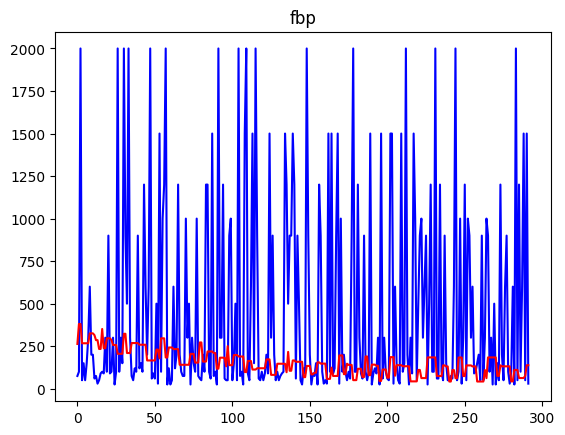

In [32]:
def plotGraph(y_test,y_pred,regressorName):
    if max(y_test) >= max(y_pred):
        my_range = int(max(y_test))
    else:
        my_range = int(max(y_pred))
    plt.plot(range(len(y_test)), y_test, color='blue')
    plt.plot(range(len(y_pred)), y_pred, color='red')
    plt.title(regressorName)
    plt.show()
    return

plotGraph(data_test['y'].values, preds['yhat'].values, "fbp")

## App Source Code

In [54]:
%%writefile main.py
# App main
import streamlit as st
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt

from prophet import Prophet
from prophet.serialize import model_from_json




def main():
        st.write("""
        #
        """)
        st.markdown("<h1 style='text-align: center;'> Sales Forecaster </h1>", unsafe_allow_html=True)

        st.write('---')

        st.markdown("<h2 style='text-align: center;'> Demographic based EDA </h2>", unsafe_allow_html=True)
        col1, col2 = st.columns(2)
        with col1:
                Demographic_Feature = st.selectbox('Demographic Feature:', ('Age Groups', 'Gender'))

        with col2:
                Sales_Features = st.selectbox('Sales Features:', ('Total Amount', 'Quantity'))

        submit = st.button('Analyse the Data', use_container_width=True)

        if submit:
                data = pd.read_csv('ML-Based_Sales_Forecasting_Project/retail_sales_dataset.csv')
                data['Age Groups'] = pd.cut(data['Age'], bins=[0, 25, 65, 100], labels=['Young', 'Middle Aged', 'Seniors'])

                # ploting
                # Generate plots

                plt.figure(figsize=(10, 6))
                fig, ax = plt.subplots()

                if Demographic_Feature == 'Age':
                    if Sales_Features == 'Total Amount':
                        plt.title('Total Sales by Age Groups')
                    else:
                        plt.title('Quantity Sales by Age Groups')
                else:
                    if Sales_Features == 'Total Amount':
                        plt.title('Total Sales by Gender')
                    else:
                        plt.title('Quantity Sales by Gender')

                ax = sn.histplot(data=data, x=Sales_Features , hue = Demographic_Feature, bins=4)
                plt.ylabel('Frequency')
                st.pyplot(fig, use_container_width=True)
        st.write('---')
        st.markdown("<h2 style='text-align: center;'> Sample Sales Predictions vs Actuals </h2>", unsafe_allow_html=True)

        predict = st.button('Predict', use_container_width=True)
        if predict:
                with open(f'ML-Based_Sales_Forecasting_Project/fbprophet_model.json', 'r') as f:
                        model = model_from_json(f.read())

                data_test = pd.read_csv('ML-Based_Sales_Forecasting_Project/data_test')
                data_test['ds'] = pd.to_datetime(data_test['ds'])

                preds = model.predict(data_test)

                plt.figure(figsize=(10, 6))
                fig, ax = plt.subplots()
                ax1 = sn.lineplot(data=data_test, x=data_test['ds'], y=data_test['y'])
                ax2 = sn.lineplot(data=preds, x=preds['ds'], y=preds['yhat'])
                ax1.set_ylabel('Total Sales', rotation=90)
                ax1.set_xlabel('Date', rotation=0)
                fig.autofmt_xdate()
                plt.title('Predicted vs Actuals')
                st.pyplot(fig, use_container_width=True)

        st.write('---')
        st.markdown("<h2 style='text-align: center;'> Future Sales Forecasting </h2>", unsafe_allow_html=True)

        with open(f'ML-Based_Sales_Forecasting_Project/fbp_model_future.json', 'r') as f:
                model_future = model_from_json(f.read())

        a, b = st.columns(2)
        with a:
            begin = st.date_input('Starting date', format='DD/MM/YYYY')
        with b:
            last = st.date_input('Ending date', format='DD/MM/YYYY')

        futures = pd.DataFrame(pd.date_range(start=begin, end=last),columns=['ds'])
        future = st.button('Back to the future', use_container_width=True)

        if future:
             tomorrow = model_future.predict(futures)
             plt.figure(figsize=(10, 6))
             fig, ax = plt.subplots()
             ax = sn.lineplot(data=tomorrow, x=tomorrow['ds'], y=tomorrow['yhat'])
             ax.set_ylabel('Total Forecasted Sales', rotation=90)
             ax.set_xlabel(' ', rotation=90)
             fig.autofmt_xdate()
             plt.title('Future Sales')
             st.pyplot(fig, use_container_width=True)

Writing main.py
